# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(1124.5), np.float64(749.5), np.float64(-0.5))

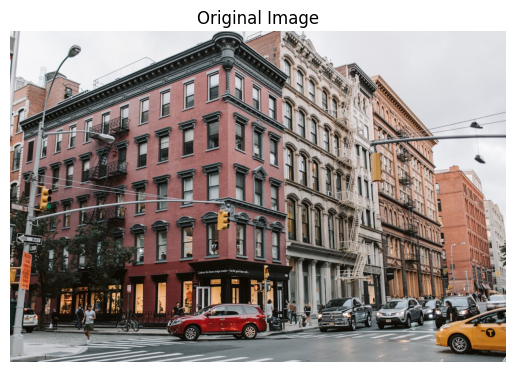

In [29]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
import base64


base64_image = """/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgC7gRlAwEiAAIRAQMRAf/EADYAAAEEAwEBAAAAAAAAAAAAAAYDBAUHAAECCAkBAAIDAQEBAAAAAAAAAAAAAAACAQMEBQYH/9oADAMBAAIQAxAAAAD1LWrzh1eWbXdiBmZkNmt4HHPXAuuOtSc5vQb3xgdb42G8zQd743E9a1gb3rCet5kGc9YCed8yc5vA1rrQcaU0QimtxMJaV5BHSnIc7zYa3mwzebDWt6DW9YHW9bDrrml5icoqtyaa1kVFoHBaGLE+gbQ+fVsjeiC4aeq8xEIQYT+qXhEu9DVXXz7NtQRXRzbZ63KosLbzagJwcJbL6AtzzeZPFyR4bGMtwZ1uTnnrCEuFE5jnXXIc665DWt6JzW9E5zvQZmYGZrA3msDeawOt84HWa2GZmEb3zsN5rA3rWBvNbDMzCOOe9E85mBreYRm8wN6zQZmYG81hO9ZsOczA8x2dXNyJMkfBJu8azMiczMDjXeiE+VNEcc98yc89chrN8hvG6oKdJdB11z0G963Ddb56gzMyJznrQcbzGjNbwM565BPXWiOU1U5E86wjjO9BxnXQc73ga1vQcb0BTFgNvMNXSvpLz0OzEK/q5xHJYaAk3MxIMVczgTrykS6T3Ow8+GaaFomb5w9OMe9qV3M+sUJbOm0rKyIkeEWrn+bqx9C142bVgURcUNasXFWLdX1YlBH4WZm8sRLhVOY4560RrnrkOddck61vROtb0GZmBrMwNZmBmZgbzWB1vnoN5myNbzAzN4GtbwNbzA3vWyOeOuQ1regzebDWt4GZvA511onW9YG81oMzWB5uu2t7IWZkuHCNozMyJ1mYGc9aDnnrRGuFOQ44V4mE6hNvGQli2BSMqN7DXaPCdd89E73zkT11xuDvOdxO9ZoM1vUxma3Jmt6DnnrgNJ9czGt5sM11gc773AljeomW4a/8316JbtSzyZDJ8It1efGR2aRmBkEyJJyfQxjZUM1xd1fww12APkYqKhGWaPQHfna9MvScY51n2t++eZjnbRk1Npj0wePVSL+0atemrbLI6/RpIdq+8nqMEBA5eLZlAU6uq4T7TZNa3gc665DnnrknWt6DNbwnnN6DWb0GszAzWYG8zYb3rZHWZhG9daDW86J1mYRmZoMzWg1rNBrMwN5mg3vWg63zgb53onWs0GazAzMwPI/pTzv6GW0ymGL1qt5rInMzAzW9BrnrQc73oOeOw0WsPOPoKVZKX9Hmc1Fms61BzvMmM3rInretk73zuJzWaIzNZJmZgZrccD/mGXIkOe8J563wHWVXRbV+oqLoSdF1FysTBNsapMlcfnxNyrR8m6IAFJiXnXQT2Rzkqdz1TdMtzUxOIQ1FRlriNdikRHy8ScQwgestnl/nwvr0WxqbjqNo62V7rY7KIEZsqIS/yebtQdKzYpMgZUoDJIXdNeWu0SNg+erAuqvXmuJWyox5WSmOeO+Q5565DWt6JzWaJzMwM1mgzMwNZmBm9bDfXPRG+tbI3m8DW9YGazQb1mid85oM5zQbzMIzMwM1mBvNaJ61rQZrMDM3ojMzAqAwGCFltNXWJZvNaDeawN6zQb1mBmt8hC06jfj09a60lvO8wOs1snnOtBzrrkjfSfRPea2GtdZBznMZMSsajJBHPV9AimoHMs5rycBynpOkRuWFHyWAF0sOBcUl1YbLYzUS0VJpaYGyGRdukZs0csg7Hy0CEzC8TVd7N0HR71Wz3XM5BY4miQRNXCvoOu4arZ5QaRisqD4Zosa3qkhxr4kwIxydA3YOj16/C1ikYUVXrYNQ2GtoXD2DHMoVXV7AQtQ2zVPEr6NnRgjcsGZoUmsrtTnts9anIkMK1o8+dRcn1nlfWAy5msJzWYG81gZmYGZrA31zsO1E1Bd6zQZmsDM1oN61oN61oMzWiet87IzM0G81gazWBvNbDN6wMzMDWZgVKVDhbK2TrrS2c5vA1mYDWMlI9lfuIsMgsashoBK/QBeirF2s3oNZvkjeZhO9ZoNazA5zNTCm2DYJNj07gZvt6JT7ZU3KXfXHmINlLQqkujCHPASMpYcjcwKxMwzkZcIVUpkJWHlJEgdRMlkBuVJowIcwzlmYG1G+pjm2oGWVZC3deml4S5a9bPDeghuzYauB61Y+zMGk4Ry+bQTbPBHnqRLRZHh7AA3USazYMVNHo6zPEPpaLSauLPAVMhLSpbNqhL683FjJYMda7ayKqSdNa3guUwB6bnOaGLmg4EzoPr2MySOKa7KVjF6r1c26b78fWVZX6r0IlrTmt6De+dhvM0GazA31z0G++OiOs5wjes0GazROazkjes0G852G+udhvWaDMzAzM0GZzsN5rA6znA3msJACSOZBbu6sdBZGmzqJ5zNAxiOo16vMiepRYjX8Sb1aX9lVumWektV8d2ULc9aDW9dBrXXIZqDcTHbaQwhBxprI95pStJr9M0XQZCREL9CiyZwQDPq/MB1LqziIJZBlgJmYeSrTRy7ZYWaGBkD4O2d16QCXuOfW+syN+0ydnjlVkttbFc9f3Q8zTTG9Kar3DQUeV/VottTuWI84H9t+d9XHtAFKjTP1aBkDqsrcBoBSBO+amBi+a/VxVNF0rHTIKK2W7yyvSxLLXzJlbvIVgFyKSbDkRVRPpODr8niXFR3JHEea74BrAgIJqjSe2sim3M0l3n2n/YQM9I1XHrPw7MegLz8g2fbT6bjg9zl29GtHyMNceazbh3msDfXOB3vjZHec4R1zrA3zmgzWaDNawN5rYdb52G8zQbzWBrWaDW+ck6znA6znA6znAi4ifiYkdWeM0YgbgwxXd6OnPLJe6XIOKtbc9Uxs6F59XBvi+ffpDsVVp9KOlbKiaxaOnL8t6b53bnyKlIMiDJIvTIQtPOlOyvo2lB9IWPnB6t0stUSciystOs5QBuaIZ1lGZmfKJWvDJyKTBnBhkotkSraRrXrp40KEcvX7zgOsz7CriuTVx6PWlh/n+leR7hBbZK9KAOOn5Ww6ZDpOnapXti1xVrueTi5GJs6rbMr3ZxBSegZvD6FnFK1nfz3EDacW+YbmwVw+dgC3jAwU53OyNdnoqQqooqvuZouzaWC9OXK1bnyH7crKYrq26ttjJrLIFZG+oFgLCZVt56f2vUgl7lAwGOX2KJO5JbxF7CpZk8/WSEINV6LnKTtRLq+umom+Dp+h7OpAv14rAzWbcXWc7DrfOEda1hG81gb1rQb53oNZmSZvnqDrNYHWc7DNZzJvWsDNZqTM1gbzWBvNYDaBnqypuS1P7xdFlXp/X9V6i0VxM7j30a9BvALr21FO03Vd6gMaiE1xScAXa+cVmghI1arai6TgNnM9MC/lYcgtapZWDiCSNCEFfp5Frq2cTE5MC08bPHUXenrSVTbDMeBMIz59Vrqc0st1R0YglDqyty2U5bEMwml0li7nbJzzZluGWg3PQ4FYQj+M5vpu267VLxyvDoH6XkZK2KXuareoJGgytx6rETaWVqTMK21ca4JmGlsXo5AVK7J0czxrdaaSs7qO7IVbqSmDCur+YQW7RXo9ZEq29QwNOimL689yKtYK4oYWVGsNwF2Vt+np7n00nV98edYPURFRd/TIVBWnWitW4zbIhZnsGxatthbGXnq+xW1KypSxyIqoWxg/0ktjWm/QYNyu0L3J56MLqPSJnR9l7+eS753qy7zWC7zWBvfOBvWsk3msgzWak3msDrfOw3mYGs3oM1vQc63qTMzAzMwMzMBiEFUBl2ZzPtq7ISrraBK7hrOeM+1rHT0YTOkUVI6ML50ycLY486+j6xtygFoRQfu5dlAlfTcCbyMBoaw4KC7WWmuZ+Gi9FBAyDE4VyzIIE7gPklsh5hLhV9chTXrrI3VqELWTrY+lZLE9ZuuyJh0uv5puBHIE6DrR62w93XC0Tbj21RebvOyPSXfN9bto6ZK41X92DXT8lX11QCWfpxo0PFt2FwbUjoS/KuIOWWwpmHkuf6STsumRDVy7EhU+UsIaHvKbW7zzY9UT1/ORt9Ubz65Iy8tyjZvVVK2OTLZ5fPjamVf0fVcFYl2eDs8DPEsFqSuOlraLHGbDp3Fun7V8yeg5WPelMYxzORMe9aE82Ski6JsmwlapZQulEuiYxxI499aVV6DCUObH80Wnoy+mJqkba6HOlN85ozdZrYZmakzM1JvNYGazAzNYHXSfUHec9BmuuQzWZJzrrQZ1m4Na7wE86ySAbsB3NqTcSstVoWCLCrNqw5tNt+d2ods9YW5jB2zkrsyjcFqjRjsEVhtX4kn40Oq5oPdsIlbUnLhAyxs/dBqTN0WrQ5G2kOQiRofVbaqsM0BlssFHzpY9lFm664o3wThoStQdBBoBW1QmklsfYTkI2oNHKtvA0oJlW6+snabxUzF3Yq4blWbOARu0V+b6xZi9QkEZGb7BtGyOLbBIEb2ahoOvYY08rzYZmQddzjs08v2JFl2V9KsIaNNgk0r1T5aIEy3iVd2jVV3Ps9Ls6zdDx9J+h/Kd/KsX0zTJRRrsKNoK67qqpZ3aDU3M7c80nsrPU16F8/6M3oGBnN03+ZblDCyi2qLur0pZTmOMml9Qi4l0ACbRqi00cUnusp10WevoLJqlYEhSV6fA/QFbypSa+Zr2vzeg3VNW/wBHlrb53fTvNZJmawN5rQbzWg3rMDN62HW+dh1rWw3vXQc76yDWuuQzWtB1nGSCiMEc03VBVdg3pNMKIHdTZOk3ZT8DRtZy9TlWzlxdbLsLscyxDZCJ23TkImLekBC0Cc6VE71hU88FZV+oxNa9NfzdsTlW0RNahCrcvonmCmqOirXp+ITXY0uoz0YYVLXOXpQhHAVo+Wy2woQtEhvhTL2OKLvqgdPHIbFGSpXleO2+bsowsv21QlKS6a26471Fma5hmqmua7i7sFktamk3y3M6GZ/H3iJrul7cVziYafXZAEK9Ghc1VEbogt3Puok882cum0HI5YFO+lI40CbcFpngIb0dCLoH0t541cg/irCl8W/x+XQy9mf1DN1DPvM1S9wSqWUtjyBqss6ZBD/TlArQpW6abxObZTbpLIKvXVmPGkHMA9mCBVXZEgxl4/q0+n8ArZzaBgXORmnRNi+5966UBfQFbo1lEnmK/tGW+uqotbp8res1bX1nOBvWaDea2GZmBnWug1veBvM2Gb3sNZviDfDBGSS4jdA5zeExlbWjXWDogfo3zlvTgt2lKmcwO4duPNWS2nWdhSUFt9LI0HIlrt1hJ4n4ZHjEZew2mNlllWyp7LnQKLrC5qO0WpkOk06OhXvoairS1cdmPwg7n6ZEPdij57UUpU/aizE2T6jqRFWWzTduCQO4EiWyR2h1R1oWEKnFuMPJHuqtijBx0tjZZrDNVOIAkDdhtlSobLp2wFU2WA6eRDtH8a+IiOamv5NkjNRzzF6KYqq2Ri3HQMsPyezztmHXmC6F0nIaWpUdCpgj0GL6OWMWlUY09V+C8IVrdY8+Nlebp1QG3/5N1cb1yRjRNRrq6v7RAHoKK6uas6dIT6M8uHBHpMSMFmnzNPXDR2bQXm1E2ZKSTwRVdLjjdTeipi047mJKJkuA6pW8fPWPoU7cxf52F9Sxda2xn0rDZrXI0+Ilbiuyhhm8K3EtQu8uXtoy3ngMc9XlazNuma62HO+ug4zrA11poD3UXsJPmNEZk205eLESnMpyN+9MAf6juQksjcAQgLGrLm9WuKxvim9nKFh/vIbhEhIJW4OJgBsQWLx2KIPhpM/S+rSq329euMWYDZBATKth1YqSYI9kQDOrr8RkMdj1O2GYyAVfyrJeotqelMgaQu2cqsClzsi8FYh5n68IyKFrMwWQScdXqVR44W5RNsItSfaqfps9qxEjA17qsipmF3eZaysYyWbcnuJLH6WLiCdoFO2IE2ns8wq6ip6jp6es3ebuEMfIt3z1fTHqird3mQ23gW4KOrUMZYNdvnNDbzUTW5LhEiMrz9LzoyuwKtxSFqeYTBqvTXle1qyifUGmRZVfWIuuIXZ/RLGUapd5qtwJsKlzDzhaXnwb0tK+bPSiPQEFfIDW5NK+eLhIu2YEpnRUvICE5ZXDGCdczFm+ZfTlM5tseRUbPIwqU2pRsN6TjqGudWDzJcBrtPA/oiR6ThbirKC47C8k31px3Tg3JdXlSnUT3MSUepJhDczcYDd622TKKRLkiv8Ax57srlisfT1EOyLz5ku0mJerdSI8rpBxm8AcqUxFuX10odcwsq8oTBlxt5Lacr2eHveqbdp2VfmgFPVbTmJF38o3ITICh+JmHLBXgqRCsXKsFgwWYZVxqzIYQA/fS21GJeyRx6ahFT+lK9DTI/UKrKtzqrZaszByNPSe9DAxdjtBGjp2UsqrLHp8IZill/J6sarb5q3SvTrMneGKlvkK08YnsSekbubSSvaGD1nbV21Co7LqOW3+ROibz/dtHUk3zNzm7hQ2cs2zsQgakd/llLcqW4cveGfPHpODuw0IrH2RZisEVNKnz9WxijzWa2ZSOAOT9LKNUvSmKoO7d8oFttZzVh0C3ZvRcHOiyX1lc/k/1lESvn/0IEyUNdleSuXUC3F5mPJS2aR9Mjld8eTi1qW1DZBGMrqTgXIh2yo0r8/BsnQA4G2FYjzdeojVSsRhvo2oWmGMqYte3KSFw26o1S45Pr1305H2iFNXZtnebrZ0ZbK7U6389NZDgHy8EzgJ8C20h+tWaUFr7qZGC2eqQ3JdnNJ7guvKRTC7kKSRkvDKKwAs3GDvg+qjpQldasHjsxNBzZiN1KGv8kkrOwIa7nv4stC8/VYF4QkVXHXEVIl3VVWrTTZLQm2LlNiQUcDj54QUO5Iig9nVciWTN0xPtTeEaMikyPN5yQS/mxa1J0vsOrLQrGLA1sohfx5myK1u2npai59Srp0HaI3fWngNBs9GE3RznOMvYSCy2ptHK9XL+Xwu/lXpjjfP9ZzHv2ExQsab50PJVz6K87eic3WmXGL5+ySMXyLZ/L0NZI7v8weW7UlrZe6w4yJu59TH4DY1uE2q22ITL2/OCBqBaOPbd/VXZFW4o1WbuaO6u9EDiPSToyrIj0ov5/NXWp/Tvmj0fKETRxVDERbdL3RVd5RPm81VLuAnhCXuaWHJOYsYSiy2+gMdlYcrWMBA8HIWF9TMJS0qqbs2gnO6IjEe2IcCI5idn6QtWJVROWNGoGbWS6lagZ2XXdbyJJD+htGaqHfoHvXloNW+NE0Qpd6YU88tXoitnlgLE1+6N3cFeKnfABHJwnIE8G6YA2GmBS4/alTYdkVaY6rozDfnr0P5oz9Mk9G+fvQtuXGbmj7sN3xQYY5e0zra0qXfHbTwdJa9szSZnGW4imUh31W5ly5Qh+IR7DtWNiRRFW4GcepDtTJSEKTV6xtpNCNmAhunzp6cr2v2MxunpUJdtd+ktHFiAS0azr6C0hGOqOhVHpLyxI7PO+n698++hKug113zm68dQV/0Bo5Ma6iXd3M9Oo5rB6tJs/WZKZnppDo+UqG+ImQy9macIq5euVILRb56zrG7hbd5l/bFWWdl7kc1c2bfg8cWktq7nnzR1H5O4PUjfFIaOR6JepRGXr0hlweeLObeV5+Ur0GPY8BfsldpX8F12VRaFeQ8T6ihKrObqq4u+lrjrsryMlFYCmrL5h3gWnXBolngL1XT96vnmCvxH6GeK3F/XPn+Q2H7PkcXSGguRVWFIianKtVBzxRVmjDcNJGFoFjIl83W3XYRckoJTomIGbnJV/YKmdnhcc9pynetaDNZoMzew6cN3ALumLqGVS77ga8OtzDVKRTCMx3knkwfKBPn9Jle3mX03twA/l30p5iz77Wvqk7ytoZ+ffRFVWYtGMU9yd9vAT6z0N3nLavU8WYM5SV4i4Wa54bqxtdzTGcr46i9KubgqyaYlx1MvnkY8uC8/Y7HzQUswSHovz56MW/lTXNeusr88uiujkeoIOo7fo6mniOVbqJgZke2+bk/Svnj0Lm6qSTplT02NEX0I6uNURsfMXzlumrnD6NGHlFJgZm3uDNVu8hul27gglRUyakRQ0UegYJ09SrCRHK70c2xWACdXc06jnszk7tHAPtjxxp5PoSdgpzL1pvzN6U8y6eTM2tWczl007IWjRVtXoW1PLN9qxmNgFwW1+c+rrBs94zcPm5+F3DHcqylzqM3MzE7GybR5g9DBNhtT5FvQBseJH2cs74/U1JAxLLlcaM2dsoqAuZDtGknqkBW3csjsUBXS65qGn7Sp0wJ95wsJkJFSHunTbGlOez5/jnrQJ51yHOu8DSnPQbU4bEuHvkS+Jixtt1FlfaWAp0j2T1m8DyDWJxD4OgL+kKBvjTUBUF6AhVtcW9W1o2UVoxn2VO9dmoMLaQ6rgVfJeYHFxUpxEQvdvOsUgcyVHZpKNL7Qt5VU2oXhtfRWpu6KPak1UjCi3FjdgzzdlsFFPF/K59DgEtVrK9bRr3efh2cFNPDO7lpi6M3ZW56YrqpQylUdXCXNgk6z9VBrLJV6hxaRaxYmktwSpyopEt+99BmmUHZlKeQTqzMdOIKXzdUm1wHPlO0gIuel11x1XoZ1tauPT5/Ny0Rv51mS8Dleu4PHXp7yjs41/zQ/N4uyYU2SRGvijFuU3cGbSReLvYvk/Tns9Vw5xbKcMa5MLKfTOhLt5k6NLzatqHNnFGo3pQbqazQsiwaktR4FiUeJbEo+whMyaoTeRsj5vvQJuJ9yG4bZdf9zl6XHLAxdPyix9P1hqwRRk5sQBWvvQtWRM3VXNwpfXNvVZGyvr/TV71OMnrvA45U4DW9dBm94GDZLqZ8EPvbdLsWYX0ldKi+0eohVVupEuMb4HiSUft8PQjbJje7oi9Ji1e04NwQw08mooOtFIW4xCVyrpU501Ws5dyJkaVPYpK+wz01o41L9L5m7tY+lvM89dybeqwXULdAROJtRojGiEUgcMU10xZlXs++KwpOtrCq6BTyjH1bgJmTFF3PGiORZUdTfG+Uv6ct+4lyqisyaSctBe28APNQfdV2N25bjQr80o6Q8HSgzr4WN1dWY+CkItRNEiQRkrzvVzFV22NW4qqYpdb/ADJJYvnayqtd1LCOVdE3C60hdPJ9DosZHJ2w5ob4ydEI3OxE/wCN/c3jjRyTe5Kauai4y8uWRW2rLZBCPTeLcLiD+NqLCry7q7010hYtM27C3RVsaFK7+EvPSNWnoyirRaS1Mk6trq0nVeylZkg/P+d7cVPQwpDWC7hZLt8yJIoeXz7RgikQa/HKSe8r0SiEVPW5xYAteUy7gLBvV+Y9v0Lkd/OIsFW8xK1uuPc/sSVp0bIRN84IvOnwyLBhwE9z1wybzjAU2lsFekNgviOB43nGEhwfVFVd2lU3Q5dVzwOf6uST29VBU0UB2zshLSPUyhR2fPM6pPX8ayIufGaOxEWx5ZsbRxTbjrebuVANzkBo48+ySRCUHiuHIhyBVhKOR+L7S2QaJOyEbsqi5aekUuo50m16qy7IcxMtErY44FxWzJazKlIezHdc1TZZFtkVsbga6QhJ9D6vP9EQhNhYEtz1h9THDR5BNTUUrYVr7PNUKcWwFVdFJ0ye4vREkLOM2o8rxlqDW/yvFhhd209QFjC4MmJGtThW/lyNp12/z9U3yvzKrY7l4WQJs7yp6X802cmRuqj7uiZvxH7g8UW1+jrBq4xRq/GUNqejxyf4sPJFv1V6Brighr0b53aDo3jaopvvM4py3ngy7rGPuqt7kamImEjicb872YvvmYqtZilnxvbwJYBElN841WBtOARturJOLPQ4YyOJkEOQYto0QFd3OCNW5V6jKOglFSDPPs3IISCWIRTpNom7QoWwt3IOYGxALdzDB9W9iaMnWs0ybznYdb52HWc4HnEv8/Vvk2+16Zs+sDQENRLuzFaZDMyDJS5AIPIawGUq1p63nk5e27byIWPnh5OhW51Wx/dzTvmLTo61Z9Fa13PDxS5YGGphI5YFA65daiyLcqu1eLkn8pFskcDhHV0JSJGq9txWZHgCFvPPjQIKKem0rK0AVqoTcNI280osSvreo6/DaTTo6dbx5VOauCPWCbL3YajU245vsUoebh2r6vOlLa6XkJWqZ4co6iLxuth9ATIqozVXoxPx3S8fHXLTlz4/QxNW2yN2ZvOpkqQX8skhbKHsnfqvqHX18GyC6m7to3iENNQFSkV2+Z51ltvzdZoK9VyWfU9kFlKQajNI9Nj0wGvNQ3L5y9BQkdUF10s63hS/oakaNB5PRU1Mu6+tqntGWQlbAq8myauK7Zza/Ow5cspl2DZstWOjNYAJNR2bZSETcFVaMUkTjZBbXeEfIktdgYQ13YFGuI7Lgtl6GihGrXAdSambfFqqNUfbnhwyNITh/DWCT0TY/R403MpZv5JTpbu7O0xzyCWd6DjOsDwGV11YtU2CMWFTNHVqyWgCy3D6KDrCqtorP1X409U+f6zetify9tQ/sGCkOjhKR+bZV7oKf25lZPTFvDyKEWxlHkIhFvnYxE4q+ZFvpiI6k2jUZ8waP2onSNuS09QKBrxDYKkSsRy3PRPIyYzegSFDQfmRSUezO3yzQkjJLJ6HrXCNXQhSsUa6uF6RaU5D38+d1nHM9g5iJOLasHsuB9AdLx9fRFwVNR04922eYfREjfE5qDQD1xXXS8jS13UdeeTvx46Sgr5gudFyTTyLWYySOD04RSvr2hdfnJK0xgrzd0+SesruUGU/6OUg87Qt4hiND2HS2yJWNmWBHoeJdt5akbCaPHr1RnpasyLUFDtvToCLQGiInilb3oDTk9GUxd9FgY2rVVnllX4OtMuy6ILuKmsClicdzbDavJrh62qZkMNFmMWOER7mTiqNOzBuA35inqGgBpTbfOZ3l0mzMJTiL1MIM5NlZVNxY6eVXFBvQ1ldPh2ptDvpcZXXPQbzNk7znA+bM+HvqT1V50OKkq0Qlmidt2U23TNy0s10fYwzYHlvQVqGGFO9HFczpFToWdajoNs5YrX6LVH4u5qwUzhRta3CRzUTNVdEDby8DbzdvG5Al6upZKroi06UT886APYeSr60kMTou6P56FlbuJLdCkjV2pqAkGsqNuuyHVwg0mNXWfs14mfsKtdaLlMno5RUkYDtuSodKIcv16sc/ZNXr0P5vtrp+ROacnAirY+eQ8fR0LGQBJIi/AvTjXxPNt30jdOLvJt8Kno8zkdmVrp49tt3HGH0pNRM2A6/PWoSjU9j9DlH2XQ1nIPb481z8x6ZdDlZutyVi4sRZ8+DnrCKJ84kXUcjTktU806XjVM4wmLdh3cjVctMQpCw2pu84t65Gg7wqRkILRqq0ZKCoH1SH5dwvcPnYaej1XFgRDn1Wg3gpu2oQzQJE+i2jOUWyAckwHXaaRTpxdmhw8rqLF1TJZ6rn3pqK9itVNbmOIefBLadOpGLdJ5tFldOi2iaszvveTkdtXNtHfXGyczeE/NuUPbUz2eeh30IHRNV3eI2axO1NYlGTZZa41Y/kfQVqAWJV3f8dL910Zb9zgMNAYnovELCWZIFsgejXWM2QkMZFFDGUndSnVsSlnOouVtvqLKwnyQZi8rOfOZI/PtlKtJqrpFsbHCkwZchUEuS4+QCfTqTEI4HWV4rFT2rz6qTppl7+s46r1JTjMc18OxRWIfshdg3rJ2yKLasZWfIK7Ras7b0tzdz7h8/3QxfJTslaozAxkA2KGuOWoIvW26zDzKeE2dTJLD2ZLH102w+lbUtcFb6/O2BOjhLj9EJBVz0vHPAL9qi2XoSou86idVbzo8zV/QgfTo8y+qIIFuYYDp701FVt5ePCOsAvGM8/EqTcVj0dZMljxEc6tUjCyoGCfeuMsSr62ugOz7B2PNeKLqYgrfTuzrTFKDj13xDVmZtUa2jTd/13s2bBnm2H0ORuL6BGrrCpCu21pQbK8HY563tWQ4WSmVqxtAFZXhEDOnrKBIyC7aLncwM/r5ih/W/GjLZm4SY0ZVcSwPn4WV46y33QlQsUT6cnvKnpR1yrDzzQkWqyr0mxa0YOXkd2AEs2Zst760BvRTKZCjRIXUsWMA4KbLbRqeMbHZg/CDi6nce2fFK7nqPq1Kqo7sWTJmCdNWzoRKF6sgJFg06oDpIvfw3j1k/x+n3Ey469UisKyt/Mfvk1svYS304W8XfSuxGqi2oflFRAl2khGvTItRJ/dz5QqYEmLQvKzYsuLUCJmvZ5g1AWrC5evVsGckLVUzEXVDiBTqSgLMhUU0tqU9QQdOrsloEldSmfr2fW5yB4qq7vajb21Z3VE+gqpVoFdG3WWpay9CUkylPoAIk0tCByJjHT0QFi80rRY3M2MRT8xaDdHJ5iPbvEvTV3eNLqPa5CLQ409GS0Dj6NJmPRBERsQ5Ha7XYXZ0fbXR6dqtr8hBZvnZxE+kGkVK5dpO2k+7aYSljggo1ABzGSGTqdLM9pYppPQLjxCnbVAREjtXhjUId2U2AZipT0OKwSkYW3OWmFbn11DjFctp+fXAjJY7WSSnD19+p/OlrWw+r83GpCl5S7BZu2Eq5OGMGg6SLdNgpaLRonp1s/qsWEysUd2oPYARZy52GV7l2JZA7K2kj2zl5NmJcK1gog+2ptE2qC2qO1JjhEpFgV0crQQzzhSvX0juLFk3QsfPREcbRr1te+Ip6JEZgHGvhWCQ1LHQ1nNwwtydyGiW0Jt86W5Xzt85f6T8tep/LehFKyu6o8G3GbGR9x5KHmq9hYDIkA5yGtTQvA5+vZ9XI1rfzLfhOrIq30tD3mxgoieM4Vs9jkbmqOTqi7u8zemOjic0hfNF13L3nR93W0jlG3dUUFrFY9Yw/lt0V9PWjU101WlkeeCssR3ZXm+9ZLDYwRQ0T3m++adtovkTJBKHN4VtCZdzyZbPK7BxJVRbJABsaIVoDSCFlTppIzZNIEVjCjJcJZ47s96rAdozGTcFySiGLq76T7i3M52DkcJGdtKLFs2lUtTUeStcNRXjt5MS+ad7eZATiUYs27imas/z6FCoZqRnw3Trsse+KVuq6ulY2GUWInSsIjlEW8TLuiOCMItcjBXGTZzNxUrVb0MEsA5GQ8qpZzhBSej1hhpVgLJx7tCSCxVeLmyz+dGb2mAGlPVmWQ6EXYrUO/P041Ng9B85l7DGtpCM18JQiFmTUWlJgZZn68oBGgct8a0yL08JQkHyJXmZnl1k9ILw1gB12AKbnQ7byZr1fQvoHyHphmtCmtrqT1lOqd6POLK24fTwwUxDb1axIEIA6SSRD5ZsjqxQ02i5GMEVJrVs6sytNVuVtZNV8bfSvqLzH6a6fOnPPPpihq7h/0P5i9J20xVVWBTkRd9q09cMtSzB4myGtSW1XFGlg7WL5Xzv6Dqy35iCNUB1oWEIB81VzRMRjFzeSvUNY131XZFVh4enV/Nx/Xbco3DkleiKiJ0Uszmw2KEi2Fztqzo0s4I+XZaMPSkTaq5Bxq1wdiVVge00zfMPsiX6ipN0jYKci1ZSTgo+2iQ9N+e7V183STlTdykkeMWbUxhmjP47rI5pxEIIcnllsJ7dp4/ur8/wZkLUzHrJLQ8tJoPFveyQyQRd0Nm2o2DhV3saGFTEZbnwknGuGycqtu4hRmipNcew601y+0+Zh0RCK8pZL+NcZ+0HxkpA3cvvhGXKiqYaSNHdDx6zAazEPYejU4Zs1GTGjtptXu021sRtrN0cCrJEYe1MdK4tX6BIXLxl883W9t1nq80tZlO2Nze62nkV26Bg1dNWSsrEq28NPnfNd6UndhujoadYwwpXV/VPbySNhYfCdSjY2+K7t5QXfNUm0aLoqCzqYxW136O85eiNGew6Muuh6bwj0j5p9H3UK+cvRnnpWti7KIu14oqMmxd6reAzeuc+tycVZa0QLzcLJDW25iYC2uZrw3LIPMjT081ZatknFNwxw7A2dWmcru1JiG88k1t1c1TePGnF2Wxjii7dW2ycRTx9AtBzZpDCic7xE5rz96Ez78V2rn2a2q3Bys3UsqTGoYveqAbTMRLRl1U16M0c9qlKwvR4zxrGz8BRjTLqPFwUdDyLaxTQ1y2xBytalUSPoS5MFZPCYJruj5kR0kmRDVyq3kb0HXsyWzEVY9jQTwEQ2Mcw1itkzrHhEZJPqRmI+aYPCe4ghYpaNujJo9Jg8byNHoo6v7Zrx8c4eTYNZxuHPS2X1SAQfg9uOy6/t1nbwgGe11m9ImomuukPtup7G0cI+F3ULk0DvSON11hueH3oLK3l4HX5hrY4AfYO+8VRVOibsl2kVg9xeVbn2ebqq6aD9ALvYx8uNk2VQN60ZdybQ1m6es9YTvFvNp2x69sKrpFvnD0BENzvN/oGInYiwvNPo7yTJ16U8wemYJDz9cFJQWXdVC3lLVHFkQ+1djgJ9E06a4tEPP4UQfGI6NYNcnIo61pOQAK1fowm8rTRPralGY7DN2WrWRvOBabB9VzkmBZywRRhJOY5F7iaygdY7St1svGY81nyvccUszo00xcZIJy0t0j3ze046bYDh6hltIam56ho0ghxu7PPWcFyd2S09Ds70uHHoTCMTK5BZNPmispiNhn0fBTcl7iF0gNtFOzt3VariccOTSSw32hA5xtLlkU7jrDmoMXfRcS2byLcY0BCAcavvrbdbZO0K6se3NTmpXKtEg0lY5ZnXUPKtTPPw+Ro7RHX/AHxbk9E10WRluAcV5Ux+swLNgq3FY63ZldwawXeN8vpUFd6TSInAPZGng2qNEI7lvqvE8nsOICXhXol9qw+zzAge1jZWfryijfWfsluJYV11cdO3zs835Uv2g74TfyIFkXIpTHp/zdZy7k7bqV9PeTINbzR48rowo6tlBoKBWc2cdDkjNRdOAXMMfzVRdheVDSkoCV90ySqycAVi7KfCU0OUXwFnVoUQpnOY4myUG+i5lEAK5YxlAPNntbz21cngtPpdF27T90V2RQZYQZh6Mes+iNOfkZvMCQpwjImWvHMmwCILbdIHC2oltHS93Qsg4VBVg5OivMQczVrRR4URppm0cMjGFmUAhoMwFHVtrbq2hzf1d2D1POxq0LUqjjK4yutwLHlaNdCGgfaCW3rSBWnz/QVpGtZXq+WFHvTeB96I84etba6QBTcMruR9GeaL0egOr30PTqaBXiVYxXJ9Egg0MWcogrksyAktuYflY1au1bUgziXa6MbNc1zBMYcsYvclvTxAP1TZWl1z1i9WqFGQZbiuSSjqMu4doMGMnl9Hz1vE0itj1rZmrgHo/wCYpulrAS2hX3nUBKtHzSM3Xx/u8zHxUoyy9jrnNUdcu2jxAHXbXRDt8t5/vGs7HTobHpiLh7Q823dSVnKtrbVVOmeBpONXcyqTANN6Oubi3cs/MA4K3pMr86tPSzKY84ZesSFUuyyEBDTKPCfdAzsk8QG1VmTsCvlq7LeLPPKw3oaapKyoYwhHIXMWADGMDdTC0z6TEqrqguel7SSyy6ksgC5fVjYkor/fhuoHmhei1pWk8Mbcfp0GmVCusJKZ3FoCvd1SrJqn27i19Iwklg7afTVWjQuo3UZIyBKx2ytiRDzZ6lWk0jbVas/SV09LzzzzVf8A3K+WMuXFUYqu4KbXaJ3PVF359Ms0lYzzfuaVZ9w/rfmbbjtaU7vKjD2xIBlt1XeyLAqz3okAG2KRXU4e6dTXf1DXvQj1jrVRSs5MwgqspimDzVV2mD1EiQgSMZaOll55NM7DMmEnojzhcMRbmnukMw+rXCieNu5xfUJRxo47ucGd4/SFPIogmkt3V3GniWTqtm7V2W6qrM/St2Oqlo+W22tRtHzWu/pbavc0TWGBbUtSWC2C9rLp6rVOKAlB78Cwzpby1cFTuwXgyAj6jqMmcS2u5rM2gSavclW180nXnB+SB9NRFyvSltVwzlBFoeh16hrEPW8X5dtGYO4l2hAPw1jvoan4+546JqFc+igLjzgqrtmKQu+g7qrrRiZ1l7FCocWykCAeuXNqqmUOa6quWiDKuLKzWFquOmq5REef2JfJAH2BW4ZDGVejWiNG0QllWzQko7Wi6G5Tn9tbuE7rul9wzuVYTSKd+SH5lR+JaQU/D2Jes/DTnR4ClL3oPtVT2QeVq/ry7c5fYpC/Khu+NlfTaDbh+zojqGkPafJmvbZWGc3vQ9jWVCrVJ3Xpj5+LVakyE9biyMkZEXdS8bkg8WU6jk0mcmw1RledMcWxOThNkPn8I2kJTqsCenrSQ0QaTUySkeoZXOdpq0mpsjhTfROd9djJ4voEO94Cdc2QO3c0NxVC7i9ZrsOdqcBmP15iJwsRAew2QmA/U6iETpVWJa4ryGuuNB6Y8/3JTPO3pv4DOjhKZYB6h7uHa0mEmySpeWpslPIft/xrryrWaMXBEBVHeq/O8yqeGJ9EVPS/rnzPXb1NErqYqbXdmTAybMpZWsqUazsOBgZa3etgtLN5hYjEyAmjCWvRFXtGXp4xpvsQExhMTQqTcK5aPuY6JJyISPJiIFj+tla70IyIR69bwNqMnMTP8xpVc44w9hFZZ9DMwg+ANnMMRyP4vx6j5Cdki7Hq4luw3TGqC71dYYYTXIPYdUeK9XV/pCn739Fjr3vafC9dTsrH79f82g0VuIR+pG9zVKJJcwz3tgoycy8QvBtn2yG5b9NBnut4QovpvESCTtzAPcdNGnWZslQ1HJyroS+QCUaSXYvwKcJwz+vY4yvW1uGy+ax1NdrPqqsGrc5hJev5SaQFt3csgYxvbVrFMNFkWa2rvTVWPxXvYWC3COIkpiYfAKnApJxNg7rVmy23Agasw+013A5R54k9LVhddI+f7df6dZ3+I11IqSR1qvJgiAtIOLK2szzV6e8p2wvbFa20hrzt6j84utulo0YI/Hnf0n5ph7J6I8Coy3iWgwpgyWu1OXGS6Y8tL2a1auKxOpybuOfH3sGxPL6rETiTk4qH0Th3gMUchquzYnkhD11zZYHA0k8m7qOGHScTZAzCR62QVi1VH6MNvmwgbUdZxHro5Oi+mxWd0Y2QIZCFmdy2yFvyygqZB0k7bdN2qlR3CSClcu84zZnrWpJxDzneaW1CEx0gtmTg2Prheopt6rxMQs+g257p/HO5SUg+eJVZLXQJvG/ATbJisRF4skPkhw2B8konEKaT4B64h35GmBFBkvpFm/r6InzMNLMLPqwNZ7mLxBzHZEYs2FtHHadegp/m6fPRO8R07uYQgSmyvnEh6JXleeevVIHi10zAyLnrYhhFwk+J5d9MX7yupzBywvg2U+5Qd+l8/KX35/t3j9Tug7xpC+pFdJToYLPdFZPwu15cm7LS6WAgqf0PCunnFK9qjlYRW4aw1Zm/oWkPQkQPl4WaJNo+TfWPly0f29T9yLD3y/6w8/tFmOWu1Y789ehqGVrGSjphXFp2gLLR50F2MLNhHlZ3HYgk4okjrsuby1d1LOmvVfmj0hdT51GSh/Tok7NHibndMbr6yq6AhIxM/Vo8As4HqvGbWqW4tmBWrbpqKq4tgiRGu2tIkmGOnyTkiSNq9cMiS7p2DchMJWZxqAsGoVsmx2bHdvJcRx3FLYLP2ci9F/dRT0WVyMwPJAebwcNa9wiBdm3i9PH1MYulBLdPur55vHysWQpvjuY33woHLmVIqLwXZGaVX0qRM3l+fqYhu82yFloCV283lw2SVluUXkr6w35bR4vZJ52uYXqcyd9K+bPRLdCvQwwgFp9KDNghnk/Q+c1EV/V4FRMxGGzew0iTnx3b8wwhKOeoy51zlxBenfMHrPHiC25mGcLtVLcdS2D7bxiDCaoyabBkSe2+T1KTivRQDxOt4/fsXnr/ACyE3C+osWzzVE+hvPTrx3rvTmtm7YCe8v6eiH7Qn7HLJZZrH6MVPQPoCh4YwD7LqzZkeeivNfpcUSNgCwULO82ekfPVjR9zUzc8QV0TfNI1XEj+Mf2VF9HXPR6sZyY+RxPnm0Kps+B5XVpVOrnFq1ZZ0lAFA0Tstk0N62825dVe+lPNPobdhqWNIRunTZxENS3L6r6sj+uYZ7ZdO3I9TcaKYHLtq27qBvno8strGya/w7nUwMGDrVosaPNeMldsUMO8i1FobFLx5Tb0SdeHYUPXstlR7eP6VMPJllLoj7maSyVvpCv4e/Ne2UbjUVNMQ8fV0/VEtFTujD52rA0CM27Jd+1QHWs1APTI6dpix62uJJx+crcjrjYNYK02VK52X7ueJyTl0lgJb9SekKXpXkpEbaJxlDzT18eqvKnrfFrAKVtanpGchHSPRr2QQRVRd6qBCYd871/MCyanpMjyBnIaaPdXLjjzfS8qCxQLd5FOk+7JHvY3jP2Xlw1YCHQdx/TRx6EG3rfDvqD9AUI+O+bjqe4uP2OKluWseF1/HDxm89n5JD1b5U9Q8rpQnnD015lurzrW92D05adeWn5f0vikoHyLu8W8LHrG28O6kfP3ozzZuxen/LfqLy30Oej6d8tesFmn7mqq2Yiw6Ku2m2YauSnbehTerrMCHICWgJ+tiKgr7ppWlzYDlwo+zQkhIMKjsx5MxdgJs1akVmDB6/bnnT0n5d53UBLnoq5unyoMGvKcrurOcgFOd0poOJ8hwy2Rk70ZoaGfjnP6Nb2rIVr0+Xc1eDLiqwhsOoTOjQNJxBfsxAVmFs1dVR9zzC7rWde+iIVXY0dZwFKl9XSo/KkkZYQrVbJ2jaa12cTh7E7aPN2Xjkx5EZDa5R7EeN0JfyyPO4qnSWNLSqnLv7EioavoOzCVDaXD4CfH7k9HrSlX+a7txUUYVFpoTsMImdebnhoYCVP6f84ejomlXug/bg0RhNypYNl0HcGLTSg3NjPQ5679i+basXB5vnv9K1+bBXn+r5y75W9HlXhpiLbN7PIawtDz3R8ki5AP9tMTVM3rqT0Z5v8AS1eCPCSAd5fWwsEZD0XBM/P3o/zhZh9HXJSK/N61412NwnP6HmRz6DkPRee8zevBuSyakfKnq2HdPNc9fLy+hC6K+LuV1fIZHJCeznejaE9A7sUK8+eofLCT6n8xem/NGzIWWaB2NRoq29RA2msupi5gF1r21RwzpuJ60sqkL6HBRWkosydIEtdPVJt413Dzfo8Xve+hn5Y9NeWx7cmKDsCqwXBLmYkemfGNj17i3DtrVgW6sdoowA1MHzykD167yIOt3qh5V9GeUarCU0FrfrtqNEnriEtW2ZdTTSHVQX1bTc7tCuLYlBO6PD/pWZsrqF6volgsliCfPEqMMcem1kLOUHp238QZbCkgmtnj0ApRRPMHOVjiHkIpFTWKfSg+WAEsHAIpG4+nedZt14s6g5FvZT6np6zaWy7EAYxDNeC7KwsMg4vZrcfteodmQmskBhd+B8Uh3omJpUtsgjV/OAubgAg5cVSllNmWtTyuS6zKdLa900kMxDPL7dHlU21ns9YVMmKcLs08o359BkkY/abY74sOqSbib6diOEevEVLuwnRxjT0T429BZbi2hrz8+ZNZ4wek3V5/dbWFL25gmy3U/Voeq0YN6MXpoToeeeu6M89SMTfDSIOHUXfRxLMQ0KZcrZQYha1f8/0t9F4mabPO0z5+sqq0f1d55mQVq7VmqtsKm2CvahL5ljWhr3peyqnPRdE+hFk+8w+m/PrrVZb3Oyoc9IJh1HubNRla6Loi0CYyq7ErGG6m4RkLLzIuJgegR8VI9I3Efkzx55e+iZFk8vXGbR0kTPSriGqqobIBIgn5qvcFxidaeqSRo1lgZgGBpL1Fn0Us0cDt+ar4uK4ouui6/Jvpx0mwv0T5wr1Uaso5bPZ1i+SfSchRQ18g62V0QEA9n0HEn5vGmX1plEY1df2jV13acN0VlZtYjrITk9k2CI5aqa6vH3LlGzJKRWLtI7w8eFcdtLonet8EPcaTLpGemqPs+LLkrg2rWxKmEpWKpfXG9EbzMkVcNpAgphZBlDNUn6MPFOXSg79uq1q2qxUj01LHtR21Ou0ZSvYq4mj22qjiK9JGZqdSwXNG8ULFubaiTz7bdf09KtjuEJTMNFjN5ZTHuZQOlZ2TDUKejbBx5qLQuPmpIF6L+bU9KK7qFgQnN1fR0nW4v0vD6py0FbchvS0jExLywa1OGQDuGBmVk8euPPC2RfolpL13NbIrMfZZit2eNEzPBUw9RAjxDSt5Wn5cRp0v60j49Zv+KaI7OYYUuRQ8WkBwGv6rfQIb5gSW/wBCHPl+bmu2rO8NtrF97VjUkUjshCfhBHnSEYyNy3qv0stz0Z4osa1IEkruPqstMg8/PCJ2bi5WnSB29U0e1fpCkl7CrtpI/uSCz3O1qshtGc0GEZHRm5N6tsCa6rhbejluNMActqF/RdBen4UsqW0aQJuRjUjRLralKDgYBjMVrdaZT9KWr4xdEztQUywkwBJAiRmE4fTh1JS2qXFb+hAurZpqgnk46W0M0W7mBpea0EBMyKsDTH0HMFrWGIpgdipHhbm6LNBbJB3AcxM90P6kMbSrIidDGaqmES+4axGtYvSTTUO7lCxwG6Lj1rMcc32MYlrjRzFEHHAiHThGanfbl7n6I10+Ua3p8Eqa/IuDAXErMZlCEEJn7tggEqS9HxTMMWKdPOH5uKs2Jd8W9tXDI+xu5iuaxsUFgvPuaZE5St21XMCuh1sBarHc0WvopRjfUUzYC5lQA3rO/wAmFHHK7U1wZxgst18ahia2jz7HFoVn0lxc1Sgr3mXhCXtlVvqVmzOo7nZSas/QlcvVU94gNoEn5fXJGxTXnj1H5SqtUsuw/RK2eb5G+I7jdYWIeV+N0kvPHpzNVfhgx9dVF2OR5vKiu98Wjy629npaqvDxX6z6V/Nit0ScN5dz1lkx4P8AX/j72b2eQ6oi/aAK6ZhLzgq7AB/bkmRRa13NwApebbTA4Ta5CeVHVgItDfUTPDaikkrTtoAqWDxdJP1acciz62iaejO4Yn6gH0xKRzHpWioQqXYlx2dYQDpVKbmIjiY5CJ5nHICKJooFY136KomvQNzXEXXtcw79SJniV5J6eXWQwcBYs1Kj0rg9c+6jk4um0oZKFskaG2ypYsnVy1dpgPs2Vpu9qntTT5fVSegKriayXsgzsarTO1Yq3H5YlLdhnqDrfr5sHqd15iTD0IO01IgbrQ5LMM2UmiKLsieLk89pW03rshYszWZawY3HLRNB56SWJ8znF1kLJ53J7+jmWuXBnIMoAzt1aG86jfqBqs+eEfRkkHmlz6ShwpGcsXuQEniIlIZCFlxMga+I+yWhPFuyalFvQvHF6htV7lp5j0kg7gK0yXXXx5dd9HF6LZhZTxuj2x7Z5rm8VOs7IZgBx5u7fKtmx6uawXzCu1uP1GOPstRhYgqVfUfnmk1eAE+inpZFOS3QCPBlwAd2T6IFeyZMBjgl5mB3RK4AV0TdxI4O2A3Cq7BeLpbGcSCj0w7ImbgOLyWwitlXBI6jMuJgZ4MUCQ1EnmoK21bCZNS92zkxUDG6Y+CqVjWAAED7JhlanZGZh1e2SSo37RjivLFgtKUrN4yEL+v9w1hxIkhMEHI9kwT1uQphWPZ+pVaC3ENKsp3V885ksDoGkmrJ4Ry8mOJWMZyFrkC6A7e129A11A5JLyAzkBQkNKBLOoZSGIotkgG9pdSsw9HnEM5bvpRLIJ+vHSrrqO4dHu4/ICCQD1ocsShmyvKwrNlKPpcccgddiBDVobxMygyQ8rJN7c8isENpmwm4yRQ0OzLKr8h6Ysj43nyvdqmqFCL6L4xg6JJPfhqO2W9WY9XshoCGPzr3Djloisu6vsPvRVUJ+Q6sqdYzTwbZDIzCS0kgJ/638z4ctXUyQxs1yMPJEvIDz2U2EahMYRBZKtiIfmZ4mInl/FQLISLgkRizbiYjexTYs83je5CLIXoHjdnuR5vbgGjUgRgh3bSJAqTE4+YsDinmkRdHNT9E2d3UXQXOyqjZB4gG9TBc1G+okpehWAZsh7YEnY32BJsbwCnoVRiTHoN5Az0IOwIMiXQP9oLkqa40CnSHEDzlrkjnTfghzpDolXONEKdcKROZ32G1dKjacpuFbpFZOJS65yVcLsV4aQdMH1dvLJ/ESct9I2Ur8JZMOXLDatOIMOks4ZvknrRWzuYeP4t2lvbd0hMbSxJ6l9NVAcrNnkNsDsRhyenXa0/G8LseSrNJgr1vmbPhx43dRMLKYOBO/vKd/eQ9SX6DdcXrGXYVuAz5C+oDHkUUhifBvFmzZ6BnfqfzdNxDSwxNjN+xzjjoGm1okH6gvHyp20rngiwXlfuAsFWveYaxmVfjoWbXIw6FBVLKVlav5tDoiqstR5JV8wf7iRVxLtyWcdO8TFfvjlYgZlpJtEjg3YSxFZLWV3IAtLE5CtObPlQppW6uImmdnIXK8d9OSGnJHLxIRweRpIqqWdgMLkPIRDp3oEnPPQZzmBmd6DnlXYI9K9Bx3nYcbVUiW3broGqjnolt041Al1vQdbT6J62mtDbTWQid88dzHTtrtWl3cQ8S13GrMiEUHGrKmvTjcxwt0srd8una2QyT9uyc98dSqrtnpXdNM1McJueWRptfojamKQzKGI4hHCBC0YeuyrAS9oeCEKQqMupLqhKEFYVUmeVZvKxTSm4wbC+kaw5SqeVe5O6bWqstrKuxH94LVMLdnj+g29FOQt6Gq6GibTHQZ9KlCZvJk1QuZpNCM0LtZiyG45MyRrYujAjH7KJmCpOv+wMG/c0EFueh4EuV2EimDiJBcq2JAh+DaJhhxGSgyHj0OipW0tVnOxJdzucJD4yzoaJBei+OmGssNtCDdWEKCW2p/mGEU5qHI1JDrAg66AiySUQeykSFQVsRIA0rKxZEs5DWoFkB0VyAe7PlYKfkLHhBojtOGIdRzbUq6xvKkMdm8uNWCdwDcSA7dMiFemTuJWXQVhuk+9QI973MZ3pSJ7cJOFfEluCWnDlJq0+syYVcM1IeUTZ9q3PG+GVTWtzCucqROKcph2lynK5ziwYppWJ571zErNJ0RJVZdoNW1QedMsW2nuAG0ilGAUQLUQDmZ4mFfNLH4iavbWlPrMDlu5af/8QANBAAAgICAQIDBwIHAQEBAQEAAgMBBAAFERITBhQhEBUiIzEyMyQ0FiAlMDVBUEBCQ0RF/9oACAEBAAEFAZ+muj1THNv/AK+z8R06mO8TbJ+Tc2U55u1GLv7IZV4j2Kc1/ianZkSgsqkcl7JtBz0PPKiwFT7VdAt8SEcWCfZzpAc1o/rJjHbxoXDtpiVExDa1lbgfPCqc/B/2V7VZDQHhVOObX/W8TbRyRkBWa9XcZHldQuYPRRnl9K2S09kIbPJabd2Kja8YT2TMo6sbtUBlzZmUxsNhIDXiSLoiJOc45LWBMW2skB2QKKtWsDYq17sJcZOTLzYYoawWf9mY4zVLmE66Pnf9RjlhF7xZTTl7aPa8radeixce+amuNqyGYPFBZQKNumzE1enKL5GnO26VN2pWCYLXQtK1x1ZMTMdOcwOJiCKoUDc3Ve1F7ZsCzky1WVtgiFKedZbmMcnW3roYzYWCOu8Wr/65ZTHivrI9f7/WH/Cn0h+5UC3+K2dVqzYdKzKZnWlEDE2GmohlbGQBIAplAQTdg5dYYmZ80bE0dzzB0fiIIjPiwRmcjpzqzpmY7Yxgx6VAAMf0OS+tDWXqXGTMoLUAy058TQNYKNB2ICaTpW7/AK/1lXpX1cfL/vbXaxGDuaOa/b84BQQ/+2ZiIv7+jVi34lv2MeYSalXHxNWhVx28LgAbYlLiXIWBfi9fyqjCFhdqi0ma1ncJVZKqBU2qsIZXmhtW1QX2mq+DCmc6c5GICS44jkHBJ1wAwTrn40TrSahbB653Nejwq3brcUrliHSSrSa3MDVbJq/6xVelk+lbXRwj+7tbHaq2DK2WtbCM8rUcxIdC/wD1satebDxXURNzb7KzkGkSHX3HQVjV1cs7i07EUjYmY4lL2iBx61i6GKpG7F6ytjtSExsGNVXVPLLkBDae0kQbSlcUrLUsoXq90fXBHJ+k/VofDUAhKicc8Y1IGLak1YqmTIbsmxY2EFZt6lyELcbamxUxDspn0M/61Td25fY9E0o+R/d8V2uBE+jKwnYLTaUKkf8Aqt7SpWG54wNk2rVlkp7pZOuUvD26VRYuPfKKolWmOJAy4kecXUIsZUEcAJKFR8AZH18RoMylZBHTzPSnydO6+ufbrXY6i7lLcQwzAhkUHwY8TbfK1VXGxOqHiLVrtB73gZElsAq8VrV9ddiy1AC7YOQmum/dtD7vKspdqLNejekv+tr087m59K8cJ/ubbaKpIr6GzeBXhFETUporB/4jeET1WZkbAzPtIhGNj4noVct+Itpbw5T1qrX3xIaupjtzZMSMiKv5XyxBMEPpnbk8VQ9OEDIV7TICr8Xl+nIv2TiH25wbGxDHku8LBxlQxlnrNIF9x09uwq8m0L0tRFDasrgW2XC7D4abu0cVldtdNcgl4pvJlLFRqtlxl+v5mvNOytSEJs5co2FDqKju4ViKeVj6LK2JsqRtpiSe+Gf9OAH+IbU/EEcD/bu3FVkaqi2/Y/8AHNiOe2w8EBGJ+pCJQXKoG/Wlew8X1Vzc2OxtYvtDPu5xCWy11bG3rluZjialhS1MD4gieYQRYNdSsDqLO2JEKmBgfBI3QjLLzPBsIKHXGyuvYIgaQw8TRYCxTcjH1QOGwQ4C+ZuQnt0dkxMTWjilbYo61mvcho4MDEUOqc3Ovl6EOsUrDViOam0JDI49bAtqtGR3ntrRuXk+vXuuAUNg215rX10lWhwyhleOOP8Ao1Pi3DvV39x8zttkIwI/+CZiI78lkpksiIiPZP12GzShNzfLaVq3Ydldbzw6lRGM30hCosXGvVIMqXGIFsROKUc4FMpgZQGELohNXIpQWMdWrwy0Zyx6zZ23Fi9aUC9giZWecC0HSgHdSpFp1rp9dnXgwmgJSyuxeSPMqhMJq2XJZBVr2HJiyruucFUg3XyPPT1RttZDK+iYUnraLFm+325XaQ1mxowYVWLYhtBbZt0ymUNtQVa9VSV19vy59VivpBMGYRiOO21YMdv4WhniG63Is2Wu1Wz73/L1HrZGObX8zJ4gSCcApn2+IdgSK2o1406n98zEY7rCzsRzk/TJKIjYeIqNXLvia9ZwiAjXQttiW6urlrc3WRUCGuuJATUbF5PBwuqZZ5QF4HXOdiJcCZKAqoThbACx1spwesYVSlhI1cliNbARdXC52dYoaCa2BUMiXWrgi9rpw3TArsPqxEVra7FVtcWVfVsFlXtgbpHvJ2ImLq5oHX7E6o641HCceIEjVr42BXGrdsq6LWQ+zWOlZhor08iYyaWWacWMoUSS/dURsjr9z2wVaPmu0xN22tckwzkBjh6evVOqgtPc6VLZPVrdj34/5Okj5NeObn8x4cR0d1awf4j1y8LxQBlSuC7cAYnH903AGdTiwFDE/wC/Y5qwG/4uqKm7uthYxKiMp1wLg9zXTFh1uwIz8Vk0NiBxcTMJo8x0VhmQbEJq84yqQqK2hMssNUHV3ShTGzX1beK2sR3IpqjH7qimbOz2JwoupL0QYpo/M12u7RmYLTWaJrKqp2dlyGD0Oyvsh5frOccmGTYSwMWHE3XLYdO6+sPlwZFOy1TdRva9rCCO1RjjYdvlviDXO6dXdFwVjbVesuobFdbQeo6+bTzBV5K2aLT479R8OdQtEzJGG4dSQnkRjnnXbPZyoHbK+WVmDWqqYyGa7YjYH/kagOKVH9zMx/MyfW4TBr3LENxcjj2CtNPU8IWm/WmhvFOL+0TxieGlgLAfb/u1sqtcbvjAyy3de+a9G20ZDWVcsb18xVQdk2rkTXcb2SX8SkNnPLLDF9ZRAAcqqO4GtWRBbGJht0jnpdGI1hFIawOAgBjqyXEoXmwk1tdtmjW8KUhm6kAfI4qJi0ofR4slSW8vXfW1jQ6sv68ombHGQ8q8sWm4NhDUw6nMAIRzZsdSkd5ULdWvY2DBms8QFlFq2XY/JZR3FbmgaXTVY+qxgpqr2slnUmwqsaFrbHWq5SNcOABbpu61Fp4oyDg4Yjsyr46Gz1DZSmv12tvoK0hWvp76zcLtfsgsCRiOFaCMfthUYlBR/wAPXjxSASIigyGu1q8BoHHtaPx2JiAvr6W1KLmQ8eu/KDMoTxhOYUU9zWOAYBx/MdweO2RZEREexzRWvYb+Vxb8SX3CTIYz3c+QnY62tlq7csinp7luEHgcxkx1wqjM4MIgih2AhS8+W+Tv1Uy/Yvz4mSNcnTX1bcr6wAw/LIE7SXRnGWI+SsIlHHs2E/qpnPTzSPxp/Ns9NVuCVW2FnUixUTlnXCWdl1c09s8RcSQP1hhh1wPCTMEVkxUiqTBq7USDUauYzU011mD+WeIXuhgkO7o66TnoJCSbrL887SpzBdZVhcBhsNW5TK1MSGxse8Ve1IsW0CBUT0kgFUQWhJnHcp17bK8UW9imtrxdUsLsKJqRxkpthrb0oL/hqHprr/GK+nCeyMWECuNjyVe1BR7Nh+3d2ofZ6u3qEF2Sn4er0CYOGpUWR5pMo3zByvsKzo9tpYMEpIZ70R7GNWsbviyoubu82DsQDWEynXTjd5CxVDrjrCu2xVxnYJXxKS2cGqteDBFAI7sq17Jjoo1INsGsmKnBF2VdS2cDWoHB45tbmhXJ+y2LIBYPNS2LDq9YnHx8pH4Zzqy9PNmfoMl51HPbT+eYy2H6+v8AuucapZY8YmL+uIc7wzIWGVybXRbiwglk+pIFLjHKaIItVbR5ZE/qh/IezrrsbYPkV4gqLqwsr2KrKDmF1BrLAPrpSKwtVOqetY4+q5ZPTMYq6ztUgWACfRgRHSdSZku2GXBGXxHBIvolqGtF232Cgoa+5ZSZCl6dbekZ/wCEXooY+T8ONlYZYuHZXYqoGEnbVCN3K5RsKzYslJgourNtPVAh0DHPJxzlknJwYrEkVTA9cxmqpVXPiOPbbVLIrCahs7GoldjxTJTbtk0kVLrYI9TVxm3u2MLnl3ljUPUM8dYpozOAtMFKrHSmquIjXpjC2aMsbFmDLMXr2OmvqfQKi0r5nOJ5zy3KNZ4eqylahCL37rifZYn5UHA1XbUFDb8TCWKYRqnC481W47S54ZB5c/fJ/d5fkYp0bbFrqOBgHRU6JU5EoMZhNtTRfrzXjq8HlKn6A2vZKpdlT1kJFf16bSXWrdLKX7FMZstaLQ0dPitQFIRYu9rK+wW2b4QMqaMDcoCQ1kddlVskipzpf5j5ierm9Pps9byblcYuwaoqu7KFN6s21d7LdC/5JjFrarW3+r/hO/GxygQVpzcCmPUyI6GGqCGYzq9GoWUw++jKZyaF/N2Gc51Bm0fwKdKmatC5b7q3BOahASa2TDbm0qVgReruHZbujVy34mutiT7rDos6PeVNGWb1l826kLGpaanGjBSlDZyKoDIhMiFeGSFA+CJFdj7Z8m/vSKnuytqDGK+tUOF2FCe/Asq2bLlzOc5M+laP0dKP02XfWzznOP47W3YwNXFYCn4eE/iLAqnL68l22jBKr3dhQiteRaup/e5Wj5uz8MhJVxsWSqMJtd9ZbhuawxzvRyDySbao2Ip0FgvYaFbRg2rms91UqNxL13UD3tZ+wrzjhnjTriVjrpBe2BLqyWsrZWNVxE1RlbIJU2EjJW9g46mtac3eOMUMDnRLF2Ls19jsKANhqZiUSsGax7WkxTJyK6a6NRtDQT0iQ62/3h/4Fj6DXXLPZZkIWfEn05HMYbIxs4jkVUBkVxnTEwWbFgilWwrHlNZi8lCzF7BGuBmx2t6XXdXVfa29k8rpc0mJoolu9ZEWEWOik9aycv1T1YukRYKkRi6dg8RQKM8qkMnZLx2wIpg3xCdS08XqVcCsB9l51yBhBNsq8PXH4dGvUiZ9tf8AZVT/AE5M4iwQk3njOMsfi3v+LAi6ZksR6KJZFBtqrmixRgf2TPw6jj3sr97OVfzlHopcQyh+15zoIJbTS+JW+tIdBxrYman/AM2qKbEXK9jXSoZ4TsodOsifJulsVqW6B86iODX9u7oLsxTgq9nVm2vZmwuMmAMTWa2PrIs5VrSDK6oGtEZbtxXqbTWhdypcZSddoA1Pl47mqRTrqeiVTeqJYFqXtsavaDWN6ZCaF0Xh/wC+xOKiejI+tkSBU9cnPoXVkwMySZ6WDPaX6Rx6xETJMjPEfPd1B23x26dEGN2LVxsNdXm3srVmUULJCVrV1stbK7YCp2+7YAeoXHMRXKS8qKxBZdIV+5k03gophLmbFoATCZgU32Mr6YuEa5KssXaNbFXpev2F62qIfr82P5s5z1xRwGuXuL71FrWvkREB6sjH/i3v+LEMGvBTAsWL3UYJm8WnK1qraKNg1WFHA6r/ACq/3/OJnh3XE4uPnUf2vOeJCat9PepdjA64ua81ENtlap76ZGUdimzFhcGt9R8lNiGTU2La2VzBgeINeJq0YsDF5sYiT3SomxDlLubrzXf1G1mCfV7xWqkhiwNiJUc2IaAzfsF5aqQzm019W4+u9+vdcFXe7J1jBwjLkyqbiWdtqU1g0+yJGNWaG07YPX/7rc8CsJ4CtjbVdUKN9mL1SUlxORM89IlhRIlP3Zxg5ASQ2S1xPt2XAMbgkqI22GTSFcTtlKxtp72W0CEptMhJK9VVWmKlJGRrunK2uLDrVVMLYxwy4xxFNk5radkynV1gziIyzZJFe3fsTNTXbBmKoFTGSyMiP1lP95zl/wBXcZx7Gf4XVTxWffWGLPqDn2OiSXf1zLNOU6qtPvR3EnY6HVWEwNdl2naGKW2tJyuSTymCI2P0v44epSNrdpZqrK3ZQ/aYhC3I3+hiqXhvuhBT8NiQtp8lVMql5qmUrvfXxl3WJsQxb6mVrJogrybSaP7lebgBLNkRZ5UDteJ1WFRXbL1ae8LFM4nCiBKh1FNoRm1sawFV1bFhRrd6dhsaaG14rG5s1yBl2FiSi6Bekkk6t0M8sxS9Ltw6ZhtV1ayD1/8AtsxEy+6hIk+0/AREZV56NpM9zonnmcKBmY9TLjqGcGOZc6wIXLdfqfubHQirYbhBQRL9xY6ewRpqu7RsCMUBzgVRHFq5yK/cwK7VwU1lTZ2bcEp5VSY6UacihNBCRDZUpbk5sP2liuM7HL/5ZyMH98u/VrtZ4ik8U2wwc4yI9Xf4QTOFyMzCI4XEesxGMdYXBV7T8TTSqPTCHnJRMxWoTBEiyjGVVsO1XsJZX2kyqsxqxrWkPg/tueiPC/59d+0zX/Z4kH9No/unG61bD2+rdXfVcu+nWWzBwFBRGOQtgnrWVLZEo2a+4EWA+u9ApDZPgoD79soGDrKUr2lBaYCm2xNxRFIa4RIbwx5zed+FatU9iqsh3LE9SW8ojmenX1zRbMG+VBkcOSSita9PVywz1G0BggbajlNBgf8As2MdQhXAMWBnPl0xnbWMbBkw/wCHJiIkhyuHVZ45npgQseIaoZb2Vu1K6DYGbVBGFct2jYuQJpAyFwUYFYjkVJjFU7MjXoFnlUBjNiHDLpuIFOPK+lPK+trKnNj4hatrm2bJafXWUnk5f9a7o/qeX5+b68jEYv8Afl2/exXIyrMkrj2tGZ0idZZKCDWJJbRZHrk+znOrJyIjPpi/vyxSUzHA5Qt1/cGvFtLw2VZ5xbcoLcc1fC/7nW/tJyg0IzxDH6bRz8ZYv6Xa3cFtU696NfEXtlYishW6CTq3IblisDc2GjBwd4xKpebXx7FtX4kQKMV9uxT1oRBxvVa+AigFo71eZrrr/dZRMyY+YVrZ4BFnubOqMwOzAYqhPImsYLYXX1r0qOYUwSFySUd+qXZb21N1l/vjXeVRokJD/wCt4EbOwXXvd7FMdfrNheelrGHekSYcTGGXMes4mqxZ2N/0SbLNtk1FqgtoCsdD2Ag1jEjIzAyULq9OLV8K6ncwq09v8bWbEhgu8WK1jWyjTRMQiskBtV3h7ASLH6umlFa39mc5cn5dlq17B3iStyFlrh7mczleP6hPE3+Tyn+DP9kwBzz9soKm52KppVGSWTnOfDz68ssoXIXUlnSGK46pyc/07XgUvXM5a1M9Na9YpxUtVnlrmV6tumsgVgUK9pe3t260aT8hYj7LbpXG2j5uxW/qNjYFOwXYOsxtN1Z0sCPtt0lPFlazQZC56bmysmIWWeXt2eAUdNmxDLjS4tVxaVUYEXtMTNXXCYgCJMquceu048lTtohb5jt3q0MRbveUp3mdAC9TlOSSyu1zBbA8uevuxcXTtFVZExMf+kmrjL7L3W0gCdjFezuK6xGIkoWZkUr6yi1aoVstb98xpInyXFJOHtLB45ZAbe2cBJYFYzIa64mEsiE04k5r11Y24MQVpjcBNh2VtTIwmmhecxE2vEF1rPLWLR0KzUI9lL7kfiuT6cz7LOeIOktvBCIqmSX0+ynH9QRPNtdK2eI7cQX0n2856zMemGXsbbrLxm2+Jp2ygG1omC4NBT0r9DIuIvNOXosOSFe+lsGsSFtAwJqazcdrpTNfctAaTZ6K95Ts12eJYjo0f3ziCEV8RM7mIiWgJCSRnNzrOI1z4uVdLFnt2NrK5r3wZNpMsA6rVMU9b2LujjVjNdKeztB+sr6LTBiRUPBsiDxYSIHCnTYE5iC5zajJa9j7Cip7MbSGeodobFWqiYpxX7Ug5R5YRKyt1ZUJddY6dsb6dfelJf8Ak5wrKozvHOdL5zy0TkJXGV45JlUZdr4g91PA4bFCpu2pJy3u7j8Ci3pm1SRktYegVIgwx9Y5KF1uMUj0CqbMVrZ46krcV0oL50knUtOU6cMaylVFd1dheTlestmuUAiFmfntsKVjLzJCh3Iz+I6yxqbJlz2TON9XbqedtyOVee17C2dRDgsXZydeTcSoFjM5JTzGEWc5HMl9YEc2iuRmxUGJ2FiYCo9kjUFGJ6mJXHEL55P6WqaifYaSXpv12Yu45EKsLZjkAyDpvTj6qGzaXYS1O0Bo1b1ivG3tJt1tJ904dYbFMH7DWztrqHq/1lwQKPDqxC9X2K1ZtU0u+Hdplr7ndXIxObDUpsiROrSuwaltTPvDzARNi1zlW1BxH3WEl1VbHcE1yJvgJgepRPjlLaAPruqvqt1O6W8aP4GyxcSiYMG07GDIkNhHRNynCsg3VmosKvp117pn+/JDGeZXnW6c7bZzyy8gYj+WtjJ9dS1SrV/xdjLNy4U1EqhmzgImGuHVae3aDdBNfUQk2YNcIxaTifLEGC6v1P2ZYdhjIXSe6K2mnhNZKoy9bvTFHWX7MJpTVCMZPw12AvVlsl8OebGgQgH1P4fdtOS6Ur+BESIZP7nY8nuVa55YHSMdXsFYxMZzkZM5x6fbjdhWCPeL2zYOcW1cyLvS2smZYKDzz1deHdtMxevsMyt3e19MT9xZaBfCNocRNFD4Q65WZr60HLrSlSu7XZnk5NbUNWLNdDRqlbqtVsalk0s8s4pHig3rXcGPL7GuAOiPlxjkRE6T02y6okG804kvVWec1k2k2BnmPTLNZblkjyxU7pMFb+rLSz6NZ2bAo6oHnnFc+YW8gN48iuOVl6jrrHRD6ybar+udXbpd3DI6uo49U0qXYY2EE3pggejt5dqQqQe+rYWxV1GuvSX9s3qHPMc5zZnOyU5Zua1IKaDA9szEZNhWd/nOp850PzzzYa+fgVr/ADOrLyCMsbSyQSqJUDI7YgUTrVNKj4gX+nXUNmK1/TA2qysPY9RjDCKtqDnK2urwdjZ66sQbW21vsEYmhrg6al0o7pXQjLNqyQWJV7pPZGQxHcCZBrkk3iZ41imEMVj6sic5x+wqqb5i82fdkswFCqM59kezn2Wu/K2tTBTsEjh2Lz8qVHIM+lmDE50+t8IhFKmlmLqJHB6ogPpifvLDjmLlRTsuUjrMpttWMqAYjtS4epgxle+xc1yE8frhLLCsdrBgkbN9aaT1lmt2SIO7+3231CfkX3WVV621rW16r03ifrfXBRZpL95xZWi2b4lM7hkN12z7mW64Hlum7uo2HamvYhkalEKxLS7I8nIxHmHAPRavzVxLFGGdqzXJLsKEXF7LVMUzUbvnK5xKieA2YWabrSSQJYl6nJ6MuU5WVa02nagl2U6+93o/kmYjPNKzutnOixOeVGcBSw9nGb/YeXrsETzSXJprW5jA6Hznl8ismMgYj+QR/TWWRCdMzhXiasA34aUgpJyQ1hg4RMS1k1te+/NgYukkWNc3F0GuyvpPQFU6+SXrdiZqt1z03R0FKqvn2R/jLDLQZaeJGs+4bTDyuwOI1nONkIKNkkcbcsnE+YGmuw2Ipvrw6JyMgA559hz6z7GtUvHbhI4dq+cJe2MhkTFvmRaAEA2deqC21gslN5sgUHnGemXC5rUfRnXOcYuPgL0lM/MnJyYic3SRGNKuZdIY9PzrqnvxVywiAuBOU7VnqKBnHa7grSRKblKwGa+3aaKds3t7kJga5dVUfWNxr1HHh5jJ2oRwV1PcHYRxafTWd46ra+NuJXbEoqOpv7tdqlk3YawhBS2g2hsFTKncCNjjHTM2O/PTCxNWqX2bkfUbZKs76uC7epvNtQJrsDt9OSy1W6NZwaYbacqJart3VjIiMgYNT0zZotAtdfKs6JBo1r4GHmOc5sznZOciqnIjJ4jJspjPMZ1vnOl852Ocs6mm+H+EakwzwlZ6a+j3KYDq6P5in9JdU1iFLTSGywdlCa0cwuOmuCTILFReRLOydbzTK/hyxGK0wLwUAM2IlkhR1q2+b1o4V6hMTeg7T7Nzt+bfk3H47YLXTuXqVsfKiyW661w6eaux58qsZkrqU92xGsKYdxPnS4mTnKdWDcmfSCznOPYf0KZ4sPvYT6Y57wbiQYTQrpkwjCHHgsF1qEOOlpYDA16oj154nIjLcfp6c/HBYZ4ovlT9VT8fGT6Qs4mN3Hy9DHzOnHh67JdkLY7EWQumiT14pWg9raliNoo4NYMFtBqsGsHLdkXIpmV0NmiVqzaR8GnjjeD+QtpW85uvQi/LAxM73w/87U1ZfrCAVUTuGs6lnuBY1izmda5dhVv5qTLpsdXdZQVNfXT8kIgdqP3dMS+1pUZvkqVW1+zIDBvcjbaXpyts314i6TlrtQOB95dpgS1Ji5Q8WVinKe2aBwMBle+lod6c5sTnbfOeXyKyc6Yj+WM4wI+H+x55Jg47JYukkcoB8QjX4fsF8FzMV6TjYfeFaLKVoRYc9k1Swq0QJ0l826dYK8LCML8gce87l6uyML6byeNWU8S96OA2loC1m0WWWKlKxA6DWRmx8O7STsw1ZdriB4wRmc1yChgxxkYzYVgwtw08fYbM03l1kz0tCHX26i5m+scll12VoCRjjJxkfK0I8vGI9hfd1ZB85b/Ap8LNt95YbDLKc/pfriPvnDL4K23zZPFitDMd3Hffbq9RXKkA7W1l9EL6RdU5bGw+OrYcI1tkpsLrqYh9Cu9VvSWa5BeUzK1q5TyzdVZTrJ430fk29FL1WCsLYf3B9bsP8xp1SWrBT01VXoh2vbK3d0ZXyoneUEGIXBqvJOGJtEMa30Wz028fcf7yw5UKua1N1FfWoXWr7ZqmIfyO01K5kfKIlHlno+EHrQEWnHXYyZ64asubPnAnWzsFtiu+u4LC5HzKc84jPeFfJ2dfC21fJ3FfJ3dfPfqM9/oz+Ik5PiReR4mCM/icM/iZefxKvP4kDP4lDJ8Sjn8SDn8SxmvYsmjk4kohIA0yq6lhSjUpXgRHW37K2hiTKtTQEzjy+UwY83sT+R64v9zsTJu2qqUA+mNmIX4hnhC6VdyLOjIIZWsRCbpqKts2hA+Idhi/EU5u7dO5RmMhXqhGIX6cZe+E5vJjCfdflVTasrQHekcagOH1hbco6MOlOsUOccT/ALxn4tBHzxyWiI+uRHstR8mYKWHJxndnKM81IxP5MZ9iqNqRODCdJ+XnHfV0/Ft4/UagYkJHNvHQuLNSxjaj0TrlMflOPlDx2yH0v6hNiKKLNWCfTaai7FuvZU7Ln4txHxz9sZs49fDk/DXWDU7rWwoddUAk+IGMSvUsOCiSNFJ4iC2KcFqh6reazlksvTMRNlgDdvAh5Df7OR8aq+tuFFLWPEgW2Bsa1PVNOvx06YYHd0FB7+pCZeJw5LxUzJ8SXJwt7fz3xeIZ98SKNVuHBHh/aTkeGruR4Wdn8KZ/CasjwnWyPCtPI8L0Mjw3r8jw9r8HQ6/n3HQz3JQz3LQz3NRz3PRz3PSz3PRydPSyonpxNc2TGtjBRKlwAxmz8QvSVK0+zfRHzLRcJsyzu3hWK5x0fBuNoyvsUtuMnK/rdKevbLiOMNRGvaM1rWRat9PXIxaHiSAeqPTAbEF1UxF1gnZMLiFifEsXJJPlvVPFvugRtSg/O22ZT1tsmL+kxnHpEiO0VZDp5tlhR6emSU42flU9h5Rjt/bLGWZaX0ySzmMsz8iqPJWKUduBjqpftoiMVx14X22WMYnoiS0n5ZnG/WwYS7Z+rdR+PjLIFI7GgBLow0W0asqGszhTtv8AEramELYDAs65RRsPDyWRM3KU1yWZBuJId5+MS5r5dK1UPwywTOpEkrdVe1Q14Ceu3KiXWrsSugo4h6+4FYZ4JVr4n1BOZAxzYkjhWw1iAZvaOF4nCI/iK6cRsts/BbtHOvDerlUpnZUWhklWK0IGrQ1LUs1OvBg6xAPGoODIMiwj0uVJhur2XYnWVSCP7MRkR8XTnTnH8wUChu23/liqUNi6btxQAObWebejj9ZW++/+C45a9g6+mzk5MclvD529Y4kJn110DNipQtFZUQc8+j0C6AStcFMYwsdMzJoHq7EjBnWOSXhgEYx7lF2bL5AVoJImeSONTyL0SduhqwEJrgCoyIzpxaoncL+0jEYL1iPY70Uz7+qMXx1zPGT65xj+JWv4cAxOuupYblZLEp5xU/Hzk/Tew4a9P66X8uOy1qgcV+GAzT/i/wBH9HjErphE2IGIhRR03ZrjaUDFRrNhEZ1CayxiQZO18PwJHY6V9iDVT2ddiozZhEz4f9LlTgR8SwJVNQX9O2fE0prjF6o6TK4iSQt91T/1KKla78EitoWdNbfYr6oDuRp9d0sqzUyg1Xb09eRsKSonWdRDbW47teddaY0TprspNVjXOqbFdtdmJ71omLppjqDkDEkF16zSIrrERiP7EZGf79nGTGcZ05I5xhTEMsrVN5drhKgrhU/3fLm14fjl9TLnrm/fE7PSlE1SxMdVnZTJbTXCyFTxjLF3rmgTMSlagn6dWTPOF9T9Za5YGTHRjnKGJdBjWD1JXwv7y0m1zM7M8VBKFewx52iR4Gx+HmIyCznGWJRbZu7x5DpY4o9AySyxMdl33Yr8n+89efLE0GUKKMC9rVROw2TMTD8jF/fGWOvtuu07Qu0r1Tp4mG47EDBI8RU1rXp4+V/pn2nMSNP91javdHY6Pv1QKzQst+WWsZIps7Jsmja/OcIlDNSgotaKwgotgya961WHzqrUaXpjYVC9L9GoE6gkzRn1B6F95aD6umJDbJgLm1Aj1eu3LazFXu6iuajC6RK2oj1YPVK21ZHNc5PcX8NqxYEZ2+vFqdqg0zQ2wdTVKthZqWaVjXbVdzK8QabHdXRNUdGqsCTv7cYX88xnGMriTa0/IjZz2WSUUp+lieXeHxyn+Nvra2apO7pY/RFxk3q1ZkPtGdcGjnPrE5zkz6dU8MeC8LaBM2LVuJqWiYFxpceVkpaSuoXBJJrdItrJmCgu2A+vT6Lj4eIz0z//AFheAg/cUmZMZETzxlv8pFHNYomweRGTxjvxN+8FGc1tHeI+PXqzqnLCZbitfXDBUOdHGR6R6YofjnOZw1KZEa9iJTfnu+mNjJ3KazfEL1tpaj8GPqzYW0NhVimXL8pfa77/ABNV6nahKoortpYp4Vu7HerDrb8c5Mcja1qXhXRZq4zyxTXsRUtUWgY7MY4037d75VWb9ierrX9PEEdJiPVX29IBt7iezrKdprD2FGHQ29Ap1+3W/Pi42Gv6pr2uLFoFk+7fFadqwLAWteSYVbX0HC7AX9c+q/S7tbhWEEu2opwahea/uHPw85znPt59rpxHEU0R86/3IQ0uFsnk9FHCK0fJGP1zQqqKmKxTM+vbHnnILOY59cbZSuQsqPNhDeg7aBmbF10KQMRTRIi1AnNkAhyKJHgJIXD6CaDNjlSK14uOTzj2X2GFk5k51X7yfrnM5Y/N0GU0qx+Y9cjCmcKK/b7unGRvXSg13GYuJiJ9InIyPZOemR64r75zjI9hTHHGXGNFd5pnLFrHX6f8OUf3Gxqg2stXatzlH6W1dY26TK1bShDNf7qHp3WglqqVo0NhLFOPZrTWjxJ1lWcLVtpKblrQi1ZxdpxVbHWF1l2vQR2INyuz3esFxwQ85tayXxVDhG+DidyEM02rSC6bvtsx8qpRWJBsjSwighuJjzHiEiGoRgwrDTWkbjmKupl4pk9bXE1WV7PWOQ7R7tbMj9kuOtn9trRWF3bO72rttOrE/wA9iJ7aq0eV1qeq3sejLc8V0UrDy19U66lxwvYoNrlU0KjJn15wuqcjng9k2SfcaWKaojriwX2pMhsSSp8xbbmuqPWY+mLH4b7Fy+nSjtrWya/RHHKwm6+OkWREVluNns5y/PL+sc1Bc3MGI4L6SURa7Vp4J1xLnn0LmYlRYaFnkKEfZz69Xs4z04iPZExHtV9/Gf79k5zjR6xOjfVkkkTp3LFeAODCnMxYsN6UvmPPzOUZx0Z4jCIHw9+zq/a0hFuzrrizfeurFxplVWynezV23V7KuOnGKE42emWBus2VSnaV4nzMZduwkK1lgGsonLYx114nteJB+FvzNPrZOajftbHy6rAbGyqLY+y91Q7FxTQ2SIbWs64lFFmO23aWHhSBpHutcx5n06oEvTYTtNISy1m5KcV6T/b2VKLVbY6q7SLUbl1Vmsuoej+XnNgUxVf0r12jIWXNgXJWWmIyu2yK9cFx/p0z3OqM9Zx+wqKwtnYOCeRnTfMM2XzSEaw5314ledObVfB6vUj0364rCY5myzoU70cwKZjZsSUlz1DPRlsSjEVJ4GugMrG2SjPTLc8v/wB6WP1cemdeOsrVA3XzkhfZidYgZ4z0jJnC9MnnJ5zpyIjJjJ6ciOcOwgJZta457xsHku2ICpkkK/v5jLW1FLE7pc4myluT7ZiJhtcCyNXKmj6RNqETN5T609fmcofUt7W8zv5E1eHvWpU+y/UVZzbJ7QbBENTaorWO009ilgQV6prkuWyzsFJKrvIY0ugzvVYgPJEo6+xOvi7FewlZRLExE5b9SR6B4jH4KMder1M80GRHBfj0ol2bDFnm8UJUrVdaoD4huUh8v7t5YJdzAgirOmO3tqEP2NNPk7Cnx07TTgQ63ZsUxDBYr+25C2hZ8H0znWeG5pv/AJOfZtTkqttEeW0CSG9sCPvzkRiY+YU5Z2dUGTsHlNa4TM2fAlIOZkSpcqUU49XAop911fQLEAGBHNrHzKPSKdw0BybXBMfbbZcxsn185T6hRICQScEyyZTIHyl7JNNPns5MTweobJinUKyvY6vZH06YziOecj64WRHqWTkTEZwXHBRE8ZafbCWEU536Y57w4wXWmn5JMKTExivuZ9LkWO/ae5WQdZmLvXUSjZoZETghJSwayYVehzf9sGCg9bASdxw4tizCh996hVtYw3ozw7+0rfaf5fFQ8MKeUbCRhG6MG6rw6XFMtuIN3vrC4iR122iHW4DpNESdrWlE2ZYqaO5f0LsivFO7hg1vf3h9xGknq12lnioz6f8AxrR4RbVJbDZqJlS5+AB661OzYlNWvCm2A7ma3nydgFPi30xZJvRcdrrPntftK7S2GrU9XhuNkP8AJcsykbVt7sFjsqNJiv7nOXKYGgthS41Fi29179wTBiD2tWC15iw2lwM3WkSRmG1EQEWq8ELw+YtPMgqABkfBoA5sT6KiPTnNmUeYv71TKqrrWzD+mE8Hh8wU+mIGSVHEkVhMTat9ZHeWySg+arPldWWBYYDqVTI1VjAhEZ65POcT7I5iZjnIHjJw2guG7GsOe9onCtbCYlqutNgZLr9L3x4yslk9qkGTcqBjNkyYqrGagjGL+8sYsu536hEWtgogrNeaKpYbra6+I3ZMm9tcpWyLKru4M5/sh5yOBihPzC+6+vhfhr9pW+hb1lex4lepwhHNXZQ3yz+qdd4Zn5EV4MNjqQmqnuJsVtVza2jHQaXSB1DGwFzXiUVaC/MVAjvJjg0RPVbCIPXDC41ypXjMiPhTdMcTbFr9nacldxchVol8oK/VlNL6xqs17Q66fkmpqJFq3yfpdWgeodUFZWs3fWVO1ynvvzuPnCMoy3aqyMvRGFdXE1twxeV7qWhNheeZDitY6p/snUWxi1CMa+Fde3c4W+fEDoX2EdCsXmrc8JKrbxGsuLdEfDOP/NXCO4UY/wDFoWLDGbqmY8ZGbX808dFbjGtnFhWNfrBekQv0rtqPwpkc7i89JyOvmh1iuJj2c5z7I+sxzHE5xjLNdWe+qskm4DcIpnNhCINtmVlNq8zIovOa8lVkwDv/AOjDqy5XSNYKvIrqhwumzK6JGI5jFfkOOccBzDK/rAtXNazYcVRRxmwkpEZuqzyypJyzSyjYKMg4mPr7JyhPzJzZR+n8MT8ivlyIlV5cCVOeaExEhYXxV8M/iV9u0Ng1J9JtrdDdosyQh3fDV2WgdvadstY+GOXBQ9sxC6zFFjekmV1iLHxw08D6axPRl3XLFhsLiyQMq05jsVbLGHZrzLqbyVZ1UxxwXbZUYJQ3uNCPiuiuxRs6/qBF+ykZ2FosYdiQirBZ5VPVNYMiC4eXCUv6ZBRsDyrsOfVDu4H9gZyJzVlxGyIyw/lFMytNB8dkDk6609yxU6wOXswmLxg0DZWrq7xIbxc5FKOO5XactjP9bOeXHi7AgHmFywCpEKqyOPNUVzZum0OZzpnOmPYsfiTHoM5HsiYyfpxOXNh2JK/fPGtYWdyqOVu+Y0Pp3fS2BY05AC2TpwjuMypRMC9CmRyI4y6oezp0wdRVFYgNeIx0cNjFcdZZxjEepq9aCimxIY9eX7MItV7VWV2lOkNeLJi3spSxO3HlLlsyZyowAaFtBFtPt8LfbX+lnjtXvto/4/YIJ1G7YuU58NlHbTPoznm0HRkiMs24pihVrh51jFLzYz02dQEhTTYU1/ia0+vV8O7BtsrQiLqJmYX+vrPA+lEkyFwogfKpfD1Oq5rmgaV2IgQ23EwSnWde467qd55nVICHZVx6idAZAx2niyadjuxHOEXoLByDySKMlhFIic4TCU6hd7EgczjViWV7EicTEx/PV1jGZFOngolIczzLKsWVmo7I6xbmTQZXXSoWYsoUYnOM+1sFLNdRZDpnLdp4ITcEpqHVNvQqc7DMu0rZujStyaFM8Ol04YSMwOQPOHnA5EcR0+q1zlZMRgRkcxBbGsOHug5Ze2BYq26MrtIgvuLh6CMorDGc1RzWNkrSV+nHpIc5sYZK61Hrpq1RznkIXViJyRnmIy7+DQx+kEfTjLP5/rix+KfYQ40fj1H7vHxHTuakS00kM6yHzNRJLy2thufaNUrsVikL1xcVbENl9dVh1ibADo3VK5VpjLzDJ+wj01Xrrf8A89/6v8NF6V/psnkvNvPwyXx771BA8XCpgw9prXSzWohCNTyZ75fK/C08M8TLuKueHtiy4y+ZDJVd401VNrBKm0RDZOsmqQTBAPVqg6F7EoVeU05ylStk+p1Ks67oIK1Q65tupsV+yDl8uqla4mpaiSr9uc7Q52xwY4ySnOMCPiJUMWDJTmvuQmTH47AZQZBLzj+bf760TqdKw+xbuqWr/V/9zrI5uVwntvQxqS1uzQerdbh3mTxjx6as0jdIp6ZUOXarzSFO3BU6zll1RGEw4iXbEsL48ia8RYGmcNp8yetuDEBIz8XM8EUDgIOcGFBld6JFZ9UbJSZhjoCfM2izyzixUJahcejFdWWkiKxQU4NWMoVp7wjGTnE5sxjtahf9NFOWx/TRznGdOXY/T+H/ANqy/TXDN9TjJd3cjF/fnODYWUt+7UzHm/8Abo+HZD8VhfxasOY6IjLKwwb3Eyum2NeiVt4IoLVtsB2dnUzzdRmVwsrwdvyd9RGGjnnW2OfKXOZHwx+StPp4gQLEOXZJfPyt1g+loPu2lTruEzNaoxzdD8nw3PTe2quofDPw2Llh/v2eJyfhvvDmipMMzX02LGrtlsykUd/ZUpa86llZ0aT2Nq62ZbRRKMYESS64jSrGEJbxJXK81oXVTeqNorq5xhcThYWD9OPisGYWEc2ay2drKlggMvw11wFr2cZx7eM2TK9jZKGBNaULoxl2f1GoHm0tcdG2n4U7O6sqfmCS/VXJNjlzlUiEkMukclGWbExPe2BZWbaHO/PMsVnTWnCBGMR1Y3X2ix1J8YuOjIt3oDzZYtlI8JVfjyoFDVWl4vzHZT6DaDrhgsFfm3Z0PPNb+GBziMvKHt0U9SBRlVfDJLOvJKc2MfI0sf02Iy7x5bInOct/goV+7KNYIxFD0KOguecXEwXOTEZY8Pr5fXtonU+tjHfZsMfmo+sx6mEFFvVrKH0+g9ZXX2qUfOEfQ1RMXNRWcNrRvQbLpipfk2SN69VxG3qvRb6oX4Zni3W+m4/bx6o55pb/ALsLhpE4PqysU3w9Ua0fk7ZfFbR+m2tj8rRfDs9gMe+xywwQ2Vu9CK9EoKaoRBTrxO9Qniz2lkWyWMWwpCytXcQPHKy+lgkE1VjB0m2PJ4zhga0+F7CwBZz7OcKM4niZnL/GVTYuqXadAM7U1bXA/Rv8vHsRHVbghE7cuinat9rLBdTdJHNgYzal6I9bHnQTGz2RFSqkQu794srIPr+uEMdUDGBGTnPGS3DnG40lBEXm4ex2GTfA5mxU5HyE55agcRSRg17isoM2Ur7g88V5y5VTMVdURgeseM10docnjLv4NXH6bpxUesDzkemdWbD1Rr7toa5WNizArMlnr7PTLf4NCPqK/TojLXo+MD7o9hriYuVx6tR+fHfZtW9MGwSzTz8U5OMX6bYYhtEYitV/PGMsoHBcpgvUBrjVV+q14dWUSjY0sXYqWCOtZEdayoi1Vas82xTFW8qlVyQ6dfsUd1J0UCmFriQNUPZRiIQRBVuzDKesnp3To5VrPTd7b02fObi4Kdiu6p8OAzDXHZmOInZ1A4tbJBkR2QDOz1Ktci2wLZirbCc6I7FL1rtCJx0vi9U+NTVrDOqMlg5LhjPMjOd45zosFj0tYFLiGERLOwmCgGiA1rJc/wA9QvjEoKxs4IU3Dg3Mjg/D6i7s5dsoGadhpO2GsfYz3LYWqnVpTMDxgznVnVkTnOGYjDdjWHJ2DCw7NjEWWEbj4h3eKRV0ZHRGdsusAmI4EcTT7kxQV5XXwwMiy/nvHOX2K7WqGsdRakiZkUFxE52ILLtSOzSAFqcRqynaJjBn1mfWM2H4dMrqrLqDloIBHrnrnE5a/BoMH6Tlv9xGK+4ucmc/+bkeuq/L/tv2HSXZRc1pqnS/XnCyfpuh+OjEeWr/AJtrsZSDbhlKHQR67ZRZVP5IjDWM5Z1sw2zprcSVuwOI7Uk/Z2+xsGBewyIKNiOpVr1p8+sR/UWDEtDmVW1QSvd3YvEUSmqfTvd5zDpzxNTcy2LrKC12+MJp7BLIr1mxeTPTZZHK7qYmi+PKJfa7qhn1t11kzutRFP0x0kAkufP1I9ZTHIpzy4TgrXGTEZGeuETBZC4E7/wusMMGF0PxTeiNewyV/N2OZQtYHfcnsmXOKd0xpCcxrPQWjyVRcd73gC58SbAjpajq81GRjHpCS2dUcLYWSgb1iIf0MU0zCZhx4qe2Sl/GwfS0mIElzkLVGV1ZOdOaEOXRXjpEOCiPXjNj+HT9I687lOIAxZkAycis6csVL/bTU3mKpbOMUjY55Z+TQnJ1h5Z1LjXqNc5KOOMu8SqZ49tqPk6WwhORuUTjt9XCS2CjPv3ixzLnCDuxk7KRytuaLofHM6z8n+2z8NCOV7FMcaP6x7CLZ15u3osTr/2ol0HtqzbMMK3WNPatDRuNh/mVmu3u2kyhuJIo/J0xw2qs42OjTEC2wsSZRMu7dBdfd1WBaV01A6iCET5iQKJCOALiV9MDlkBJPlBXc8QnE1p9c3r4S6yNJwWdN8K7VhBazfRBnZDu2nu7ZclU2FfroDb5QNqFV4aLxbHUmimE2BsiZMVE2a08WLO7SqxE8xkZx6eyZmAp3OVurAwCiZUqSWtwA6Nd0AorVeMW1bI/kqVCYKKye7e45WuYyfiPSqfEWfRUxmv6Sbc0j3MvaolVK9mqiWbG1OKvN5vArmHvzoPlYrMS56XrkYgTOVVCglDMZMcsuxGVVMKuwIM1RGCpp4GqvFmn011MhrekJoVYnjUhk29NGN2Gp6V7el2434xPvu7x732U5Ox2U5Z2WxAK+wvuUNm6WQdmc67OdyxkNt465eWGvs7Cwhl16sDeW5d73v572fk7THbqjGJ22rjI3evydhpiJr9aeWVUHJ8qTM6CVKtrfAi2dU4rsTM9VxZDtaZTPBhro+XeDmNFkZOHbji90S7X/tenqx1FdaXdLFpSYW0Vlee8Q2JBK21iyYNMaXYwcNtKUMb6p3JMDG1r67Isaeq0X6W0goeRSjcxWjvzwZqLFbAwOtbBudMSAH1RHqLVR27wDNSqRmvxLX74s80jHAKid0My1pjiEXnomnuBZGxclyru2UKe8BVK52ITdSyQi/2hiY86yutoC01EP7naWtWp9UuUR7OMiMnB+iVwNxVuZKBXM2K4QMOJU1QUSmCMQhvbOJiY9vheYgXJRMFpa8zd10oElbIIplIqv2FQg9quY0bJLPewxOzfNiw7gAL719JQ5XVDoKD8tOUxmF5dCOijX6lKrNmVam6UBorOP0FcpQrT10xa0wTG7QGH4jtYzfW5z3vaZIyiYWKCgVhHs2U/K1Q/opsrFlU+tEezYfh1I81ADORzjJjIwqfdX2dSrIu60M96WZzn0mc9eCVEz24jDH0fX5xFUyyKC1z351zoaF11uiGFWCY8vxgusqkds6AXY1xkpt8cLbuGNSKRM46Z5y3VfIXddCK2un9KM/FuQIlWK7IF3pftqZ3v1wZsKQ8abuNKtTBQbex+s67Cx090MMfhCY6CGMt0BM7ASg4W7FbQxitsq7IomAkhrYUNrmBZBA61K7EczXr+i/ECyKswrQhZdXsEnuOrpU04uVknlvVvRM2WTCmk3IWAJrW4hQTBVdmnqaCRVeW5PKvtNBLueIxiL+rLqpxGemcx7OMH6MjpbfRBMq2DKPQsEYzWMgqp8SE84XVM1D5X7Nfat1gDxEYGG9rdOwsqsAYsFFfmK9ttcAYrTPxYtqDy1ROs/G1hTgBBHTDhfTHEp6rc6W400aCwI+7aQYz3EMI2VRYs31zGbO8U2bJwNpkwE2mykZfEGznI4wy+HWLYWOICLpHF/TiOdn+OgfRqKFULBAkFjn+rNdzV06dxKimovAfSIufUs4xtBJmFRQ5C8gc4jOvOc5nJnC5yY5zV1jPAowMRNc1uWIB2YECrDhUpxldkRNceIqFwddoSvZWkiN+s3EvEci5bDK+9oEO7Drpa6f08T8Wy/GPExb9LrQEi2fSCu9LLGgjjYLJ67NxSLsVrDK7Yosl1UyirsdrMHUuGJU7AWkXEfGdcjzypdbqxjGubYh/mmAus0+QSHlK3iJDMEzKkmR6dxEzSmfR65C/esNoJRwdm5XleVLjHV7NQJxtNgYc9OURqY4mTWvGIptT+u7Qk2tYsKyyxRR4oH9TpDmafGcx7Oc5wfpZ467P1JAkld2QIld2NVPRguFuOEiSoikaxcO9jqTU4lVQsI19RQ2C8y9eayLHZ3scosB8xSDw3MITPF6245ivCt4pVqaSQ8xplZ/EAwxt/YFJm4p7Y5e47WvtMGtGxYed7k7M8zYlUzrq8sf0DLFyMYM9KniQxom9BIaDHSuF21lHHOXlsZFere8qvW9kRlXETnGNi3M+7urF0UjAK4zjjJ4wIiYmYjOuMgs5zqyZnB5yxbUnPeF0sDYXByLOvcq0Ngcq9sFbi3Vq0aOwJtWqBdhdbqK9ZqJKNksjlIFBUV8spFGMqzhIHiasxPesqwdm3pTZpya7N3B2aYllqtaUSTEth+7mYk9lx2eiJjTzxtqiI81sy7L74x22PUrK9+oS9pWfXsCQvDVWXA27sQEq10wlCQJlynHTUR82uoyC7EIp0Ik6E1oE5Ih1/h+xL6mwatmvAuVWh/T2kRZXQj+mamWRWmlTeGwqEC2KAMdWWeXaFlR1dyQ57wTZXsY4cExB21zIdqIr7BC2YpYBnOcxnPs4wOepyRbNqfRfqbFQcNskuxQOCJaFhkfa5HDxaJClsMHJmVMs2q5LMh56+cQmG2RNih2E96Q8PX2tHw8oY8vpUj73oVod4jsEXvCy7F8nkBxEuJduw2331x8PGbH7Ki/0CecL1GJ62vPqnUDHHXywentwXKjeEL1t5aRrhKsrlMuVMcdWMff58tZPB1iuQERiByRz0jOqMic5ycnIjHOUrPeteMqWqViXVGhkxnMcsvxz2fSNe48mrVVgsqG7jnNjFmQs19m5GuqWK9baG+MpS3rZUYcvrtTFJnRkjxAK6ssKqoUd9PPlVnh1GRDKw5Nf4eyQyG0ujOr7Mp4gi2vo6Py7weqjT5hut/wA3V/d7RfVY2QdNVyu7Ubrkmuwr59DXr87FlEKug9Lln8OrsMWFrZyRauxLk03frvEZdNHSlzR2AdFmp8zXeGD/AKXCFtFPHbuiXl0RzGu9K8BAX0Lr2a5k4doxy5BaLB1qtz9TapVXSyncqTW3EHFG2oxX3OueiadxNtqV+YAvZ6ZM51YufiuGapSS2Vug12BiYxwwUa75d4bATOEMTk9QzWMgdhFEyMLl0sMMM+sddIxZtWZWQX63Cdg1zWWjIUv9YFhObJdax6oZPStDpYKR6r98elwfSJzYfZXaodUKi4d6YgW82kxg1HGHk+nDngS5wejjpGc6JzX9cGrjjjIGMiBj2c5/rGtWvA2FKZXUlizGRzq9OqMm2HDBwK9iY8o3Cn4q7WdcnjbDe66xe6+y88GgWU0gu1E+h2xTnia6baOt27hqv2FGwNtKzFbriMHdWYxVtNiC6UVl3705tbtkhhzwnXujkgGc8vzJ0CnHa8hk6hzhUlFS8iSUWrLSMZ+LaetKv+ap6b2tP6vcOIH7OeupWLmqP4U1xZeR8O0nXLay0n9RTSEJVY8wvkwPVB0VqFiW3PENfuUPDzYmnux4taQurXeG4/RHQgMBhwTZkqVUROvruYbPrsdeMCq+kYncInubEmKkqlWbAJaFaAXC7Wtrswk3qU63xJjLKTqVGQxNhYi70znIycjI4y0POdEytNye25MiUx6UZibM1VjH+xPGK64lpw/G6W3MsqPrzJ4suC0ypm5ZsJVG4qvOzqAOX9uBJgqnE2vhnqltcOMEe43pgYoxzsrEfMj6ZcGSiNe9iXVbFaDXZ4Bx8LcYta64WCiOt3RxxnGRnGUY+YBegzOOtpVib9RhHVcI8+vUPD764g+ZKFMyq27XwbuyLEOkxKYwmx3Z2NuCKxfOPLsLKkrVMKEGzzw9XOWQclfdtHkrZM62iUWv9WtX5rNpqatOtRXWirYrqy2LQsxesRnmwPKr1oPzNF4sorCVn6PrCea+UQUslCEbdEFtbhNOrYJeRAFFspGo2OKdz0Nf3bJfcowNpY62z3tsj93uozYxzS1/rS/+EFEbf6bRX7lyv1+qX1ZW16/KNVHaEJSOrXw/cXF+X8Od2B38fqvDzh8l4fiBmOM3jCDZV9ycBQ2iRyq0PN2vTYVCzcOny1xwlTdcAlVjS11nuVnMasMfDJr1LUyq1qEsyY2FKdbt0Tlo1tT6+zj1njOYzrHH8cB+3aoZIrRLd0dcp+BhEPQRxBlAmCynkw5gJ5AqTkj5ljBCfVnPX4c5mw4YLNo2Yvr2NnHOhhL6uaoBzP5V3eFo+3iSyvWcmw3y/I8TkzEY27a4+MgCqC5OZ5NiSKJRnWYnLerLHHMfXomcVXgpLW2AysPBwURDbsdPR6xVfOQ3YKCLL+ZKMZ0d2b5xPnbk4U2TxNesxSfSD5nHqLHy1WQy0eeWtFlSkKWRAyXGSGXgLoq15Oqz79ZHNifpd3ALPbXDtpqqFdcgEoOA5OsLQ7UQ7ogos0ElFke3VDYswdimcWaQdZrg1bDegV7ceYOmbKXfgrQSdI+rsXvurzzj/wBm+OUaz02i/wB5vEMN9yy8V6yf6f8A/nMQG4b6bBf7ln+S1P7mvHNQE9eWPjRR1qhPaK2EPF4LZa7z80F2uodUzo2CXdebfUrYyxpmDhKcrFbBy8Tt+4dV0lat8FUb0lUY4WV6pmOLaxqdmqDVbhgbHs1igYV34+rdLWfKrMLR3TzuMz5ucMyEzOeWVnb+WqeQZlrBnyymtUzAIJCQGc6PQx5yuREurPydvPRT6w63wvqkpzwyHwFl0wN0FEYxhYo5jEOEDWylExZSUqleOiejyQziqq+Y9MstYGfMyGwRsKZjqLOxPX0K4mpIrcmRwvoARhfWFHi7lwM73M8xEEzhnnbWEy0eAHSUpTB//L1zj+teQb5zodOa9QQtYZxkhl4SypVIqszHPMEEfTjJzYR8rSBzUuhxZr2TUQ7CywCqJlifQvYyC79dIwg4/WzEYUegK5XZpqIF14Gz5WGYesAYttlb+7WLAWrq14JlT/SqZjKrv3Ufof7Nv4qXpsx9Luy/LsY9dVP6D/8AC+bh202iPZLn9VY9NrrfS9T56aBNk2tgwrehFGOpIcNjw6GPpX1yqx0HW2toct7FdlI2jyBruixpVzj9W4MFrlyG1KQ96ugV2HFFaxwuu4WZYmJ1ewmfLVmEeU6xqhF0YqTWcuwH04HOmMiMgcj2QXTHcWZWFmuLcfKZ6wYlE16bWpEJEWvACn1yInigXKN5PKeZ5tHTRYpaxVzNZsddVWOxpsj3e8ifTtDJgeJjnDqiIqWRYUcSirIzIZIxnA+x7xDLtpZKQkOhXXyRcw38fdJeOd3B659kT6yx0T84sVwBmKu6X0cmeXS0DgHFk66cX0ccZK+cugUSNaZRxPOvXGdOcRnGbIfTThzRcwe/WPlsZxnHpsPw6CP0mx/eczwiPlYv7/ZfkpYgP0zP30zk4r8KKvIOHjYAEcSOKphI7bWLVmtUJTOqRyQz7tVAwF2eToTHabM+SWREivPGyif1u0+7YR8OlL+nBPydpwOxYro2YelrZQc7PTuIrdT0mkyITPCybMihVi2IL2CCLnJiJwqaGC/w8nl7HLunfiFp2anGhpZ5mODqVnjd1UhJKMcSTOa3SZapVYJTPXrHzJaqsXzQ9NkKBZXqL6obasrtQU8deRMZM+nM51ZI9QVu4DVXImDTBAPxHBfBpT6qj4+OwsTFTW+Yn1yhPw7ySk0L67mtp6uxZKy6FTrta9jfClI8s+Gay2To765tju6q2IHzEwMMFhRFcOpss4x2w4mrsY7r36/O5zJ9DcKa8QwlxHdkTkx4MuZ/2fBTi1DMFW5BvUMRBlgpOJEoPOMMOYsBw06XGCjuZAZAzkjmxj1pqiap02QVVUjHrnrn+tnHppB/RGioc3dZRUnOYznNh+LRGA1b8jNruL4R+LF/fPsfCzYn9u398WT9E8dquP6e1HGyCPSecrjMx4gVxU08YXpkFzRF45Z+utn9NPrWVsR7ccecn99s5jNlGaKf0KZ+Dc/v9j6Xv/69ovnZ0I6djVn5tNERXDvNbcAG1i1ZqFmxcti79U5G5dCF7VGC0DGyQjttvVX0TQhKV12NKdg9Up2NZpGTJiZDApLI/dDQnocqam7arK+wrsqKuSD+uPeFXmLdKIgtlrrZXEHMqzn+QJz6FaTHeQ9gKNqjxyzUWjccVimSmI6sYv40SUSiImdkmXXUjXRdnX212FXbE053d0SX4u+F261lhi9lrpPbWah0ytcWScZkphjk2G9QPYOcJPOqIlXJZBl23FElP055z1mAgZEoyI5KKNjImBLuDgzGGnnFqRMEPqsfh6MgcuR+plPKIXGcekezZc5rw/TMS+ckCEsiM4zZZqtjSTRnd08t3ZarOfZe/DpaqGzeBY2ZvVBCuXy5nA+6SznL7v1I0lDVURy/J9YI4BFW7Wmtc/yQ/ScqZ4gH9Jph5wo9KRtis2uvhmpotytVYmEt+U6s1UxPxdXNzxHHybjJkdFM+TrzzG5CPNbr0fP7m/X67dWuj3ghaBaqKpZr9epI7FvaRbeI07lft0SaGVpfLV7m2BruozYdtjpIoE19ynp0RKH0R94tpMXcuNsgtFixEVbCWHWcfNw0lZsaRBQ7T2VYrYW0zW3azbWtrO2pgAVzb00BU6TTnpnpnMYAGWRj44ZZ+nGEJhg3I66rBSVWyTDiZiFOB6oDiUk6GTsarisBIMZfghrTElKrLT2RWagRcNsJdYXnnKXd7ZzkwfWJTkwBYkQkurpgm9YpUQEZ5Iq4WMEdfVg3D4E4n16vWvHUy1XCKUx6jnITBkMRXRDCejpkPpEx7LP7oh+R0z7ZjNjHrR2QeXO3cLOXTPt2X08NgEVvTNp+19t78Ph2Phu6pfTtqFWuuv8Ah5yOInOcLURYkqhLWH7iZyZx0c1ip04qLGQth9OMHYV0ltNlVfV03HJzxlW2hNXdbFb0gizxFi0vE7l4YO6TOF7qdKxT3dtWOzVtUrcDo2wtNWeR8QfDG9+h/m3PouhPFxf5qUTD+vqh4jAlWWUWqqDQzUSTNZRWt7eoX6G5BxuVqG0K1wNPgkVlEDLLGFuNx1LvPtJcrbVwFB1exXVBgobktENhW7oPORZWqWMs+HsKverSrcFGWHUr41ldpPGACgh0r6hiYLzdjn6lYQySscSsPyT9LQwQyTOPDXIXhyGcKZsaYLseV69f3MtnYk+uMox121DxGyjrsVYsynxCcd+ZwTd2+qIKRLmBkcGOQkfSjr5lTjXOTBDEh14IwMqU1pGzqmZIcmYmdaATb2x1pWcyJKDryKxYdf41H22vsSeQbIk+eDaRF3QjKYbJ8u1NuC9M9cjNl9dLEjUZGP8Ayc56ezY54cDmlAxGbXp8rnrnEZd/D4bzYPnpvte96Oe16ZEx1c5zjTgMkoNcfuOcmcQjvR5T5LY42Ac9JTxikCxW6qK7Opn1aXw3mPOt8WRJRgXGjnnInCOsUdpM55dsYNq6vB3L4z3qkopbOrEbDt2lbRVl6Yf1O29irle0vuUbZuNfAwrpIp7kh2+FkuJAIjzKV8H7t67nlGVLVq6uwHRMwhfSpSrcHcFHnt3+RISyYrRYW9JFRqK6taClHRVqCOsKG1Vq3Due50CLJ4ZraVjPdtOo1bQIecs/eMRHtCfiZbgHR2WgaWAxkR1H6pBXfZV1PYvR9b1LvVtinXrIti2A1CLZoJL4Mo4nRLgrovDjcNdFyZ6sedeFBPrMmOJbAZRrqJG4U0WxwISwONUmJ1+31gVpEZySLC+tMZI9i1Z2VFHPGaaeLmwsLa9ziZhwcDB8Bz8XTBx2e2TIjpGzHDJWwJiOdWzy7drsgZnpkZ65sPu1QfoIsG0rMTDf9/6ic2OeHf2E2QHNkXNefbd/D4cYAn4g1S4UVAa9Zcx0c5E/F/vLCCNiBnys/uYn05w/wKPmvZ/yIfaWa+QmvvOjy+r+9mVq0Mot048s1BRh69o4VU4yVTGdM565D2jg2yyHV8IaxTFeZwSuLyLz8a9Rwq6a20diEAGyMpRLZwwSli7amZ/+ZSMO+jEp42FxilWH12DAdcsrT8m2uIOwHTd8Qj8OvL9Rri6GSSZzXViGukB8voeCDYVonX36a+1c1hzHl7i3++pg0BXuQmsCHemP4kvhyZjOc59ba4llaJimNueh8V2ESCBdQ4ixF4Jzn161llvXNnL2reiap110JcfJTMl4cD5nUUNMK7Mv1xRYdUkYUXRnVM4cx26IcI28SNqzxxxHTV23SrdTBJZXSMKSBSsA71lDm4xBBgLHpiPTDoMWntx0jMxAWJ6IVBD0DCeRZkr4IueqnJcv/MRQCrlyuTOPZzmw+7XmQax2xu9dexLgiM9fZsM0ET7tsnYG3SuXDb1ZMznM5YS41K11mMay+wDTYISAQzicHqgpLJwKsMjr2Aieruw2RLpwumE1thU7VqYnYhPpM5ryjo3IcVNVPzCyls2hhbtQxG2oFgsrsyaqywtevD1YTh6mMZqTiT17IwqpxhLmM7EznNgS866M84E4vssxjgdJB8E8rXrLbjVQgISX2W75otQZlgEXvM4+Z4iCPKiwIYmzXFPUUlezexzWqz+oBJwdtBBNTrAwYXGlcQVeRfQ2Seddr2FLp6TsBTWdHUVYWt5Mm1xGOkJn4f5LP3o/AwY5eJC2LCFA2UTJnbg4nCWHeN0ykPDs2praZEU3LgxNUjPh0P07hUU+X5naTM3WKMBMviCYnJjjK++mYuNe16l9Ql05RpKblzXKqTYZGLg+nWhB25rry8sPMMCIz0iESHe2jxbLp7hxB4KSkXjwXl5lSxwOCNvxYnoQtsyb9yUjSAiN/p7InNh96NlUGg6t8NECFHM5zPsdQ7uDSrrHnVDnmtZGeYXi56xleEdqM/WzhIbOEivEBbpqEtxWjJ3Qcjvxwd1VLDrVCMK1sch+4XKLFlq5+k7GsovMadmBS1552+A5wn3llfu2zTrPRhYxLfLXT7hmHTgj1lWLoTZ3TwxXiSxg+Jl8q2dZkRcpHPZUWM1yiz3SEwzUYWtdGTRLqZX6sNXECJDnmbJEn4KdtEGEDEz4gZC7qG9wOP6i3670eaGFpmjHRerm669BWtoFhCXcY3cVOuxuKpTTtRJ9UQemLqoJGCp3ECGs1vEuiRiyivMBRueUwdvFt8T6MBY5yOdcZB5J5bbHWCOEt5jLU/AYxwyDDA6zUsvgOcJ3aNfv183toSgB0Tln79EMDrWLIsrLMWWT/Us6s+mQM4yecipHZf0y4mxnXxmrph3d6fDmHyzrWK9OQxa8yriwXUzr5ztFMVfyOFUhZLoMGMwTOYbHMlZ5VHVGVVw1jq7ABtaQULZgm+bsoVqVwfpk9PEtUOHstf1e+kxk7xme9HNzzR5NluS1k4aiKYprw+yvPNojJ2MZG1dETsrU5N2zOS905Pr/AD+mc4L3RgbC2ODubMYW0E581SnCHXHmvKqnO6o8ey6psbfYDi9yBHPGa9Vk0uXPesJxNWRI6YDUMiKRymHr5py0OdLGg1g5RbfIg2NtZfxGuGRvqM5Fqk3G11ETqAzBa7A1rCJKhO4kfjEvg3Y9SNYfVSOP1z/rufXWBxIjeqzEtXGVnSuxstcjy6p+SSi56fVdRUz5YRnRsAatcJFNqOrXatn6gY+alQ9716UdUN4LHxMhxOQHOeXHmKysJSsJlleWrEENg8+pNzWnM1J+i4gsKrXrL2W6Y1wq3AV/d92MLX3jNVUk0S7q5CyXBnyT+kc6uY9cniMNsWabHR3fgk2/chrOu+Rk+YX1T6TUEpJbnDj7GdtgQYZWmBLzXUx3UWd/mOvEnhOmWRZXEUi4ZFvLTO5C1NDObM5CS5jn2cZ0DnTGce3n2c5GNULAcqVl/N65656+zpzic9f5Oc59seGdbKbKu04XtjIvWYwdg6MjbnGUfEoIBuxqmfQJwCR7m0UM0JHKaeqa1GSs+IqvaRA+qEYpUSzYCUy2PWjV7rLoMqBVtrGwh9qcDYvXGo2ZtKofykpgau2DitKbq4O1fBUbtsM9/Uzy2YO1ilOkQoei0XQKVNMp2HFdXbICVEr7fTGkcti7yQTf1VOXCAXYczYHCqLRFg2E9anL7zGCLJ2YEbWCSrEzNNbB7fXGdzII5zokhjYGeQSSwUKhrJYsz5KUXeA1dkHKBwhGx7r6dTwzTAVIeYXPOIVPiC+Jn8K4MuCYEqgs7LJH6ZBYHHXLVLcUdRVz+OwoushcrOs5jt8yKB6GNlTVb7YLVJsImNeeDMxkx6wXOc4M8ZPrPE5MhnVi7PRCG9YznP8AY4yBnIWU5K5jJCYzp9kz6Nwh49vE8dJdMeuRWfOTSs4vUXCNmsshA6lxiWoswgqNmMbVavIjnCWYzxOcZx7NutpxYVCj9vOc5Vqm9rlwOLH1tr5qyOauI6qo/r/Eq+anbjqqoDoqLGD2dZXkyR1FVqnFnf0LJLTrHEVLTPWzaalcnQodik+sHbDiTvs67nxEDOIBPB41ajgaweSNzorn8U95uLs21Kr7Kw+anoHXT4BLBGtXs5dsyTtNeCuxltL0a9vWqrHTNjVRASDxOvZa10VqosNfUEVSmqCpEenIiM4mI5+E+3DtjUlrq6nCDLb3jOvhgjRXB+HO2K//AM0dUTF7pEwmD2BzCeOpl8J6GuIYf+18izFdSktieqeYxZRnWOEz0EZzrZwbGlAnOQ6Ygz6s49SMomWFOc8xMZzHPVGLjqk4kfZP09gjzKh9PX+QYDp9PZz7O6EYFlXJFhF6M2K5ydhGefnJvMnCssnJkpipNPtFY1HK79IJXtVrmxuWNX79t9VrcPayNtejG2XNhV56hnY2u0fiC11I3r1iO4CWX7KLDPaXHD6DXv3tGE2OjOjOic6SwlNHKdXt15mOpXHBDys9aMjTr9tqA4v75XVSKs3mqPyq0fFeHmosPirL5t+JKbLFfS6slnTofrd1VrsxVNXeJKDvogQGzub6bI7yIz3tV8sGzpScNQeUjkq8rkkRprORrmJc6t1UaVeAlC47rqcSy5V+cQvUl8s6VW+wRtpDAEvtpYzvltbasRYAbaCGLd22ABXvgKqdmHKKcmcA5GWEcI6p7dgmd27ESKHD1bUTTlxEk3VKltmhTr1ZXz1CAzgjhFm1dATStdT7mFJZeD9D5bPLjGOLqyfs9Yz6YsSnC5mefhjq49MjiTYLM+Z1HMewQ+EucKfhHjhDeCcQEM+mTPtQOS2Ajz0Z57PPFnnmYhxHBxPTL3Z3Dzn2JHlgThFGPX8Xt9OGBwHOc5znOemfDk9Oc5zglHPVUwpTnUOdY51xnVnVOdU4Uz0rtVxzbbWbJdYZEjnw4E8Hf3oWaqBgqQBEMX9sfbfYKW66IMVx+t20lFOxamMoT+nSMDlmPkKZJOqILjc69lir7oahNKkKrGwpLtFX7i5RSJTJHLnh5Tmr0dIYYiBr0YRBr+KaIwI24yJnKxcWFDylP1n0tKj4bqfmlX5VfHhBRDHW6UEx+vjuEPFsZtqFN+woLHHcJhEGqPmoDozieZj2dcTW64y6w4KxxNetPzdir+lWo5HXu6LS7wycMjqNcTgwcZLQ42R9VrUK6rl0igCfElsyiKsYRcYc4MfBAzOfD1M6RIpyPTCPB5nA5zkOGNXI+2JjJH0mOM6p4yYjIiMlHBT9a/0ZPwl/In0gp9Hj7OPZW+o5OOV1QYSOBXecDrb04zXWlCcRIkHrMemIXBuT4arEI+HKGbTTVEU8GIyikG3S8O63NjoKCiKPXAj1p6Vb6xeG2xhh0nT177U3KIBS8g2RaD14MzOSWHEjNdXedKIQsfuV+Ifpux/U6j8Ax+r2/wCwMC5oetfXTPcOOQhQiwrPWnYxKagbw4qq2NkmbGxsYiLbZNTZY7ySIZ53VCVKnryBtZUBHoVgO3bqfW/8Lq9FzcXrEpCoPxgPrZji7W9YtLic7fyNiH6VR8kzjCCCy1Je8Eh11vLjKLEGjCsMjNYl7KytcwXFTsEz3fZzyDcVWKAXSmH7BvTIEE0QJETZquw/WtSPiwhxxbjuYRNjAsRjdwtTP4hVmr2Q2pa0YE4rzG8aAZ5peDa9XiMjBfDBepFOSU+3/XPpE8Z3ZyHYUxM52p4iJyD6c55ycOc7kYLuMKWELQYMrjgYUwscgxNSTY0dBfnLWks10DHsaHwuHpkfD1Lto0Oo4t1lquxx7OnLK+iNYfZ1vvdnO6tSyn5nFxBhP0yqQhYDd0RH37RjNjuK7q2DGVmiqzO81hY3b66cL64OaXYVFUnbegGL9yvbNpNGyFhc1UbKpJ+Khns64OuwWq5y4PDdbH9Qv/lH6p/EH03kfqNP+MPz3x6qd9fSrWft9fHFnGfcP3bb1o1p9ZJ0MvQ+RQPDE+jY/Ps4/qOovKrhr9rUVUbx135IbdMuY23w7DXlHS79tU/OMFDdhE+co88t9VR+12Q/pKkD1THIwP6TaB07Cj8SYX8Gxj5bOOdGyYrdwusWTOdZcQMzg9QtEC6/EHWAoOGVEVlsy9rzhzUuVVQwO75C3JRK+PTOCmNx2vNRnhcPhdXAgs1Z6fER/q44wI5mZLiPZzPs4niInJgs6WYys4QEZKUa5rSOjAZGp5RAei1FIQuSzoyRxMcNQmsNeGDapclDPE/VBR9NN6VfEA/1LSj1bMF5vh/p/ORORlyPmEqOiEDmyji97b2aoOdXK1Fd8QLiKNC0diwfh2rz/C9Kcnw5SiLugUqujwrBx/ClfL3h6qipg4WHrboq8pZ7fsjNdoht1dNTBTJUuvs9vcNNwmGWqXKJ0+0rX1TRYS3fxJf4uERlSni9svyj9VfiD7d9H6jT/Rf5LH4NrHyNV+Ct6W+r1Z98emXy5rJ9CXPxXw+WH5lx69UeY3Mz7w8PIS4p1FXq2lcU27jO4zWFynfDHvKj6SXrUrT85scWdrxFiiXxl+Af214eayC4wPxV/WnvQ+dqIyAnNhH6fsPPKp9moViSLniSLnEAw5UPNqFdJ74B7Otsiom9km6vYrdXKFOS+s6vZffFCkmRBNsExArzYfG5FJrZ0dSUIYnrPcWXotbCwT3iHOdErIs5jOc5jIz/AFrmV1vdarS6Cgm7m1RZUAi5CyIk20BmNxfc6ygu/OA8onuTJSU9UMjHXLZYFyyIGczhMI5/1qL/AE1tyfXsfDsc7MRzxDH9OyMHLEc2SD06M2v+Q9kZezUR/TWprVmbuyltLVQPvLxIMea8Jj8q2uPNH/g6o/KIc3X+Nz/R5c/wS4/pHsjPDPrru1ZC35QVOAe/asTPuuvUvTS8VB+h1y4ZaR4fQyXFJLrzxb2kfEE/FEcLV9viCP1Gl+ofc6OU7USipqZ+Qif6jP3On5sT8NqOUD96vre/AM/OCMiOGb2ONh4ZLiyA54iHi/Yic00/pvEQ/wBRqcwS/WvWn1aUy7c/frp/Uf8A8yvsseqUF8KC5Vr55r7v1VqGctjnvW4ma2oX3GzWrrUJxEMLpdLJnKVlqGon5rmdLt0ETVPWMVdjuDh9Xb0zOonams7NhqWOq14cpe2+OiO/lMWC5LTSoIqcSric3DJK4+eC9IgiAZMsjjF9rDhXGRPE06Z2W29cFdx1dR0NBcAPrLK7Agq0wuktcxOLofLGF9qu0QbsTh2U6wm56y7nujXAjw7rUzS38DGzyJLtr+7wvHOyAPTxJH9OyMHDjm7I505tv8h7b/11g8a14kwtjzEab12fiX914RjlNuf1ZR/RKw/LKM8SGQUc/wBH9L0f0FUf0X2Rnh1shrI+3Zfv/Dv7+tPybA+niuP6frP31CP1Densrn5+5iZVW573/wCavt34/P0/o4fqU/BvlCNTT/iXHGzn7mRxaD8bI+V/9o+3YzxXX+YRyyfQG3eDrOntiq2PGeJw4uXJiQ0Rc1vFPEWqph1VGQUxPax0/M2wTI0S/UB610z8w4nKoDwiwoR19lY5Z2KLVPV8g9k8PfYnjUmcP83fPNkCRmiy10W6byq2ESgmncl40jalu3jv3Lauu0ZWWXtaxet1JlE0R21jEanYsQGss8XNQ4kt8OuLCWwgr9c5QDprZeLqtt9TUoeGhEn2Iz/ZVwiHVXLyFljPSfDaikd6syfU1ktnxHTFEVY5fsgLoc0oqU4/RjHJWSBVYRjyhwam2ec13JOJnNrrrzrZQXufZ9xtvI/CuPXwpxF9dhpN8SCUazIwcj/IcEUSvNr/AJD23vupECtaFg25tu7mlj+p+Jf3fhD9tYiPMHHGkrR8shzxEsZ1uf6P6XHl7kT66T/X+ozwwAlrSH02kcbLw5/kK8cV2/b4qH+m6+eLlH0ttjhUT8zZxyhauDn8Vefg3scu1fpYj7PqveRzW0k/L542OWVl5vuKEA2aJAlI6xtoESvA5a9GAlOsmIvNkamy+7Xn02vgEd3dXcB0R0eHy/TbnmLBUSKFa10PbXtNNlW2KV6httJVbDLa9OwSdTuA7zkMsV9TUkt5VGk1FovKCJ2KWipOaZifNywzuVtfYMU6qRwaQxkVVZ5UM8qvLLV1lr8QN73iah2bLKbJrUEtCxrtl8FZI1TAjgetmdw86ymCYKyVsFrFdipDUfjmfRhgZyMzIGyc5nnC+tKqTc8QLgDmPR33eF0EVG+1wWU1NzOb+bYlr45s23ENnbyRnWEpoIjl1oR8rrzSgNjaqvZacTM0yiOzt+tm3RVsqpnbbNY2yJ5E/KDPCXPm67oKPEonFTnIwcX67HvyFr4c2k/rvZ3Aib337QOdRRoxFTZVCSOk/wAl4l/eeEv2z5/UO/w6I+XMZvhgtX7D+l5Yfw/Wj+gf6/1RpMsnoR6tf0mA7b/J+G/8krp7N7aWG391bJ+jpz+qo/5B/wBp0xZUZZ8zWm+UWY/HX+zcR+r1kFNqJ+WP22jNiNFPwMj+o7O+3lrWQcl8HUfI9eazQKUFsoiv4gYTdvQ8QKlG2CTqb5JC6vPDmhJplRDSd9vh6fkbiJMW7nXNEfElBQx4jHhTLpQItxwqgx2b7bkbG9XK/wBh6gvWCm/YcsdPTdbANXWjL9iKlZ22lpWKQDbv7byNXWeKAccMggiIjOrOrNyHXVtdsgou7gVqjvKhrTjYVaF5TX6SL2V6HQuawZ5ZUZ2kxhnXiTiMqqgrKY+CyXSgeO1/9JEYiJyckZ5pUgrBtfyY37vDc9vT7e4t4u28qVeabC1Uc2dsUxauwfY1xgmhXEVsvEudXX64rNmcPPCf5oiD8SblKQp2PjXaKCPP/wA4+3wlEy9NUAZ4lcHlPZGVfXZ3JZ57qjNjPNz2a/yik3fu2/lfdeuSmGbXnq0szGwvsZYzwouRr2OfMWbKA1peJoiR223bhIcUDp9bnuzWRnu/W4QIJcKrQudZqcnTazKuuqV2VYak4fcza6a2VjS2OzdpdDFe4tV3PFEDOqrfuKn+Ssxxmhqs71myqSFdNuCPomPg2YJkqkKXaYEZ/wDDtlOau+pTths57vXAZHJT1TORPJeGdbI5xOXp6UbqsbHeYqhmkvOdN5NnYCvwvZyzs9nXO7sHPiZDp194UZcvwcXnB2GSHHh+rYc/qzry4fwauhYZD6D25o9aysu5q7FZWsT5jZQwM6ozxA2AQw9eyrSromtu1QaraHKboniWt8wvIaE4JhOW5Akj9rX66BTE+VLuccn001kQsqnIWa5LOlQksKhX5WusJl9dO5sWxFnGya1VNnhyFVSqIietRIGPSecCOphrQM7zs+eisyVs+8TNeoOMjoKL3T3dIMzYf2Kz3pNtZ8wOjrrpmnbWFDQTWZCrVeRg88NtWlVd5+9tvcVOtSFOwfWssjJGfLcxK/Cox1jxx4pGIqZHs1vrtN40Auaa8dqrdL9XlphDNK66FdOrrMoWpslfohje3J6QILYb6vCLWjuFQpk9szT0dhyKOrWqWUJ4BCxxsfKgZ6uM6c4xgcirOnJXE49NkYm0Rxroau7TMyrQUcXpn3fVge5X4jaykGP1bKaJ2KpBzDPmlPUpf272Dda86cK1DJZr/wD52BwJdl1iRot7fkUjMBVDErW0xOvEB0sIOiti2tMKmvO/daGuRY983KxXtta8wjdbSJ2LzuidTgJEzGtproUna7ZsI9VsWQPhy90112Uq67eIRZLN1fShdbw816dZXp0pbea0opAVZeqczKephWMuCiNjsVbFdRFIMZSpqCutAZauy5i7ZKHQFXY2adJec0l5a29bPraCtSmdHb8vf6pzqxu5mq4PEBlK17h7E6jYTPkqQ4StJk/XQBzczfnxrztOkAjmaa5l3PGNPiK88OY82L2BRNpN9YYfHPU0K120CoeRqXa5lujLpK7c77KJ/P1FGuVQdKsrux11O0E3raZInsY2Igtd2+zr0w7YWwPy1rtruj9SbzPd/SdcwrwoUdVTZwxHiG2B1Zn4xnnOuejVkI7PYvp2LtGzqqgOd1yUzA7a0LQGPlzEZpmVFFZ2lFpd2O3rJ8tbu2oN2trHeOdPTQ6wy6RTtey/Y+Jrg2P4l2U4vdbI8ubaysv4jv4rxLZ6tbtFW86MAZAOM4jOQjN1W6cUBGVUC8uCuc8TG2LajiJnfWYsGyTHVMkH2773TXh0jWaECDIiN4a5s93TTFHoFPcLjeDZJlWtZZJa2OF6qgcp1OqFgVtOsRp6MM69lZbS1FaoGw8SoUSztqZZ19iZCpxjKhjllwIbTUDZnW08r6oKQxcrHgrHBr4xlZQptVXyuPj2wsRTX5RVPY9tuDOebPIvym62y8gr2KaJ8QbygwfDC1RYu6DXeVPiqexvF5MPqUelQ4g6VEWwGoodrfs6gpNT0lfawWsNU0LMvreQacO0+mFnvrW1MZ4mtNy3t7nV5u0wqvh2/Yic8MhyzPEHqp3hnXqWrwxrmLnw7qkDsdWh9Zo8QMZNqzy36ezqzq5znJnFsMccMCwZ4mldiX/quLF1yru54m/6Zz7ec9OFDJnYqwtR/hYbBCRGY+khzyIcyMerh6FQ10zNh3UNh8YHJAY8Amgdkm6pcQpdkMpVfiDVeg6WzEe7r/FfXPBUJhSNuFtIo1OwaDdVsG5/DV+Z9wO6A8LtjJ8MScj4SXg+E6uV/DlVLO3ORVVGQlUZ2l45ikgG7g2Nis14Wx8rRtWXN8SmbbkZGroxsLixBuv+7YrHyBg4Bo3GBWZfsLkioXBHXlDptvCFW7RMra2lcPxHQ1y7AVqWCFNUOKjOFOvwma/jw/ulLr+8EWQ8R61KCq7lnmHlBipaZLZHWGvubJW7WldPS21IzOzmyraahFqNfrrdR6fegCnT2uupEoFjEie/uwdTcNPy+veWTg841Bsy7dPnTJG3b3Hh+gvXxBJR/EmyEdZe67e2I/I6o+i9u4HzyD4ZR2tdA2vE7yVZuNMpylrL1rP4epJg/EFOos9ps7stWMSoaZYnVWiG2jof6xmr2DU1izwwHys2o9y9bGyxtdBPXaqr42Tj90MjkRmcKJgujuYs4AmsBkZ6ZHGTnMYXqGsrw63qTB15lyykr215K3Y77fT2+memT9EH0H3bDAao4wldIxBDCx6smfX4oiOZxk8wPpkx8XGL56Z9RUDGZrtNXKPJwJeQvQMjQjBua0c980Iz33Rw9lRPLm1Oco7IqmfxHayfEN3K+5tMkti0AnbbDn3pfnJ2Fuc863Fb7t4vxGYj76vYveWwxfiJvVsNux8A0OdeCfJo3z1xSKGGSq527lUSKKrIga7Al9onVNqMAui05r2UdxVK1cl01ggWosHMUbuXdxYoLG/WcItpc9ypzYtBaKatTtekYjygDsLFVSbK2DRKu9eEwREfNZYhQlpbIRa1TIzYNMq3vIxT5+3zWt7h09PiCcKzaZkH0xrtkbRHZMsP2Eidgq8otS9cYyyWas/lMMoKrcNbD8QXHiZNKGPYecxiQ6spVneY8Qj07KZiFQQ5RReJlfwnZLBraXXC/e37E3qVpcg+oLG3LTxQyklda3NdtTbk47Wne5qtFZ62q7RH9PDocU8usmNz7zZhbN+Ltvk9m8V1yn0CRjOpfUpUEHGAvmO2Odsc7UYNac67Ax9wUb3YqaGumK5spxm7fRZV7cZ24yE+vanIXnSOCuDarsBItYyzaFzDqsUddkLBjU9k+oeTsQUraA4bQnJengWIgpcmcqALT3NdJHYbYkFVrDEXLaUQ+892SXpNhcZDlzkTkEWTM4KzPDGQLnPWZITEuSxa3HnbbOcFnQU4qvHUVrShkXkZK6LK7g9ZjNK1hBZpvqtu36xSTFMywHpOpfDavhw1s2NQfO3NRTitoasFqhd3KWns1kPYhnQk8k5zcURfaWkISfRikd4nUe2Cy1UQbdL1lcUmHsiyw3T2do6zYzzVvh0bAosw/t+HODtH2vMnzAPaBF1Fmv2JVWfxGUYTJkuqcB5CUeIWwKbU+bdRsWbQeFXdraaZlUNa4QZrNZVZWr6+qOFACHiaZmvJZ8POigYc2lsLLF+FDaSdBrlAK6oQbWCN7f2WYsW9595xKdbs2Mr6xZpsUbJrPX3mRGlv5U1j0Ge9bGd7YWgnQ7KcUsDZrRSpHeXmzveV2k+Ln5Piuzk+KLmM2t92FEjgdMyK5jNbWherZ+6quFS/PVM87QwrNCc7+vyzKCnqVlaa+PNXKJ9S7UF1arOdVxxrc412cUM6KU5UQjy7KVbrNFFIibAyx6HZgeIWsnPrrgO03OlkZInnQedJ5wWamzNK0OxUJTuLnRNhzWE2SmWQIm1jMBa5xlUoxNghlTR6XEEwUR7R6hJhGZQOJIxwQKImMjHuJpV6hsx2tsAr40kw1sgozXfvfEo/OqtAJ517TvMnOeqe3kC+JlUzhx8FcFWa+t0t7zJKOVV67F41wBm1bWafNHI9yhnvikuW+IBMfe2rlMbLVRhbejOT4hiMaySxyk20q2iRV72TmwuIeqsx6H1mtORks3Ceiz68K0yJWWv1oZ01BmIzlOTAYM8TR2BHfubF0gyrtbA/w5IygCAV9eQBdO5qEynmk8PGsFV0KSZVwzvNmPXAiM6RzsJzsqzf0bdkdfrW1TqMTz1pzrTnWnOtOWaVR0pKuoPMJxRRzVGIXxGbxamstVu1OVumDN3JEUFkdJYBGMTbtyKkXmMqU7C1+VZOeSLPJlk0pnC13MN1Fkn+6xWMV2dmVllI0xY69TOeU1k5FHWTMamjnuilnuelhayoOXNNVlUp1go16+uw/S1GipFAUUtZXuM/hyrz/DqeP4dXn8Ohn8PZPh53P8PWMu0Dq1yjuBIlBdC+1/t88mimuELFTFuBajeMc1j+DqzjPTOQ4FgQR265L8wvK+wWo4uUSBpV5xp9IU0dxk1vMrcMVBuogRrs6Rk+c0gwd7xIuemYxIlOQNhq6lSe0LZnOrjGbKsGF4gqRh+JC59+WDjzt5mGNksKgmZuV63lZMpyOZwq1IcLyMYRJySzmc5nOcrbCfKL1kTitYqMFEDHRGeuEVjLVW7YGNFawtRfLPcNnI8PWsjw5YyPDbcT4VMsnw9RCatdNfPOT2SlkzHOD04qFTPYV27HenKGpDzL0iNVlcpgBGPZ1RnGFE5OSWRPwkETjrKa8J2FZhHfvWzAtyiKdtdhXHOMr+omIRVURvQBdHQWOrbDvu1tt4fw63Ea9ig8seeWnJqBk61E5Oor4OrgM92FORrWxnkbWTSu8zVv5Cdpke94yJ28Zaa4WI7naKxZ4i1IzG4MIjfOz3+7A8QM5jeHMu2wnkbauGTsacym5rFEWz1/B7PXFi93RGJ8RU4z+I6OfxHTz+IaWe/6Ge/qGe/aOWNlrbCVoqC43rWzvcl3Qykvu20MssIuyxLQqjUZPIoJUKgqefo8/RZ+izmnnNPOut1d2nkOpZ5mjlqykg0sAdyoFRS3NYsN8x3A+HR6l+HKk4rWoTja9NUN2+rHC3NecLbNnIt7EsktgeeVsTHutswnSqnA0esiRQgIJVac6KmEqphIr4zUpIo0y890Kz3KnI0yIxelXnuhY5FSrGQKIxXdztXMNrQzzj8G5dnIZspyZ2EYVi3k2rWDZtzg+8ywk7WMYy+GeduZ525g3bs4t2wjJsXIib9jPeT895uyNizIvFwNuDkmRMsPInDf05c8Q1lSXiV84rxOyJp7mvYzr5wsj6YxQHjUL6U2HonevdA+HWF1c51TnOV6dVQKavpkSmbJdYdrO3nbjOgZyU852s7XOSrCSU52uM6JmZXMZ050cZ2xztRzCs2GsW8NPXJmQoeISOFXjIqhk0VZ5FGRSr5NJWeRRnu+vk6+vOTrK2Tqas57orRk6hExOnrTnuOrnuCtkaJGFoK2Toq2K0CeS8OFw7w47G6W4GchlR3afZWS8ZSe3NladIafXeYz3PWLD1lcw/h6n1Boak4es1ISaNaOQunEQFfPLzObLV2gIXdI9Usw1NQxG0TYY/Y65Yok7NsbJcTemM77mx7pqtMdFT5HW0gzt0xzu0oyPKsyK6Iz5EZ3Q46KpTC6udaxwrHOfpJwYr5BwEG+JySrZDk4B5LFxhNoc+YTkXH8/qSzy1fOKI5L1xnmm4Kbp5GtbkpoBnmqAYW2Zh37R5CrJ4vXvnBo1xyS1y8PZ8YV50581mBrLB4OnCM7WtVnvFIxN5pY8yxFpcGbVzknGb3ZEMiuBhSHtw9fbiOOJ1W5LqgomOfTnOYyeM2Gn7pWKuwsDrqI1l5znOD9YmeOqc+udiM7edGfDz0RnRE50xzEFnbmM7HOdIcyEZxkR6douBGcKJwV9Up1o1cj4pkZ54mY4mcIMli4wHLnBU3gl28n3gOC4hjzVSYltKckac4vpiOo5jtHOeVnO2UZ1lGHa4xl4MZsmRh7i9GFudrlpdx5+TtRlZ+xr5Y2WxZkwcyja3FrHa7icm9usna7mJ95buc85u5zubuc/rU52dzOeT2s5Ot2M5OicUxoTjPcBZHh8s/h/I0AZHh9OBpURg6xMZ5EMKlE5Oric9zpz3PWyNPSwNfTDO2vO2vOgc6BzoHIiPZ6+yRzpzoyFxkKjBTGCHGGHOSsc6BzpjOBzpjOjOiMEEYQBkCPEtJc+fsZNlpQqv14GrmcPUtzjy+RtmRh7OwWMY1mQOAERi115g11+0X15znGMlliigTIJ87V2imS+9XV1mMxOmvS5HVk5znOc5znOc5znOL+v+sV6nKwwuzGdaMk1ZEhOCvnJROeXPJQzJrlx5c4yVZ0RnpnOFOHYXGBsVQ7pI88tZjCrbWcinuOYVshyYuZKzzyoTnka+disOc14wnrwLYxnnw583znVBZ5YpzyJZNLjITxh2BXg34zzuFcXhXqnPf1s5J6zJNOC50Z5y1kvsFnaGZ7Y5AxnTGcZExnMZ6Z6Z6Z6Z0jnTGcRnGdOdOcfyc5znOc5z/NxnGcZA50Z0505xGRxnpglnOThZPt5nInILjIdxhNnJnOmM6YweMFhRkWmRhNIsgVZ2150DnTkdedRZDDyXEMHapzgWBKCMekMpwXu2hRFoJuzD7jUVz2MclpH9FwugZ6hnOIzpjOnOnOnOnOjOjF/X2K+/nOc5zqzrzrzrzrySPO4/O9YyWOnOgyydd8QVjHJppLDo0RydfR4lmqie5qM7upzv6rPM6vJtayYh2s5iddkTWyJLOm/ht2QYe2tBnv+Sz3rUnGX6k4xgnkdyMGxYjJc6cmJnOMiM49vOc51Z151TnXOdU53CzuTnVnVHs6hzkM5jnzE4LzyGMmYk85zqznOc5znOfZMznr7eP5/TPTOf5PXI5wc4w5mMIs9fZznPt9fZxnGceyIyMmPT/fMZJZ1ZDJzuTkHnI4xdc8LWUuT1o5b8OpBOosDBKrvRcsbirAXbRPft5GHIPpeUwWdPGfFnJ53DzzB55k880zPNszzbMV90+xf3c+31zjOM6YziPYbVjkPROQapz0yIzjDZA5JREbDa+kOzucz1Z1eyImcCq8sHU3iwdBdz3JA55DWDjE6iMNYSQa+2WBpL857hdEN1whkyMR1TkdU55ezkrdGROc+z1zpnOM4z0z09nOc5zkCU5CTnIrFkVciuuMhS4z0znOZ9vrnrnH8vGce3pzozpzjOPbznOcz7ecgpyMEsiZnPTgpjJnJzj2xGdE5x7OnOM49gtkcJszHM565zPs9cjnOZwmDjbqgh+5CBPcOnJ2tjl0fFT3K5A/crSsbSmmDOZmZHiHNiYuWMC66cmy/CvOHE2JMYceQbs7jIzzMYkTjOMa2AlchgFM5HPtnGMMY7tkoLzmFDsFZzkVG55M88tEZ3668PcKjD2j5w0X3kvS3JyPD9jPc9Yc8rpxzr0wZ7wqRg7G/OdW9PPIbY8nUhnldQGd3TBnvaqGRuLxZ17tme7NqzC0vGRS1YZ1aQM96Ugz35ZnPN7hmTU3DcDw9YnI0ARka/Vrw/ckQ8tVhRHV2ywazZwNXbLPcdvPc7xyaojMCMe319nGcZxnHs49vGcezjOJzic49np/J1Z1ZznOc5ER7Z5zjOIzmMjI+vOFGSGdOcZxnGRGRGQOdo5go4zmP5Oc5znInJiPbEz7CjnCrCWHrUThahE4eoRhahcYzURnulue63cnrW8zrnxnkW4dcslLIz5kZzORznM5DCyLDIyLbsGmqMiugcKaoR59A4W1CMPcFh7V2HfslPmHzBQ2V12SKRZMkv3jODW3E4NO7GGunGEemjPPasc98JjI2WwLOreHnkNqeFqIzyeqDOrShnvLWjnv08nY7Y87e6ZkabYFkaMBzyWoDO7pV573qhnvq6eS7cswdVsmYPh0s9zUQztaReRstWvC8QDGFvLs5O02BZ3L7M913TwNI/I0yxzyWtDOdWOefqDk7YoydjbLOm+zB1tosHTtz3bXHO3rBzzOvHC2i4w9gc4RSchWsFgaqxg6c8nW1Rg6+vjGhVzpzpyAjAqtLB11nPdtnGVmrjnOc5zn2c5M5znPs4nPXOc6s6pzkvb6+yM5yefbznORODxgN6cYwi9np7OnIHOJzjOM4yc9MiYyJzqznOc5nJnmJHJCMlcZKs7MZKByURkpjOznl4yaoYVJeTRXOTrV5OtXk6wMqaKlWVYuNmJc/INuQw8Nk4VoYnzc5XfJsr06pY2prl5N/WryfEBRhbu+edy+6Q0T2YPh1eRpaIQx2tr5O/WOM8QW5wtpdPFKt2JX4dZOD4cTh6rXpybmrVP8QBGHvrc4ezvFi4sPJXh9xYvw+mMjU0ghlyhXwvEMRh765OFtLpYTXHkV5nE6+WYvQ84vRoHCq0lYWwqhk7duHsrRYb3F7K9BjYHS4GpRGM8mjC3EDhbZ+TfsHkmycEeZXq2nAaaMHU1owkU1ZO0SOFt3ThbCyWE1hexSZZI6k5wdUqMGjWHGW0Kw9vOFs7E4dp5Z1T7UVjbgajB1leM8jWx6qS8Z2OciD9kZHGc/yxkcZEcf2uc59kTGdWdWTM5znOdU5M5EZAxnT6iPs6vVjwFRuzr5zrzrzqjJ9nGSEZIRnRkhkhnbyQwhzWoErDu3Jf/EAEwQAAEDAgIGBggDBAkEAgICAwEAAhEDIRIxBCJBUWFxEBMygZGxICNCUmJyocEzgtFzkuHwBRQwNENQU2OiJECy8YPCdNIVkzVEZP/aAAgBAQAGPwFVXcSm/wCcRil27NHq6YaPiv5K+lNZyAV/6Sd9Fq6Yyp8wC9ZQxDew/qsOKHbjYqQZEKmDEAHz6YYC88MvFa78I91v6psDMCTtPNYqlRrRxR/q9Em8YnWCPX1S8e4LDwQAgCEzPJ3l0OpPjBi1XAbNxVOmXYQbtPunnuOxY2WPtN2ELE08xuTuSI3H/OoNinb0f83Zo9H8Wr9AiAOsqzc53U1HYAoqaS0ndK/E+hWrpDQeJWKhWxDmsFdmB2xyZS0h2Km7sv8A1TPl+6Ipsy9p2Smq/Fwyb4LDSaajhsbkO9RVr4f9qjd3eU1lL1VMCN70HPJcfecbqDv29G1MyyKcZkjZKq6S2z3wPtI4qlotJh63HBd8K/qtZx1Mne5z4I1KX4gHZ2OWu4zGTUBScZJ7LrT/AJ24knYnn/NZc6EWsON25t1U0h7S0uYGMnYmhrQ7SHNkzk2VNSoXcNngmuDYB27E4HYehr6b3MkTZClpjRwqj7qpolQ2wl1Ny0d7s+pbN4jmnENb2na5MMzTgMVWD8lP9Si2pU1fcZqhRAEDkULZb0Mz9Vu5IxCmJ52hUwTmTHgutpkwMKptdLHCfllNaAWPDt60jrAXaS7I7yLAKnR0kmDl7zTw4JrqFTVjZYrrHs6xkxJ7Ss9gM2Zv4EoPG36f5z3p5/7DMf5FKLhZvv1NVqIoY6rspjCwctqnStIMe41YdHo96x6VWDRzVQ5uMlXCjrMI2LH7zdxUzYBGk9ggg4Z3HopUy6CxrmTwKFHSHCnU9mtGqfmH3U1iXne7LuWa3BfzClQPpZZZLWurT9l1pk4TkOKqDsmEJbBiXAbeLU1r+zm127gqhuH2wu4cFTq6USS0YWp1Rp9WTrA7f4pzWxheLRxTWlmpk7eOKvk6zuew9/8AnAHFDvTjx/t3NbUwMb2n7+AXarD4olEtqCqwHZmO5AjI/wDfSTC1nidyigzA33nfosVaq6s9RTZgZ4Ka9XE73QsNCmKbfqsRLnnijG0KH9qO0sR35kwoc5nmppwbXw5+CwbAnw4OqYbIUKowPmz98rBVGJmwoMf67Rv+TOS62i8OpnIj7hWCjMqSrD7rgtyDYPNPZsNlWY90tdkckGVZLJ1XjYsEtdIMWz4c1hazE3Ft2FE1HG2wWVPR9Jd2i1wdwB2qt1QBosfaRnxG6ViHIg5jgVgd7Np+H+CvmLH/ADduy+RTflXf/bPMxNkTk1vZaiH08TSsejOLagyAtcprdw/7zWdCLWa79wuVLniiznderaajz7RU1n9W1eraazxt2KMWBu5v6o1ALQbnh0FgMAnoDtiFSo83hZHtb1qPcLnO6eKnbEAHgU3FkCFqmRC6uuOspfULrtGdjplGrorsLvbpnJyODVqga1I/bgtytkj/AOkf/RU5ozlfO6OZy6C1wkFe9SPiEWnW3P8A1VSlUZFNrrHksRfLSc+AXVWwkRiiyxBnq+rE9/6IVKTmujODsKg5G3eMv83bQIDw7eo4BN/thT7vFZbVgpsJKxvg1D9P+7mpUA71h0WkXccgv+p0mPgYsOjUY4rHpdcDgo0WiPmcpqPLuGxY3OaJBgbejCXQ1SOjWcG/UqKdMkbyh+VfmXf9lTLfdNlln0GHQ9uzeppnmNhWOj6usM2fohjJp1m9l4shS0uGVvZq+y7nuKwuz2D/ANLb3qC2Oac6CYGWxDVaJ3XTu5THtQhjbY7RdSIIKa4E4HTqi90HG2tGPcfiVNx2i+5WJ1GlzfdqcE/Ri6WPIk7gDkFTqUHXAv8Ax4LELA2N8iOP3XV1Tr7Dv/j/AJs23sArvCZy/tcTruPZbvKOkaVUIe+7W7gpfUJ5LDTYB/2cdp24KYYPh/isLhhduP29CSYRbixP90Iik3qmb9qxVHurPVh1TPBesf1r/dCii0Um8M1LiSd5UvcS8yI6LzCG9S7LeclbXO4WC/02ohlLER7T8vBYqtSzbxk0L1NMBvvO4K+msG2BCkOp1gECJZUp5tKwVhDtjt6dA5Hf0DrDARwu7JsQhT0rVd7NT9Vgqt6ykcj+iDXzX0bf7TFSdSb1lN1g8ZDgVItAWDeIhBovHcnSSYXrRdkmMkaui1esp+032hzCxtOr7bPuOChjonIphBxFoMjeg3WtOrNgjRHZxSG5g/xXZwSU4veXUhnOYncj/VCHUW0xi3Gdix0zb6t/gm0atqmx2x38U0zabjh/mlTCIDaTQhzQ5f2j6rzZv1X9e0oW/wANmyP+0hgxnhl4rXdb3W/qoAjogiQpDxhGxx+6x4xCLaWu74bqatXqWbgbqKNIvdvKx6TWFNm5RQpdY73jkoLzHutsFCILMT79FhKAMyvWEDhmV6qkfmd/MLWe6q73Wfqmjq2sl2QubXuU6ZxOsXE7SiGg1HSbN/VYatRlNp9kazlqtxxvyHcvVObIiwssVcML5zyKFVmbBrAj+ZQa5my4Rw+spbljp33jaFBjopljs8wsD29ZS907OS6/Q3y3a39UX6PZ3+JRPZciaVnt7VF3aHJXI25hfyU4E2neiA4tO0jamh/5TwTdKoWaTrN90n7FYPDoPV2xNkxnZEka0y6md+8cUx1OnixEzOwJrGG8y5u1VWBxbQIhwjfayFTQzFKnS1jH0PBC1vd3cRwUVXYgLNO3vTwdmat/mWmO3QEwcf7Xqh/d6B1uJQAEAf8AYyV6ts8cgvWOxcMh6HcnHrWNdvdktRr9Jf7z7MHJq/6ivb/TZYKKFHCPeWLSq8u9wXKw6PRbTG83K1i6o4JzeKcGC7tqnbtVrK+W0lQ0F53DJa7mUWnxP3U06U/HVt4BeteX8Mm+Cgua3cNvgmnBgYD2nmD3BS1rqzstbILC+ph+Bg/RatMN4uufBRGRQ++1Cc98TCZVpvBqwdV3tBE0IpVttN2R5KKzSPsi+g4BwKwVW4H79hWWWzoe0mHZhYqZg+fNWHVVxs38kBVllRvZqjNdXphwOOVYdl3zfqjMb7bf4J8RmEUJ3S0p1Cown2XCNidfI57Sowl3IISMLuKL22qNFuPBQ4HsntWnxRiWx2d7eBTtWKm6bO/iqjGF4ZEFg2zsCbRwupvLQQ05rHQwlwN/iHDig0uqNGbmTDhz3hPYH+rwzhzvwPRcwoBxHgusdT9qBNl6thA4D7lND9IY07JOK6NKoMNVlnN/yvTH76hTO709uexCKhHf+qv09XT/ABapwtTGe1m48f8AsJcYWo2OLv0UuOI8f09CSYV3yd38Eeqb1bfed+il7n1n/RXikzwVprv4ZKAerbub+qhzgJBJJRwGW70cJic1vjb0a7g3z8F6ml+ZyDar31HT2W5DvTRTPViLwL+KxQJ2ucZP1UUmuqnh2fFQ+tHwUrn95SxjaLffddx8VOF9Q+86zVDnE/CywVgGDgmgbkXjIqHVXT8It9VFF4ffkRzVLR6rZtOL4lL5e0ZVW9tvPemt0nXZ7FduYTTapTJ/EBt3qHGbeC1h1lLftCxMu3eoKBqCydgJidUrqtLEjZU2jmr+soOyP6IZ1tG3e1T5I1abw9j4g/qimhaTzCdqEgEyhX61zLAZ2Hcm09I1mHsvz8D9lhJkxY7wq2uYflwQp1rHIPG0IxZ05fccEXENL/adF4CNemXaubRnxWvLt29ya3SHYHzqvygnYfsU7C0Nqxdu/i1EQWrXcTw/gtUfonhsAtfI2o1Kz6j42ZSnOdoYFA2d70HbKpA1RMf9PpGxw9xyLHjDVbZzf8qqu3vch6YXd5ouc4AcV+JjPwiVhZDZ94FdZVMtp5TvKkH+2ub7tq9weJU5nec/QlzgEW0vWP8AhuvWVRSbubmvU0i47XOWPS64bwUaLRHzuRc95cN2xCcpugKbYj69EYbQsRy45KBLzub+q13Nojd7R+69XRn46v6Jz31XOdhNsmjuRDnaxNmi58Am3ZTtm658FZj6x96pZvgsLqhf8FPJZNpD95yFsTveddaxn6BYGnG/3KYxH6I/h6K3e7Wf4BMd1jnyO0cyii22eWZRJbBlPc9mNobcZrrNFf1tPa05hOdQIa49th7LuYThSBB9qg68j4d6PUHA/wBqk77Lq3tw7DIXWUHYXbthWEjBUGw5FEXjapTSxsWuNiyxUzmw/ZddobvmZtRqaOcFT26R7LlB1KntMOY/gmkbVpHcnXQ6klt+zsJTtG0jL/xO8LqnHI2P870DvCLXiQsLycHsv2tVKpRqmR2iOSo1mjq3Tc7I3lV6nVljpGGMu7mmHTHhr208LLbDvQY8HDiIpunWbHmFgqgY/wDy5cVrERNkM1WM8V1Te1Yk7k5jqhIe2I2QUwVdehWcQ4DNjhtCptNQF8eorbKjfdciDao0w5pzB/ynmT5p3f6fcnYBLtncmmpiNQnfbmsgi+L5Dmga2Frc3F3FB9CpjZs9oLq6o6up9D/ZwNY7gtY4RuGfirD0CalQCEW6LSLviNgj/WK5d8DclqMFNm82XrH9a/3RdYaTRSb9U4udlm5xRCFK2EK21Rs3KahDeGZ8F6qiI996u59d25nZHeo1aQ3Mz8UXGBvc4/cr1LC/4uy3xKh1Qv8AgpiG95XsUA7YO0VIp/nqfovWuL+GTfBQ1oA6HvbEhpVGppj61XrezTZqs5WuSsNKlT0Sn9fAIOrl1d3x5eCc1rQGjIDoqhgi93lTMqoKfbLTh5qQTo2lDO1nfMPuhT0kdRpHsvHZfyKFLSGZ9l4+3FS6SBlVb2h829NGk3HsV2fdBzzNP2Xi4KyHA7VhqDEzY7aEHNdPEK6bTLLtOa65ji0g5oB0Uq+/Y5AVpZUb2aoQoaUQHHs1PZd+hVV7CC0hOTfmXXsF2nWVF7xhcMidoQeSBAFzYIxge34XSrXacwjRLYaJCNF4ADuw/MHgU5jwY37RxTBVdLY1eaA0nBA/D3hBlYEt2O2jig1xBxdl2x38VOfP7quGiSQbDkjWgAiJG26pUyO08DxKGkaOzC1rQXUxYERMhVKMF2iOMjez4gma464D1VT2azNx4rcciDmDuKuQrSUwOFifBAg2P+SU+QRIMRJV7jhcIa5Ldu1WPoGWBwJRc2W4WudGxN4UxPesXZZ7xsmU6RDhS1pOUrHVeXu45DkFiY4sdGbT/IUVqLanxNs5NYXGQNufgtUz6Z6sY4MWyHetd08BYKAI6XPMwNwkrWe2gNk61Q8mqKQ6tnvvzPcF7ekVN5yWLSaraTNy9RT613vOyRc52ruFgm4jDZvyXqptms1ttlKk5b8gobNR25uXiofUFEH2G3cfC61GXntP2bck1rmhwBGy2SwNOJ3usEq5ZR/5P8FibTLj/qVTPgFcvrHcLNVyGD3af6qzQDvNysVRwA3uTXUzLYsemp8pX9Fftfsel/PofiJibNG3im2hM+Za7YdscMwjodVgrUyczbZPitIoOe57adWGzsHQTTgE5sPZcnCkPmoP28t6LtH1XtuaRz7kWOdidtB3rHR25t2JwAh/un7KCMk6mIwuCcYyCFLSRjZsd7QVSoKjX0gNTbmsLBGKniPOUeSafiCq9youpiSMFl1WkN1HZJx0V2Goxx1Zs6PdUmzvbbv/AIrr6botrbi3ai1g+krBWyG3a3+Ca5uHCXfyVqvOOJAdYplPSAW0adQ8y5pjuVQBuPR5zG3i1N1g5p7L/s5VGi1xDcoWB8kQ2Y5wusbRYMNOocR1nSzK6cD7VHzCsxpxMg8QUxmkz1D3w07abhtCFx14bII7Ndn/AOyxNPPgu14XXXUn4mZH4f4Lqqh1Nh3f5IwcFUPwqWkt5LWAdxyKbeFgFYYhsm6hxuOj6quPghPLKRqVB71mtTqld+LCLNyaO5OquzqGe5ZKNiJaZEweahwHAFerqHk6/wDFRXpkccx9EC14v6DWuEguCexjw49YNU57FravPolzgAsFEGq/4UesrCi33W3cj1FEknN7rrFpmkSfcGaw6LRFMe8c1rvLiBMuOSI4oUoGEZ9AH0U1CG8Mypp0Yb79TJTr1zw1WDvWs8MHu07eJUy1k+JVRwaA0mQamqsIdUrHaG6rSVhtTH+nTGsrU20xvfrOUul5+LLwQtAXVg4qnuMGJyP4eis3u1n+CmlSq6Y/36l2j7JraoAeBcDJR0P+Ur+ivn+x6anPoq4RrWlx2Jt54pnzDop8z/4laZ+16MTn4MOT9yDNJb8tQZeOwrGZO6q3MfNHmh/WReNWu3bzQbVd6o5P2FSP3tq9cJ2CoPuhtByWqSCrkC21M0cNDXNbh+aEz9mR4HoZo1Q4XOgtJyN8lWTJ90ItjMZJj2zgP0TdKp5+3z396Lf5goNbkMlibmgyq7CMUgbO79E+u323A42mxEIXc5mOXD9VUpk/9MbH+CL2HFRqIXlnsu93nwXHB/FVZNNrXYmgDPWi6pt32G5PimGNxdkbOSh7jhnJPoS46PM0qntUzv5ImB10S9gyrNHtt4plWn7ww8TuRrMbqg6w2XQq0uwdnunchRqH5T/kf5U7mFBNype4ADesDGHBtcTh8E1gaN61amITYOuoqMI4i4Uh4TwMnFPM5vd5qnRbm910GjYMlbonrg2nm+1057SKlu0Ti/8AS1XEWFjda7I4i4Tn4QQBsOfOPQY3G5uvmM04YARjN25/VF1SoAOKLdCok/EbNX/U13VT/ps7K1WijT3rM6RU+iwMim33WI701tOcWZJWcLbbJSct+QUCah3NRxHqm+6wS6/JatMtda77nNYqrjUI2vy8FhpNNU/Dl4qH1Qz4Kes7xWJlNtL/AHKhl31WIh9U+884WqHOt7rNULVaG8vQ/pCo04XgziHAKnUrzVeb62XcFAAAVTn0Zp/ylf0YTv8AsVJc1o+IoikHVDws1Me4Q5zQSOPQ/E6GzYDMlNgQmmdvRS5n/wAStM/adFbE3EMBkb16g/1ihF6Du0Pl38kX6I7G0dqi7tNTjRhp9qm7In7FOYxst9qg/wCyxaNmO1TPaHLeurJxOyM71ipXBuWfoi5kztbtCNV8QwyJysshSqnL3XoCu0ggRPPzQIMgjNEVGyPJf1esTVpPtTqe0OBTPkQWHY4KrjcSIcIUNgIZbcyB5qDYrFGtsG8oYAYdnTdlO7mjVo943c04a2c4Ni9aIpxtsIVWtRPqcQaAdsnb9lq9loJ4i+EdydM9s8MkxsHVrtbbdYfdPcM8Z80QQnMDQQ9hae9UGV3wHEmlUGdIj7Ko2pTBdnWpDJw/1GJooj1ZpBwcDYppDw8OHrGfZNqUzLHZHaOC6qodbYd/+RdyOJwGsoosge+/7BYnkvdvcjeFqZDNZ2R2ouEtdvaVq1MQ8ECbE5pz9jBA5q6FtvQKWEku8O9OrMrFlQDWAyTqdQYwBMixRg9xsfBVTEGBcWTmGTGR+yLnvFkC14uJTS+oJByGacKLRSpydd+a9vSKm85IO0qs2kz3Qo0Wjid77l6x5PDIJsOaTtjYnYDGLapHeoCmqQPNSykA336lgsn1j+6zxUOqYW+5T1frmiMgMNsynVNWkLAGpw4BZPrne+zB3LCXk/BSFl7NPld3isQaCfedcrFUeABtJhFui0X1iNoswd5TutNOcWTDIH8fQ/pDn9lT+Xoqc+l/IrQMDsJ39yxPcXneSoATPkHQ+o2nM5EmLcFrAgp43tIW2vQ3e01B9N2ZyOY1StN/adDRxRraKeqqZx7JVR2A0q9Jk9a2089+SpvfGIsEkbVDxyO0cljvbKq3MfNCA0gAO9ms3I80OtyPYIuCjUaQ1wuCPum4gHODLu3omnDTGWwrqNJYXAZH22/qEHNcH0jt2d+4o4TzG5U7b/IpnypqE7yqzd7nBBzC4OG/ai+sIdRBJB+3FNc1xfQdlwP6rC+Dl/7QbnaLqZj4vs7hxTqpbEMFuPcjQe1jycLgfrZOqSQGAucwbcN/NVXsbN2ss4DsZ57JQPef57kyo3MS7nIWksfJpGpJG1s3kLrKVwRiBG1ZJpqSWh2Swawaxx6mrF2cD8Kx034DBloFsSFd7hUdjgtnejqzScYc3+dqbUpOlpu1ywP7Y+v+Q94TqhEkuOf26TiyVhAQ6MoRuIUnY1T7xk9A6ASQBiui0VBMxe0qqTTOQUFs9yd1tWScmdor1NPqqc3e5aRrO0ipVgFjbgQu0zR2xGFl3wOK9RR/+R91Ok1zVf7jVh0em2i36ptV+I4tpTi5mK1lIWSJybv2KG4qjtzcvFEFzaQGbW9pS1gb8TtZ36BYqhxEe085KKLHVOIs3xKg1fyUfu5QMNEH8zypwfnqfotcl/0b4KAIG7opU6Dg0vfhxETCcxtCppNZuZqmze7JD+taRhb/AKdNCnSBAic5v6GnfOqfyhSTAT3AyCbdL+S0Du8lkrlU7+w3yWXetesCfdbcomm/E36hHku5Uebh9CtL+YeXQzn0aZ+z/wD2VL5ej1Tp2mkfMJ3Vw13tU3ZIsa3E32qLvNqx0CSB26ftBUpn8MZ8kFDhfYdoTnjsn908CEKujGHC5p7RyTcVng5b00cCE/qjD8Jw80KFZvVaQM2nI8Wqt+0KKp03bSeaqaLW7Jz5bCE6kRdv1CuY6CxtSJOqNnguyGVfo7knl4g4mtng3XM/uqj1jW4gC8jDJDnmbI2yb52T6nyiCgWENqNbqnY7gU6nUacE67NreI4Km+mZndtQa+QMV1iZiIfaSfssTez/ADY8E1wpThfduRVVtFjm025jijTc/HRdnw4hNq03Wza4K9njMf5AOaby6cRbN+yEXEQTslQR3hZyB0SLr5oCA6YVLdBTaX9UFVg9vsx3o1G1Kr4dhNKmZbO4rE97NDof8l/01E6RU/1almqK1Zzh/p07NXs0Ke/Jerb17957KOvhZ7rLBRUMNhEs7KhxJtELVWu8N4bfBYm0w1vv1FMPrHedRiLnua1vuMEC6LRedbV1j3oAltER7Ws89wWIML/9ysbdwV8dXlqsVyG/DTt9VqtA816x4ndmfBE9U9gm2IQT06L+1Wlcx5Do/L6GnOOQfJ7oTRo1FrGi2N5+ynSdIfU+EarUGtEAWA6X8loHIf8Aiu0VAaSfFBrSGuwAX2WR/rGmPqnc2Y+i/wCm0ZrB7zhdSHf1bSOHZcsGlMicqreyVIgiLEXCofM7yK0vm3y6Gc+jSv2f6qly6NHqsLhDXaw2IN0rUf7NZv3TWVxiB7FRv82WOSIyqtzHzBN6zXfgbJFs1DaYdGzECUcNjuKIgHmnFgLajVh0jUeLdZH/AJBCnWEtORF/DegQQQU4xdt2naCnNe7E6RJ3yEVQvBxZrQ3ObrdcGzvBUZQ0Jr6Zbhw6sjM81hIg+037hBwMtcLj7hEty2j+dvFNkEkjP5jF+4Jmu8NB7Ntm9AWxPkfuBY2ljzPZ2Ebj+qbUAIBAMHhZOGIB9NvaGYO4osqsMTLqf/2atHrBmJjq2wbC1NNL1lCraOaLCQWzB4LEOz/Niqz6VQtxNuPNMgio57TlshCjX/Ddf5Z2oVKZ5RtCxDPaP+/PyuQUuKsjqgAHNTM4unigc7703hfousrLYG7zkm4KbtKqtyDewFGk6QzRxsp07u8Aur0Sk2jTmcdS7jxU+srv3uyWLS64YPcGajRaAHxuzQ615dfbktVwdbYuqthVllZACXu3M/VGSKQ2tZdykNFP4jrP/QLHUOQ7Tzt716qmXD3narfqoxOqn3Keq3vKwl4p/wC3SEu71OAM4u1nIEjG7e6/RUqBs4WyBksOkVywn/Coi9/i/RTQ0dujtP8AiP7Z+6wuqmo5xxEnp0X51pXzdHcOnNadzd9l3lQLlNJ2jpdAkwtDptIbgAxTs1YXrq3WP91v6BRouiimPef+gRNV+J53CFiDbz4r19RgtYFazZ+ILBHWM2sdksWhVg0nOg/JUXmaL2uOKm/l7JWkDeGHoe3e0qKs16Pve01Vix+L1f6qly6KjXtDgTkVjo9kgkg7E9peS0gEN2BFPpuguEWymE5tJ5p1GmMD966uvqubk47OfDiodao0jEOi4h29YKjMVP3f/wBV1tB+OntG0fME6MyLhVOVM/RFUJ9+y0ZrvZr0zPemOIGW5BjD6oEOjiutH4tLPiFB7kUAAIaCQOQiFcRA3ye9aOw7722uui3YqAd7sfZaSXBwe2oTG9hyTXvYHOpGQVTqB9mtbIzB/QoGn2HO1m8d4XXU4InBUhdXUuCpF2H+YTq1KmxwwZHOybVrOs6wjehQrH1fsu93+Cxt8N6D2/8AfQcoH1VoXutUm5RgwJVMc19lJAt3rO6HNHozR6ijjfIBxGBzX/V6S6u//Ro9kcysFPDo1P3Wdo8ypp0+b3L1tQ1X+61YaTRSbwzRqk7dpuicINtqlRCmocPPNTTpW9+pZq9ut/xphCcIxHstEbE2mwXDSSGCTPFQXNojcNep/BYgxrT/AKlUyVJa+rxfqtHctd9vdZqtVgGjhZGjTeHPgkht47+mpyWiGBIaOgfL06L8x8lpLqtVrdc5nio0ag9/xO1WrFWw4/hy9DS+bvMKJgcOhvIdPqQ3Efe2L19dx+FuqPooaxo6TBjivxHCfdsjh1mbot4bO5YqR6t59nfyO1S5scRkgzTKZfTOTvaasVB/9Yo+77bVLHX2tOYR5J/JaVxY37qny6H8075HI/s+inMtPvN281UqscTDpd+qFN1qrey77FNbfrGWj4ePJT0FrhITn0nCIEA7eC9Ueqr7aeUngj1uo+A3hZFUHB+HDVz2ZbUxr24aralMxsN9iYsPtavmn08UANxQpYBmSPJML8cCXEh3u3VUGJEMkizoEn6oEYYO4ROxUnAf4rZ8lTdSOs2pkcnTsKpzOo5wtzVU7KjfJVGTm1UnE4miBO2eKsq9E9iu0vHzLrG3jNu8Lq6lwQt7T9f4qiQ1xZJsEcAw0muIBNo5oaPWcNzH7uB4ImLe0EHNMg/965sxJaFvO8qwWs+/RHwo9GYTeF+jE4ta0e04wFFFhrO97JiipUJH+myzVLy2izivVUzVd7zskGF2fsiwRG5arcMdGXNQJe7c39UbtpDc27lLaYb8T9Z3gsdV0x7TzYKabMQHtO1WeJXtViMg0YWDvzWAOge5RHmVspjxd4qQyXe8blWRo0aOsPacbKK9V7yf8MWH7oujUdS6tmGAMvoOlypcGD79HcOnR/zeS0lzgD612a1UCfQ0gAEy4/8AkFOEN4uXrtINR3uM/gpawtGwH+xb0HYT9eaLagx0+P2P6p3Uv5sOa1XFjggK7TSrD/FZ91671lM5VmfdPc0hzYzC0j5G+aZ39BaSMRuAj8jvJfkRTeSqbwZHgqeCzajtXx+yZUcdaATG1DC193ZMEn6qMdWmfiuPog02fHc4bwr2OwoOZZ8BClpYNrCpGsOe8Jofr0j2XD7Kk5pBHWBU3DKfBUlO4iDtHFHFH4We+6qESNaQVpD30iBLW2yO0n6KnSd1gqOx1CMM9oz3LuWJmYzRYbOzHNVf2x+qIghzS9p+y1s3TIJlOI4SECtGfuJC0YN/AIh45pww4sBMckGOycNqjMH6/wAVAq6jnyUaVIY4I1uexf1etaoLMcdvAr4CbjcgQZB/7wAe/wCQQadq6ql2k19Z5ayZ8F2PVj2ic0I2WNlkCslAvyTnOtLbDb4Jw0elF71Kl/AKXF9Z3HIKdIrBvwNzUaPSDPiNyute4unaU7E2SclIKyUvIaOKljLe++wV8VT/AIMRGL8rRARY2+0lgk96DZbT4dt/0sEHYQ07H1Tid3BBzg53xVMu4LXl3DJvgpcWtA7ggaTg5sm4y6f6QkZUXJgawC1ztKHPpj4gsT3BoDBc96ig19Z3w5eKFSowNcfZBnppfK7yWkT/AKr/ADWUJl+mSCQNyw0KApN3v/QL19Z7+GTfALVaAsvQzVlDnidwufAK+Jg3uy+mXQPQlmqRl/OxYa7J+Idr+K6yi/rGqWVMQycxymi7qKpzYew5HrmGi94A+A3mQsO4mON+g4wZaZa4Wc3kjQr+tZhOGqBe/vL8iKbyVQhszHkv6PPx/cKm6mRdsFdTXxDc9uxdXpF72fk4cUKVR2pmx+7iPur9oZoKHDkVh7dF5uNn8CusoOLqdiW7RCa6gzR9VsudVvhhaO/EHktJOwFMnsVAGxEmSmVGAlxokgzaJjJHvQLDOtS/5Ov9E2cYh1odGW/eEf54oQFLRf8AnJHZidJTZHarSO8FBVJ/m6ptxiYyVPO1UhVAdgBC68tLuyMIQr04wmKgO6UA+LqDcH+fFVjTDIqEXyidqwFxdUMGRxXVVbVgP3v4rA/8M/T/ALu7gqI0aMRecU+6g97gABtWiwWvApuNrpsbGoGY4IuG0rDglRWqS/8A02XKLaLW6O3hd571WqGZc43cb2XrHms/cMlgpgU2m0NRBzQwCIChWBQE4j7rbrZSG4DE9agg7XPuVjqOv7zz5KQLe8/VH6qG46g4erZ+pUOeXD3KWq3vK9mmNzc/ErVYJ3nNApzKFMMAMYnax8FrGpXd4j9AgyoMLt3T/SJ+EDxKZyTefTTG+qzzWsJApsWQATelv7NyrnP1r/NdjAN7rLC2o18ZkZf2RBqCdw1j9FFNl+Nz4NU1Xim34jhHgEGM6ys73W6jVhdo3VGLFht3oBDofNRrW/E6B4IOa5rqXvN1md4zahsJyvY8iiHCVjpOP8/ztRFZmB3vD7jYjILgcnBdXWHW0tzli0Sp1jNtB51hyWG7XjNjrFVO5VPkTflPQwkxZVBvC0KffhU5CO47F1jBDm/UI0HnXbdh4pjnCIEX2hENYDBi5A81DhhduKgGCpZLanmtYdTWn8rv0KGj1xgc0WMW71RaYkGn9FSb/s1f/MFHmnOkfhtMHIwSjb2igd4yWHI7EQfookYt+9UwbYHA3QPFaQPhKbVacTeUQmibhwP8E/jTKDHZOsmseMWBxbHBA0tajUOXuFGmTIyBRa4S0/VVnMptOOMLgcpXrKh60w4QsLrVmi497iupq5eyf+27U8rrVpnvsu01vK61nOd3qzQvy+ac57nPvbFsT/hpx4p/Bq7V4zKhs1n7m9nvKw48Df8ATpfcrE8tos45r1VM1He+/JOc6MT2n6rWEjcsQsrqXHCOKxNZI959mrJ1T/gxaz8I91mqPHNEUm4g3YzfzRAfDjOrTGJ3jkpsx28+sqLEWn5qlz4IY9b5svBTVqNbzWJjXBs2kR01pHa0hqAAAsnLXdCJp093aO/gtOJqRdgNrZoNIL3gZU7pxcwMA7ImT39Ojj/daqnBrPLob04gXPq4cOFomEeo0enQB2m5U16r6nA2HgFDWho9PECCN46ATWwgZgzHgFYPqc9Rv0WFkUxuYIUwZ3lB76oa4ZKnIyJvvHQOjHUya0lCpQBpWvGRWv6l5zcBNN3zNQxRgORmWHk7Z3qxh3un+brWHepZcbo+yDg3q6k7eyTwQcW4DvCaNMpn4arcwsYjSaPvDtDmqlWkZHV34c03kejqnTDmxZHrAa9AGJ9oKg+m4GKlxtHNU+hg23C0xgGWX1TWbIglY6lO1V2rVaZTWl2Oi7suH23HgsJMuAz3hCRkVudv/VdVpTS5nsu9pvI7V2ut0ckEEbI8iqNU1GQGvGd9aDsVpN0dVuWHWWF8B28ZHoxszjLeiDmM5WVr34IB2UdpQbgqoOBTXNs6PHgVjpgiO03+diwuzgjjdM4H7qsWiYfkUKjTE3eNh4811zDq1LfmCNOpf7IseJY5VagpYpaMBnI7EHVKhFWzhCJiKg7bfuF1NQ/Kf+wuQFaXchKtTjmf0V6kcgry7mZVh6L+7yTitL0iq9rWAgSTuTho7JB9p9gtYuqcBZqnSa4H+2zNRo9EUx7xu5Go58niU7DSEH23mB3KjR2gtb4LJRMu91tyoszgNZ6xdXfOX6xTX1cNuzO/gFZoYN9T/wDVSZeN79Vngry5vut1GK9huZq/VQxgHRWdiLaNMgRTGtlvKFSkxlFrv8R+u8+K6s1DUOZcePQeSDnGB/WDPcF6sTlc6ounOdUhmMjVMCw3poAcC5rhfjtnaurcW4A1uKBmtPI21GD6hMAaDBnddHHTwuc7VP8AFAEzG3o0b5/ILSABOs0f8QrgMHFQCHAWnpm3pS6AN5srEu5ZeJXqafgMX1MBf9RXY3gTjd4Cy9XVk7QW4X/TMdF16zJu5erpTxKiY4NsslTD/ZbHQOjWFiFgrMxt+oRdo75+A5rC205tN2nuUupOpYTdkyw8RuQxOAUB8cxnyT2uqPLJtJHNYXDHT4/zZHqX8erKlr8Dh7JyKxH/AKet77eyeaHXsDJyqN7Dp8lIMgpuzNVfmVNzbY8U9xTOXQ13xHzWmjknCBEm0cUwNJFiRe0p2i1+ybcjvVSl7TBI4oFZrC9shOYyrDcXrJyj9VjeMFOTDjkeXHkoZ9c04ziAvG5Vjh1mVXM54Tmm7eioEWPHIoGbfZb07kjgLnAOMtP2lBzTfY7csTBheN2R5Lq3mCq4GRCF/ZWkUh2cQe0IuY4GDgqAb0WVLjYUadS7HbVUeKZcSAGGZg7FidUitIMDiusZZ47Td3HkuqqdsZHf/Z3cAtVj3d0eaya3nda1V3dZYi5pLSDvKa5hBaRIPoZrtA8rqzHHujzXZA5ldseCfTZRJ1tZ5yTzwWwO62o8EjdZeseazx7I7KhkU2bm/qg7FLjsWAtHParJpdWc2RqgQqLQ0OvmbRAUXfwGq0d61nBo91lvqiKLMXyfcreYIw07+JUMaGcGDE7vKlwa3idZyuJO911Bfif7rdY/RMAoCjTd/qHXPJvTpnGrHkqQ+FOJMBDCC68Ts8U42DerxDAZP1VPeazr9ydhByA/dVBogOdd2+wV5lrYbtvyWkYwG8XfotKaCI6ykfEptiOSp+sxQ7w6WzjdUbk1olONOkyliMlxu4qa1V9TmbeAQa0AAf2Hq6mE+E96mppOJ3wa5/eK9XQBPvVDiKgucRuFh9F1haMvNUakaxacXMKOh4DBfaqhfAgtiTvWq0nuhWwt+pQ28egdP/UUr/6rM+8IFj8Tc2vaiHAOIEg7VJQcQ+4iGpocx9HFk8nE13B0oMqsLTs3905qAQRs/Q7kY1TKivTxD3tvisdP1jBs2hFl3U/cfdf9LUFN3taPUyPJdVUaaVScnbeRVfn+i0b/AOXzCZyWOizG4Rq7xtQDTheHSWGxErShwH2Tu9X90/ZaKT/iHW7k9ptEeSxMM2XrqdRl7ODp+ia1zg4O7Dxt4Hirsaeae+ZJ1ZceyOCDGSQPaP2G5doXEQVpIxzjqF/KUw4S4wpBAO0fqjvi6yVEkTTOIOO66xMiIRVWoRjpl5kDMIPpPF9/tc+PFFpEEZjaFibZ2w7/AOK6urZ8RzQ4BAxnTVdzBq1W4u8LrG3gQ4c0WE3bmjTqXYcinllMl7nDA6ZhduaoccQ2IVqVozG1pWB9qg+vH0bqxxfLdatI/mMK72t5D9VrOc7mf0Wq0Dpwg6zkTN0Wue+ANUi45EJrmNEOEgkq7wOQV3vPfHkuyO+/ok75KeQ4LRwcsE/vFVCxhbivfI8kGOyGShq1jfcLlZBnPWd4JsZhtpBVE6QKYA1oBlGAG4trvsApILhvqarf3UJDnjjqM8EMeW4aoQBLRuGSsqg3iFT0egW0qbgJc1uv4p1WHPq/6jzJ6anxV/utCZRc0YrOndEqoKgJdkJvefojhdhDXTYzsTsfbcNWeK0Gntl5QLclSqY53js2A2I4WS7DGpknGQ2+y58VNsDqtztkIYtUe8metBvnEdMxf0td4HBQ1pJ42/ip/DbvOoPrdNw1A9s5h2IfXoIC6tzQIvKs01D4BRTY1nISUHOxHmhq4YEdNTkiY3ffpby6G+g1zbEgg+CMbG36GlPa0jVddm1dW8BzP9N9x3blNGoWO915uPlcgx7CeOfeHbVdYqbsJQFZmF+x4CFScTdjmrqXtbV1ZYSbtIT6OkA4nDtbe/etHcCO1UgjLYqJ3tHku5Mfk8NGsLFVOsOJ4aQTyIRTeRX9Hn/chNcWNMszKJpmW7WHcnNFOdHd7J82putNGrEHcdh5jagXZixVonaFUfTbrRZDC6VhxgH+ck1t3Tu2SjDcrXQcDc7RwRD+47EWuEiVpFIdgdkbuis2rTimXwH7O9DqnYdXGADt3hHEC2oz/EGRRpVGw6Lj7hYgeTv1XVVlQcMNxEqk4SYxZCV11Ps1WwY2p1ZhLmk+sbtHELA+7T2TtC6uqJbsKbTpgNc55PWTsU05dAh85FNr0Dy3tO4rX1XjMfotWm93dHmsmN53WtVd3WXZnnfz6e2O66sx57o81amBzP6K72jkFd7z3x5KH0547UcDnNWppFkGs0kADJDFnF/THyItptJOyFTNaq1uGm1obmbJ1PqX4A0kPNjKs0vO/Jviruke7TsPFNY0dW2NbD+qw0WYjtw/coTTtGwqsaIdIgasA/VThazjOJ3iVOpi3udJQJrU/Ff35lNvwNv4lB/9YcXDbhknvMrtVCo6qo6TvQjQnmpAzspdozI3F36L+7UPEr+60f3kx1TRYpOfbC/aqQNSvRwzhIAPBTT01jnYYE6rlUJpEOMnGDaO5a7jiaLbhK0FuEXpO2cUI3qkw0nVGtEua0fqnVG1Y/2xqkJ3tN2TmsLRhHirk96E5enaJR6x7aTeJw+EXXaqVTw1G/qopMZT+USfErHVaag+K6p1WNAxNv0v1JLm+CfvAEd5V4WSPPpfyTu7pZyWab0FcU3v8k/5fv0N+ZOqX2X7lh0hmL4hmsQfiphRTbhBvEotYzIxZpK1tUjbs793eocAQUTRNjm07VLA6m7aBfvjOF1WkUcbR7Q7XMIuoPFan7TdveEykRgwiBuQ5JnyKvzf5or+rvOF4FpydI2LQj/vhM5Ic1NOzXHLcqxfk3s75CJp5gb/ADQ62jhv2mkn/wBotcQThlp94J5jNasm8N5m09y6rM4aj7H2QcIvvQOCNa87miVSGO4aNnenkkvOE3noqcWjo0hpEiVSqXIFQNAOwbkKY1MdQtTdH0gnPUqbQuqrASfBykdjYfd/gjSfsGo7OEw1az3OFTKcxyam2dhFTMp9fRTLgdZmxwVOoNW0PG6VgcZ90i8Lq6jCd02/VYeqpNa1k3kyg5zfVTGDKfBMr6PlsP2Kmdba3Mq1N57o81ZjRzKvUA5D9Vd7z3x5LsDvurD0x/Y4cUHDEFBjKuBm2Mz3qYk7zclPMxqrHXdMuMA5eCbDcLd7vsFqtOEnOpYfuhMJxOg2xWaOQXaae6E53Whhc8m5ueUKMJaN7jn3K7/oicRyWhi8vbLr55J0UmeCs0KgN9VqeTs/RdXTqtc4GSAcugrQhvfP0Koa2GGuMp0NGIxJbcHvQNJ2DgCUDpDmlxaL4fMpuOk10CGnhwhGGunZrGyx0azXjaJwldXXo4XDYfQJ2dPbk7m3UUKU8e15WXr9Ia34ZxHwagG1Q5vA/Y5dDnPYCT7S13k8AF6qiObrrN0bsghhbEefS/kVV+Vvn0nn0v5K4JWQbzV3uP0Co/IOgdDuRQFUYT7wyTSDOfknfL9+hnzBHK6cFGGQR9VCe59R4aDsMIiqC8AwKgs+PusVB4qM2iLjm39EJ1T9PFQ5oMEqHNmwjeutoONtoz/iv+pbgfsqt+4QLSKlLeLt/ghg7QabfpvVX5neXRrtBtY7rqhRe/FTFSWzmITEOa9Z3RlC0lgscbo7ljeZlmuwp7HMik53Y93kupmY1qZWLeFia4GATHJVnQ0nq2U4JjK5TM8OHzRcBOLZsKI2RcHMfqiJQ4t6K3ILqidZxBaN8KpTqDbLTuKbVjXDHa3JFuknFTeZna08FhqXaRZ+wjii5jxg7zh5QgXVqj/lbA/5ImZuDBvM7ohHBPVx8v6IvDpbUYRGdwdidhDpYcDxxzCDHAcCTcLq3sbwtPmnkBxdIDWtpxPeFNWhUqNd2hBMcpQqURY7MpCBJjgV2gu0s1n07PFbPFbFm1ZhEcejNZrNZrNZ9BqGWuwkYNk8Oms7DicG2G9Ei3y3PiVIEce0fEqXG/18UI3o8kxwdha6nidA1iTxRbTDQ6RO0+PQ7ktGHu0wu8dGj/P5LSGFzsPWAYZtkoY0AcOh3Jf0ez4CfoEzG2TGac+k8wPZQNnDYVhIttC9TVI4IWaeYXraHewoFplzXiMQg8emY79i4cOiK2kEjY0CT+i9XRnjUOL6ZKMTo3Cw+ixFovs2pxYLGOjE5swg2IxOhAloWSPPpf8AKVW+VnmeiSUel/JWE2Trdk36KNv8NqyQ8uh3IoQ20ZFEQ5p2go/J9+hvzDoPIL8vQ5zQcQgjavWt6t3vtyQqMdI9l7Sg6uGEx2hZx4OG1d5Te7oyh28J2EtkkyzfsRDD1NTcewSmVa1PXHtD2tme1YmOnzXd91QPxP8AsqaCYVpjd1dyDHiQ6ZRqNdLcVlobnXJaXKmAWsDjmRIU1QyXODQ4CJHbM+C9mXYjEb052dNuKIEABmrCsQQsTNl52obHfQ/oqdSIizgu9OJc0AsG1UJBcA/cfNXZAJAu4W42T2yC047NbikHingPLQMhTpYfNHE2qeNVwj7oNc+mG85KlmkUqe/1YJUP/pGsflhqIL3u5lU2taTg7MklPc2g2X9oxnCkU2+Cs0LslZEdynZvQdgMESDZB2NsHir12+KvpAV9JV9IK/Gcr1XrtPXteK7J8V2EfVr8IL8IL8IL8IL8IL8IL8IL8MIKwV3+CcGkGdp6OrpUg0bHG/0Cp9Y9zszf9EE88FQohxDerZiA2pgaIv0Eb4CDabAXCm252ZourVsXwgQ0dFHgHH6Ksf8Aed9EehwEZKjjeXGkzDgZfPksNDR20m733PgoTi3I7EYHQGuP3KnrCbZQgcOFoEAK5UtpwPeP6uQmoajvdpjF9SgMNRpGYfHn0Fw25ojqpPGwUMtwYE2q4dkzfMqYielhcQB1lyV6tj38hA8TC9in/wAj9vQdyT4ZiLgIvGS/EawfCMR8ShjL339t0/T0Hck/5VWqA7Jjoo/IOgdB5JgaMIFzf7qrL8fqZG2LhH5Pv0N+YJwm4iV3Bfl6JaYdsKc80w1/vNsDzCAD4aTfcUZuSU4/EurYBLdpsPqvXNtsIuE1zTIRIsTnuPMI9XqH6Lq6jcdL3XXHcUHaK8teP8Nxg9xRpVxhdGf6qmf9x0HuVI8B0YWE1aQ9l2Y5FaaRk52LxUAwbgHcnN24781ocjZH0TwXnq3iCIk/lQaGud6qRiP+scIy4BdWyoIpMALYuICcIc46jNa2KBJIhNwENdwz7xtCDKgwu2bjyUjNa02y3hYX13TtucjzWoHbpJuvwp5380Q2m0dy1Kbu4FalN57l1YdD9xMLDVdeJsZXWNrWBhwi4WKlVLzs2BUnvY4tLnB98oTXsZOsJklUo0Zl52KsMDYcA4CMk7q2CIuzaHIMd+V25GlVAysViLcbwWtYyIaea6isQWbY/wAMpz8dnZN2c/7Pu/sWsO1f1bRm4qq6zSNLqz7rTCNMVR1kZTfoep3MK7k4b7IOcYDWtXq8mmOimN9RvmqnAMCnoeYuGWPMqpULMINRxl1syiMbXkZx0Q6YUNaAOHoTtKxFphCTJ22iEAx5zyK28IUCmGHf2j4lS7Eeak1hi3C6Y57YcGQei2exNa7MubKyT4Gw+gw/GfIoK5j0Hckfl6G32hDpdyVfg37qo74TPBDq6TndypMeIcGCegdBVOdrlW/ZHzCPy9DfmCxnVtZwzUOcHjLEF3dLu9NByxBAIt4yqja1KoDiNyc+KNXRn4m+0P1G1dYzL/EZunaOCBabEdDw4SLLHR3i26doUaS3G0WD25+KPVkV6RzbtHcm0+y4WE7egfl81pg4NV8gVVLTIzBWjcHJ7YDi7DhbvWj0oOHrpgbGUGwPqny9z8VbDZkRtvv5pl3Ns89701pkuJAvvQfpDhUaO2IuOIQcD1lL3to5qZncQn9kMxkY5z5IUndZAnF3KP6u3ntWIMBpnaAJEpjRvsq8OIEkYNmcSnAjMKg+qcbbs5jO6pM0d+DCMWELG2mcU64mGlS0BpGz7FF9MHB7bN38FSc03DrpuE3NMrrmCarafinObkYeBzzQa7I9lyFJ4m+qVrsY55z2qAIH9mP7EPcQGgbVWq2thunVBkEXC733JzN+h/NVDuaiVTG+o3zVWTlhH0RO956KI3OnwWk/PA7gjjBBnoLaTKbB75uSvXVX1OBNvAKGAAejZRDnO3BYtSkN5z+qDsRq4vyo2pt+HD91i6GugXNpWs4nhs6G4jNumn846H8vQ6xrQ4h2RX4wYNzG/cpmIuecbbucTt9B3JO+ToZ8w9BwBGW1O6/ShrCCBZRQ0Z9TiR/+y1WU6Y/eKmo8vO/oHQSy52DehT0lr9HcDaezPNVHsiow0jGHPwR+XoHMISnvaInB5oHpMpvzjonEWwbHYqYLprXh3dMIB4IPmFS0qgBhcdZu6cxyKMz1cYmk7OCHV2G87fGFhqjDMQYRBuHJwdLsonMd662g4yN1nfxUaSzC7/UaP/IKZFWjscDP/pFzTe2rtC0sbbeF0Z95OAD8LnhrqYdDb7U3BRDQHOtJdcHipk2AdZOqHMNwteMxOxAFznCDyOJPGwW8FTPxBaSG54DCvqnbuPNNdSaabqrog5HeQsAbEDsFMeLU8cG++y8k6ReJhY6VrXZ+ic7Iuz8UFSZ7RqSB5qnXLNdjsOcWQptJYCSRBTabnBtbAL+y7gtzx9P1CNSiIi7m7DxCpmYc2ZHNAHiEx1I3pvE8QDkpByMgbwsB7TZH9q3n/Yl1RzqhHvGQnu3uKNHBYuTQGQICJTzxVY8kea0Zv+55BaXUGyrHgEzmfPoa4vJffUaJzTnUdHZSxGS913ImpUL3Hf6Wu8DhtUUqZef53IYi1p92RK1s0dZzB8OaJcQOO9Ng4oERlCuzCIsBeVAT8MY7LWM9AQ6WfP8AZS5wA4rqWVMbnbrj0Pz9FIf7jfP0HTayf8qhjS7kJTSWBoDgdYorJZqMbwOBhSGj0R0w5oROi1TT+A3b4IN0jRsLzYVGXB6O8LqaoI+LMXTnMcHDVuPmXf0GkJl27giHjrGD94JpHvjodzVL5vsVVd7sHxQdE6wlPa03QFRlWm72y/NC4q0HZbv4FMY50sd2HfYo9FxDt4RwvaZOs2IBKkO/q9UHI2Eovr0oc4QXjaiWkESqrtzmlVRu0iqPqi8MLtS4GaBuJM22oi+UoocIR4t+ypmNoWMW6uo0gjZsTHMh1M9q92He07uCMvN3bEcI1sNpuJ4rA7VqR2Tn3bwiCOIXWUzhf5pjHiHzELR8TZ17WnYuqc2MbrFxAFt6BHVuwPiWulMLYJLRKlx6tzBfhxHBYH2dsP3CD6Vn8MnINdZ4zCrN4uWiVm503QeTrKaboqEiQdo3j/tnrPZPiqd/aCbJHIJ3JHmqh+JBUXHstDiSq3X1hL6jnYWXdBQFNrms2Ys+ibT6FlrvAO7atVwlSKxa3aAP0UCm55+Ow8AsLSQPdYMI+i6t7BJvO1BYd1yi5uwQFmsDmRAm3RZCd/Q35h6EtdhOLNa7nO5lN5HpKHzKzSqRMWePQd1tYMbxUsovru5SPrZRSoU6Q43PgF6zSX8m6o+ijoy9C/SPT1AJm0qdJYWOy6xus0xvVZzXtfic04m7l39DO9VAWg6phObuc37dDuaa2SJMW4grTKT34oIIdvBRacipYXMdOZTcDyalNmZ2p1GqNU2e0rq2y5jiHNI802pW1SdnFYWBp70HBE5HePvvQl+sJjd4LA9uOl7puO47Fj0SqWvi9J2f8VXpmnhqhm+PNaRjewYq7ni82KLNYy2LBAazSLROcJxjYrLBUHJw7QTRM6oumnitJ/ZyqGERNIHoPJPxazm1O0c7hOpaW2BNqmzv/VAi4AyVGphE7UHAmz25GPJNcKTZD4uc5QZ6lkuyAkpmFrrDOLdxTAGjEbYZ2HaOCDdJc4jHqAeyg15BxDVcNv8AFY2Wdsd738UadTVft4o8P1Wtse0tIzH9oXHYnFtQhU3vc14i5Gz+wqEbisbnG9OQqV/aTQHSdt1U5LUpk8diLHkYpmxTeSjrXhkXaDErVaB6HDoIpaOZ3uXrdJj4af8ABYadMfNUP2C1mgQNmSsUHOpy471AMDc2yLoF+gnfdEbJWJtUt22uPqm1H9qo6e7YoVyE2AYO3opmIbiHofn6B8h6TyTCfeKbFF2eZ1Qg6rWptg5KVboGJuSsP7QenC9XWLh7rrgqXsfoz/fZdp5rEabK1P36efggROW1MTydjSqh+TyHQ/mqfzhVjvpD6ShzXepcQBgNzzQeIwuqOiN0phDbdWg7R2tqlrrg7BCgtFKrsc3I811VSzxmJ7QQgyjzRBCY9hw638wmXxVXPhoAklo3jmsFQt63a0GQDz3o2LjuRe6QJ2XzVNjzIf2eCtdCbX+6bBiBCHcqnHR/sqExGCB0HkU54ydg/QqhiEiCIVJzBNLDBG2RuVKowyMWxObEyrNJG5QGtBBGQVNmEBptDWlXpOwMuHnaqMEYC4td3plItNRr3EuM5ckA4h7HZO/XisbT8rvsU7RtIs+IX5W/2jqWItnaEQ+7dhXa1eKbgdls9OpyTeDAFTxCwTAGwIUNoioTvNl6yrhb7rNUINaNvQekgvk8Lr1VHCPeeteu6ofdZl+izdAGRV5nZe3gtd88GrCykBxNypxTYCeXQFiIzTI3oN3+SJGeQ5rC5pEETtTWU7VHEThN42zCa1rYDW7b58kcT7B4G5Awbk/VU2mOyclBbYhUQSQQ257KdJxN2dP5j0H9memXNc7gM16nRWs4u/gteuRwZZBxbidvNz07PRv02WtUaDumT4BZOP8Ax816ukPAu+pgLE6T+6QO4ISh0FmEd5hQ9n7t/otR4d5+jcAoPoOw31hvQQqGwBuSn4SDLTBFwji7UMnw6KiNCpqPZUGe0b08tIINHYh8y711VQS1zD5hUGX1Hub4FUbSsbJYYyGSbWzYSqdVv4tNwE71rO7TLj4k6Ts2mMuagt1T9FSyLTPkjgGAmziMyEcImxDQgx7sZ3e73qCJBGRVE5FpE5x0X2bf1Xj0N40I+iofn80eio7HLZsFTgglr4PCyp7D1lk1zGgYmtJQ4hOOeTsSDWU24i2fheOPFNY8vxNdZsQgAYMc0Ae1jaQtGaSQ1zXgjvT2RU6udY7Fhddsc4H6LE3LY4Zt/ghR0g3jVfscE1w/tC17QQiWEtTajazo2jf6Zn2oCG2VIbMArWjLZ0tHQ6XyZyCllLC34tvkiHNghYmYA7fhlYqju9xWq8l3BYnZwFOGSoCngoHQ0cE1U5cBmi5rS63ILA0sGDzUuzKF+zZVHN3xCYMWuTdNkYcIueKB+GFAN8NgmZxhTOXRZB76jGAb1231nfDl9Fhp6KKTN9pV/Sz9LJSs16uIO4CfqvW6Q3lJd9F/iP8A+AXq6NNvdiKb1lSpgm8WTatIuGthInz6B0Dq4kjaJTRX6usDlscPBalUsdsFT7OCGPXbxuP3ghfAfiy8eiyxVLmMkQQA2YFog/x6IKx0Xmk74f0UaXQFRv8AqMzHcg5hlpFk/kmNrUw4YCqzW1HFoMQd0wnfN+iPzJnJy/8AkWj/ADBCZ8J2Jo3QfonZ2MxyTMVEtzuUys2mKjA04jOV11lAm3ab+ipY+wTHI/orlOAdZAtAyhAMkBoz3whjvL8I3oy50GAjeRYWTxSaXAOI3BOMXE4huKp/KQgza2o5HodyB+ipYXlhwgmNvAoADKrKo/IPogJzZEhOGkXpx+Jtt7w+6DhduE34JriXFzTIMRkmyZImSqRvao07iFopLgD1hz2pzTTcW3k7l1ujvwsaQN4jPJPbTnVN2HPmESwSM4HmEWmH0gYxTfw3+gDhmTvQ9kDcgOtduQJzy/tmuqVmU2yDJ4KGMqaQR+Vqgtp0mBuTRKdeeKnJRjxcliAMcQieCPVMDZOYEnxKBrjFJ9oyUYykwroxvQQCPJOPJO5dLSTYRKFOkKkhzTiyyKLnYczFpzG9AEADAJLTOSe51UtcTijYVzKsre8gQ4zt2eCmzTBjam5wBmUcJ2DMLHMCJF5VPl0Q15ad4QLy6ofiMqI/stdzW8zC/ELuQ/WFFOiXczP/AIrZTHcz9Shj0nEfhBefEoFlQObywnv6MpCHVjAAtaoDyv5LUpk/RQGtH1TTi7ZaSNxjoHRLe1BhOZVxBwJGLNTSeHBWJHDYgatHBN8TTGLuQBbI3CAi1jGi1oM/wR6vXdtd7I5byjiMuGe9zf1CzkjbvGw+hwTuSpcitIMe2RP5lV5p3NYdMouYATD4sQcrrrKbg4YgtHO4tXq85CvtZ9k4fEUQb8DdVi2WndNjF03BtMQnE6rXMmOa6thkfNCDTiZUB2nPmjIuO0EbKkcMwZvsi6EycVRxIO0N1LeC7IbthOmM7JxeIv2hu4rqwBhzEZXVcOEEVz4I9Dm4TNPa33SqTyRYYSf13JgY6A+phdyIVISXQMyqaNM5F7geRTwHeqDnDCdkbQsbHuJOdo7juRG4rE0F1OfBUjY6/wBl3lVGi2KD4r+snWq0wc8pFl1dQhtXdk1/6FDC0Z3Xs+C7XgFrVSO+FhFZpdPvSrvAQwhzkcdEhk/UrEAeI3Fdly7LkWHPZxH9kHuF+h5eYtknGkWMpzmdixdZUqO+n1VQ9TSAAmcF/FCvT0iob6zHbtyeTbVN9iw0qtJw3MeAfrCY51NwM7kOh3zJnzDodyVRz3BonaV1dNxeXCJaLePSV4Ldhm6DSd1uCu7CZ2ZoYjboLhIM2TYfitfcokdyy6LEpuJxP9lr1GA87qBjPdHmtXyjz6Jh5cdjbSo/qzWn4tYrtOA3NspPibrYZMwnFuRg/TpgTiJunOvAK7M81qs+iAPh0N6NU3R3ypaSDvCDHNDuO1a2abEYgbTcKXVmfIWiCnHDPWXtkCg5s5yExwbGLIcdre/YpHoO+VUe/wAlpfCu7zVf+dicqwI/wP1QLbCTZaPyb9uhud2FVPm6HljcW/kVQP8AvN803q4vT3wsVWm4VG6rX7F1VTtDsuQJabar1dzRwJAT8TMJaPNURfs3B2pxwkasauYWo4FCdh80+BCIy1skUU+o4iXOjL2UDSdgeZ+VClVGEhwIBy7k2D2bFBF2BzfW7eWxVmkiMczzT+sc4EWDht5qpBm6N+SL6VjmRvTXTBB1gVindZaW1sGcduK0Z1IMaTTEkhGmWQ4cJHct3IAea7boHxH7KS6T/O9D9VLWhQqnCLcihVp3Bs9qDmQQcrrIeKbeHeyp27Rx/s6hDC42T+ZX4Uk796a12ebo37lHVNN7uJy+ie55xWdduXesKAa4jkVcg8xKvSHcYR9ZVYZ9pocPpCZh0mk6+U4T4FWbPK6dI2KSAU0bOlyAVnCb7Lpxc0gHyQuCY22QdVrBs3jMo4KRfuLkDDW7gPRbzQ9LNR1ZdO3YtVgaOX/7L1uldwM/QKzXu/4j6KadKjEdkiSVMROzZ0SNiD308V7LVa1vdKu53khVcRAOW+VLRbpc6LrS+X2Qho6Hc+hvoFDDn0d612Yw9uW4IYHw4ey7cgQGzs2oiq5jwMrXCwhs2UVGQeH6Fajg7ln3joMmLKk0PBcCbdxWnD/dcVW/nYj3J/7AofOfJaLHwpzWuwmAQeIRpVS2qxkgEWN1Wjf9uiI1Sbpg3VW+ao29khOaSBiyHI7FSBvKqUzbXKcXtBZUMtKNyQ+pDCNkw37lNwuxAVC0z5Jr6XadUGW4Jz3sALYGLaVVMdpolwvG6ya5xaT8OSbYYZzRRWFwu1zvqqZN+Kcw3Au3gjOszfuTsOWJXtD9pAT+s0ijiDxBnEe8BVA54IMmdh5KpElm1PMTRM32jhxCxMOJpbYhU6ozDxMbUJ9pVIi5d9VQiWGOaZivx39BUSrKYWqEZN4KL2i3ttUgzRffkVIIgoyLtdIRdEEGHt+6kf2Ac/Vb9VhzPNOFOAM73RMBODqLMYuHXTWuJztF7omXYcSIp1jgM6hNvqsRpmN+fktZpHMdB5KyD3Cw6HQ899/NHHo9E8Q3Cfovw3tMbHT5q1TxCtDuRToov7W6FNWoymOKhj8Qb7Q2o68HcosemPRmOj7q9UH5dbyWpSc48T+krIUx3DzlGNJa520Y/wBUCYlWMclqvc8fEtZ4CzLuQQ6sRGzht9AA5A2TqgsWuKuuXoOWl8/t0v59DfQPJN7/AC6WnaQejtnDuRTQ1xbyQZi65kZPEx3oEOdRdx1m+OYQLgKjfeF/qE12WeaLqVfW3H7JzK1PE0i7v4hOHWkB3vfqF3BFs5UyF+f7LR+YXcU6Rn+irjl9+hkGLrFxlaMdhJ8kxkWuVop+Ij6J8htztHBOwMOEZXt9Vo7XEDC3GbyRAxT4uTjjacjqiLqlwKrt4NKbpVEkRTAMZ5ouLA0t7RFsU8FVwBz6kgtZl4JsxTDzlIt5qo3+sMlmwiZT3wWkEB5baCSgNJOPWguDfOFiY8OaRq3t3FFjhnMqo3cVW1W6xBBcEQC7ObMTywOPOL9yioM278X/ALTsMYS7ZxVVzHHN2psMfdEts4EYm7QgHCQQiHHEzfu5pkGYVMzGS7R6Jj0QRGNo8ULTTd2m7ig0mabuy7cnjmmVALxBjaoGWY/sHUGA0wLcSqdzicc05gqNxxlN+hyZ3oXidqDC9uONtpTiKNRo3tE+SdiqVcsiT91eDzARxUmZcQvwXtM7HyPqF2iO5WqM8kQ1uI8CEQaFSZ90rFUZhERfokAE7ir18HBgXrWsqne9g+yvRj5XR5yvxHsPFuLyQDdIoH82E+DlPUOI+HW/8ZWsCDuNl2fBAbujJXeO66sY5kKya504huUdRf4zKsYHwiFJvzTtQBzSIjcekgOOKborarWt6A5p/wC1HmOh3L0HLSvmHkteswd61cb/AJWrHEYrwVZDn02IR5Jnf5dBVP5UURxVlJJHFFr6bXNm2wr1b8LvddZXe5p2YTnzUsbJwndP1ToaGEHPCWz3ZK04d3aavW0jTd7zMvBYtFrh43NP2X/UMIdBEj9Fip67cQu2/iqXB33VSJ7JyTCZ/kKqPhHQydjrKqC7E1jMUnNaNwc1U+9aP+06C333geK0jC9ghgYMWWvrGe5Yi9pBIs1sBclWHweRQP8AOa0lvxfdMoQDTdTa4zsickAclpA5FV43g+CqNcAWkZFOewnE7ECz2SW8FgqNwVPcP2O1VgN67IIIA43UMxGMx7QCxCoGNMFxxHPcVUp9Y257QGSwZi2sc5VUbz5hNfAxAuEqmXmLBcwi5msza3dyTG1GnCbxMZJoZOE7Jn0gqEbHnyITKgzImOawn8Nx/dKFOpcHsuTeBT4ycJjj/YYqZJGETO9DDaG7ES2kS4jWfG08T0OX5SgCNijcFq1XLXficR7QsicLL7jAVRge0lucGU8tbiIjV3r1rQxkWHHoAFAPO85L8UUx8AV6z3fNBV2MP5f0V6Q7iQvbHgV+LHNv6LVrUv3o81ZmL5SD5LWpPH5Ss45WKOGs7CPe1v8AyWvo+ju4gYT9FJ0eqyfdfi/8lI0jq+D2fpKkV2VTua8A/wDJW0IjiQXpzhpEx2m4RF+nEWzeytA5BXnvKwYbz2ulztqqn4uju9DvX/zffofy6Muh99irTJDQLTGaEM+nQRu6Bz6SWkgoicSpnoKpckeS7+iCjqqNia7aBCHI9GSBLb7wg5jrTnkR4KazGVaeWIHappVTSf7r7eBUVGYmb/4hOZiwOIMAqnOdk4cOgfMtL/8Ax3LR3cWKk5hFnGx2qm7ARhqNndcoLHORn6KoRg9ZWe6Hbm6rfJMyzm2Sfc708cH+aPJaU3n5rQzvYQgqgvcDYjqlzKmqYzC5tHBYd1Zy0tlS7Yc5o3FPAyhSbFuR3K5Icadi3eqdUuDXui+xNY9rcWMDVy2oqscRvUy2BVmtcDhee5YTuhU2YS6ncb3BSLghNnZKYBE4t/D0x848/wCKdg7TC8BY25jDjHMSsDvw5sfdXUvPyO3qkd4/sH80e5AFrQIAzkqyJ3p3y9D00b3BQFWDM8BTCBN8t6huCkPhF1jdUc48T05emMX0C9V1n7x+y1qzR8Jg+cq+j0ah2+rhf3TwqEfqv/8AYb+64fZEDSIO91M/aV/eKDvzR5wvU0u9tQf/AFKd1vWbsLmT5qHUmeGHyXYcORnzX4+ETk5p+0p5bUpPMjsv/WFem/wWHx6XKt8/QeXQejvRpUqbCGvnET3ozpEfI39UHudUdG1zp9B3JaV8rfv01OfQPQPJUugqhyP26D6DVT5JvReo0LVe10biiHCyMjFb2romnqn6K04f3m+Cw1KfVu95mXgvVubWpbs/oseuze03H6qWODhvCccJdGxNacbeupOGLtAbLjvVEYg6MFxtTQHNEGbmNifjrt/EpO1Wk7bbs0O1nCqA0/8ADDpnn+iY1gacDA0Bx/mU+wDmtAwpxG5DiD5LuVcbwfIL+j3cSF3ppg9kEhSWxdVeqcQ7BLS3eFNZrQ7rdm3YnEXD2mCrHMKi9hLX48OIbJTGaSP/AJIgSOWSa1uGoG6zZ2qjIaDjGSDmXjMfonTtz/iq3zFHmUw7qg+oThTOH1YcdoMKoDvKaRniHob+QVmOWwd6e2BiiRxKqtOysPqUebPoS1Fzc9rd6wv7E6p91MZUOR1Xbx/YPPFNbiuXBNxVCb5ZBYZgckU4kG8dDg9jn3yCY1lCnTaTfehgdEBPdUqkAbcVoWKk7Fh6D6MuIA3ldrFyC9XRPMrWrNbwH8Fd2IKy7bnBXIEqxM9F0bZhP+ESmVA0TiR1nDvK/Ed5q4YebQtagw32EtVaKTmjFfXxeYQwuqNUdf3Ob/7X+CeRj9F+G78rgURLm/Mw/ZPp9dRLi6Yx3+sL8Gq75Wz5J4NMttt9DvVb9rH0WSfA2eg9aV8remp83QOajoHJO+VUu7oPJDEMk7CbBHu9BnzJnJM5qwzJCl9N5HF5Hkg+k9wePZcb9zk4Gz25hDl0BVHU6bXAgSIB+hXWUjh4AkQsOlUcY3kQ7xU6NpBY/wB11j47U+jpDCJEYxYql1LmksaQWuOE9yp0yDIY3FwICad4+yqn/Zpu/deh8wWj8WPaicOxAndlyUiA61yqWkOLmwb+0MosQgRtXNn2Wgv3VP06GOp7aceCgzbY77Kxg7ihcB2NYhUIEkkbCm+C+V7Sql8qgKml1eEVTquyumO6vCceSBhTEWkObmiyoNV3tDIp44pga2RjbbJNMWdSIVRbLd6u4lZLIeg0gYgW3CqPEw/6Eb1UEey8+Dg77plRufUv8p+yfgzESFgf2JsfdKAeQXeY9O1SECDDgbFUvXmo7a7NbSFAaATwkol5kDJFHmmysIEBYW5OeMXJD5TPTrVGjvVsTu6PNalIN4n+MK7muvwWs2Vqho4i/mrknmswZ2J0dENmZuhawVz9kOmt+zTQBlmj096ql2XWXRPWWWJuS7J8F+G7wWoyrPCQnSK3DFB81PUCflataiP571fRB4gL+61BycPurU63gCoGLPaw/aU9r9tScj9x0ObIkjKVEDpctJ6xwEtEIBlOq/k1FpcAe8/onObQqvJ7gtTRGN4uuoq6YymNwsvUaUyu33XL1+ivb8TLhANqidxsnO2YVS7uk8gqnylHkOkkOFVm45oAsc1wNwUxNduITepqNaQTPeoLpueIstSG1d2xykT1jQZ4gb+Kp1Jw7/0WGm6mzCfaeJPddNp124HGC07CE/kOghzZWJthN9yAa8PafYf9thUOa6i4HMXbPJWIr0uBn+Kaxx6sgjtZeKqiWunRH3GVjKEAmzSmPcLNx8M1dp7Oaw7goKhrrbtiwyRexAVPSXB2rtbcEclozxkKo8ujR5xEXRLu8RcLFRcHtUGTwOaEnuKbVAJEz9U0UhJc4S02tzWkMcWhzhYZ7FX1ey5jkKb2xAtCbVALhAyTalM2jLLzTWndeVWYCsO1rh9FSdJsHZFPCqMcx4wuImyB9KdzXKl1pmq5hLhscBY96JbucPEZFaPiG2D9Qi8G/VtP7qc5g1pcC3fConH4q9Vnipa4H0TZ5E5jYmte/Vm8iEeqDy3ZH8FinmFlKd1lPq9zZ80VJUgiyL2uieK9c7btcSjhBeeAhatNrBvP8UBja6TeFiaBO2VAtyClx8UxwaAZv0OM3WaBlXzQ4dE4JAdnO1Np4SCLnl0arHHkFag/wjzVYvYG4mgCXBEOqUxPFS7SW+C1tIJ8F7blfRSRxlEUtCbhBvYQtXRaY7grU6YWbAvxm+Ck1/onv68jCfFfjvX95qL+81F/eai/vD1iFdxunVP6yGw6LhX/AKQo/u/ogG4HH3oKvSolX0WiVfQGHlCw1NDAVtDjkF+HUCxHFKEaVVp8o/RGnQ0ghxGZN9+fFQGvxbyrY2uG3JfiF3B11/1Gja29qH9W0x9Mn2XKami06nxM1SgHF9I7nhSwhw3gyu4J/wApX5R0nrGR8QuE0tIMymd6jiFjDnXdkVUBAzN1TaDEkLE6C4NCbZwlwba2xQ5pbxCAOvSd/PcV1b3y6NU+8P1Wu4Dmo1ucIOaZBIgqcMb4281dg5hF1F58inf1mjOHNwEEJlE6uqLgT2rwtaq75Z80W4S7mLJrGnNpIadwRscQN90q0KIiM+h7+yQdiE5SFrR3KhhdBxwe9Ya1PG3IFNAxMc4dvZyK6uvTv7wH2WKkcbVBuNqEnIhNxOY2KjTd0HdZVKQJfiDATBi3FNGHemCSWGJ7iuspEte14FsodvTGaTEn2vZkeSMbWIk9puRGabju0Gzh99yxbCCqrXaO51T2rb0z5QsvRHOPEKiYm33gqqKhwkVsDNzhsBQxNJaDkdm1YqZ9W8OaAsQOx0H5mg/ZAloJ5LIZrhtUj0Kl4v8Aom42NdAyhQyWuE/WV+KHcHBUydEY5oIf6u2XBUnR22k3OSJDp3xdFrKTnT3Kq51MACAGi6hAycLaducoFueJSSqbgIO3ohpsrlAbBl0EqqeS1WOPISrUXd9vNazqbe9TU0wD5R+q6s1nvEzmPsnFuj4icyZK9XorB3BWDWo+s2TYK9VwbtOal9eq7eOypDLcbqzR4dA5qufiPkuQTDvQ6O9Vvn9IF1QNGah+kYuE/ovVaM9/5f1UN0YNadpP6dGXR2Vl02ZkQJzTXiRbYIKc4uc4EWGyCsZmC3LdyRLdma7cHijaVqveO9Ya1NlUb0O3QdvBsvVaVTqjcUW6RQe2bYhrBalem8R8p8Cj0au0KhUmXPcZQ5lN5hUwPfKcWmwddaN+RNwuAxMAQbUa1zDt2Jr2CCZsnUS3E058ECXmcct7intNWIiOCxYhVp7dq6vEMDiC3e07j0dyKc/Hhg/ZHqpNQ51XXP5dybhMRJc+dpTbl7facbFNNg64GLNON9Yyu0HRsNvAqS0i+W1OgjLYurLSRUmIFpGxFNtFlTwug4xdFlVnWNIjG3PvCfouL1gbIG5S2OsAi6NRuq6YcBv5L1jQPjbksTbjeEA7YixxmdpOSaBpNOLy0Ncdia2ZF81Vg2hrh3LR3TbHBHAoMbZokAI05AfGW9PxAThVMh2oZ1dkp1s2NKon4fS/ME3g54+6P7Yfqq1SpUw4akdxylDVIwxZNafg8i1MvFkYVk0h5w7lBzbbpcaV2DNYa1GYz2KZLXkbck006rHAEyNqxE3/AKu8WOcRBVCb6mxYiyBi1gbSpFWtS4AyPqi3Razagc6TIui50t4tK9XIbuKkTCgoT0NaB7QsFLaLo4280Mbqbe+V6zSfAK4NTmf0R/q2htjbACgNDUPW57kS6s423pmvc53QY0zvshrCBFkNfaUCAZwp5j2IVbC0Hs581VziAIjJMawxyV+hvNaQ74in1Hki8QFhZkMp6QGMJunMLqbWuMmbles0wcgQFFEvcdpM/f0JcJVmhZdNvRyTy0xBRLquttMzi/imsw4gBElDC0AjJVABLSBeeiA4wMl7w+quxwUtuDvWULC2piHxXXr9HHzNX/T6a5vwvy+q9bo7Xj3qZj6JrHOLCBGuIWjdXr4XXw3iy70OaZ8yrDj9lov5PNUZA2R4oHDm7YqdMtsHHvVYcPunerL2smdqLwwtq798BXy2hN6nsVBttCAcZLThlPpsxw20hTRqOxbWO9pPcLX1m7irdEEau5aqoUpJHt7RGahjGGXO4dmxQcYi5M2Nk+qJxYC5t+Eqa00nn223aeYTtcA2IcMoQgzmjO8QQp4Jukt21oTnsa0l9W3LNNqN7FVmJOYzsvaSOBCuWPtEZEKXNw8diltxvCpycxJ8UyQ0ugYbKWPwmW374VPG8A9YLmwTDvIUkZAQn9brMbN/asqT2OkYlTO9nkm8CfSdyR39ZPiFP7N32WlsO2fNVetJs9jWcJt4IauEyHc4KZOwkJ5G+EQ0wS2xTZjFALgPNfMI6ZeZaTvhEuqBo43lFusWTZdqy/EdyTMbtlhwQB2lHDMKQSOSwls8U2G9ymnQeQeFvqpeadMcXSfogKukzA9my1aeM8boU6NFrSctiILw1HFUcVku9VWMYDBkkla2EdywudbFuTBiJzlDDuGyEANxVQF2R7yiT3K+1FoyWkOxAANE7U/CbF6e29h0tAaTdOoYGNY4ySTf6I4tJDBti3moZUxge1v6YbXc1m4QvWPc75nErVaPRy9G3QR23bpsOZWo0NHwt+7lNSkHjl92oOD+rdlhcqeGo+wi1k0PuIFlUqUqTcdo3Sdq614l8lh3b5VQuzP1WUlYWsxvG6Y+iwuoxymfByBFwcijZavhsV6bSrGOC2EcFque3cJUVqbKv0Wq6po7t4Nlq1KOkDwd9F62nUpHiJb4hDA8OvltVTC72hnyWjcx5qmNxQn3gmHdUPmq3I+a0iSdm1DLCP0VN+8lUXPxWaYhYWvNzMuReHyHkuHeUSLVB9V1mEkPOB/2KIBM7TErE4hzNtrjigRcHJW3o7gPOyNPAyQ1pcD7U3WkFjYDaBw8C7/2mcaQ8lEeyCqrmGHdTI5whWcxrS4mcOVtqqYHB0brpp4J/DSPsqYsRfyRI7VMPDe9VKTrmk+RyK1DhqtGyxTKoJ1QA8bwsRkYjAIytvTRUhsAawCD2XbhAkcFhq7+6yaDE4mngqZGVl3LSADnP1CpPA1nAYjvhMLhKgD0MuiN4KbGq/DIP2UOgE0yO9pVUe8z7KoeLD4hVnOlzBRacPEbkD7zbcefFHC2JzQVJ15EieG5Y2HI/UKdu3obicHxwlfgwS7tBS0RuChMZe5TLNw/VNbhcL2IErEAwDFeXL1mkgckA4uqRvP6KKOjsb3KG2lOLnmyu6ehrmiTisnTUAPwhC9+gc1Xfz8kTuC2kuddFzWZIuhVb7BEJ2/ESsJ2FXmwTxbhvVQFrXYozTrtzznJPLnYjGfTDHtDdmrda+kVD3x5KSJ4m6hosP7LXdB3C7l+G/vcEGh5pu3OH3HRcR0YBLD7zj5BS1mI7G7uJU1S7lkF+O2mfnTB1hLsQ7Lc+hvVCU5jqLQ07SSIRYbOmRuTTjjfeAhg0lrt4FQz4Iy91MfD9ytY9bS37R3otc7VN58nfr0XXWVJ4AHNa2jgD8w+qxUyeI2jmrEkbiuwVZw715Qox4uDgv6y6nTpknDO9Vu7JUD/ADmmlH5mqPiVTiHKtyCbxjyQG55Cbl2VJYCYFxqlPpiYDyIWFwnUnvmE2nOGHeRRdOq5xLeSxs/ME4GWgXBQAdtzwqoXQHGGiMj/ADK0pokxh1T7IThkXOY3wuqH7MI/IE34qA8k0cXItdgxRFrFATlbwVYwILmn7Kg6OfgqrYsHOC0gAWNP7Jpz3OyKcxxPV1G4QOQTNGqdt7DhtuTi0ND2gDwGSc0sBDxOcZJ2JpYZ7X6rEy7eFwgyrI701odeNqq4nSCbcLJkGcLiFT6gsDtuLcsFbATEy30gi+MTRQdqcWpmIEgnPaE0uu02xD7p37If8SnTtoj6FOc4/wCGB4f+0BdHmgtWILtbwTRv+o6M3IRZhG26ysha4TCWkmIw700jQzI22yX4jqboyIVeDhApue4/KjiccQTbyVOey6gI3PigQMuimPjQHDpCqsLwHPxQJQcQQI8VIi6tuvssgWmZ2blGAhAlzU6Kgysu0SryrFWWfo5ehrvDfPwX4hHEsKx06jXjgVfpOB198WHipLXEuybv4uXaw8GhesgjfkVr6SzvcSo6zG0biSOiG4RO0hYeucRwstYk8zPRSOMYsYETv6BxWEdnGMXJNx0X1ALYhnZYCSCdjgsNOmNU9palR7e9esYx/MQfEIDqqlP4mwR9Uer5oYQe5v6qkDZ0XMRHcu07iDcFNc3sm2H/AOv6dFrr8M+C2hQboU3t1bWyXW0q723Ntmaa2pBw5FNT/wAvmvzI8ZT/AJQm6sjVWKIl6pch5IcgtLn2SSE3jTd5hVhg9rfvT6QmGmBK0l2GcAKqsnC4tIHeix91owOTqheTwEmf+IVMmuJdctbt74WK/q9f7KkOfmj8p81R/ZwqzN1Qj6InrQL+0LSn4rOa/DmqvBUpGQB7wtKZ/uFMkRNHwRA2OKoOFj1hVPSB7BCoPp48JqY3bjwTxUOGbsMxndPh+LDDuYjJNLHFuI5G4vvRkdW7fsK3t+iwv8DmpY4WOSbhMmNiadpBn04+ceKokHs1GnuIhNDoaTVIw78J2Jzm64uDvbKp3zY9qoz7TBPkpAuOKcoK5OlUtXVO3cR0WqMIj6r1ggHKETvQiOKE7AgagJBMWRqUmF7MIyufBVwRA/q9QOUPmEcO05LCO1kroGc1cWhQMkzmU4knPb0jCJumNwYS0m5O9eybjI3WI2vkofstCkFo2Su0SPBCXZXIRIGZQ9AHn0XUOffcLlR12E/E2B4qYBG8dF0RTcCfEBS6STs2nmuwxF1HE0nMZgol+sd2qpcBKlWpNLt5MIgNYOTVeo/y8lczzug17QZNzwTwMg7o4ppkXXad5LWPiVo7pHbBjoBxYYQfWqOfJjCCbnxTeqnAbieKBI2p+DEBNoVyHcwodS8CoqBwbwCgVGHhkUXOe7DNtZa8uLCcOK9k4hFvW6zoixiQvWPmTsyHJBpYY5hEHHhGTWiY5ypacVMmCMvEbDxQLciFI+H6ojc53mu5M+VVRMdm/emvlp23VN5EG/knck0/L5o/MFo/yt8kPlC0gc/JUvlf9lW+ULSOD/NaU3u+iquc0SC++WSLuCaGker0c6u8mG/ZCGUhhZFs7235XVbRzZ7qMDdJTWkZOdyuhO53mqbd2JaW3dWKeq+7GD9EWF1nZgprS4wtIg6rjIOxUDvYVVG55RjY8XlPjeOKLXk2AwqkDDsdHLPJaI6mXdXMPbNr2TNFeDNUuwH5ckxzXbdcbwnUiGlzDhhZdW7xatYYmoCIvMJj6eGMV49MH4x9UeEfQofDWdHeEcU61RrWxxG1OLGgOa6Y3qjvYYO8XRvsWexRmoK5FNPBFwqloHFHrHknYu/aiVUMzACCqFrnAzsWF9ZxbuJzRMxwR2TYqNyceaaw0stqlWXWywZ58V6zSGcunCyIyFkGPquB8ETtRgfqrlyyKzWso3Irco6xvfZSW24IboWaikZPvD7KIxH6LsMPIIMbWcxg2YgITQagIJ3g9Bw0yTumArUmA8bqzo5ABXe7xTzhhzIPRkpQsFb6BXd4lNfVcC02hOLcibdInfZAjMEo81o9/wCY6AGGd8XhMApvMGRYpjBkGhQU8RAapa3ZkU5o3oEt7l2QhhMFpsFrta8cQtZh4bU0SADnKs77qT1Z+EtV2FvIz5rE2q0SIIOrKLS0dXvnbwUDOGp873eaHypny/ZVOQQ+VUvmPknfKqOF5bqnla6NJ+FwJzWj8gmfKnkGS7w7KofmH0VTixaUOS0gclXHF/kqLI7Tmg+N0/UkOe0fTF906GROHvi6qkBtSlisxwyCH4ujv7yP1Qe/1kTrMvnvXVuqAaxzstOZsL5HirNz3o1CILlqwVeQtqplzrsyT3B9ncVVn3mo3E4BCglt6Xhb+Coua+8uGceSqh3sNbFtzlo9eRLHNuFQIJ6p7Swjmm9azC6bO/ijgILas8pGaeCQ3BZzTlvRc2WYTrBv2XU0aTmsJk3J812Ssh4rMLtK7yrye9EMGwGOSqfmkHMJ54sP2QP7M/WFXgYvWzHN2zxT5IxMPaGzgU3kgej6oF2e1M5IxtICbA9mBs8UL32oqq74uipq3xHojZuV1xRLsZM7FhbQcBvKIarOLeS1pdzuhboBDQRtRe7E1b4z2WTcMidyILoQsCiBTN7TORRMDtRO1NvIcJEeh2QU1vWw0byFE0zO1pB8gsk7BTbPFWhvJq1qjvFS4B3NMdTFnNnokIWCsru+qfLtbId/oNnuTHjcimNLfan0BzX5iqvzJr2xIylDEWwRcAIuwgcE0SeXS++0oHM4U75x0ko6jcX1QC1gLIlhc3kYWEw+wzV2lvK6xB2IDYg1jx3I8AFVAPtFN5Kmd7G+SqckOR81S/aI8lQ/MPoieIVHh+qp8k0MwyQInkqDHtDXNccssij8ircWDyCrj4R5quPj/wDqmiQIxzDQOCokucJxOneCbIcieiHNCxUXOY7gVr021fo5S2o+i7c4SEC6k2o33mX8l6p0VARquC9ZS723RggrVsV2Z5LNFjsjmCi0EYYjsiVhw49mWXgEw7G1Pat9VVbHsPP1BUi2q0+Cov2h7SqgcBqugclpNMZseXM/ME2vXHsYaltswnPpND24YIm/oZehNhqnNUzYPuE7GMwAHDLv3L8h+hlVeLJ+6rFhjE6k48RkmkZOG9AHMWTJdBcYbxO7oK7yqbRmXLDty71Upf1cuDTBd1hBKmnS0lo3y3D9UafWvnEc2fonFtenYXvHmnO6vHJPYeFejVH5SVcZItMiVa+9WHesIMkqZv6OsgADJTji1tywgzwXFapnYSF9li1RwyWfRs7+i7ipIBQdTFiwHokKFdy7X0TYEQOkSmOG4dDid/oM71TVUYsnu80zmfQ70fmKrfN0M5DoHPpcAYumfIE/5x0u5rEUO5ZdGF7cTdkrEwQIRaWzKkCDvFlE/wCGLlVCWgkHOUFo3GmFXjPAVJ+JUz/uNX5VQ+Y+SdzCb8zvNM71SPtFoWjXzcfJflRipg9U0yquLPCL77qr3FaTVicOL/8Ab7KnTbUGFjWNvnYJzseGKcTxK1g2oN4sVBOA7nW6YcwFYqTnU3fCU9lb1vViMUQbomm64ya66DKlLW35r1VcOj2XXXraZbxFwpGFy1clkg0TnsUFEMcb4mxNrtTgMwx30QO5rT4KpxDSqg95jStKon3n2TC2oWu6sfTeE+KrxFQ2mRnx9ON8jxC0dk+rFIW3EGE6bjrC2+dk4UoIBNuBGxRB7EEHMI/sQf3Smcyn80MQnWCqhwENjC7gdh6HjiqDWm9yqQc6XGqJ8VXqT1lXrHS12y+wLVLXF7TDMg0zACDWaM0SSLFwgiJyUhz2ngZ80G/1mCcsTeE7OSIp6aJABjE5sB2SLqlUOa0wbh9+9aQNmLIclCsCABtRqZ2zR4LVDe/7IDSGAtO1to4r1ddpVrousAN+xT2j/OSnDmLAbChhsiNuxbuXSQp3ZqR4FC62oGykCBHSByTXDgrVKLe/F+noDkqfyjyRttRn0Gd6pclD2sPMLrKdNrSHDLj6HejicBrnMqqQbFyzTPlHQOfS7fKZ8gT/AJx0u5oId3S0Lx8k/u6LX9WQqgwtvvQ71onyqt8jkGFpAvcXzVJwMjGw/VfkVGffTu5R8TkOZWjGN3mtFP8AuBdyZxpN+6qt+DyKfy8isLdU1NJ+gd+jViNFsuq//bPNYHRDz5XXqKj2X2G3gUadam18bWhDq6z6Tt02+qB1KoP5SgH4mH4hbxUtcCOCrtJGsxpTCBBunu9rACChgbF4kINBxBog4s/FXY5jt4/grODxxzRxNLfJBw+ilrdhzUGQb5rC8WIhOotd7MCVTGHtUxPcqZHtUiPArSm/ED4hUT8Lm+Cr4KLyC8wQEzkPS/MEzhiCYd2kYvEJ7nnW6wCRzi6kxia6xC1xq4XAOGV0QNjkSeh4PtNTWRYMEO+ydsyVOliDdQ3OSonrQ8NeJwiy63R6rScRLSHAG/NVS/RsOkASIbiDiMslNTRIde4xMzWJ+jGJiWum/esbxWYYYMp7JnZvRedJOuHBwe3CNbdZaLQo1mvJrMxQZPMquT77vNFxyKkZbkbxK7Vt64qI+ydhY3xQbvWqVO3p49JcQABmpldq25XNjsQOxarjbYdvL0e9q/L6I5FU/lC9gfVQTPoMVJtSuxroyJurCo/5WEqBolVoka7gAPQ71UNVgfeBOxVWtaAA6yAwukC6b8o6Bz6aowjtZjNNeyrVaSwGztq1zLsV+7pefiQHWsm+1eHSz5ke/wAk/kOho6pxuUTVoW2ktWrbkUwB8hu8Jw3ytdhEAAmIyVA/F90PkVN256MkqpwqLvWimDt81ox/3WJh4KjU62mGgQZN5ldZ/WAS4PbhDT7Od0ddx1SctkqqAHzQmcvaBv8AVM6p+LCfbt9lTmnIBgzluTzTEd9r7iJWjOze+qQ4nbKIcMkG0C4HgVhLRU7oP0XrKFWifebl/wAU2o2oKowxitPIqJJE5FEe9o4TvnaizWz28UGMMXsiKrLmweEcZlo4XlQQ5jr5b0Id1g8FRlsWvi5hauryyUt+ig3hU3PsWz9U5zSMLmtvxCg7K7h4rq31nMdGxspjmmQciejNZ9FgT3JyPCr5hTwYfsqw5n6ynBp1evJcN8hVWnIPAh3ETZVBSjCSM9icCW2GxTnCxAEcDmE1VQSIxavJE9Vifh2j9EdVwGyRCAFMGPeuhDyx+MWGRCMVHNbzQPWY594ArV0Gk4+8GEz4Kr19IMaKU4A3BmYF0ypgrEtOINluGfBOfFu1zlWFlfJZkxmodkuG5ESUC44Z+6hs2zXEIA5IODYYRIMrNZW6G5cU4iQ7aJWUIQNqbFjtCi+efBMgiTuTvQHzNR+X0W8imhlGq+BFm2sraI4fM4BTVaGncDPoMRcWgy836D8w9DvVb5vsqukurgMLso2zEKm6nVe81LibDDvTPlHQOnSaortbgfrAjwVNriDDBlknftHefTUHxfdSaLcV8rH6LDOTkOgNfIIvlZEMe0m+3gn8uimalQNnKUKVGswg9q6tPjK9oKCJC12EKSGz4eSxMqyYiJWFpANijNF3ddVWusS/ls6KLpycVRP+43zTED8dP/yTf/y67fEIfsj5rTXTGuwfT+KffbFkSLbVidSY4HaLeSpAsGrUBE636KoMGjYXYhqsh0kWuVIG7yVb4ajh9UKdQCRlvhU8Is5pnYjL4HxZKlhc0+rIkXFlpDT8JRL75RyCY5rZRY9hDtnNTMAubs3hOqDbSz5lOqNJFsxsVLG+SDtCLAX0nTFslJDXj3mqCBO42K1HeKnW80BVbImZVPWgtnbCawZDK/QwvBM7tyIpXHFTK7ZRO8FYg0OaYMCzlb3DzsUR7zPsqnJjkT+yf4WVXE6cNdh/LiWm09zreJ6O1BmJUuqttxRLamkVASdZptKfhph0iLmEWOBGH2T0Uh8XQxu4EqmHSDhMkb5WkxkGUW/WULIaxwmytKjPksiiJhWVOpGcygBETZc0ZiQuSIDuzfDi+qld3RTxZSg2nhxkgSI2qMWVpUw6NpRjxWAoZSIjou+Viae9WdF1jcZP6KmOsoMDvhLkcekujg0D0G8lS3FvpMQ+Z3mu0Eb+0PQ71X+YKro+rhNcumb2Qc6CcMANFg3YmfKPR0unb1z2zeOzdNMQMAgbk/8AaHz6XskC+Z4Kbb0/5wh0AneQsQFwE/l0Um9XqDbn09s9/wDFa1Njvouy5p5yrVR3hS1wPJy7TlrAFa9FYZwoBr2yDIQa1gkEGx3c0yWkdyLKhNgJjmgW0dbrsY44lTs2DTffkU4Z4wHEcoCOE+0E8tM682OwlAIDinztMoc1pg3VCfEoYWOccOIQm42vFQdmUWyFSwW1THgqhquHYyhF3rMQjK4VJyIg9knfksETLGnwTh/tH/iVVFv5CpWEh5BTn0+31Jd4J1bERIER8W1Btam1435FA9YWj47hazJG9t0YieCmtUZrDVxLUcCOHRyaB9FbpCpMm+AnhAU1AO3YjjuKa6Q8TE7QnhpB9WQeEFDjRP8AxKqUg7D1rM90hVNIFWcebYRVSmXFutIIXVgY3MDYGK3GU1rTha3INVfqamDYbSnhxuM+i/ssc5bkMFTBbOVNXTyeAcXeSwUi50uDiSI2KEVJbKpvwiY81drSDlGxXCGqmNIs5v0KbgBDDtmSSu14oEo7ZU21IcZ3DNPcxsDcrjoaYPZKxsypRszcSrhNFMjCdoNk2R9UCYkb9qxSZhQ55Dhmd3BZ5ZDMlBkGx2BWhuz+dyAMZjYqbiNiLcFgJn0B8qo7YYsI0aoJHadH6og+gzvQ+Z3mgCWicpX5x6HentdGu63cF19IGZ1+9Mdg9nX/AETYFot0Dn0vwtg78WaZOeASqn7R3n01Y3qFU+cdJDveVbD7idy6KY4K3T2Vt6c3BXDXcwtakRyKs8j5h+i1KjTyKzchMJxfQDybXcfsieqpgHgSnYRTa1ntYIz2c0NYN7hdBzOodO4wfosOB/rLDajhcE5TyQC0vjBVPFOtTOQnJA42uAdbY6DwKbqqh3KwAlmxUn+8B9FTPFU23EyJ7lTxOaTgzVRhGbqgE5XVdjsOWYMyuIeFQn2qbwo3Bv0K0V0ZwChSbUcWEEweCNOg5zAyB4rXpYx7ws5NLiSPZDgqjRYEA9OfoU/lqNVINMAOZI4KHahdWcA3Zqoh4h2xwUXfhLgSNzgqJBmwHghlfmu5Fjv5leqaBTNQtZjs6R5iyaahYC+8AwAqzqdZ7daL2k9yNyrrSDuYB4lEb7pzarLTYosaZAhUHM1zVsefBPaQJmPDo8VTHwhAdZI8kCNq4qjSZSMiAVQBiTMhThREoS1zhuGaZ1ejva1oAALkZiTnzTpJno3d6Y55jETZbJhATtRbhA4qSb7k0kiZzCEnmhLoafFWnmgcGLZOeaFo9Y2yxYw22a/vTy72WYbT6A+UqkR/pfZMqOqHFGWxYznt9Bnemn4neaqy92MOIlBlSo5zYyPoQ1hN02+GH4hzRY+sIOdh/FYTpLuX8wsIMxtWRWSyUrEKkGclhD6ThxCc7qwZcTYoSI6KpcbSg3rGgp5BtiHSeaq/IUfl6DT6vUZJJ2xwCZ1tNzMWW1fiAc7Kz2nkVksum3R2VtU2WrIHAozOVsQV2ty2WRJxNaBLjnH8UGtgNb2W7uPNQ24371SAMENP1Mqs57i7BAZzci50AOPkgQLxvVOk5gqdZGGfZWtAM7FXBAjCIO1N5FMdGVRv1TZtfcmN6wEgjh5ps7iqDtzk08lRzu8WGfdKpgOM5RlkU+XPkbr7wquEjsbTCeJ2yqTzaJIjkjhMyDsjbO1UJkQVTaXSIIvyT7f4dP6LSd7ahVOowuOr2J2rWbh1egFtx6NM/wC55hPHu/8A1KPCsfqpaYDqjC7jaESyoTLxOrEHKFjw4Xh4y2o4W6oO5BMfF4iUX0Wir7olOqaXVLnk+ybAItrNGKZzRjeoKru3vaPBQ4ZXlBzTI5qpA2qjVa7Vcdmwo9GSwt0Z7rWyTi8BvDcjOQyQhHrK2AW2pmEziEklZo2CAO5W94hVdgxnzVnTK3psi2IHuTYfa9jsTsJGQUQFIKgnisRMKT4LWKGFpgcUJfrH6Jp31AUfypk54x6H5VTpSZ6vCYBsmMYSQ3abIAjaenNMJeAFHXuA3YoCvWb4o4TLtmfRIXaUU3tjiJX43g0LW0l/jC1q573qA9vmsye5dhyvTd4q+Idyc5lcCTvher0p370r8TFzCHXRI3CFmnMq03Z5xIWwd0IGnVH70rOej1DQ4bQnNdSmRFmnajy6GPZ71x3oNjsSB4oITbijFWpZ+zyVI06sy24IlazGO+i1qJ7jKBhwkTkiBVZO5bFkgrdF4QYBDRkPuVhaTxJ2qc9wRF7+CotsS/XMcbBUdG6ttRpIDhMRG1G1hkOS0eqLwJ/dcscRJlO40wm8ynGbSzzULUq+Ka2Jk2wldXVa10fmH2WAwP54phDsnAoevBGN3snIlPwVnQctUnbxTodTfLTwKq7JKp8HEfUpgjNpCAaLWVMgAkXRzk0t1rLTmHIkkX3oO1i0Ay0HPxTYplgE3PQ2LS0H0WuJgEC/JVHh0hxNo3p/5D9kDwb9Cq4+IO+sp4a639YJI5hAgG4TU08UW0dMu6rPVtbizTnMe6JzOrPJYOqLnYbkdlCdvQD71R30spY4RGS1rWVRwmesN1ALiM770VkrJtRtR7ZG7PwUAOi2ZuomyhNL3GTsw2TBuZ0QDKkkAQPNNvm8+aqEbXO81B8kIP1RJvA2qmQJLqbnHnkE/ntzRho/RaoBMokhRhIqTaNqmLIg7k0NbJkppfnF1Ya3BCnUe3DbZdA4hYz0ZrMKcJJyyK1dHPgFq0PEoYmARxWQ6O0rud4rJawPgrNKsz6qGhoXa+i/EKvUd4q/o5dOas8+KtUKvhK16IPer0iFnHcvxQrFpRNHDhOwrWoNPKyAfoxBKsnYXtjFkRkqk54zKCaZzb4qo+YqwYAO1SSSeh36JuORhHO4T3T2nEoYXEcjCw/1h0kWGd04Pa2AduaLXU8jsK1sbe79FAd4iEII7kegU/eMLLVZlybkn1HNZq9l29PK0NxBGq7P7qmfgb5Kmd9NN+b7Kt8vkhIBQl0c7J1bE0uyYJyTm1rybqo4ME4ZkIDYiohDGSJRw1DlvRBdlUWE7HEKpwlUuMhH5T5rSDFyBfuREZJksi+5doeCpHF7Hksysz4rb4rshU5aIvZa+s2bHKEKTy0PvGwXyT6bxBDdXjtTvipfZVP/AI3fZU77Oggp7w1rRnlkpYYZsH3VSk7R3OBbqm1kP+mqHm1f3epf4SqFLaAZ5lDNtgriUYJzlDDi7/QDw4N6sa7Y3J7htKzPcrJkTnvMLsYZAsrhEgWRc3NsWiZVMmg58OmbkfwWrntO5NkOZxIIRM/xWs2W7pTiBEhwzWJzrlQAeiXE4RsWI5r8O+9OPBdldhs71Z0Sr1n+Kkvce8rP0cvTgqPr/b5eljNVzOJdb6p7MVgTBmZHcrPK7UrJpV6Y8UQaTjJmxTnXEuJvxVNwyP6LRzGxV9Ufhno7wnMtFiqeRl8SLbOgrtgRbmFUc0BzI3A9GywlU8TWm8BVKjh2muEAb1aq7LevxAbbVUe5g9WyZ4usE54bc5A8EG9XhxSS2VToNlsmThN7I4dJxAe82VRwsY6Wa0GLymOq6NUGEbFd+EztEKrhM4qbo4oalQd36qWVHDeDZOwwb3u1DGKWLfjg/dOa57COzG2N6MXA2qwRPtFGi8A7k4NEAsVUtqFpBHJdXiEASTsEJzajMIdtj9Ex3sh2aDsQAG/inGbFgvB2J+faOxMu3tDepBVHm7zTeS2rasimg+8hSdTIJJyMi3NGlVDS4ZgG6c1sEgak7CvWtO4EZKpqxqRHJAY3ta0GYVQteXCcz/FFzjAAuU8UcBxDbtHBHrR1jjGaYW18DjBN9hReNKxYcxK7dgqd/ZnxTifeJTyLQzF0Ts6WzlKPVVYBE6xieCcYjYt8p25NNxPFYjPNSJkoy6OahplNpsc0NblZE7SZWvUc7meiZWXRb0bMCmI/s8v7MmMlii0xPFWVqdQ/lKHqn3IAkRJKANItEgE2shiaLugCRMqnhbrOx4gbAYSB90KobIMzGwDahNKoJ4FHEMnFveFYhQQQdxt0ZdLNHLiGOfiJ/VPZMuDyDbd0ZdGazCDRltO5UQMlo/JVB8B6HcwnfKFT4VPsghZZBV3BgDsOfQ3C7DLBsVOIffg3zXbo5EkdYJgckcZpxz/ggevpMw05dO6c0Gl7ZqPLrTkLBU6Dm4hbuIRAbDRYflTgHZDDnC1wQWu7j4KmTGrj4JmfCPIoNLBckXQbHYa6E1+OVJumgHLKLeSdUc8nYsDmUyDtiEQoNQsehhex08VjbSEg7LJnWMIqbzuT8WTmtVZlInE46x+yNKoLjensg2dC9S5zXbNyfTo1pLBrTv7kA/Obnej6puKf5KKDbSHn6oDpBixX5gjYg9a6EXxNmFVSQS9sluJGm6lBnZdNx6tTfN04O0hp2W471Vayp1l/dw+aNvZK0bC4huEgjYVrtMycr5Lkvmf5KN7kwAZN+ydeeH0Va18HmrFviqtMuGtBV+nuQARMwoxDwUF0gLNZ5rWAUBoWQ6Ap6MlErL0Y9K/o3cF22+KsFMLIrsFdgeKyC2KSsNZ0etxRBMiOC7DnGALzsVSKBwuY0RAzG0qph0YQ4ggHZAhFnUtb38ZRIDB4/qhhhrWuDmgjIhWrEdwUVHlwmbrBTrOa3cnU+ulhBEQNq1AwCBY3RHVMdLnHMjtGUXP0ZpkR9Z3J1QNqNcYsYj0Cg7EAzCE10z1gJ7x6Osxw5iEJ6zW1pbkh6ypntatHRHBdgdzkdU96d8oWztjOyECeRQ6K4+A+SCocWFU8IEipNyBs4p7nvpXhtng2Gs5Oea1AufcgOkrCdIbTdUwgSCZDP4lUmAiKbQ2ODU6sWVcdMRlq33IwCMO/NVaZFN0PObdiGLR2Gc8JwkJtRzarfWlo9rMSoFWHfEyD9IRNOpTd8r4+l0ZQpiO0Bc2X4lD99Uy6pSOtENdJVXgQeio0z2ipzThsbEKnge4SJsYVBz3FzpNyg7q21AWxCa7XYXXgXhNJ0wNJyxfxVTFeNyZjp22EjYjVbUF+0Cn/ADujlKaRd5b4JmIGYTzhIuM+m0eabzOxP5Sn59sfUIYnxqbM7FPEHiXXTMNfGx0EFthHci9pvga6xgo9cXktvxsnYGkYiJxHyVQRyTQ03a7I2K70VSGGdWY5pjepaATmjzCdjEiJT4nWIWZ6AgejJTsV7Ij0Da2/ot0TPRsnov2dqJzOz0phdkrsLshZNVwFYwrvK7R8ekdJPojpz6M12vos+nWy4L/F+isSe6Fktq7RXaWYWxG2xOFSsGuwggHbbYgx1PD1bjG09GazCadzgfBPpdS5pdF8UixlaPP+mPJNWjfMejCKLIgcE6pBEWzJR+QJxETIz5qOqY4nuTbRZNAVX5T5Ia7TyTH4SdXCPugwMJOIHZ90GB1NuoGjE4CcRl/6I1HVqfZgRJuqZFVwwCPwyUZ6x8iOwB91jb199jnCERibdB4fGpHghiwO4ulV6P8AV2MkGY37xK9cXYcJiM5TaTmj8SSdqLQAAqw+N3ms1TPxhVRbLb0VRPtLOTKLpF2NVEhuUgqmdz1TsLhE/wC0xC1g1tuaf3eSqvFRxAFmm4vZF76dN8nDknPyk9kbEBuTe8LAXMaCNvD0HcHhOB2tNla00w6ypn5gubQtHlzZZx2Eph30/Ip7jJGGbJrQHtk80XQZOdlv4FQMXmiJEp3AAJnBOcN61mqmL59GXQTs6BbmpGXo7EZUAehfNSXLNR0XCMNXBFFR/Zn0ZbSeeTSVbR6n7seaxVabmNykrMLPpYz3nAKesqfRZvP5lUqMY7EI9o7+mixwlrnQVeWj5iqQpVScQMw6YR6W1OtcCSbYZFlas391Ob7pI8E4UolokyYR1WsdhzOwjiiWVadQ+6wlxWuxzebYRyWQUOam022LimUxfC0X3pqofOej8qqfMgfgVXkPNNcfeCZyC0gHZXPkE/5UwqlRLYDpFuCc9jjIjcqTQGmpigyNic0kWYCICb1VV2dzZRU0uo4+60/dMBGri2mU/DTbMjwhO1w12RuWo9XUGGdjpRwEuBBvMoc07g5dy0pnxnzW4byqT+07HclPHAop/cnXGYVN3+2mHc9cnBUTAlM1f8PPkVT1TdovyT5i1k9sXw+RTxuqApxaRFU6wI3KDU8Go4ZIcXXRcQy7SBZPdqtxbBZdseK7YT6ePPOyGsOapjq2kYCL8FjLXACpYAz5phFXL3hCd2iNbK6ozvc3xTD8O1UPWOgxYlbFsNldFuo+NuFfgUz+VQKbW4LmAr7pTTlj2qi0neei6kKFKNvSnojDZWEdBKn0As1qoDC6eS1mFs7xHRZjjyBKAc0tJ3iEGNu45LJn7yNV7mQCBAO/pNpXcgSXSQM3IY8/mKrNp9gEYR3eg0c1o9Tqy/UAwjiv7k894RxaKWa8ySCvwgqxLYLW9NNzsg4EqOvcPyFWq1f3U+m01SXRmBGfTSqOBIaQSAr0an0/VNwh4j4UefSxlSpDgXbDtKaC43GKzSbINFL1j3HMvAJRYNDpNOHtCalu9UKtVrQ0guNsrbkzC5riLarYzVL9p9kxkTOxX0UDwQG6QqI+MLuCbzVP9oeju+6qcwqfyKqPhTfmCbyC0wf7w/8AEI8kxaP8xVUfCm80zq8OtT2r1j8V0Uz5gn8mrSR8f2VUPa44jsTaT8UididG+yJEXYM+ITT8K0ji/wCycOKHB/Q8HeubQn8gqXIhHg4J/B33TDAlU/leE07pU+80FPFsnD6KsOAKYdzkERhIh5hNkWlfxVx9VsUW1gUMlTIP+K4eN1DbBw+qp+swS7CZ97cg7D2iACFULxMVBGMSmergzsO9U3NpHVdflK9r6psEhbE404w8MujSHcgrlUw02DYVNvu0x9VfoPpWuslki9zYAtmoUAgLWqDPchWNSGns8UcyhfxXZV+hpMWM3TamARhByEqp1M0zG0XQL3as3LTJ5iVo+Ia2F3n9+ilrESALKCZhjVS5u8uh3zt8/QPJM5dFbn9vQZ3rRf2bUPWy68NHBfm+yo0ScOJwEgbv/Sdi0h92x7OS1a9Q94X4zzwxNCxsc/tNAlwIuY2BSdIMTsavxqn0VWqH1CWtkTHodYaLgyJngg/qnYSJB4eg2r1paSSIjcn07OLKNMYu9yaxjsQbWAneo2YAe/JUXzfAChUcDj61oxADOfJE1g7Aahwy6Qg9vaaCQsqR/L/FMe4QX63iqH7QL8oTfmTf2vR4+aqdypfIn/KgeIQ5LSubD9F3JvNUvn+yfyXeqPyld/QOaJHuBVbDZ5Ku2owOAwlfhshVWNEARCaS2IaB4Kid9MKpyB+iddP5hNTxxTOLUflVP51U7lW5Jlhmm/MfqE7mtHdvpojin/Ip3EJoDXE7FQx4dZgI5JoERN4HHf0hrZJKx9ZIxObtzyRM7APBOJEkVmEGcpVSm8wMRhObiGGsP+QTtHrz1jBc7wPunUX1ATH02OQadhF96BInWw2QIi4TetIAc7CDxKyVUjLEoaE4HMulBAU3QMAssbrGALcEP7DFWY5zIuGmCmuazGBPbPG3gpL2tl1ysLTSdUDm6zLSNvRMlE6xsmucwkDZyRI3q25ZSphXCtugoY6rza11DKr2jcCgXkkxtUlxPMz0Mb1byAAP5si6IljU35XdDvnZ5+hHFqHRX5jy9BnetF/ZN8kasMbY875pmE5vFjyWjQB+J9l/8I81pH7QeSr2H4r/ADWif/B5hd56NJ+To7l+VOP/APzhaN+xeh0s+d3mnVaWA4mYCHTsMzZSa8mm/IMNy07yV1z3MYOrjC10vz4KwxatovKpt60Ck49l1OHC87+Caf8AcCpMOTjB71pINR46qoWjLdN1RJ91Uf2jfNA8Am/Mj+16B3qqPhCo/KnD4SriF4+a0gf7dM+fRG55VP8AaJ3Jd6o96ceXS3iz7p3yNVUb2D6dD/kaU3i1UPlU76bUbbFVHAKmeAQdtcLqkeBQG9pX5wqo4KqPg+yyGa5OaqvNaMeMKOSje0hPTJdGqYg7U0NFSGw2HuxDLYsLREm+xEQc1ZYwRKknOpiPMp44qqduFrvBVWkYdscCEDJTah2ygHEmWkTN0MVWplE2QbTqMOsI2XTWVNRzbQVUBeDEEX2poqsL5Y0ghVDvcVUc90GRCBBmdvRUB2QOgSoGxHo1sQ4hauLv6cLbXzQpuq6xE5WumxWrT7Vxde2HT3IAZlAu2lYpRc9sgG/QHQMkM5LjJjYieqa+2TtnFMfDA4+wzILCTkwuAAkuI2JrHtwukAjKJKeRo9KQw+ytHrOwy7ECCJm6rACACPLo7Rz39H/xO6HfOzz9Bo/3GIdGkfMPL0G8itH/AGTfJS67k2xzWjfP9iv/AIh91pH7QeSr/tX+a0TnQ/8AILvPQ6B2tU9/QOS/Knf/AI7fJaN+xqegDA7boUrSf2hR/ZO8wqfNfmX/AMjVo/ztX9Ij/f8A/qqMHZfmqfzt802DGSAxE6wTv2g6B3p/yKjyKPJW3Fd5VXjQZ9CUFUH+4UP2gR5Iqh8xR4odDH3tTcfJCozIsgdyZOWXj0NO+mPNUyN0KlzKonezyKsRknMkS5qYHEWhN3b1TI3pl8s/JOG2yeN4RG9iIITsTw0QL8lUE9oWRNOSadQW55LWBDouEzmVWaWHaCqcDYY5poNU4+su0tsNn0WGkcQ6vfN0GPY631TKuboghrMKY17rkYiIJ7k4MJAABEBU6mMYj25tltR9WHMyvw3J+kuONrqTcITRgHW4BZu1U3EGcRngrGE0sJPamW2soq1HNJiRa19hQbU1w2wJN1UYKWYzEJkTZoGYTiGk74CLQAdqpj4R0Vj8Z6BIR5rPop+tGs2TbJCWuAORIiemo8EdqLiULFxFO0N3lMGCoJzsqMEmZF0zmqXzQhTiL96qnmgOKde+AwFQpU4x1JnhCsYITXbXXygdyAa4tMWLc0Mby6HgFx3AqrVY43ovc3EbgQv6OdiwgA8M095FyRxmLdB+bocd1I+aLYIGxH52efoM/as81dZnxWkfP9vQHyqi9x1RSbPgnYDUz2ghMxYu1t5LRvnPkV/8QWkftfsq37V/mtD56P5hd56Ks7BPf0DkhyTmkD+7DyWjfsXodLQR/iP6NJ/aL/43fZU+BXenfO3zWj/tG+a/pAf7o/8AFN4OITeYQ7kD8QVX5ggu8+QR+T7qj3o8l+U9HOh5FBVLe2jLmziBiVDyAeF0Xdb/AMU0axwunJGn1b9YRMJrn1MJNgCVZ0ndCY7hCpWgw8HxVI/G3zRcdglaNXYCA5jxBzGEpsJvCotHIDdouJRBFKPlV34YdvEo6zRBgQ4GUwNxO+yPW1TSh9tXYmRQp0qdPN7zAd3BYhUO32P1KDgRhxC+EhER2Xlh7kR1T9/bTQxhh99a/cqtTAessxudp2hV3VXO6ynBZskbo2qocT2wNWBtCa0ucLT9U8MMtO07YsmYmuM3tqtC9kchK7TvCFk/xWVTxWVROdgLjslMxNAZN/4oaQyOqq35HcmSTc2B3BVm9lzKbjfMLq60uZUbkBIH/tVapGq2rgpB208eACAkZbAu2V2yoLiiHSdxRGuJ3KQ18uts2oIpzmzcnNSoawkoz0FMc1jYbaDt3lURwJ6SR75QIrOp6owkJuLS3XGRdEcbKmytXdVFyJTe9aK3FAD8SLzUxyduafAmzj3Kn87fNVZHsFCq+kKry6GtOVtqxYPWYpfudwTZIgZAbOCbguQRPiqwtd4FuS051S2CmYaTtNpVBkv5bI3hHONnRHxI8iqpH+n90cUYpOqFOJxbibb0Kf7ZnmsD5g0xh5ygtI+c9MEgL8qoNDw0nq8zAsFRaINR0nP+bJmM6xeZ8Fo/zHyKP7IfdaR+2+wVX9q/zWhfNo/mF39GkkX1D0DkhyTjAn+rN8lo1v8ABeh0ODfZEn+C6tpOrWMtITMo3QtK+dD9m77IEZTaVUfjMB8Ng2EblicwtJLPNaP+0b5r+kP2jP8AxR/aO8yqFVreywYgNt81o1WM2unmFgiwcFW7kE/u8lYewVR+bofiY0WORlfzuVI/7L/MLqqHaGZ57AnB1QmDC3nYs80A3WnIIOrjG/dsCfbYg0mIaAw7iprmLXjMO3fdSwYpOQ38FiOTnkjwCp/MPNPbvaR4phIIHWvbHICUE/g9UHZQ4yTsCGLri0ZgAtHeoZo7wO4IEaFUgmx2GVP9Wpt4F9/oFfqx4pjnNacALgeKq9Y+zjqcIX4joB7JP82X9c0ZliQKjWi7XcVIL9o3dyY+q0PB7PrJXWOb1dP6ldmeZTnNb2dg5rBpOHA4atZghwB4bVAOoxgNso4KiMEuNORusi2sAy0hwy71sIPoE7Qg5sCc07RK/wCHUbqTsOwpjXwHstc7lWqw0sezadpTcJDQHEghUalQkFoktFxJzzQb1jnRvhZrtfVdr6qAQVkqQj2wgqh3NKFl3rPIZb/QJkFzhtVMTMM6XO+YpmH/AEwf4JzWzL2tvuEJpdOS/KUyPZaqbnOnFfKFWc/2tHqBvMqm9xyIMBVqgM4qWr3q3FCUFpB+FqE39f8AZaW4P5sVB73awbhwREMbkgQ0ATsyHR+ZO5FV/kb5ouOZzWAD2239Cl+2b5qixpEWd9clkq/7Q9L3PaSamK8SLbl+VUG1TExfcYTep0us4MaZBsAPBNvYkkAzOW1UjuxH/iVRe8jG7RmF02utIBj8bZ8oVSxvUf5rRKbngPHUuLdsNIJXq6LyJ22Wpo7GcTdOFWtRaHTia0TM5rNx5NX4byvwangsBOkYIjDJiEKeLSAwZN2K7XfurJw/Ki+lWwkiDITyzSaRxxII3L8Ok78xH2VbSBgwuv2kHxMMcqdtV2xE9SN+acRvb5qj+0b5rTwP9u3cqg3VXeaZULh1ZN2jbG9FoDQ3FaPqhDG0ztfmSqo+EIKaj8IspY7KyEf6nQ5hou2iU1nsG0lU30Q4EY2XEZwnEPu0X5oclAWEZ5I16jCDkwHz6HSnVWNdIqFp7skSdHeSbmXwJ7k5oZ6qIa0GcLmZeIVMN0d7MJmSpk90LBUruaflCAqVsQBkCAM+SEk8oWFlMkvOXFMxWHsj/wC36Kk1oAm/8VDRl5oVHVHdXTdYEkieA6an7Nye7VAnaYugwYX1B7rphObUgtq9v3QI2b06pixMZ2XTJudqpsIhnbcNlrrtDxWa1icBqAOjcooMqS25k9kb0WvOs9oLROZP6JkNxjKAJKNUDC0kiVR1hYR4Ltt8V2h4rttCe2RlZVQ7stNzuBUtqVy9uVgqRNVjnn2RdbAjceCnrY3qBpBlYD/SBDiMtqx/11zwDvRJqvJTwx7uMnowtjWG1DW+iqvkGG7kKp0pmDCDJG9NLNKoG/vR5p2Go05zF+lo3vA+qpB/ZxfZEU+yGhY7QiqZaPZid0oXxCYB5ISOfcoBkQjGcInS2BzXt1I1oTqrHBzGPNvaA3lMjMtb9U0S3Ec9W/im6PTeDBa0jkmyH3bIEKTPJBaTUebS0cyusyd1rinl1Mmo8Wf3ym05IcKMlzplsbkWtG205x0NOIFpebcYTiDsWkSdjehh/wBweXoUP2ypubVYxwpe1zWN7mudjIOHJV/2jvPow3G1O0cEYXAxOzegHl9ctN4gNVSl1TR1UDWE5/wTRqU5dGo2Dkg4VHPcZxEhUhvDvJMotJOCgxo3nNVGVKbjVdUxBnCNu5OwDBMzhMm/FdY2o1uLK1+ZKw0w6tU2ucdUIda/EfdFgrNA7k/5SjzHoZKN3l0XCmhUIj2difTrbQRxEqA5rThcJIkKk51nGCU5V6VWGyS6cyYMqm4uAh4P1WmE/wCnSPmqzX1W0wKjziPNHBWdUPywmBzZ1JQGUbtt04/APp0OpzDaVLrCmhsg7SqJmb+XQ/mUDSbcZwmNNQBwJ45og1nO3xZR1Q79ZYKdMF24NWs0SoY1xduZP2U13dVOw1nFx/KETQoPO51YwPC5VdtatOE4iWZEm0LqaOjte7LHVdaUKcUGiRdjcQA7li0fSHYHgGNx2q9ZgHy3TQ8y6mXYXZEh2zuU7U1rBLtgQs0vObZi3PepNBufvI+qpt1Q0a2QAjcgCaYHP+CbTp0aQaPiP6K/VjvJUl8dyqU2a9V4gnchVrVhQYdhuqjtGmq6IL3kNaOS9a4lvutsnuZVh2fVzMt+6kUBG+IWMnCdzc0DVcBuaAXFdXTGoDJORttRuHTtKw9W1z3DdkvwoG+FU92bDgi0QQd4XV1KbDiBLZG1fhU29yu5g70WaKzranAWHNO65xM9oNMD6IWccRgEnLwVSk4sADC1nEnouq1LWs83CgOrk8gg+nSqD4qgARdW0oNn3Vr6ZUd+ZXZi4megnc3ofxICwYiG7ggN66vFBMjvV98KypHc8FM6wAAvgTZVNwMeCuHnlHRowDiGkCYVCm4B+0zsTKkj4AG5JxJMm/iqr9zQpIybAWE5PYWnwVHrGh5DRnkF1zstgWGowTseLEI0QYwapvuRLn85KzTw6o1uuCJKDXHMukpxJkNdDbrBSqEgswmcrhArJMbuc4+KPFVwXNaIGaqVH1WNhzoHALRw2oxxNS4B4KLZJ3BByokkACpcnJOY+vSNMU2355wVUFLSKIbintyTAT6nvOc4d5U8lTGEiE50jdG26AG5VNIqaVhmpAvnCY7+s07VJtuyQlwnE4qlWfkAYb7Tp3BOrvZgdEWu6OexPF2U25xt70TWfiaTqUh91TbSYxlK2IE3ITKIptDS2cQyThS6ss2HCu1T/dVQmuSA0mIEJjWOH4DXzGZIWVL93+K1qbHDdl+qIDS1w2EjoYdw/wCPTmm1baxgjappx1zQcHxfDz3KmHZ2lTNlgxnAWB0d5V2zffCqVg2lL2tETPZVRxzL58ViABgZIVQwDDbmnvc8B0W/VWvLBEIalTwWPq6kU6frfZLmO2Ik0dJH5gmMpsAbMxlZdln7yYOqDWMnWmW38EadItAaAS8nCDK9Zp1FvIygP/5AE8GIB+lvdawwH7JzRpBAd2tV11LazCfdIKcyk8UaA2sGzu2rrjReTtqvEu/gsFGmajpjcE4aPWtUdOrcyd6FSsKhLryYutVh70KjnQzsjnwVMhpcIkg2WEuIGcq7nldZ1LwHZHtFQKjZ3GxVo8VsC161No4lRRf1nyi3iobTGLinO6w9y62rnNt8oVKdUuZuOxax5dFJxya4TyTsGviOrkMI3lNxOEDfmh1ZLniRwuIWOowPDSGgHK+1P9U0OO1dSGOd1bROFxsHZKphZVbIiTOXTSv7Q8E6rUA6vE3CMRJwx5qeop3G5EMZ1WEWw7U4OtUJs45Hmuy2djoiOaDm1JdMhwEXVN+1zRPNX1Qi+q8vdtAP6KKNJjfP6L1THnlYIh0T4oND3SchknHG0YTFzPRVdyHRQp+/WaEXOfVhB4NaDvssb+sIbx/RVNMoYmYXazHWkbwu/oZNQ2MhEkmenMrb49MBxEpwBkTYoZwsLLSwWOxHAA7gm9baW5blVMZwfosvQyQTWjaYQc0EzIJOwhMQZeMyFiAkbR7vQOamTPBOuc1aUMzHBTi+gVnETwCEuQ1toRHWBsbwraRTVqgajidVE7WNlQ0aaRwDW+a1GVRAtiLTCY1jKNO2s7N7uJWB+kS2ZwtbHmsFIBgGQiye6o1xDrYsV54x5LE1og7SUB1Ya3qm0yMWYahic3xWEYAPFPms3WEZLWr5Nw5bFeu/6K7nlNe3HiabGV2/r0RC7IWIj6fooeMA3iD5qXurMe247Ay5Kq8C7JJB/giA1jWgDjKc5t2MGCeO3oqUzRbh6hjgOJK0hrYgVLJ3JaK3subc79a6BM4XZKn6gOtmTsTA6kxrHXJmbck6kyoKksdfaFgqThnC4hBrNUAAawum4niJvZOOkNxYIwiYCbTY5tEBoJMYpX97/wCP8UHNruc6bANg+aaX9diBgat3IfjnujzCgUHO5vA/RGk5hzJEDYn0hLcQzOV1Rf1rLuLHO4RPimNFJtNkQGtnxnaUIeYGS1yVQYyjm6cR4IywEUmBthkEywJwR+6gSGRN0GtykIGnRpNcD7QkfZSNHpgGxcyoT/xcnmabjh1Rlfii939VplxkllOXSeLpQDq4cd52ouLoPNENcTrBUWA7E+nOY8umo4CQ3PuVDC5z5oMxH4lTp1GuaCc1ULGGYz2rE2oGy/s7bINdVIHEKpiqOxPZmIEkc0+XVcx2i3fwKou+KFU4tCZzT/8AqHtc4nEGiQsNKs875ajLj0DBTOHYTYIO0uvl7LbIU9GpBoAtK1GuI3mwUV9Kk+6y6wUqJe7jdDE5tJm4Ko2Zh2fQPWgYrkFs9Djvf0aDT31J8EcD3MA3FQ57hhOYMSmtALsJm7jmq7cAOrntXHoF0ZOxA7k5xs60RYelKYD2WjG7kFpD25WhAsAIiHCYXWVdHBcJg7EX5T6QTXRkm0e17pnLgmsI1m5hNOAwduxSu9DnZc0cO8og7wjZG2wLLYmwmuqA4AdXZMJzW0xTEYnEgi3PNF1UVQNmoRKihTpNPGmXn6wi6rpbmD4QGrX02oT+1jyVqzv3nFfif8SvxD+6VIqvaeEp1MFtWmR7bYP0TxTpjC4zBJsvwqf1WVPwTsdZlMATaniPgiX6U4W1IpCD5r8c+AX47vor16niu27xUNoUwO9H1TC452X4n0CvhfzH6LWpsiFHVsaDwv4qKuIt2XyWkua2WlhjObbF6vC219qcMudwSd6qdaWCW7BF+5DqnYiSQW4piOawWk8QmnGyR8QTWka7Xd/JdUHS0BpCpDDTjLK6qOkQykbRfhCayiYddQ6ScQn7lerfG/JXrHxTtFEP6wYsRN2p5rVDTqTYiSCNy/vLv3XfotWo7/8AqKxPbWEdkNZKDsVVxPstYQfqraLpB+Z7Qml5FMx2es2oltPE82FiVRmlVaS4ue5xsZ7MBUnPYQCZacrhZE8MyrUw0b3GE19TTG4uDZAWk1Kt6UBzrTk7VsqlTaXugbpMp4t3BAU3uGI37lLNKqN4TKIp6W4wJNgv70fotfS6x74Wbid5K6t13tGrJzCNDqYmfoqIOWG6Zuc3ErXWUKu6XTcEAWh29YcXZsE12PI704YnHdC1mnPaEMRyEDocGtvwVDVN6wF7ZXT7QMLYHBfmOz79E0KL3Hl+qxV6jafAXKBcA5/x3PgsOjU8DfeKp1KtTFj4p7qtMvdOqNinKkLQLBNPV4nEXJ+yx04JiLrC8Qdm5A0GZ57AndYIAUNqHobxk9GiwC7A0mBcr+71v3VbRq/gEJ0SrBOZhFoviBH0QhXQziE57GVCAMwJHTtW3o2HvRNo7lO9VGtaMRcZ4ghPc6oGnFv3L1j2N75JTW0Xa2K9tizWa3rsr8Nfgj6qGXEbbAb1haWuLh2n2A5ZqcYDgRBGQA3FV9IBacLtYttnaY3KnSOIYwTDuy4jIoCxpPEttEhYC9oi422KaTnKsAFkhY5rJ30R7Xgva8FSpMnG8huSo6FQLg+mcLfdjNzimU6DXFrDd7ndp28rHW0g3ddomYUUah22bmf0CGJxgZDo7QlWcPQMbOICgx3GeiAJKgtIPER0arHGM4CJwOtnbLoyKGMlreUlO1dIedlxbmsnJj6Vcl/tNcIjl019GxdthLRx2pjKsbDYzZE6OyAG8r8tyAZSIO/FdMe6nheRBDdsbTC0dhwjrpwxfig52vBkCcI+6otjD1rta8qqYJcGGJO5CoWe9eE5z3YDVp3PLYjVdTc4/wD12p9SJbgtG7ej3LJYpg4Ns3wrFTrVWU92rn3r+/uA4ls+ABTsGkV3BoE6+HPuTnF9U4f94r1orAH2i9ytRDhvLnH7oDR2taM9VVGGSMDsN5m0zzT2XjGIWJzYwUw7vCinTMb4iVOCeEqmXtiZ596fR21KZDRvcLgFV+qpmmMQlp2GLpxibZKWtwjcs052HHibCEUG24pxykysygRYjajAaHEQXAXKp1CYg5xMJjGBuLq7AmNX+SgX1cDouG5LHjLhMFODnloLTlvVN7mtlwm4Vms8FZzRyCYZyqfbpquAJho+qBDMEGxdZYq9YuPwiFhNMOvOte6htJvgEdjRuRbQY5o96LoPfTc/bdENouZvMbE2ZOHKAgS13WJtNtF1s3Sb9yaXUIIEWHmvwihUdReY3BBvVkQj1VJ0LsfVNa5+EE5prGvxADNZoV2Q44Ijcvw2rsNWTPBEOqHCcxCFoXZkr+6ym6mAvlxCceote0fVBr9Gxner6IF/dV/dndxX93f+8h1bS0bZujgBDeKd1jHuvaFhpt1RxQyCPWdm0wv8RZ1F+LV8F+LV8F+LU8F+M/wWu+Mbj/x2LVqjs7TtRio57jsb/FOqMNwIO2zthVAtnCKTYsmtxaj9aw7J4I9Y8ttzUseXGciF2HeC7DvBdkrsuXZKyKZpD6ZOEHCDaSqtcNdiqaoDzMDMoYS1reGaipXJvmTbokq5tuXaUi4UE2U4Qmw0CBeNvoSCQd4Uuc5x3kz0GHuaDnDoTsL3CReDms+gsaYaM0erpyBm4kADvKFR1KaZ9thDh9FiYUHsyIy3Hcs1RvGsqJ+Fy1mNcPAof9I5o24SECyl1TBqwv6Idv8A06BDm4doLZUFxUYoAGWQRpEOcMAyzlU+vpPwDO6LRaRCMluxaz2hUSK7WxiBMb0W1nvIi3V7D3ppB0gkGdmxE0WPl3axwfCIRaRYiOyhTdobnQM8at/RzO8yhGhhvL+KODRmjji/gosE+u15ptZRBc33jEJgkyAOiB2gZCZUY04mmRZPqOacT3SVksUWeJ6GufVcCWgkWV9If9FVEuf7hFo5q67H1Vh0dcM8EFAU2PLo3JzXMhpzxWWtVB+UprRMALasiqoAuLju6DU0lt3xFIXcBxOxNZTYyizbht9VZ8ncLq/TmtizCayg5gp5ul0TuRxvBncbLNdoLtBZhZhAmJWEOC7QUZoW2dABxTfsjLmhckHeI6Jc3ENymV2hZRYcZVtIZ4qOuYRuxJzg9uUWMwsLjKyC2LJZK7AeZTXBrAwZ3T3NaJg7U52EwM5QgXQ6yMIbtyX+D4L8Ol4KBSpzyX93Z4L8Bq/ACANIdX5FajQx2YM2WKtR6t+UFxz4cEW06gvVkke6NiDZILWwy/8AOSqM0ljmuZc3MflPFOfr4ABfe7hwCs+p9F+NV+i/vFb6L+8Vfov7zUVtJPgv7z9FUx1MZLbGMk1zYhrQ3jzQGGdyxYteYLI+vRG5VHWfWZc0iMm7+K0KmdFpY6xcXEDDDAeC9U/HSJIa7kpCHoZhAmDwUtpaKzhcu+qzHcsbXwRwRxHXmZAWq5OI3KnTmMR1juGZTtHYQ/RX30ZzB+G4D2t3FM0kgmno+jtp0m73vzlU3huFtVpOHc4WMcNycCrXTJaSGmbKiY9ooQ080TgJgJ1MMgYw6YWhh1QTRcTlnPRdOl41RJi61Q93ctWgO9yGFjAiNYcQI81rVPFyl9a/AJzWYi/Mcx0RvXbcrB571Zp8fRfQm5ytMjcrlx+i/Db3yVaByELerBWYfBYXUjwMFdl37pWsX+BWR8F2X/ursv8A3VcVP3VfEBvdZawrVD8IgL1eh+MlAYagduDYAV2HvV2rIq5hH14yyRuPFNqOHtW2339yGB2GB3ppfVxcFboz9EdAL3RKwtfJTxosBjTE7Si98OaLmSg9vRJoH95QNHd4qmB7wWSyTzLbuOxYXlvCy7f0WFrW967LV2QrsC/DXYRwl7Z3GF+LU8VatV/eX94q+KH/AFL1bSnr+8SvxGr2HeCwvEEmTuQcKbXHcv7q391f3doHyLsM8F2GLsU/qoNJvivwxG6UA6hiHNBrdHI/MpOiDibEo4dHcJuSvwXFa2jPPO/mUA2k8Wyhfhv8Fk4dy2raruhdtdsJ9N1QQ4QjFao0DgDPBapyMhzUSTJOfQwbyfoJTHu0cl7HatRsNJA2GcwnMbsowcA1w2eyOCqtY2u1zXMPrBG2LdBl0HYN6/HP7pX4zv3SvxXfur8R/gu2/wAFm9e1CyqfRdmp9F2KniFhYxw5lU2Odha/Ewu3YgqrqNGqxh1RVe+HPdkAGqpFVtMkx17WyGlpgtgrRmVK7a7wxzsY2h2Xkr1nYeV02CTvkrVLhwBRfUhg+M/ZalIv44R91bRfEj7LUoNHiVYEcmrWfUP5lf6mUdeFr6URw/8AS/GaebXFaulRyYVfSXn8q/Fqfuhdque4K3X/AEUxUHerY/FXxeKyPiuz9SraPi/eKvobO8Ff3aj+6v7tQ/dWpojP3F/d6Y7grtpdwBXZZ+6rR3NWcdwV6nkvxl+IVZ7irY/Jdo/vK9Q/vL8Vy/EcrPce5XJ8FJP0WbfBZM8F2WeC/DZ4Kerpr8Kmtg5dPFES57twWrQb4rXo+BUNfre6c/RGJoMb07C0B2Eweahri29+5UsLyGuaZG9VW7IB9BpaxodFztXZUhdjv6diyWSy6Ml2VsUSs+jIrslRHRucMinbmNWSstiyb4L8NngvwmeC/Davw2r8Nq/Cb4L8IeC/DXYPirA+JW3xWbl7Xiu05dp30U4nfRds/RWc490qxf8AuLt+LCjZpA3HoY8ey6V/W6RqV3unq9oZx58E6iNQU2UzSeMwQNYWzQoPq9ZhdOKIPJOqPYHNFgDtKE6PTtuWE0GRyU9UeUlW0cd6g0mHkJWroOL8oHmo/wD4yeOIK39GDvf/AAVv6Kp//wBqNQUMDSey12KFgdTBEzuKwU6Q8z4rC+xzsqLtIdDmYYMWtyyKrX63FV6xgAgTxJXXVC3CHA3sLZAL2DxlR6sFf3lrOUBS+vjdxJcuyT/PErseLmhZUv3yfJf4I/JPmrGeWFqyZ31R9lbqPq5dtg5U1cvd4NX4TPzVFbqG8hKvX/dar9Y5Wps/M5WdRbyar1n9whZPdzKtSZ+YlWfQZyC1tMceQUxUqHeTC1dHZ3mVDRTbyAWtpTR+b9Fr6RKs1zlq0wrFZeJhaz2Ba1WTzWrSnu/VQym0LtnuXZcVeAtep9laHd0rUpgLPwVmuKuMPNa9RXufFalL7KwaFOKVD28oVujqaZue0fspOa1GW3mwU4A75SCtoIQpVj8rv19IvpwCcxvVOm6kBg2yozccz6WfoZDoyWSy6M+jNcOnPoysgqhD5mFwQtZblYldojvXab4rVuVqs+oX4Dj3hW0Zy19GrLWoVh3Lt129ytpdQcwtXS6R+Zi/E0R3dC/C0Y8nQv7o3uqL+7VxyeuzpY8CrvrD5qUr8an+aitV+inuc1WFHuqFWb4OlY3aM7EcyG5r8Ct+4VqMqgHMYDCktc0xEtZBjmrgjuTWUgGtGQurPYvxKPiFFjyC/gu2vxj4r8d3iv7w/wAV/eXeKvpL/wB4qXVJO9fiFfiFfilXquXbcu0VmenMjkvxX+KvUf4rNyyJ71amuyslkslksv7DJZKyusvQyW1bVk9GC5GXgLVLu5dp/ir1HLtFfifRWqfRDEymfFfhtVgGrWJKyV2fVXbUH1T4Y6YtIQO49NR52uKfUeJZT2bzuVcAkVm6zGjIt2wtHZRaWBtFsEDNyZQqVQ7SMN3DIH3SiDYhX7TbFH+1HRmVm7wXteC9rwX8Fs6M/Sz6DiqN8U0Naany7Fam78zgtUUu96sKHipPVHhK/u1E/mK1v6PpHvCv/RTfEK/9Fu7nL/8Ax9YcnfxX920sciVb+vN8VbSdLbzar/0jV72K39Ij81Nf33RjzYvxNBd3QrUdEdydC/ubPy1V/da4+V4K7OmN7pV9J0hvzMVtP8WL+90Dzaru0V35Sr6NRdyar6JTVtHjk4rUxN/OVaq795filXqFXuVl/mWzpyCyWXR2nK7neKy6LdGXSS4OPJHWg7uh3JFPLBJFW47ka4pP0dzW2PsJ7C2rqjPESH/on0/6kMTdfWcTntVOp77ATzWEmzxC7Waz/tB/Y2XZavwwvwh4q7PqpBI4SuwDzeVr0WHvJQnRmL+7N8VB0Vwj4l+BU8V+HV/eX+OPzLt6R+8VHXaQO9SNL0geKtp9YeKt/SbxzK1f6VHfC1f6QpHuCvpejd6vU0R3KVraNSKvoNJW0Gn4q1CmzlKzK/Ef+8Vd7vErb6Ofp59OZWZWZ6Nq/iti7Er8P6q4H/e5K/8A3OsxpUhuHkYWrVPfdOdTc4vAnmn0XGG1RE7iorOcafEz3QqNRtEtOJzW0+XvLDgFZjuxvbwlNpjKmwDvTHbnBQDdZjx6Nq2rMrtLNZ+iP7K7gu2F2h4rZ0wLncsTyh1boE629ERM+Po5K1J57lag7yV8Debl6zSaTVraXPyhWq1j3BeqDyOI/RWov8F+GBzK161Nq/vNE96gXM57OiwJ5L8F/wC6Vem7wPp5+n2Suytiu7oyWX/f59F/7DJZelZZf2UNacS3LtFFw2ptPSWY2t7Lh2gusfXJ+FzURotPWiMZtHIKSha+9SHFdsr8T6Kzmn6K8dynG3kV2m+KyB7wr0/orsPgpt4rMeKEuapxTyCsD6GxE4mCFLXsvuWZ7lfErArJZhdtXqf8v0UAuPJerZH1UkVHL8KOa1nMb3rX0tgWtXe7krUXuXq9CZ3r1ejNHJiyLfALXrx+b9F63TAtau53JWpPdzXq9EZ3r1dEDk0lZPHcAtepHNy19Kphes0rF8qsx7/FamhjvherosHdKsHDk2FrF/e5XcwfVa9f6LWrT+b9FGfKVqtreP6o4ZjisirBdhZLWjxH+T5n+0y/t8lcBHVWS2rtFWKs9ZqwsslcGFYFZejmu0V2islkFJw9FmqwWYXbK7RTgTmEwExAWoXdy1WVO9eyOZXrNJY3uXrNNJ5H9F2qj1q6M48ytTRGrU0YD8q93wC168fmXrNLatbSZ5LJ7lqaL4qKdBgWqwjk1e34wtd4HN0r1mksC1tILuR/RWpF/wDPFer0Ro5wtSmByEr/ABPCFrPI5uWtVHgtev8AUBXdi7yVqUP+K1KHiVZrR3Ltx3LtvPeVdp7/AOKvbvWvVaFerPJdlzlq6OtWm0Kx8Av8Qq48SrvaFr112i5WpT3LVotX4dPwWQngFam7wXYA5lazwFrVvJfivPJamPv9CzHLsx3rs/VS4fX/AL7sg81f/scvTy6cujJdldlZdIOlTifkNys9wX4jl2ys+jIrshAGw4BCX1foFrNqO71q6L4rUoMarOaOQUdefFS6qPNa1U9wUkOPev7vK9Xo4CsGjuX4p8l+L4kqXVW+C1qrlrB7u9W0YnmtTRwFYMb3K9Y91lHWE8yVJqN81rVHH6KcBPMq1D6BalHxKthHcvxT3WV6jj3rNZq7wruJV2ErVoBarGhdqOQWs9x7+iQQtap4BXkr8Ke5alJWDR3LtuV3E9HaaFep4BXxHvX4X3WrS+ys1oXbjkrvJ7+iBCu8K7nFdgHnddjwC1WeKzAV3n0LELWqeAV5Pevwwr03eK1GEcz0dv6f5Fn05LC3H42/7ET7N1rtxQv/xAAzEQACAQMDAgQFBAEFAQEAAAAAAQIQETEDEiEgQRMyUXEEIjBhgTNAQlAjFFKRodFywf/aAAgBAgEBPwH+jckObLkMFy/79f0MpW7Dk3VkMdCf71D/AKFw9K8bSOKW5L8/vlhfQa+/1rVvW3W43GrDwRfBevcT/srl6W6G11skuCGCSIvoRel0X/q79VzeWkySSRE7nK6kiRFMvbouO4v3zaQpL6Vy/U5I+ZjzWeDTyd6N88Cl0yIEy5cTO5ct0SmyM+ef2m5NtDmi6pfkbqn1XratzcNsg6PNETwaeTvRkcGKsuQJFuDvRZGXL81lFM+xCfZ/snKw5N0uXL8UWUSwRVbl+pyRuYrEr2pHNHms8Gmh+ajyQwSIlyRYTsMWBrksLklRVbsX5pCd+Hn9jMUSSq+ypFO9b9Vy4rDxSJLFIZo6yaL1eSGCRHIzcXGuaRaO9I3qsUvkYxO1ISv7/sJOxZslguLI+WRjS9bVchc9zhYoiWKRwTfFIZ6rsUqNJiViRDJIWSSIulqxJZHgWKvJ3onSMr/XaETYoNkYW6LVubiyHkWTtREnxSOCWKKVq2FA2xoizN1GriXJLBHIyK5HwJjQmIeRixV5GuWPsSQmL1RGV19bWfBHyr2LLotS45C5HiiHkQ3RYJU3VSZsJKxF8UliizR2FessEc0jkYqWMF2ci5rJcov6klZIlRMTa5E7r6ut2ratxtkSQsksdCHS46bWbeBZrLInSfQ2RxTAmcFyORkSXTF1l2pfsxotka4EyLs/oW6ZtbhTu+h2E0NiZJifRajdNrGuCFJYoumfQ8kcUWTacjQqRJHYeapciPQl2Nt7GWxXGiS4LCZG69fqctkINMTud6SyRJZI4HkiN1uWY4kKSwIROke/TLoeSOKLNG+aWoh0/kTwJCM0cbiicHym5IclbA9RLseKeN9iMm303Lly5cuRikSFk70eSOB5LrosWrLFEToiVIVVJNdEskMUWR1T6Ez+RM7EV0rJpYIrhIwND7EVdoS+np5JkRZozdWxZEhViSoiWaypHBddaY3chiiyMRI7jFS1GdhCpqaslexpakmmW4I5/Iu1PYtcjlfU0+4xWIjptEuaPJcYh4LCJVlml0N36trNlErji6JikdxiJYP5D7CLrKL9EXXX8zPh3n2JZud5CfqX5wWwfdGevjphwhvgsRLIWaXFRdUqbhvp2s2DXJHFHh0jmjSIxuWQxM7kng/kMeGQ8r9+pKmv5maD5/A8H82fceaR7+9E+C5qTlfg05O/LLov1xwvoqircfQos2okkRq8idJ46JMhikuSzETxH3HkllHc7MRItwZr3PiPMz4fzIebH8riJLlUWWTwSnJM3y9TmmnPsWE+lRQzsPhVdHil11NMSVJkaToqqmpjolkgI/lSVe6O7F3ESOxA71enFu5HTVzsSXJF8DLcH8mSwxw4vVDNOdxZ6VgdJYPiWouNv+jSnvQ7Uu+i1FSQhjFSeaQwPFFTUx0TyQ7ir36UIkIid+i3JcnlUbo/N+KQ/TfR/wCjVmac79NzuIZ8VP8AyR9j4d3heliwlTvS9HS9V7UlHk2MinYeKLNJK6PDNlJ5Id+ldV+BCrel+Thk4vgRJfKdh5VFe3HS8liD+VdSJGvK2szQX+NHalxDuWZbgsWQ7F16Cl9iU5X4N7FJ0k3c3Mjew2vU3s3m9il0cMStR5ryPrsX6HkuXOGdixLt70hljzViOCPlE7VuPBEkvu0eF817iRZlj5S6LnNFTUvRZNoxG8bu+lK5sNSfh2+5pfEp8MeBRZ8yNxeu1kpWlZjwhseaLpsWpLNeBMfJPH5Oxe0mN89KIYGRpaiODg3DYi53ra6LVeRMvXa6JXNqHBDyLFPjsxNBx3rjucVS5OB8F2XNVRcs8jwhnodxdzsKqxVo707COMm71o8v26e1NN9DojvRZGJFrCL0v0qJtQ1YWKTIum5DyRdPi3eSPh991xwdy5cTuXGqM1PMvwdhsfaiyztTuPB2Ll6cM2lrIRalzd6jXVp9DLdFxuq63kvR5E6SdOxtos0lCLyqokLuIeaXJad3c7Eh9jud3RYO46ItTafMhSVGqdqTjaqrHNUPPQyxaj6lVVjkQ807DTvRZp+KpEiIiWRDEMQyx3FTuOlqywbuTil2XTNozVwuqOVW53+oulVjkQ80/ihrmizSVexIiRJZFgfWqX6p+UWF7D8rE+RMaRZo3eqNRkS5ubpYXbpk7Rb+xH4iXdCd1RDyIfQulVjmjzT+I4uiyWJRtVRZMjkiSyLA8/RsumxLB2idpC834Eh//tZr5WLyv6Ws/wDExYyR8q9qKiO4h9aLcUhk+Ueab0bn6FmJM59SxtRtVORXRuJMTViQ3YT+kqypEUEKyJdxH/hJ8Cw68WLCFisdZvsj4hy8J3Rmq679DLl31x6rdOjNuPOatIjjp7/QaGiPcuLzEskaTcVa6NNq1YYZbhG0WKWPh+dVHxLtFe5FLdHjuX+qyxtLG02jEiyoi5cvS5cvX4dTv9rfRa56EXE066mUab5Y5fMRl8yJtXItXo4J2Zxd8Ujhmnk/gRd2STakjTi1e9NLRlCV7HxN3t4NH9SP1u9PFhe25UQ/idP7l7801NTar2I/ENyXCrrvU423IePuV91r01/E3Lbf8Gi5/wAr0lPWU36X9De7cJ3Ix2RZpy3Rv9B5VO1EuBx4IJpuknZEndI0vManmIeZe5q5/Bpv5h5fuabvFF/mLkckXyW4PQ7vo1NHc07mnoyjPPS5O+DfK64JX7D8S1OaL4Z+vJs+ZP0LpE/LL2NL9Re9ETXzEPKvamv+maX6ka/ETlFKzI62ruXzd6auo4uP3ZCblf3pqSlKUo37m9K3sTmkvwaTvHqbe5UeVTtSJLBpt7qS8rHhGn5zV8wso1exD9RE/OzSlaDIQe/du74LC4/5O/5ExsjJN046r0eq/F29iGot+3df3JStNIu9v5NeT+VITvcXEDVveJpX8STpPySNPzr3ou5JckcL2pr+RGgmpq9xU+JwiHnj7018w9zS/l70l+rL3J/pP2NVcr/5NHy/kfW6WLCVqaeaNDgyMHuJ6bbHBocdxHR7mrH5jThxgWmOAtOzNqOL3LZR4SFCxZdEXcQ+WqShfVfuaMZbrsmr6tvscqC9zXi3KJ4XN7mpxpsnJ/IvYjSfkkafmXvT1Hliwqan8SEX4uSOKa0W0rEdCd1wWNTTcnH7MhBq5YelLc+CXkfsKPN/sQi1/wAjG7PkWKKV+lIlSxCDQ6IsMtSw0YRGV+i3FjBcuXrDdb5rCjakVRO0sZbNOV2KEfN3HG+08Pk3morxJJeJH7WNNfftTVXyM0/OuKdmSxjkSI4NVfKaSlfAsHbklNRQpcFzdV2H3iKso/K/USaiqWSoqfmlyzqi1L9N+apjm1biiHJD3Psja/U2/d1U79mam63HWnySfHXet6K/oWZx/uN8fUc0b4+gtVeg9S3Y8X7C1R6iPEQ9z/kRvbJairB3JewsV2v1IJpWo6WVxzXUmMuW+b8UlNLLFqOXlX5Nnq625OepdCEX67FkWomjxESu2LTHpl+ehyLkdN5bHpejIkarNVV7r56e9dtVRUdNbWcXy1+DxpNkEr3fzfkWt9kvyP4xeJttf7nj+x4/sP4mW7seO/VCHSxbqZHno5pz07SwlV6fJ4T9TwvueCvUfw0fVi0bdyQr3NnJb6FqWLFjivBY46vitZRjbuzV+JlLjCIqUsK5/p9b/b/2TunZpoucdz4bSjLc4rlY3E9PfoeJZJ/YhNehv+31ErLpsWLFixanHRfp2li31b9N67kKS6PjFbUT+1NHTUIJf801dGM1Zk4OMmn2pDUlB3RPXlKO3hL7Fi39xYXRr/D+JbnBL4GV+Guj4yH+RP1RsPDZ4bPDkbJf33JzWxsj6I8OH+08HT9D/T6Z/ptP70uXOSxYt/fWLCjD0P/EADoRAAIBAwIEBQMCBQIFBQAAAAABAgMQESExEjJBcQQgIlGBEzBhFEIFIzNAUlDBFSRDYpFygqGx0f/aAAgBAwEBPwHr/oahJ9CNJdTGF7FXm/1zPmhDi6kYRXS2RMqcxgRga/1XPkx5oVfc1GerjXsT5rZ0F/fTjwya87F97iNbYvkzfN41GiMsi5ie7v0NkY/vFt51rr9xmbYMWyZvGnJ7Ix5lJohJNlTdkGSWLO+NLYZj+3Wy8uR6/byZZgxfN0mxUH10OKnHZZ7lOc5S1K0MPJGLUc9T0y/DGmvK5Z3I7k2haq7MEOEl/eMRGLY4NfY4jUwYtnyRpSfQxTju8lPl2wNZtQfq+DxPIu4uT4tGGY+onTa8sSZAxZoxbiyYH0tGCZKGmV/ZsxoKDY4sZhKP5EsIeR69CUV5MmDF83UW9hUl1ZGnFdCvHKzm0OVdrPc8PzfB4nk+RcnxaOy7FRtS0MKW2jNrLUwT2Ij3P22ewkY8kJNM/KJw6r+yjHLFBIRgcEY9SXtaXKym/UVHoZMswY8ypS7EaUV+SbnnGyKSXFatyWhyrtZnh+Z9jxEtEiDzTER2XYrcxSW5UxjVDj16ETI1kRLcT0M6j0FZmLRjlmNLThjVbf2NPqOp7FOXveOrkxlSSxjrfF83jCT6CprqSbjssENZa2q7rsUue1fktHZXpU5a5WmCUcCbVo8q7FfdFHZlXlIJ8WjJQS1snpaWTodSWLve3DkitLNZtOGO39hCOTMYkdZCRLZkdILJOedrY8qTYqL66Eko7LIm5PV2qdCnzWq83wUeb4tX5TAtkNZWBJLZWcU+hKiug01uRnKJUnxYKHUq8pR5yrsJjQjNmTIcoh72X+5HYWys1aUcP78ZYtSWo6kUtSdXK8mTNlTkxUkt9Rzl00IbFTlI81qnQo81q3P8FHmtKmpPUSS2VnKK3ZLxEeiFWqOVpy4VkVSMtGSpe1oT4WTknB4KPOVdrSehHUYmNDI7ETrdcvyKWke4upFkkNdGSjh/e8OtWTfqfc4nZ2zZRbI0vdklwrREMuWtpPV9xPRFR6EOa1XdFHd2+ks5eoklaVSK3Y/ELoinJyiVo4lm1FfzEMqcjtByzhE+DqcPtram8SKvLaWwtyVsm6toPS8H6X3HHqiEstis0NZ0GsP7tDqPe2R24H10IRh3KudPYpbFTlKb9Q3bQkyHNbgWddSKxZ1ILqKunLGCSymYtSWKaJxTVvD8z7WexkpQ6lZesTaZhTWSUGjUwPYRIh1GK8leGzE9RrqiMsszsJjRJZX3aafCx0cRbdkm7R4uiJqXUhFtbk1hrUpxTRUjhETitxGCENRjqwRCpmWMFdaWor1q1aOH3sh28Pu7O0OVFbmXa001AjVa3PRuhDtIiMjsKzvDr2OLHEbJDxutxSIvXoZ7jX4JLPtn7iSiirUi44RKCgtsib4G7Utit0KXKVeb4KfKir0RCG+RxMCWpxRIVW5YwV1lWoL1Z/BJZRLdnh93av8At8vh93ZiIciK+67HVE+V2UfR5GRGLlIb2d1UwxzyZemhmZwyZGMs74FSk/3H0fyfQXuSgkvt1JtkNytyn/TPYpr0orcyKfKiUZSkRWFZjlE4mKOYmCivVkZPdlDZjJbvuUOtvEftvJpISbKEJp6ryU+RFfmXa0uVkOZEtrY8jFykNzqNitoaDWhWJPVsWGhPDwxdSTwmNt/br6RRS/3K3QlyRPYjsj6abyxDaQ5aZWo6kmUepUWuRavBj8FXSRQ62nzPuUOWz3ZQ2dq7y0l0FSm+lmk/K4pkY4K+6tLlZHmXcnsI6WfkjudRmCJTpxaWSpFZRxakl6fgfUWyPwxNrclyv7lfoU90VFKTKmmF+CnFKKG0tx1l0JybintaK9CHHBT5SoyHMcZUfqKHWz3fco8g3hH0pvoU4OK3M+V1YLqfqY+ztKSS1I1IvraUU90So+w16X2I7ruT5Rbn7ToMw84ds3dluUuVFVbdyO2D9sSUdMoS03M7n4Zsvx9yrrLQgvUOSXUqPLOOXuSWYW4fTi892RegyNpblDqMVH3ZCKS08jaR9aC6j8T7Ipyco5Ky9Vqa9a72qcjtCU+jKlXh06nHLOckXlZJQTJcoluLlsuhPmXYYvLgpbIqr/7Fuf8ATR0wRw4j/wBieNDP/wAji8nCyjCGNdytTTWiMMw/PLVyv1Mv2P3fJlC3Vp8ztITGJFKO5gwIlWih130RSlKT1KkcxvDlXYqQyhs8NzvtZ7GSjDXJ4jmVqXpi29hVIsnysj+7sLlFszodUSIGdTa/QpcqKux0yLlwMpv0u0tkQ3XyQpRaFTiuhpatTa1Qnka8rqyZT1yY9fyR1kJPiNfYjuNrBHmRqOnPcxpbAkLhW7ISi9ipVmngcpPdnh1o2VovObeHW7tWWGR3VpbO3huZ9vJR5DxH7Rsa/lfFqecPXS/uLZD3QyA9yodB2U2lgnLCOpB6MmtSPU6n7ER5kyNVJ8JmzE+jKtLhyx7eV7kGkmfuKfMUMyTyTbiyEJZQ1kUI+xwox+RnEjJK1HZlRZ6CKUcRJbMZ4f8Ap2r83wR5l3tLZjPC8z7eSjyHiP22XL8W4cQfkyMZEe5I6eRvT4tS2kZ1ZFDI8nyInpVXfyZ1+CLytSrS4fNn02pxzkpQSi8E/wColiznH3PqxJykmNv3FH0GCMdRxWCIksLQklh2jFcK1JbP1WpTShg+tErSTlp7EeZd7S5X2tRmoyy/Yfil0QvELqrUOQ8R+20dl2s9h7+bGox7WwYtwppGqKUl6iW5CX8we5HZ2fDnXyrRGU9GTWJPyYEh7FOSWSnrBFXxX/NOGNupHLktSa1IR9SJxyRwOUfccvURn+Djn7GWKM8cxKm8P1EYrGoqMMEqUFF9hlGnFwTaPpQ9irw8XpIwk3sfQj+R0F7s/Tr3J0+G+CM5R2ZOo5YzaHKux7nQ0wR8+fKuVGDhXY1QuYyQ69rVdYkX6V2uho1wifMxrN8NbkZYexJ5I7bHGnHGP9xxWW8LJGSRKeSPH0HGeNWJDUcbDWpsZKeCOqyT5H2OIjyrsVFLGgvDvqyEOGOLYV5TjHc/Ur2NKkSpQxsR5l3JVaftkSpTfsOi+jHBroJtbO0ascCWURMC282LZtDl+To+9sMcTZalPf4HucPFFIjHEUjFtnZoq8wiVm78TwLJjQgkT2RCKJcrtk4tRMzanyEop7ihH2s2lufVh72nUUdx15vrgjXn3ISzHJUzxau3hNmVeLgY07LOSpUaivdnFL3ZTalutSVOPuOk+5DKjsR3Oguoz2P3Du7LoRZ+1nU6jZrscPsdSPKiOcX6nW1aOtn5elnylMqNaFOSZUehFZ6+VENETra6CrSIT4kTcnLW3h+pWjlGDhZBelditDragsRK8kovq/YjrTXTKGsEafETpuPUwRkkaspSaeCGx1EkR626I6jF07i3tgwJdD1IUzOWSM7WwcL6FPOPIhlbp5Ijeb4OF7EFg4Vapj3FgZrZ2p8hKOHamvQirDrajH097TWJEZaq1Tkfa1Fsxae5Q2K2y7jKcU4IxgjCW6Yp4FuIR0OiHuMW3zd2RxmIMdNrYeRS2t1tTmnn8XdslRafI7ryQeupx+wqumxxP3FN48zMiWEVdh2q8jJFHkVqn9RkHHS1Tkfa1Lfe8nqUOX5K2y7jKXIiW7IbIktRIkRGLYlvZbXzePN8Cj6TLyNjUTEkKYmihzyux2qcru4mBt+VIYhsVnuIdvqlSplDtW5GSKXIrVP6j7EHapyPtbw+7vJeplDlfcr8vySKXIib9TKfKh72yZsiR0F5UR50PeXcXMvga0Q0KTOJPdHB7Mox6vGSfsY01FBLZGTJJaPtfIsFKKdSK/JU8DHeLwSWHh2ZHlGKHpzZb2e/lxodbVuRjKXIrVf6jKclm1R+h9jKKFTLxeUlxFBrD7lfl+SRS5ET5mUuVEt39hGbsyLmR1l2M8p0XcbFt8Ht2P8A9KT/AJiJc8fnyY08sManh4/8xG03mcu7syOMDM+lIkQ62e90KLwTb2wJ62rv04OGb6FPPAsmB0Jyecn0oxesj60CVWD6HFD/AAFVxtFH15n1pnEv8URlBPOCc4SXU4F/kUliO6KkZcT0KL0xjYxmTGvtO8REhzY8sh0HsdfkhF8SY+ZXfFlYOLQkS3dsn0UurPBpfX0Y9Frdi6EtyIxWx5KUljA6cWxU4e3nrJPv9utBLpbil7ik8kt/jy9LqzupYE8knsYyPlI7EtjBGUtcMrRk2hbK1XePc43xSQqifUm9b1XiDPAxzUln2Kjf05659J9OVsfbp6LJ9WJ9ZClpk+v+D679ilJyKspLY+pP3HJ+5JeXBjyV5xax1XmQ7Z08uGSTWLMpbMqrRCinEnH0sgngmni3FjJl8EXnTS08cUdOpWa4fkx/O7lRekTScWVJJ4tOrFrc8HjM2eIkvpSY5xHp5cedcpg+nP2Z0Jxwz9NP8FOOESjkhSzLDH4dJPVksO1FU9eLBL6PC8cO1qP0+F8WCqoacOLRhScV749zgWdWsDlxSKkeF4s7odugmZ1s3qKWpNppHUisyIpJyK3J8lLkJ8r7FHb5Kq9JHZFVJTZw5prsJYKmxNelnEsoafqG/Sr4KXiHTWMZK/iIzpYWUzHkUU+pwQw9SHDnUSpcTzjHkfiF7HF6WhRb2EsSh3Jctq3Ku5F6Xh/WZUzwMccO1CEZZySpU+F6dLU4KSl+ETjw47WoqMUpY6DjlvTdkYtv5KixKzEMRhcL8nW0hcyKkUo2hzIXM+xU/plHlOjKPUnyMp8iK0cyRJ+jGOgnoSTefbBj0/BKPX3I+xKLSOhxSHw5WRkuVCTGmYZgjSX008alWj6OLhS7EYJwk/YxHi09igliTY1jHwPWZSxiRVxwRQ+nc/dD5JbWq7LuLa8P6sivJOlpgqbq3hupPkfa1DafYq/t7Wj/AE49iH9Vdylyv/1Fbf4uhiGLa+dTI3apy2TwxTWSU48BTqJLAppkZcJKt0KUvSVKmu59XUVTBKtlYOOWDiljBxLRn1WcZxfhCs3ojhwyZFYTJkanDBdivOPBgg8Uf/cPHHLH+JRkuCZ9XTGCnrNEYr1PuS3H07n74ktrVf29xbK0m0LmmOa+ngq7/FqGmSVSOHqY/KKclFS13RNp4EhTjwrUjz/JxaY/JOWf/FuHK0GsMY4YHZPNmRtknNP3s3ljMnQyPNkyKzInHDuhSakmjc4TFkMq/TyuDJx5HuiTJMlDKznbBVhwodSWFEjLSWX0HUWNj6a9ym8SIt8Evknvt1G9URlmcexJaGSo9Y9yOfgyVM8b1KT9RNx01Jv1EU5PRCiSWpg4TFotxeUTpZjGqlj3Vni0ZfzFpoSacnZtuzzbH4MGDKMm41bAo+RGNDrbGpGmmnrtZ7EYsTUf3HEvY+p+EK3Av8ih9PifEPfysx6ckEsjxnyMxkUetpRyzgNMEqcd3ISpH0X0pv8A8H6Sbf8ATZHwtRx4dUuvQl4Sq/3EvASxlsp+E49mf8O/7iXgMLR5IeDm+iR+jmnsmfyYLLp/CZU4eJ4TS/JmzvUjhrsQ/LHudLKazsVWnLNkI4ngSNjPlVk/Q+9kpMdNR5mca/ahtsaMrFke3kz5GNmL5YzoM4mccjjkccj1vBGg29WUeCmu3Un/ABB/tRR/iOvqXyNrGg28jbFxCjIVM8T4zEuGHTqQ8fPK41oVlFpNdSsllXe2DFm8u64cbWxbB0vxXYmOyMFOkmuvyfSiiWcaaDoddz9I3DOcH6fufQ7n6aOOp9BfkdsmTPmjgmsPyaW0vgwKeCM4+5UnmOE70/GqMEtT9fH/AAY/4j/2C/iLW0Ef8Tn/AIIl/Ecp+nDwQWhJLAvES4VH2HJu+TJm+TJlGTJrbBqamvm8PS4pZ6FKmo69R4W7wfWpf5EcNGDUrzceHOz9iM+GrwavuNM4fuTeX9rNtbZthGnuaGhocZxHFbP28GPJg1MHC/YcX5PC8jX5tWm5zdqdSUHoRkpRyrShGSwyNGKlnd/3GTN8/wBu/Jm+WPyUq3B0I+Lh1T8nhJehr2Zk4kcRxHEvPm+TPlxfHkwY/uMj8mPs6GUZRoZPqS/yZ9Wf+R9Wp7n6iofqan482TP2/k0tqa20trbS+DQ0tgwaeTH3M/Zf2MmWf//EACoQAQACAgEDBAIDAQEBAQEAAAEAESExQVFhcYGRobHB0RDh8PEgMEBQ/9oACAEBAAE/EGXl/WP8yqdK/wDLGMf5uXL/AIqV/wDA/wDikqVEiSpUSV/9CDLouWldeBk+A+3ERtDSn4UPuP227D/YwdheP6wk9GPwKlbcO7PxhDvi74nfpMGtBNZgw4GlxX8KV5U8XGVg+4NKErq54Xn2qVvjyBBq05XzK2lW1c8QEqaOEtsHLCgkeUs35esCiCCqpA79PO5yNiy8g9HvOWIfdfEWMDydeY5gGdZqDystcMRhQdPqDt9eJwdYTa6MRJ1fMdb/AEP8VKiRI/8A6bl//FP/AMLrKiA4t7cPpKo+XrL10Px/6Y/+rlwZcuXLl/yf/SoypUqMqV/86/i5VBqvclpay7B+TAIdtLXwS6CdgLfpcaqz/jpKAfaAH2anUaAMH8QkpOQKyauKkql93eju6MK2Njc9YseWRSimGgy1BCgm1gp6N+ty7xEp1POgRV71QZodR93fEq43gfeO1ba7bnOjET9hQcMf70iLdCZ5OvGtwxjTo4xi6fMYEGGtOukxLi7Uq8ZI8+cDhLw6AqDA1bRbLb8RFgA329Ivg8eIegKXh9qvHjUELVZLBfnHvK7CFfsJiB/4f/x3/wDhf/woENOzY+SLMXgLYYvEfOvf/wAK/wDD/wCbly5f/g/9P/lj/LGVK/8AB/6IiBQ9Y0kdlF76dD1YOgJVpvLoy3AnKbR0vv2jGxuz8BiV/wBtWDBrmYoFBlOoj/o2QTrThhoN4DVPUcedQXd0JxRePsghCsoBNKp1uHu5tM7FpfaBZjOhecH2RCmOQr5yc+sGakwaDqf5li2DbOmXOek5QOhS0vHSXpqtKFu8mGI0Q1Rmk7/7caJMaxeQ3petRcFsFfjKDwKzSqlN8FZgVBFZtwe58kERhSbLzZs6QgKbegIADjEV5Ea7GaJvt4j1jdfIbu82cnEt9ACCi1xBFawM/QLNHoyco2Pj+KiR/wDD/wDvf4f/AKsuBBln3+pU8yfz/wC6j/D/AA/+M1Zuly/5P4P4P/mxlfwypUqVKlSv/DETQFr2IU4Rs9ocvtGLqMvojK8seALOo9Q36zeB1Fv9SoQZRHt0lkLPdowexK3QwA6YthebxUfKzUWU6XEFAUL3a9chUWaOVGhqz7gQMrFwAB86i+xZGqzBVacBovpGfe9j2O9Me24E3lxej1JeGqDZZx01uK2KUOWmldOuZQ0uxyDW9UPfUCmGqVLIvPtcELeznDu3JFJZoY5z2fGSolLDFK5rnpLrKwZSwFnWWguVWFKyPxKs22Qo9rD8O4FAgTlW5Vvue0xkihyPC3edlClpbVd29pgagwh6Dt0sYxpcVJlisUwdI2ynLoa07xKis50Ol+D3/lj/APw3/wCty/5L6sIPLtPJP/kf4SVGCAKrkUb2CDTYPXcbAIJgXW0SOwEeo/8Aq5f/AJf/AIMf/FSv5qPgA5Wo6vUxyfAZY+/Uzt+0ofPF2H4PSebAOHn9R7qPe+xmF79EH9D5iPJNtlMX4CJ7povk5xMfjRQKtrSQrMzgIJ5Zc6eKU+9TDj0IQ/KBx0FilOe0ORGAzS43r0mWiG7Zav8AEzavo+H8QzFdB8nodJRhTsXpwMKaqTlpPfr8xCeDeEMkWg5urd+5ruxQGQbz2Y1qCTdI0ZKMa6eIjlQTKNdtc1zCQtloxfCZ8xjFULrkgFdFHkDwBgDpUEjJIperF0+cOmEb1yaD8tDaReIVi4lmu8ISGIgLOncjmek28oL6b6y2TAGRDSh8HmZhKabRmjnkeeJYI2e4rT5UFO36pz67jGP/AJf/ANrH/wCVf+wcrQOnXR0z5j7yl7r/AOTK/hIGchR6G19CWuyDiA2vdmPh5cfTLpPGarKCunWKtViNdQzK/i//AMDH/wBVKh1h2c+0aOjHPd6werLTqHlXy69CUHb1rb16sqUHKOKPH7mEAPA+de0ORwNeO+0qE3VqF28txUHiWJ+XNZQu/aCYtl7NMaosbHXrBSOUDdK2PTXEJVul8v28TJRKBU1ZvVTKEdq29zk+ZcU5rxeajINy61a4e8ujXFufH1JTRvBnHRJh4PLLpXP2Snjmtk4V7YRHYJg4frUEzycOOun/ADKFFYeOHL3vqRLZgfUdf6oiAYBvea514vMRsAgFa1yqaIQxs23qIX5hOQUjzHxTSvdvGTOOEyQUabCsjigc9zDADuAmfLqdeYkC/VsGILhUK6A14XvLkkYLS3cDrSy4aeYCzsJsezMzYb/I9TEYx/h/hj/+1/8Alcv+H/yvFArv7xJLCFKO+L8//OoxiCuUKe5+CUOQ2a2Q4t8Bg8xyXJmj0JX/AJP/AHf/AMGVKlSv4WljsPmLG2r37jn6jpQObqvzWfdjpo63LffRBLo9Vr2/5H5VGrfetvrEuRbNDwGIn3UFpGtcRVIItBeLrnHmWwLvHSNg88EwqwjV2ehr1iLXCX+CUH/mWcoV+rBiWmBt1o5qK7CCtXUuIZuN+FhVktWDvNBi5+DqfmWS7CNX3gom+8pZ1/2YMSsFjo4e5pldFvaYxex+xKZdkMLelkv1JrtD+nXWZohQ5XNPTfOCJxRXhQFeI/fPuqCbVtGQPW6lwcYAqW9y5a0ann0ZpT4CjeiuHmb5CAP9LxcHu1kdQ/7MSUExhB41i7x1IKgUhm4oMoGIaA+Ewl5ByunEMBcXyv6p8bdYkYjClY8Jx9tkZUqP8Mf/AMB/J/8AJ/8AlcuX/wCr8jCaKLi16hKB2/8A1XcSPf6okhsDDdYg8EVBpnl5fL/9H/2rN9Dt9enrE0Bzlavo17MIobXL5af4qVKAh1WotgXdfXp6ynDrM09cHzPeC1D1fxBAfZ4fbHHB7yl9+Pdj4lMVunnRHzXtFX1YBUFVoDNCviOintOKy2hrMtIAXNRFYhtKHqxFEi4H5HL6EOCjcGFvxn3giNFK1bsNwdGugMTsblOJ4M67XWjc3QV+A1uW9AFABzjZzHLOTgXz3Mb4mS210lnlW/uasKsMg6jzLM0D0CviFZEssrk7xqNfD+NkKYpoSh/B+J0VAcd1+IquiHJvHc7R5+WY1+oPmKytR33jH4hslRqMJ1sJpIwALGeVcv1HBRPko0VDAgxpsiZz2qJgAtMj3NkZbCslgOu+56MTKwaO5UrPMcyHfl87jVywC2eK6HBmuJuV3GQYx06opZ8ihfmFJEDzXAeoekRzntzwnWq67IFTXHc4Gt9CeSUsNhvRrj8uJmXAu5WGu5ExH+X/APGf/oqV/JxocONrLx6v4lD6D/zcv/1QyLXK4DuxhYtm0GmpX/mv5f4P/ilIDDwedJ0j1CHrs/Eq7HQKmnwxyJNiWQPIK3CDssnrDWQLM3Z1EwkFNvqsl93RLo69wHhd+1RXYuO89amBQLbAB41ArQ9kPlz7EXW3/QZYiUquJbdGi2gJWDrKbFU58Q2J2JZHyWPG30hj/lGjUu24PEfh8xADD1Q7LwekGPLhVKtOS2osRYMiU6cBuX/dq7Ds6EBWADpr5TUSVB4TjNHC+V3BQZViVnOOJm7LYs7I2ekRptjF1hynC9wfHZa6ONMdosyrKXzjnuSnCBvgOrWzvHEqKI9PDEy65hb+inMiG76RzwF3d1vqPfWXs7CPwN2bzXfvLiDLgLZazKdyDZQOVltVhOcY5naKuLRvl/cCKACVZVN9vEc0ujR0SYVKzwq47nUjdEM49oYmwoJZXI8kJjs9xGSq/MUKk4RRjLrs0+YG5GHAM+Nxt1HrWcXXaBmTnmshpmpXoRWwr8QLZVQXlV2uFxadMLa5tGvNuezF8bxo1rPEwsKDFfw/w/woZWv/AMB/6v8Ai/8A8nn4vQg/1MsDH/zYXVzEamcYAAaA/wDQ/wDh/g/8uEANrgmgnf8At59IYqdn6efWEAAAwGD+dPlDwYYTHu1vxKAc1l3Y3Xf3iNeAU9qPzcwe02M+7icbi7be3WIenh9OPuI6YFVsBa1gI3KwjEKYIJhZiqtnH6OA3mJCVddQ6iy8APKyg4rGvdz6S0a0DHpGTDaTy0PI79ZQ4fWp4H5hxRwlrwMs2ARnXgtjShaOBPAEWgC6vPtl7yzD+d8DBL6DkaxbrmOqWJyrR8dIwL3elHRNi7Ela6yWrpe0HPMGTJzxOb8eIRMACnCh1LbLMOF71p7xiLsq7jX2Yha0LWouzjyRsEot5ZswOGBX8/IOg5IfYZWVD6qM68aoTV1CQQVHKdYVQwUXWIstLKfwqGOrcBVSgnMKRmvQMOZpmHLT6TFHWPNDV+pFrOocnMIKWwDTnghN2Cuzl1GBWGxDoLa4V3m8YBOzb4OOvDBBtIooOmukNwW/tFUPNczEHyFBMU5LK1MQCkVZy9nUTFNcp6F43mYe0jUJ30Hp/B1n5MfaJxk/ERtBRLbpi7eYM3jmkjfyth+xegLiBKshvPCPI8PP/wBSH/xv/wDHUv0hexKv/mb/APbi1Sg8q7QK+K7y8JFwUU5NI6/kml0o2DhYYQsd0t+3/wAX/wADL/inEd2W6oVqr2296goUWnQ8aH8bvH8NhA5WoahU4GV8DLK4HbLrsMe9zO48KtPH9S6mhnhX3MNQ+i+dfcMmfWNr5e1TaYg3XyrOgzYVk3HmtFU5DrMLdgIil7RkEq+DLKhwzS2vRKNKnOo/H3A4GBF9VUFdoE90sl01tBn/ALCDCiIc4jy8V4jyK/H6CvxG102vuIqVLl+7LEAZ0/edwwdHC31mem7q8txgS3ItUv4lny4fky4CMoEr0h47krwFcNbYdj0hQMiyWHFTXuZgGi9f0G5WrDgWvXYsHhSkvCjo8PWbYOh+HXpiC2RD0L16eZaBpCtVcbgVYg05JaFHpHziD+OVf4d5XgZgZq+VxBhoPqub8dTUbVFHZXA2J0Zw+Jh8px0zAqlX90HSwUKCn14h9mLIrOL4XcdtzDdOu7HV6QKfJLTckQysrSxWvTiWm0UmOk/r2h1gNl7BcPzCqYGU9h0/MRUSHQHIv5Ix6RV8tVB38wJJQ72Ydc/Qw94AsHf7iMDmYWs+0uiptNfDDE0tB4PoXEaoV0ESD86AWiWgCBM8w29AXJLjDtJJqSbGx/I8PP8A8yEJf/xv/wDG97nfNTxqvg/9vPZb7EslDbZ1VMpe2qMYjaCDhh7kBDaoUPpgI8OdLgzbCU1J/wDZoMjQyvAThh1H6dEw49Wv+npL+Mv+FQiuWHmlihQe7omeRaS6+f1UT2F5DfV/uGQ3S58ETXFafo39QW/yjBvsY94BlUGG6vNSoPNiqturGG7pJrDs7vXMbifKoeschgweP87Qva9DPoFqMrvX0DyHfrB1IAbGMD8wpGQG/wCSWX1XcrdBi7CORKO4aJalDrw7KYJrOWrL5XBMYxVtueL16Qm8T0Jb9xzK6O7SvqYj1g1xHTt2hcvQsqM2rqCmDq9CbqkCappx0uPqVTLIZwdYBuuVennPvmHawXk56D3M9ZZGhcVzK0PmAU+lmaN5/UWkoTAAm8N+ZiAS8N5vw/ES28Xi8Dx9R1zQitJCsChmuYuR49Z2hoR28zz0MsribdOyckqxHYJujr8kviROyOTr3TqaN9N7geoTIWN4xWfuPURsloFv/CHBk1nfB0KY5pN3FnInb7TH9UNeYTFJQo3x7O/+p5jIRVPWrXWYrHM1UGjv0j2tNtwKOw2Y0kCOG3Nu5XarK1ihL28bSParYmA9Vx9oP6gJj+ntDjhcC0+RJsS7U6zQygIu3LK5Cub29IiyxoLdgx6xcx31+wTWa5lOg2/rrjnowOnVYDh/2TP/AOS//rf/AJuXLlE9V7qAWU6PqA2h/wChHkx9mOhYaulFzJPNjarwOJeywQv6fVR7UjBmfKJhEwHB4c+0AcAL3dl09n/4V/LS0e7Xl0R13zPq/SEtRe3a+V3/AAQc/BC7e1p9xHhjU+rll7G9nxevrNAV/wBjmPq575Xf+5j3uKB9+iGM17z3cxEcMt5B5NWb98zhFMjErMsr2c+CD1bxs+j8zTg9Ojwa+4do2gr1FB6Q5Sjef1vPtMTfmwfWD6mOWHzsPE3Mv5w2vpNrIXTkflZbM3m2r8bPrKp5A/CbPMDmHAUSzLLTRZi6jlA7FioV4jlgtL5Quf52wgEzli9jiLvUBUBRoJaYKKhVFR4hRQTHWaswKFAA1pimG3ZdNyDhvo9SWSYLV1adCQsyV0q8KMnyls1Mb2xp3MywEQqk447iX8wbrY5UwPW4qEHVlFrj9QcrOD7D+nEo7T/g8j2mVFVuCQGNyDOHruElBR8qeviXo4Jwx06PaX1deLk1afcLfIcXl4T2YRldJ2w+0+FALppT7zDWEJzxct5sMi3JYdOIaFEoWOOeIkq7dSDrUEWhaT6SHFVlbt7ymZQDuzuNQphn4IeTv7xC9xVYdP8AEO4NathV40QFIWlkCrtzW+sJmgRcPGeOhh21zoAgJXDGIrUAAG+AEeSfMvFyHGJnptzVAWnpBbUDPDBdbOZgpvGj0PZR2c7gTYVFoWRjjwwXYnwgdhwwLC9ZpidsHzKiNJrKOrAqIWJyf/O//wAF/wA3Lly5cuU3qkEjQllmXmUsvAr+4jGCODx+GHEm+OY/za4AOLK7MZW9EZWVVP4hbA8FlAutS4wIzhVGTiEOe1td9SoZZKV9R5itXLNK/Jt6yoJ8F07PuSgihjTrFqp9SWAR2f4f/CgWtTLBgnaWs9l8ZjuA/wBHLDwAaAojDUFFDaIngNxOIzg8YsPW5rAqayjnRCSvE0/AQpozkFHiYFR7VvX8EYHTWMP91jJpQuGTsjwkBqza94ucDsGrja+BZNd4dXQ2sHqwUOoG+5b9CHAUYFF4spa0tAjdqso6WRvPBTgclp0R5SsZg7NYPWCMC8Oc7DBBqxdEO+ghupawvrg9oijpYy+Xn2iNvt5nyuYElxlgD3lzmVGBzxMPRgK+pgEf6pjfq9o0lTB9n0QKijSrnKi1Uri166TW6iVmh6ZvMXBCsbCtZkobMxVZN9DQP8GmnrmdRTh7kFEptzgcr0O56xjZymoV1ch0lcIKzEXXUsaqSW2q6X9MF61Ym/L6YmpQpKNZnH9wjpLmsvtEjU1t8vU+ZoFW5I32oheqHyKfxDSaPuimGFXzFY326hK5j2BrVssbz4lLrlchU24ZvYMUVQwocDkndWWbRThq6NwktBtuih6c+kpE0YvdmLvldfeO9aA3YYsFdekNgqCLj7G9MohEWjcHQHTniFqYhoaW8QnJyxUSfXEP9XsgQgJAFCU631uOFoCooBDfrLszThiotCRONb7sJBbXFga3AQpYW88cx1SEygFqBpHVCFusA4UbE4Tkl7YUFTJjxHBCKUpp1N2+NwKizm5d/wDd4Iln/wAbl/xf/i//AAf+3+b/APJdC+pBVC8D3WWLZ3V8ahwDOKY78ShkAu7tguzkoPhuLgDVdUMsqxxByPmCoGsPjbG4UBckAetdoMi7AyuK5eWGoh9ndNHrMsML2/7EKpFg1zcP4dB4OxgolyDnt3gEuAxePR095Xh+n7Mj1ItMaZEfCY/8UHnJ1rPESCi3AOo0V1IOoK9j4TH8MDI2sTAGKFl93UYsDWk6Xx6EcFbll6qxI5KLa9CcQFpt+h+Y2LAAgNc4PSJZiFBNMRVSWtCm7erAMLR1UJowapa34gVs6vpPzG4i21DuDj7hZX+ZLjwSup+P2Ll+IMpS3eT7WZCRSA1s0wDOi2FNqmU7aiwarVhHes+rKBQZ3HoYIqUtwq/QKIAILArRGabq3jdY1Hg7jxdaYPWK7J6i7GCe8MCQqUe1Ae0XkLmHBLsONHpPlIoI49CC4zhk8ESBImjewhRQTENld0z/AIQK2peA935jliZNMNTVnr2YcWl2bPCDMFhQKT+02OyJs7ADYeMdneCJbEnO6/5DQ5qgNB/J2ggpdQvsOfuJNi8jI+Jo5WVwd5RybA4F11nHlI4Q2PL1HMBpeZ6uIM/BPT4PmbdStQAA0D8weNjMjilOj06MQsMa2+n6g1IKVNcDwGGIoaEQfUPeX4agt0dM8E4hFtGxeT8mmIBQDN6w2chfolhdgWRAL79IJdFLbRu9s7j0RReZLbro6XKe2KwlAbTV9yAG+sXs6oGsXgodg0pd7guIB7HMrlRuO+4luFWjzTKqEqvquPRzCVcWotL16XXMcJBKIoH3MJFExHZO4anvpjnmUAII1YK1mxg/QAZSMqTp06ROLwOj1HSuHjxMaLS47U/7H/wuX/8Agv8A+Nw0nSKO6HsQTQLKBa9obc7Kq1KR7oUx8MwNcDytd+e8uGtcN2Wn5lYfpsz9zJ7TGEoLsT3IsQszvH+I4xhWcVcaZg6IAigApwY1HQrI0c3DuAYGk3e9algbextpVnRO82KQeQxUdyAFXHv8yvmFndutZj8wS1GXUz6wAAUBQfyRkob6FC89eZcKbcG20/ZgYvsw9EYRiyKU96fxFSvdlDsvMpHPlhry5jDYDmtXu6mZdMwNdL37Sm68srte7M54LAzjQGpeolrE0EoMnLA7aG1g9WExKYJT3fwQjGdChrY5PzM7GIMO0XWi6jZnBdYrpgEM0pwcfKojV7XfQVgg7EO7H6wB6kD0Bz7EWinovddvvFCMcDfmZv1FErK5M5hY4QYHLh6naHkcJdl66SDRjQFBF7DHoTLjB3ZunL6lh19GoRzQ16wQdUYKdlyqBqIBukZJej7Is1pdEi3E2QK1CQoAVfMN37xmBgYfmy7iiAtlwDJib/OVs+Ruh1Z7SzCMik5C9eGHdYajzMnyEXQluZZyvk7nrLBc/g1rgRaJADLuHUYQDWW78up7yvVDbet5O8BTNZyVLzx6O4IQMNnvb4enMQtbkQytrTuZ6wSwKBsSDl1Xyuo8MwG/mOZB58xDR0SyvaFVsD2lmEpxqjrKN2GjnmEw1t0THkdYfK/V6fEqoKEuDDgL5leL7YB4XHDEBwb9o4D0lMiuyt2MrpxK8dFUUDm7dc8kAUsCxiUctXhGotA6ugW+BXVW4iNvIgCmKrZbubVgAqcrO5s9piiU7OiqqOKjlO/Uj35DtyHqQU1y1p0j9yAwwAl8LrvUIM5xim3KHMYbKcN6V3OJwRtbDFu5o66j0xB4nr/6v+bl/wDh/wDB/wCL/wDpijsI6GiW3piX4emfOz3lR57K8Gj0lYsHkar1jQzpEcv+6S2I8NPL6yiDQ24v3l3NwIFrrUeUyMjl8Y+IAzYQ9X7jaK/UDEQw2C/v6l8CljDtrnvGx2NAGxfSYs2IhVRyLiN1c1h1xRl9YyhZRA8mL1HSS8lR52jNVBsfH5iTgBes2W4ckNGKXTq2syscAXix0naWw3o1rCUBuLSSODJvBDvrv2r2JRDuYPjrEDVsV/Rv6mHtfOn0PzFClYOzsuPkEQaZxf7m9TdUyX2jtCDmqu68Rb2Ltehr1lcT22DsOPuEKC0mP1ZfQi6JuGnrsj5a9CKZXAWrmLAIMlclsTvMidfPSD8xOimMQ9l17sEYDsPeYI8dQD2ll2SLRCZMEKbneojllBjChpeREErUG23Bpy9pdeGUf56wAez+Gh7fqVxi64/ucHV6g0r1MVUswNlqAGfNp3KFAHFYmS8/STTRvmX2CAcUOGWVwKUprjkrFRx3THqVAQoOTg7MfanRsE4lvSfUqWO00Td4lGnyHDnJxFmrXrUFA8XqydZfMrJVq3Dt2mwwnVGmLDVay1X0beSKqkYw9Opj1g63AIRLsdZmSAxZ9n3MYBCAzLbDG9Qo02X9Rp7kxtXl8KMFzGqNr6D3veOGTa7t17d9RDIdjzRHmte/zAoPSN4GDxbFdpaPCPCyrcNagA8KBRq7cYY6xhhcuek9B8wSGFeTgd40NMmSnfrL9sChZK+To2OZQpo5lBB6g+SNwLQBkwIUmqhTTKahonog1aE1wAwvqEebi1FDdXdtc8VCnyyq7LAFveklOjqGUA6w8xlQDoB2iUUUL4vkgZ3hDs5rvKwWIUjs6qNnE0bSIzZVO62dZjEwdnYe5tikvlEeS+B7yopaW/8AvU/MGwo/Z1//ABX/APfh6hLESBV0X1ahRolLd0Ra5i+/7jW1/Gkx0l1ViNpTk9WC4yhku0vzFJkqzmyDaOs6fEywhadVlJYWTntAq24Of10hQDXFRlap75PWFRAVgMEaAIDIWeFxAKBMUsd5Eg41WgZI51WSZVWWOE8ZPViBvrYLWrL1iMpqJ5wtwbgVNHI3ah4EaKq7zHvbKQxy379PiPdQ2A+/Q+8Y3wHVRzi+IDNoCuB7nMO+IXJpIMQbe2+Okd0DlND1igYOGvUuPELBAUDR1fOZ7c9fuH7JjbgbnovB6Rg0jeI84q8XHN5eK3wn4qAzRvb7u1YjdZ5bfQ594QpZw+wDHvCQQaAAe0V1xCH/AFgjyd48WyuzHoHvBEuCgoO169gi5TbaSsWr4g0a+4N3i/EzV3Db2Ngx4IJQQvBhtWiHzuENidSW6v8Ad4ZGf1AJHXBXrpSKODlmZSY4zGAyrJe8IsR1W2D3ZnfP82oLFsnHkJTfyiWHVs9ZQ4UxXyf3i2eInbxl68MIg2fqFWPhiMjFDbcpy5WLZRqZPc4e5EMZ3JaOTk7kT6FPBnFckSiFRNi+UC/ARhhtOPAxAhYFS7cHAXrLXyZW3eex6aYQkonQwqi9Pb2liVj2DzEkBZuQOr7REaV0lzZydpUe3AIJZEpwgRoUNPemZe6ToVytJFoKXjqZo6I3Kum3WY2iOklqvsbYForh6X4mJKDQ5jDbqe/WPNWoMqU+QB8xjZcRdTDe9xFJbBS4eD2JRKwdA2oInWoIMV4hBT6a8QssIXKvur5gFzcHLqPqL45rhkzsuWgpMoPZ0E+YBcVgXQP/AAPEtH7ASx2P33lIQVcADLCDMKm19xzCBKBjCbvx16SlcD+b/wCV/wD4q/8AHyL7ERZi7d85lVqBdFem2Hk4QC1v4mfrOFvSB2NLP7JdAeAxw95UhR75Jfk8LP6hSO8Dx4lhgKCuXH3DAuHr17Qd0BqEx74q8Sx7wqDW+Iycdwse+rKJ2iJMvoR+tmVQR53Fuedw6l5YC4i9qa3LDRDKbV9xPKfaD+YtNDtB3rLLQm4qFq9CIKVuL36w8NAFnB+pSxYuOsrLhypteB+YXAbeBXYf7juh2sC9ry+hKTIDRFSrtQlf7dq2nDTxQQOI2xHbEfMQsZkwL1Ggj5cODD9WrPEGQ12HyeX4hOTdpleVhmO9Xt7AzDRj2EDkNh5gNYg1Kjrh8QB84D/HiEsg7PtlBlzXxGrvfvCwjmb/AMUdBJhQO3GwRBhd2egBBmjAaAwETbRnhcwJtz3mNWMoP8HCImQwYMQGpcUpgAEKg2psZTF+PJ0P7TEKdWFXWp1jcVWHdPPbcdpVUC7OtamU05Kzwy5f/wBpB7DI2wy43owAmmp68f8AfeOiZRUahkLy1nP4lrKcYR6ePqAS0OGrpEyoVaMh14LZ3IrvQQC3PiLaJSwQeBuPCRacSVE7Y40vvBzlZVGF6aeyb5IXLKBoPb80VSJ1weVw7bmAWQmSVu63gWREl75qpSrbmvlL6ylDCY494MLJHBx/jUtWnSKyifiWK7FBdygue0WpJzrXezVckMXEG6GkMjDMhNo1bw3x/wBIOVnGAuhTkyMZC2qNKOlTjEuVaDNnIPhYzQljZnPTOTgwUJsgps12iaXAXMLOBHowRAnok5OSNX3SZF42dnNStCgozTp/TMelByp87uF8qKFcV9HR4mV4RQoaq3RqciqzF25ThDBe3wdupM2gBWiart/yA8IxzD/+oJUqVKl46J8SvFqAUQKwOx+4qKr2/LBwLG9npW3zOfItmHGcykulNL/cYlM+JQC+1/UBlhFp/lTReroy6l3o6X/vzLJ3GoKAo99vybi1KF3hB5jeJJaEevWBhsz8XQ+5uDLAKhzigYGXPl7lHg0QqiayrtRAF3XVXglwIgywt6GCCagybVfTMzALq43ed9ek2TY5Ikcqc4Cu+oYC9FZff9IJWhyuuFvcNVs6Lfk94nA1rfbPXTwQTQGNXXfJ9CG0c2Cj0ty+kX2zdgO4yQQDuXP+mh94uuGtTwaPSaFY6Q1LVLRrhYBHAjBgEFCuHhOssbUHm217kwiiasuKO2InsbiUyv4gNOM34m72/r8QjVJDreP4lYv0E8Ww+s3bQZuhLztwfmNvAL65gbQIWcQpRGAFsThMV9BSuW5XlALzPyvvB+NpQevJ6srU2WgHQIRUjAC3sqKcCr4ZNNbrrCbXG6sp6S9QpdinPieuI+7A6i4qFim0X0LYuetJrOEq32lqQmlACmyziElQwDV36kXolbvY3sR/69Y1xMkcoWOIUduC4dO0CUKDkvjpLg4RnEHC1DsLf+RbfyoqnFmmD7u6y4vy/UQSq/dMhk+InQpwT4epGW5u2TyuHtLJmS7b0/IZmpGQ5TG+53iDv+8r+Jt5QTJZo6y9mInsP3L16VzZ1GFCHlvWehD+IhfT57pz2ljKLVr02ekYUzY+ss8UDhKI8saXSVSduqY1CoEEClILuO/fZrI9o9VNgBah2QiYYtMyOokwJgAuv+RX9+l8oTkLy8wvhA6gtfa7kvCzMWDdXRyMUFMC3vr0Z02Ut2dXfo+kBkCEKDbHbuSxkRHJws51EZIc2bvHn8T3+7Afu+P3Epw7OR6fxcuX/wDO5f8A8T/wyxVIn1SrXV01GF2avp4/cfsaNuYMY5FZjA5wsFpmJO6Hez9xWskyRSSiyi38Q7rkl3fMAZayB5Okp1jv/tRLP8/UqvFihEvyCYQVrE3TARaNhpsvdjiwvK8ve2Ikn4B6LFdE5u9YCCrTY656zKPaFLB6xjTrkM0zGsHfVlOAcC+BuOUlTZV3rmNS1TVZnl36EJ6SBSALa5YFtyDAnDl7whcXST0MfKXN8Xkd9B0wWxvF/hbPtDgz0nvVl95VRmwU9WB/uoAw3pzE/gLF5nJSa6L50+kKmfifcpfD3iMSzR1n3ME1pGxpGCX63R+eywRYa3oC8BfSC1v9xhXbE9z9bCedtrZjXFHzEHnVnxHtOBuM7Y1dq7qNxax7uz0ayTzDmAcEomtTzCGlhNGk8StJEqUu9Xl9YZg3Ox5O3f2Q71SVVOhjw31I/c7EDh9QFbYzJ1vf5lFxbWC7dSZ2hjA7SQ+4zFjWwio5HyI/efcTMy8H6gv+vEWKsU+5kMVgzLhwL8HvFUOQy0l+R1lB4m7/AEjKo27ckbPydIUKUmGUbpGAnTYy4aEjNnbh7XA4INo07nh7SuFyhK21fTfifOiGnZheyjsuXMJBkA2vk7bIM0fYbKeiCX2NAF2LVN8ZlGBWbtGrV0hShVREChO6VU6sIAFhj4RTXe1RDh36yxajwWm3jUqfKHFCnoeYkUF6xSixniIbCaLuscZ0ZlmIKbOKsxG8jh1mKpjLEVS2tSypsjobvzMs2CtmjHx0mE9NZw8Ss04p+D2cPOo8r7NeeUdd+ZXqdcALyiFXKyJ+ZxBas665u/8AeZU+GP1/+Aly5f8ANSv/ABf8OcskPNv1H7Cg2WwQYjbLJWdFh9xzapsOPaEBpHeKmyq+sacFYrn0jq0lGte0bBosu9eJbyRbO2QAeXcvRTSsvVykBPWh9KjfrFhFlUDUAxHtW7RkNafLf3GbyrGoWRAorN+b5iFFvbv1mG0otaD1iw4tjZ66VEShMsJ2uYlxzfd4GCVeuq2DoaPSA70Kr5H0IDpsLa91WUDfE4ft8s53WVn8rBK9OT7RmMg1AeUhjGzgMs3QoW1dsr1gA1TKSrd5MY5bmKip3MR1o+ZgP8mLljPmhYY/cyHmIQG6F84lzkBdU1GFC66amGZb+5aruNXhmuai0AYBa2OiGUDqVR43K0DqxX4u+7BNb49IarbLTT1lDn2jhu8yl01DYr1gFS38fxirXXYj7A3HXWCoDcas8Gn7mErUWtPLrx7oZXcXjjyOaaw6gg5kWvT1lENyyreEc+G5hkFyCu3iAijF7PXpBi6w6PT8paNmlsNKGGvEJmkpn/WbZQWvZ9QEgVu5hY9mULoC3FgT1OJvklxFVZ9NxWYAAEUVeB5l/WfE9bBPSFUcgpvqE2S8yHA7Do3seRj0UpeaUPc7Qsl4rwcPcjKgOVYnd+GMIZPrYidc6lkgxg8t47Y1Ni+PuEq5gbbMJnaVlMUNq4Yv7XuWF9jiPPIwYC+KWgL7xOGBndXYsTrvCFu3DlK/tl+lTDk/Z29ppc064RnHaUhar6T+YDB209UOshcOCeoCcNmoL1DgGMOHyQLjCbI693frUCAwoYt0PpPTPSq0D0h72ILc9JZ15I9n4/MdehwTAXeKzuCzjC22g0lau2HDm69GJhHE67qQ0wLE/wD0P8XFnXRL4/sldYQkJNLrK9v3Mq3N2qK6qPKqCGRToHEFs3wDuL3kHmZIqjSbPUgJodFa+kNIwLKy5eEYuVxJkYx4rosrA7h+EaIcxjGRe0EfXmwtemE+iGKErLU65GEmRqjT3ggrCy2XwGY4i12/tnMSrj6vD45fSHLQrOF83y46so2XeISY8u0JLAAGf0yPNwqiHJL7Z6Efm9VPQ/moMuPVi8DfrcoQLOigxgFGSYw8y4MbrqQ9HhO8QVaBk6rtYv8APpHURWCIkbR+ZkNoQA25hV2q/diYAbNAA4z1inFBDgfWK2t0/wAiNMLx75ywoHWufgioqOH7nBmPUy33kMl8QyriiW27e95maGvV9LBZ5gkrtABBBo056xO9xYMQTzBFP6S1QR5Sw3fOMeysUAC9U+6oVWU3zKMtPH8EZWNOtiYhhrVgsB7Jn0YlY7pI07FHpp7SzBa2jkTh79mExrQ1i9jcpLx8h3iuLjuqEMsZHjxLAHDTw0Tsy0grUy9h5R89ZZUgVApQA57kBRLyvhJa+6BfD+pThoLwXBjTh9krQUotVTX5j5i27NOTFJ6ekeHSwRsYCfIzNJtTSfieHrLkaSj3OTzB7ESX84NniFAYlxUbUD9EsbSsc+RrdcJklaFaylgoVqufeV7WAMF4wV2g2CUhUzjd1XWMJ1tRlFDd94gCAZGDpAXLcI3gBV0p7y8IG3idFKgIVSrjeVU33WVNLSjpoynclPU2Q5eqhOhkjYWFa4cajlQCxpDShWBmpYVKKu4JNileE+pfApkCtvHaZwlRzhlajzJWXCy3KRoumDLDVTJp7nT8Slt6xrfc+xzG8aStugYRiA1sDu63DGhhcVOHs+ZlEpQ9f6gBERLE5/8AtX/wYsWXFaG90IA2ysWHL16TLn0qi4HORUDeIXEr8sTIFYHJ3uVBZGriPYrs5+tRhDxe3tYPWJAPNDd+EO83LyqUKsqCR8Z7sqWBQ8t9WX49Stt92K+alq3bD1dQ0cRwd9RqKl9Ft76h6xCGVX41BIGRNXWMGhmBSOo9jg9JhN672xy9oQjyNGur9jUFPEg/b8z28235/FMyDlmXlcwUMgjHG7yFrkGD1hYdJuJ8FeswXoKoRoWzVEKOsJl/hAmJdsw3dLDUQdwlXaEYoAQOrVbgAADgqNRVMxd3KazAdm75CJRKcIW78EyqOV9OtGYx1HXLcm2JBKtXeo1Zg9ZQDeecYg6z8cRADizcoqXLKKArttgiFWvPNRhId35OpavWGq//AF3a8st5bx+lnfVllC0F6Z4ykAr/APQx5m6NV6TNhXV/hDozSWhfAKuLiW7fsTuY6ywU1SHweHxvtCyh2JccCNUl5TpbYnaMBrs0DvkR3yd4iZizwN2VKAGxvQ7O7ltWOsPRPxfvG0abGXte4qR/m4jsF9biv/Hkl7gghUtaLcS7qoMebIjWAar0lLDVVZrJKqmCnhma0K0OPnyQ4FCvgGvCRSDK2069TU33CWryAi4aY1dyV1cC301ik8zELZrfsN31PUmA+o3SHDBroeaAeg47kYFJFNjYLIlpv/A8z5j5Jheeoih4W5aAxsb23GsOV7up0m6Utt1daY3WQu/wIxdcwHAOvRig2OegdP4ZQC65VDQ03DV0mZUrd3Yu+0vhgFCIvYnI6wgLvqN1nEpIIfpMhUVLtZqPbDQ5L+IdbK6CJw/hlgf2Ys7g69TmMHAMwqAniCzglV4eV63GgGkqocDr1IVTNpeL4e3/AOKpX8INsQqi6ZPYj8ssH7jtg7Le7PtBQ9ioTQzwS3Xg58ljMkbZZ4GpRwUXuER0wftZUC4zawx1cS1Ye8IfYiTmsFgvbYwDWm1eXpu5pt9i3UIxXBijOgIdXC8GszzVddIagXvFAbhVXsbhXEOVqv3GtJ0BXXfaeCDqfKPubPeDgBMV8lvQc8w9KbbG3VsIYIVdWqPTdQuI8tf4GPmVlamRWHgYhE0aEHsQeJIT37g5qGo6FeCULNK+cFw14AoKIz6J8QKxQLW2joGYAigQgKOih+aloyloMm+ex5mC0PUhp1TBlbOpd048QY1ajesfE3AvNUPg/mFQqfcGScR/1Swy/wBwnfDlCmngccwoJSo23lUKz7z1R4/CHxDRjoCiXY+IhdvSNS1u5QUbZXW3tLCjBzx6sUXkBBPcg7rcukNSE/ULfMNHRz6OVTtxui7u5ZyLaK+7F8jAvOukJL2YRspI49Zm+V30l184lPBaKXL2ceodzSRJAckh3NeSON3JzPmfHDpHwRC8A11OB3IEMo4GEeyZIwqO25h63gL3KfMFu1Ay7o1ns09o+Ue2L+JWepjVX1TNQ6qAvTHR1JXR2HlnA4m3/vErnMTIL5VJzYzToH1mr67ha13qNtDiKLGqZUs0IE9GGbBB2F0IHWpQDnnv8QacOT7NaR5IWUm8wPVo9DKoQFdVpI3QWwU09ohaHNTfhzAIdpyBzxO24REJkqysp6mycvKWUoFWuqgpRUcVxBpb26yib4rmDkuU4E8cMZS9XiZs1DwBxBwHANjt3laLpViy1YXjMECqKHC8PZheWV6dyDXb+qCAGwvID3Izc7PAff0mItanClY7MdeFgCSVsoq+IRoITwZp0HzDC+1mqy7SIAC6OvRfR6RcxSmt9/PU53ErKQLWYoPBLK5LtTzjB4hFA8GL/wBZOIw5xh+To/8Ayr+a/k2zOq1Ld073y1OPDrV8Wj8eEfLcL7Kd74OIXQB0Cv8AyKF0B7W/MbymVFEYLRaBAXVh8Tg2x6ZfVT6HHmB7CWZPVU9X6B+o3omti+CLZWo/sTzLg5FTY7ufSMFNe2ZnLbg/qIKN7xXehqY9pVtFBi0MEcSA1QW/Y8Q+ePtT5Bl8Yj8Os6vB2eYVHxAr88p6Q1V2KnrsywidoZfWW0wwKSC92Vso8FwUsNMivrZ+SAixdiuXtFmVed9Q9yulrCdYjQ1n7dFLlu8UQuNlSoRys78Rxh1INoyWcOcwDG1KoYNA9qhbCALbdfJuEBSi8qHU8wq6mQHPWj+4k1CrbfMUgsu99xgRCKgXrggt9QKqPE6bRMjMnPSccRYCzzy+sReuOYrdS4W+kXwXM1LCoMylPdqKGh5NeWE9pcZcbZ/E+zLvKDc9KoPpCt9gIVd8DsM2216GfqENnx0ja49Fo5wRAFg7J7Ex5h4KfGY9eN7V3ByIA44KxX5nLNsSu1z3gxLjMgDq7A9pU0WESu2PbowqaC3APSWtbaFk9ViIlNghHAtvohkQnLGWxdWB2JKXtGxkUMLTYDGHTcZAY1ZAejl+R4gMovc+TYncsiiz8cJse0KafCX4PSG0y1G+sQ2YokBYmRPJKEFilPZS/iFVLA3feoDmHtaj7iL9Mpn7EOfJp3tPNl/n8xTqlVg2n37x74AKRjvzq4LO27bPAO4y2rcELKtpfcbJYBVg08S3gESgTrx3OjMJHbSC2tnA11iAPDEbuhto7w6wk4qwv+sQCsaAUW2Ly4hWMcC4VFNb6S0oqsjse1/UCRMkaxa4jxqvsJ+JXeGhTDbHEuhsFJeaTkYabyvqCKpDtvNvlWyV4MqNron2Sw6wpo9fyJYxyl02cjKvLCj5IExRTnfEYFbEcda9Iq8vi6WRe8okWUL7PaLSVGqfOOep6kx2f2aNuOYGdSQ2cmsZ1UXGVatro7viVK0GTifn/wABKlSpX8o090XPtK+7MHvScE3cv2K+43lhyUPxn5nOIk1OctwqogaR/hjDrQHeDaGdMnxFf5x6JwPXH0SzZ9j92U3xVAEo1ysr7xAuHPAbbQq2FWkJwsEA/Bj99oaQhXZ8sxEZVplOQiNVDKAMUBY3KUoFspzHzGuJ+9bPpAp5jg+uzBrQXYCjrbR8x+gAuVPVo9oWZgGk9F1Hrq7zfq4PmDlD5rHi8HpKl+ArXpUJEjYg1dFm/M1G3mOCavo/MKo0IEwFZWjUpjaACrPdiJa8gCjQqDHglOpXrF2C0sQqyYchsIv6lLklEtN2b0MZYLg5LRa7KzM7m7ciAYAb3mCiARrK5X4gEIMuwnpmLda/ebLGuZmY43EdWyrsVl0YeYcq+DOqFF+rFvdZV8QgW2wBRFEtrEQnP0SmukSviYAvfXmOVHrKBy56y5xrbko6KGvSYci8B7plCMWd04nsaJ/vMsqkq0Aykx3Z5gcQCdVlMIUCo2zg7Qba54xfSPKQgoNr+ogAJqqPdgp0+x8jj4gtlUm3M1iBv+ekGMS9NOx6Jp9IHerQdem3L9NeEcbutJzNTpzXTmtwuqtGX6gpA0m3nKwJWSZjcOkwCnY4jZZIfDdcQRc22K1eyQUbBiaxbdr60VnuZiC8LMPwD6092KrtjVHhHI+YNHR1KeKdS1XLke9dekuhaXrvcMwemX4g4qvTzxS7uH6ior02rsu9anVqKaLrmU6k/wARpd/tCtij74MNYoNXTt1uU04BnNI+JqYJo20YlCtthHqAa7QKOHQI30B0lXudi6TXk7RqGZ0nLQ1jQRAJLeFKLpNdjGN22LKWrp1T2j5ClnKOTvmEMAEpy9o632AFb6aSktYKXnnOOI5lNy2DoyRhcsKlwhT5BA4DVxEcP/JmVpsFVDgdHRFEbRh+p+GXTQbPBX6+0ZtHIYgvG8DZ0l1mBzRovlviJpVUpS2/eHc0r+Q0U7RHyyJEpORekRjyfss/J6wBjrkc+eAMTBEEIujmnqJuJipFf+Z0gLQHJ0dEqVK/ga0B1Wo2066B+tx0x3AexbHTTpc+/wCkPkUh7UIJ7MBAmkNsLQOQ6wcEC7u8sCRUoXes0dElbzeApfAx/wBGe6xt/sPRELueuT5gFAHiVElShQXafKymkrbi/eC2RVne3iW0IYqVMqlL2kV1lIFvoXKV4vd6EqY1MAt7g1HrMraCnVLq5gGIoG8FHLjUykK7ae20/EAtjSbOg36wrogYngZY1C8b4TL6wS/ULCz0DmBfhbUuQjpNbxKQ/pYNjau3EKAQZF7izp6TTUVZvGPwj9TOQ1CuF1VzjEbkQspMWzGHiLkhblQCdKPWXu2CskMCnXtGRVKd5q6uWKDWmnF8RIpAtlWhk5p5zLKbm2IVVy/LEVdSUBxVW8dJjgu8RYE5PSMdncIQb6MrlJm7arA8MvX8RYgsBW3mFDBL7S8gNVMAtrvEeueO8FM/pNL4NsUFLWlegZ+EfGqNhR3bfSX5QRzzmzIfENNEeGBPeUKeQmVOX0hD078j+piEdPmH9TaDCLxZ0OIAwjApC+XNQobMGoIbAvvmVDOfyjKQo1YVqtVLXmElxFKOJwDl9I+hUyGyWla6QbMROThGhhR5FyoogKjl+oHQLLcKKFJ1lWP7XogVQHF8Bs7MQYEG7Sq0Ch2aZagscIwLEZiteDp412lGK6E+Qv3PaBkKuVfdSI2Yqprqc5IIOoWKsFWDTGzPaIQGSWrsUniH19e8Cs6wNRdi/IQuxjtLUhDOkEF0jnoE92LzUpXgKN40VHkmHcy35PmVmiZ7Kdo6p10hRm1z0eho7IlHufKYv1iyyv3K6wQwLoLz46xaRI31caR35itAlZtLrNnjzGpwQLtRZfaE6ggsuboJRcFDoKothF0YV8PRh8VQjHUpRlsGddNRnnUsQbZsLweB4YEuwVgEo+xKuRwVH0R29SAC8BTq9PqWKUOPD2K/DD14mBYilFsq8Dz4isWBm4DxERRcYsFcnP3D3K6qFYJeQpZdhYvTtBYllsYxydupxEwkldVw31uHlKpGK6Tx0YhkLy+Cf5hW5iLy9eoj8kYPesNEvcv2K+4b47EP5fmGRSurX72ghQUSpah5jVWvRW+JR/33on+QfoYOwvlfdYMf7DwlTTNJX3MX1EebjAWIMJxMFgxCBQ1WNXzElSpUf4c/yyRXr0HNRh6ItqM0G4fSX0o6Q2Ecqg5GDypdKXZBXs85UCGlZfO8TUM0jZesuL9ZVjaMWvshGxC0IQc20+43ZLtBfOA9o4NXL5g3A5abqEo9Js94nxFiktfhm1Xiok2fQh6sADC28aiCFAtgZTadYZiXDqfdHjLt/VAbbwj8QWV7YvN49GNabLtxbY3iYRcI8w5c2WwS/MnadDfNdZgqOMQXAF5ZWnICqKUyrvECMNL88QFEVBa4u1odLlgquBcbOHkczBFueBD1qLgYNgZ31zi/SHNw7rm4drSUgXxCpJ8IqUJla7/qMogPrMsMGL694vZyWITqLL3i6qO63PdcomIl7r5sg4ZGxOSY3H1iIMUjVekoAxLjPtKgCgNWqnW4MA2oNWBmHCRjQQBi11laWkRo48cxbPzCruKP9OZSHiPTmZm7Kx2G3iYi+cEUlQOQ6Z8id4Jf/toHkxhCQV7zT5gjSqg4TDpK/BwYHummVKktDfhOsPp3hOXPMNZaixafQjy5iOdHpbL7e6UMpzEL3qY92H77wV6c2KV1KWWzJEUBaUodxCz2jrBtLPZ9vz3h0mVi4BQK5Hz7xCSobs+GUf8Ayhi+T8TKzpCF2XXioHXVl9f6gz/5qEqDjVy5OWLsN5PWIeWXhY5vXUzb491tCss15io5bDTzlcPeBhRjrqneEqic1i5hx3DL6p2tcrI10xaz1K4jXo5W22Le8oSgNTZcst09txuczFTjgMR3NXPLewYZBsff7gwroxMdcxyIkyNFmEfg7q+sScGKKES66cRIVoFazgHr594SUEgpg/D2g3JRpLex6xlxWayzhL2QfQ9+Q3gK41BkERDq3kpzfR5lrqqUPPR75izPq1DBZfFnacx7ZS4zBaEyoAcYTT6hTd+2q4rAuIDIQSohOlM9GY5WLopTnuwZgBiwPguXfXPsIai+V9gh/gH3TC/+09EG3Y9cnzcSUB4KlfwQYL/gwTsK9okqJK/hj/CDbVHF6w7DGRPealrlXLPkLmOGBMmodbofqxRwsIAE2BSnZy+tRV7Qb7L6bPWOuBq0mcO/WZYomngOpLjMhXdeBkzVOKVkdnn3hjB6fsxZYU8GvSENQOdl/wBRZA4Bou4xg+hDYS/oNxJSgBfg/uPiGtVO9ag+8buMDqeY57n5lJsK13dPTzKFaOJlqi5zmKipeSs4u8QzB2CBZkTdRSMQJVLNLjMUGyUt4sv1jBOyKb00+LifiYaM8nD5jzFOlwBwRjJEiUwA8cwqF54isct84lrZLeSPdMHqx1Rbll64D3gGgM29BiPe5ahxyyX0bFdrgDRzUbiOiLQ5qDg4POf0QigYwlvYxKEstgHwFRrp4POWWMIfibenML/FqD2cBqgYjC29o4PToRsKxBefct7BCgytXLCj91vsQz0k/BHxGNb4hgpuB4lvR+YqMX4jeL6oYYsOT1GyF74kbKtKzzJGrhyf6uI/IBh1qUJoETwwdz4LhaYw00QBBFDoXk7zPRVIYcZ0OzFQVkcD3x7+yUxtay23ofg0wHbQXsb2PDBJxkcPDLub2B8mhE6fQGsyOdeRLD0z6MdpZJBl7c3pp4gDdvyFm71iYxnqdhjcSHzR0l9MylvY+58NH6sdpWxG/pFBbdExK5jYW7KzRm/EV4tSbouOxIu2nSN8HZ+4FCihbarObgteZDzkY8ygQD2FOweM7YQl6QRNd3JBhpWrIHD36ckE6rW8Di8ad9nMtQGqpOSguW7l+K/cKD1mJXtK8wWEe3VFDvB+tXhmjcq8Muy3puKUqRu1k6q6ckQ0OKuw4X8MwG9UryKG/EyQlVTi6qfqFnUXp2ixmrnEKZ4i2VVM5pX0glmgXWwcumYp0RSCmFlpxNArqo6GjmXJpWajvG2vqE5Y0Ac2F0TK0ItReFaJxGBpC6k4R0wGDTOwYnJP+sS5+0Hyg+X3Ibn5gOYJ8yet75QfknB92MVFGGb3HswTgen9R6H2nb+0eh9p/wAOP/JHqntLNzzDWL6PDBm+0GbYKry+NAZuufjuImcs72fOA9Jjd1N36lHAsaeIjL1TVWTLDV8hniNfqIyhyq1gVfzCOy5/gyv9ShnUoWLWorLe3sWPyEARoGw3HRMGlTRjH0evEbwg8B+YbmGIUa3xGBgsZlro6+IiLFUcj3MVENsclo9mLKF66+GyG0/Wr6qHdHqfZ/cYatCCLVHk6w2Hl1jvQOWPcxAJT1IT3JTgjtVtix4wPaMYXirwTocJmCcMd2qkUa2WrAc15haZcKOoMFCMOR3XWABA8MIMy4HlLZSYRwQgLFTo14lFJTBXoHtExwEBGgADa1ET3LKcLMgFHt/AHA6zx0GaT0Wb32nfvs69iaUOA0YjizhavSNVcFh/qpsNirr1oQxF6EWCsas6waeqBJF/s5hG2qv2gjnU+ZcU0KmDHtDpxiCmGlToXDKJdZG9zZ8k5xV+SI8yAitTgFeqBcDARKu6fSAjEOOUY3evWWZtsYjpeFxdDcso7kfCvhhMYi2VRNtMOue8fpDk0LNI5Jv8/gRTpD+VC3dj7jp8iA4eLz8z/Kt/8goBAeSEIoCPNIxKqgWgLBoelxPZDdKxXB6yjRT+AOFRreBTJlVi8BvonEJNN4YgB5GWlmZNxkM2sF0fTfnczSdYx+NPsxhXWZhHHD4lzUC2VqZcACN9IFX6xm8YHzLqkpNwVsWxjMZYbFgWHqKfEJ5pUE9SX6Q2LRtNemUGFjFonpbsm2YrVR6i1Uu/85UEqw2rpvBXSHACiQL6rv1iZhh2HoviDQS80zUW7E1XtM5eNeUa8xylyrot4zFiDrFEeTMA4B0481NdPVF6Xi4nd6DM9n0nXf0JyR7EPtvWA3eDbXzAOfvBY/DEyBIP6P8Aj2SzWRbkPBcolxyuiPM19n7g7Cy8GOhuMUAF6DEweSllq3X5Im1rkYKOBRBpOJ2IcCrwVCl6vZriEvzaK4l6Yyjl7jUYtgK1lwJeIoUFvUMt+WNwpuPkBBsqv5lfiGQKviV0lCxVlaC+swt8Za03w1EFHKuw+H7mxWhlid8AdPU89IlKM66PiBwoR2ORjaAAXNBxCwZi07fWYCa5AF7Xqyw+zg92viIqg7Id8B7EHnriw8az0JR66xLB0OXPWAPOaiCLMR1llp1vsz5iquvYY85ZaQLF1A4gEK7KunaKu/3BmmfmBOd0AADtjgUvP1ifSdUXa6/gPvBOpuAQ+ZUag8qrhJQPgBdcr5mDOjfWBLKFGUHsogiLmeqhc30gJhT1Qx9v3C7GVXptuA7LiMQf1wBePTc61ayzXzMeel9REKb1j6L6mLVVY5OJgfUQgxrp/sghNVF5yTNbv9kNecKAl7ZOHCHPpAAnNfc/vInwsI3Z1JYgQV4fEC4owK7hL7y20JO6Idxt00fJZCx9iXdMsmaepi++4wK1yVa8kbBDHWfa8QQLXiPU5j4jQQRjW0cPTZDQqpoGxEtj6ROuv70wpI2aN37jXN2GCulGOELuSDXtQcnmHsBZ7u2WXrNAA1vl2xBUdTLF1oK8LVQIdh1q1zXFprRDeR7nUCuqXF5ZfA7YDQZ3MpqcUwBnXIe8usH1e6/ESkFXHDf0xdCDBFUXrudtdIlKXqmDZtv6jEvKJmF5buB1hbFv2MNGJSAB84gAMOBx8E5qRccDeWtRxuFl02Tj7aNg+3SWOtAOz1aZYh3BBA3bsYbxUwbwDHrFPNyFh2JcselCdnncPzso8sh7y279XgC6dmXtaujbo+JZlBDllevH1FjwKYDeHnMsGq8S56z26y5BfAj4Hv8AwP8ADElQ/gJZPc/T+L/AkqJEiROQLNnQhFwzVgsKCNsrzzUt4VTMq3cCs8SamLT9miZN6QmtsU9cQAQlXtb+ZSqVyer2mRHvtOLNf4Qv8xnhdF8RLbjAwXYwMWqJ8REcxpahZ2D0YSOXr2loPZDZD58aAQjuGMbOXMuBhMzE4eU34lmiuF12W0vpAcHQOTHrmVCjTAoL6upjPt25fJMocttQ98EFEHG1nhrUZqBwbbc+sCqhKgx268QiRGrrKXD1iM2j6omiiXNVnmGIXcCTnPzqVciuOWJUBW1qHu5mkVXpBZd2jMvX9w6DEsD+yc1Mxj3i7yuuJoRvuCyGq6fBqXCoQDpBD7Whkw92iUFyix47XC7QRNbuFjvHWasMA0VU43i5cJ5kfN/cxeYC1z+SMnvVUgrGesPliAKd8kIU7/uDYiyxFHmoOYUadRqFwoCg8RA91s6xUYiEqKFwO3SLhPhyD6QjgFFMt006y+JR4qR8wih4hxUAiWIy4SII1qyrNlXCE/OYpxpns0yzvVsZ+rgj3KY6sUBWUxQ4z2cxYnjNe0V/x9VGlVLV7ED4qAbEw7l3aD2Ujt8wm1ea8EspJVND81SYTQsxBnZ6KuLZtJbsbKF4riI3wUJgbNVM12AKWtCcpcYtdoZ7Z5DrC4Adrr0iRZwBJ2ijJqPmshq+ytGdw6WQoBfkLm4plZRGg3xnk09ohMK7Q5yZyJeRzGo6jCyrZpxxCPty9bw2JzAApvsQKB01BTQbwWlmTkmFA6EsKdGVUUmFmdh3ZVaKsz5HXoYUxtjkHEfgBB6JKLDKXB1CG+0pjj2GMwd4qm83IXqIUqiV56a4+opuW1XJttd53BYg0BQRly4v81/4cD9bJcq4yEGx/gMu1GWqy+ZX5oB4F/mBjg16wiACIyLlg1tASdU7RPy/1BftRNHj/CccGj0P5gB/oYiKlVmVfgLGcy05NBB1xhZVlbmYzGiiA2E8YqZK86DwwEBFXAVFDWtRVub4xqW1uPXS4Kj8r6EQUadod3JvwERmULt06LbUxgbNjdcqiqDhNDj0nNc1MrSohbX/AGYQbur2GIBasQdRAy7iHO4+IQ+vx5gDCHmyq5v/AHaXPaXvrcfMLSUNiZfWEV5ZPyyyydRIyGiVO85gbzzKGnruYLA9x9zMx7w/JFWr/cUcW+0BUHEOMwtYL8RKgoSLU3jbLxi+gvreXxEq8SfQuj4lQtXLAx0xWICs4WNPP1/5AJh4lZAJaNCOL7y66R+BgY55qUdBrNKicunEIUptY+YOZpTH7oVgTP3Cw7AdcfzE8RPmcPEuPMI9KbmH+fJEgtb37LVzWTzc32zXWVRrGNwIiyPHY6nWPKAF+FAV2voFZZUSvYfRMeAUNTTVgzeOuHrA4BAmxJVoKEsBxya4udJOOB+B2jRplY3pEwkuAHh34OI6Q2TQduncjEuZj2Uv3gtaxY881BkRtZ/Cmq7VcoEzHVWXfhcqqCotV1lMcMQXTitkVF5LhqQMVBFVVvBERMCTsKhTOW/b9S8svUc2UkGjRcH4XHklYXji644QNwLiYQyH5O8pQA8y7Jz1xAQFZzbVmvmUEhIIEpPnMqwEh4UOeeODZxDXEGLmnk9nr7xI6vZd9oIGzmLsBKa1cXa2ajLnNXL25Uggj+ZVxnMS0tVaZRXH8tvsjIFgdH09uIUIoGc4SkJGw9UjeAkTeW+USqW291K7XMgMoph5KfH8v/m4SoH8aZdD84lwZZKIFTEsipmVgYB7GoT1Tx0GvxGKDaG655ivKNWjPgipnAxuqOVHh/bBk6qDvVvcZnuur2AjmBpeHBGuAa6FZrUVbuaMvYx8wxH8tAOwFYingZgBZNL1Bt1jQIlwd5ZeAzHPiV+rPvUWrdgh5Jn7lwIWRrEEBzrQXa+Ip6bu/lzKQIyAinfmKKCoBscZYQomMmy2a2DgaOqSuFoldoKvLHG6sUDWCBdo9txRrHHLs2BwI2gPmIohIVQrLbqZCpeYxxn8w2arHWOzmAvzKOOfoRvDT1j7X1hD1YxJFqXU7j/uHk3RPpH2oKBobwFsBUbFGs5JihbUbmgW63Dx7pEL5qrh9suVrMpoAfEd98Q0WzTkjXY3vpMjrBcMcuCck5cts/Vr0qJXYgeq5PkmXJcTH+swLUwQHqAyRMFxSzSa+y+4aDtG8AYVnljXSVLJlcB/usu0lWD5ItL9QlP+4g09ZIB8HjCM+9RwJNhboG9ekXKVavGUa8RtgOkrvi8XGjcqQ7SAxbacOu03E+RBWziNXCYxPr1g9oe/gFCtX2aYjm3nb2OKWNAD1JG7ow74zG/pojDUPw7KV/7u/mDoTsC6s8Sya4MGQkuBQ2NOTswFVVa+My1pSsH1jlQrT5igYEk65gXi91LJY950NIU2KV2uXG47YoL3fvNYnXsGuEeDTVtdOV/3EKhmmw54xDoCZKwL99/eIthUP9jx7TXXXQNqfiCcKpoVddF8RobFY+wKcYll4zTVm/EIhnN2gPJpXPEwJpsue7+IgbbYYCZU79SV4My4zzUU1NAfZHr2EesiBTk5AWjuEqiP8J/L/B/BCZlbEfZuEH8Fy4wMSZsuHPpDbQPN3LASQri651FQQsKsa6sud6csPVResE9glXdFiVDhBgUoneN4oxgviCdGvB3nWLEWzuO5UOveMlR5MFYDKR3dv2FsbrtDh9mFBWZlXxisVWy2v916z/IDBtKEpNFKejCGuNRktDB1dQt0Dt3biW6CzqWXBBATVY9McQWvLzLy0zuA2SiAlD4Q92DiglkzPEcOGodllNXGqqO2fuARAw/xDe/5goVeekxp1Ud+WxdUF4ax7w5YEoucMbW4go5gGsFxqAqFQXfS4p4QLuld6Q14FW/AHzMGQeh6W3zBFl7v3GUf1cWqpNc/E0as6QWt5htLX4Khhiu1Z+pyWnt/ctn4d9Inmu0t0gavEwHpiIFkomJmoqppuAS8AdLobPJH0imiiFPhmwOr7JeDxEJf5hlg5zNjXDxHt1tW9xQ763F7KE0B0qkpWMtUeWAYu+esXtstreM4ioPGGQfNZIuqR0hvJjVS7ym6PJ+IsIBC2hx6NPaBVQBsW9B7Sjtzqyp2GrY1uzJyPRg6C4juToHA7MucxkWgeLLR2lEbNf2opdkuQqh04EpUI1QLda0lKAIlgJd1pviPtWqasPJcozjLR2M6F6R06IAec5T4hyV4IrWlZNLfC4Ts4mAZqwq8bridox+YTDdg+lMDRDVcrtZ9sSwabU9GJ6oSow+DcKkTxVS8drXD1mLIPQ4vGyFHg0tZE6wBFdkWcVaGC42A60HZUxuXwC9paGKb084jggEyXSzJ3NQYFxBPcu7ZGDuhbSNKO6Okz3sdjpR4gq2Wywdj0+0BGaw+i4BtxTnoRUaaiA1zGX/KSpUqVD+GPoFy8ZVxeHtKSK67htO3MBLGXBiy4fwC+aRYyy7NwZwQR2tOekBuDWzb+iGw65ilroV7nEykCi4L6ykdkFILIgurWZUOe19xLNwobRBgoSizwcbZVBsOEH4PmKIIvOb8PlYcu0vKPgLlKX5La+adQDYJqBfCt8q5qbv6BX4zEBQQb47wlOKJnuF28cHtEVWA9sSid1ZR1Mlo4IusFYFYcYjKKgC8bX03HW5FKBdQobagaOzeaYYiiSprEVLOUSXDdzDigX6mHH1+YpPE3h0vEzQUlBfxAeBFhKON5h/EFGVeltQCeCRVFVtdIE2n5mNSrChiBUASkQ7ai/dBq4jb1lBys6HvLyUh+esAePTcUTnxqYT+5kO6dceuph18QrqJ8xXjM4+II5lxdLNmzxCbM4pAd+fWXlHdnhOkuVF5ay5dF8QBwIaFJfUnkN+mUFUQ1vBEE1a+KZXO2fCTY/wjDNu/6ofqU/Eqnzh7JYgGnWXrsoYQqfEAAIgDXPB2gJUO3sUcp0iN3HWXQTLCiZB1Dq1qJMARbO+YOD0HzUGQiaZQLuRV5MmxTc0L5wGbcTdvOIQIR6JlCkcnEFKVmlC9s4hIkJWRbUSsHBNbUuXxioJeykCMz7A6wguQAzjEo63ZXMFGs2SxdLd4ab9Zv8y6QJI3O1n6I1gr3pKss7QTLINA+yHDuGjsC9XRHT2Yu1gwb3Cl/FUZKe8CWamKwuxlzmqewPDkIfatSAIazebrkKZV8BEumqJ7RLmiZEas8N5hhDrr9ugS6cR7p0/Cw4dyC4FeYka63tiXeZX8V/4qVKlRXUGE5gFKuHI/qCjbhNKjsTSm1p/UGDLgwagJlWgcrDlpj0mAm5Srv0IKgSQSr9IDZHSHncpfZPB5M/Mq5jZdqvLKoEYvEA3l6RSxgiNF4Q2Ho8EfVAbMfg+ZS91Bv5VGPbwdU+intGMZ3Up9ILlfQv5cS5BCgs0PiCg8OJ31QNYIlxURQ6eI4CcK9CU+C39THnf4ZYGeIpOVgIq1oA9G3HWO6UZUBmjs6wyZCK0oBWkTzjCmtc4IdQMMaB0G3cPU6QdG3b3hxsATPfmPCkQMnvqOSri4XvqTI1UULfEqc3cEbeYDps+RJs6SlYi0xVb09oBR7yl+37R+z3CQffL8yikZtfeYEQXHEwYq4OxEB33nrEqtfGoMKhm0uNwWOiFWwO8A1eogwXxK1XOD5BhGO7QH5/EH++PafQRoxUtJ5QCvSLwBd0cxiGd64lGMlS0kgI0m/diOA7V2O6wfa4VdVsHDyOSIXHEu3v8AEDcOdYClh1loGjBgH5hrDVEc0DdAOVjxnNblMUkdsuUEpul48xVJfd0ZfbANAHS946REiKVZhZir0D5IsPODb4eERBO4yxOqClKBfMS05Bl4U946qrLLeLw7PGoCDRghylkuYOEqKVns6jFJCT0Bynm48hSGgBarWm2XlgXdj4WfmXQtT1HoZQORwIMVew7EVKOhm1K9gYGjqQ2A4tt+CIKlKZp7cxF4JQ7GLlwb6f1EONvOpdZ4H2QuwpUN2IuJbfivplAu7PZSO/oj7S51m4bV9H6gB2dXVZvOZiOMzadGLF1uxhuq3FRNAKtpLYAzdDky63HIbCA62XGoS40p32dXWWHFnBlU0YLMc5lljBaYZ6cyxJQDqlXXpCTnrlLHrKBodXrhR4ljTWtvI09+7iZUJzmeHr2cSvs6XXwMxwbE+T+a/hQq+dQR/iv5qNEZkSXsV0alBsXPgd4MGDLmkuU6BwAozjUONoYayUSmCqC6rzKgyBrKi/MTWaiLqWd5KCADEim8nF6uBOjXb3PwiJDAalqazKCXsumWKaHoPSFHTxFBfdiKAIGtXUsKyMD9x6q8l+ssgyWg0ADULWiC/wCm2ZIhwX1dQgElm0JRb1B0C7t69pcqpdWFL52kV52zbfxBIjsIrFDxZFg6zU1a1SzIsIXKm87gcF5tMUoy7jEdECN2c5gtYZt2IcTDvIF2myuElGga5gY3caqccRkDK2tz7EcBstBfoPdlzmhSGnYv7iLtiogwx3IWZC3rKvRAuAqI2PeVm/RE2agOFvfUImDiGgtPH/YJmIpsHVKPdojeapMdPiFF2xqiEDu1C91OPSMNddtvsxENHjK+GmWef6q9xqGQFtYnaqlAo3Ty59UINxYnl1zLNg0TEpqLYAzi42Y5sl03nSrjAhvA+B6xY7V+Jo9Y4NzRS3g2QLy+0px8vEdJtZVjq9CYXGwnxDeU4PWD8JTARwkS8qroXusPrAaq4KLq/oxfYikR9mowJ6Jeb6bMjjImRmyISsskK5jbeD2VF/FAz9r6gpXU+4MJbzX73FBUbMJWrpLCC2joxfkRgNthgCXQLMj/AMj6z0C9tdMygei7bQ69R1IAAoWHcOQ6viWNBuvDChKMgxCqwh8uZQoATtCi+xxBJrXwZl+sHakBwAt71uoZQMha9i7PEtpkWmDyxMKEg3RF5B8BSGsmhvNNQzdvP4jjqhJ6wlXQq4hyDZiKlUtcYvF9c4jVdXffdX5jFoaiU2lXZBOEdJpCzRydEZW+gt5ZNb8kqKQ0I4ODGogLZAcrdqxmYYxUUmyMSITTIMD17QWFgIEHVNpjiWIjBGxlw5EVsKUaQe+PSBFdtiR+F6kQ2CNKdHakSVKgf1nCoQLGXTbb6uJjg0Aqte2YRIBVWmuZX/u5cuXL/gIn2UulesRHXbSn3qz3jlckvDjbX1EBXrRavxHaQHK0e7BBa7bPdogulGFAb6OmXNwosto5bbebIYOkaG+QYWmsJ2uJnUy1uHbatL6Sk1tD3hFsAijnV9S1gap9w2K0/r+KE8wFADRxcCMzHUzV1zAq0QjyFV1LkSvVikuolWrQDRpTxL4aclhUG2V5e0SpEqpdNlV6QJxwBSqts8xvvagtvV9GoOA6RsYI4WiixDQscVSwMtm3YSkO3iD8RI9dKw7Xc6mQNl2uGgTwEAo46ywkQ6R61+YapeJVO74lug9ZWpc+8I1jMugL0x8wpugadH1ojWsHKIfAr5l2erVL3/JGoZNgS8WTM6C0ye3A+0C3XiXZdFLL2RwHCS/lWGzxsS/aMImaWj+WUZ72t7sO93oKZQQWzEeruDjaw9MaQetSmfAwUadZJzGzCP1KTm87LyOIahild5ZEHZQoQCut8QZGZLHvVPMvbwG1ynl7jiJpjOfdJjynaAa1RY5tPnnvPzggLMXiAchUJQwNVxPB0+4L75/BF0f2y0sjemh6E/y9ocDudmqVMGualmZYTwQb7ZPWj8xoshsppSsw1GOQbvUWf4GIkIW8IE7wIcxchFR4a51GqFrHc4qIDSVit7V0pgauGLsaarq6mqRCiJ4trzqYKSBOG2U4LphDXkDM3qOVrbLJcz7Cg8rglCuXO+2TwwyWXoKxUcAFAF5dHJCg5FN1r1xGERJZWRZXaJo1xuXvPMOzJd2TgbwnZx3gh9QLDN1Rys8+jHQJYhuxzBDeKW3hyxhnFP5gAJ6nF4lVlfmsLs4s41KoAq+CzTRaZHynxAQlattc+0o7RaqszSy+nxEkcPyEo+WYMAhLgh8RcEmWOYHVHtgdIVrGVFpHeQItoHqfyStueA+7hVkdz9KgsKLWT7YQ4b58RIN6hR75izUAC8mCVs3XOWxzBH4D9xpbsdP3KwoM2/xZFiy5cuXLly4WBri814i0DzDkQELOc9DctWxZo+A/qcDtLQM+Kt9TNlUAW4KcviU94+FbqUKOsytORZGOaiR1t74FkOJLWpPVySgOYM5hvFtfccPX7IOXiIKeqNiwZA0d48dQJTZt0mnWWzeI/TAhqOV8PWZcIbEtC4oLhhDKiiYHNcMwgsUptzT0I7oG74x2g7NP3cI62KvteIoVFT0OupVpRyLsY7snvFZox2PzAcJ6wkMuc/WJaziFRFEt19o26uN4LT7SgrHeZDMNyr/3rEzoISr0LYgv3Cr2ovoR5LIbtUXtCGHRALr4qWaLXMpcXItzeYZRUVQH4phIFeor3lTFQWFobOuoEcxldwwEu1PTRzYCW1Q3iZNwSBnV3FBH3JfgqMCw8UiONnJaOsPBKNADe5YyzG0GnPtipeltkvm5Q4OSn4jstukVYL43K1tS8PEWC8AcjiApg1dNHTpUKo5g2wsnYxK1CWK0ksYFl8Us5+NoyGpLLKfCTFtVvENRFeZYX+Zmz6p+X6gBWXAwRwsaeZCcIhyXqDVuBGl3LZd5YNjWQ3CGKprWMEZk4/Ejt+WWeVoMrRSldLhKPlX2fmOCuSrwNceYIaxyGbRrGodp1LY9HqMvrK9wut9SMIktFh8DlrrMZDdxFs9BhrWi4aS2ngzEHRCpdm8c7lOi4MOSuveEzIMS8WOZz0Dx56TJjkz53khxK94haBCskNU9xlISU6up2vpp6RiTFYsauuL1S08MWhvA0jWkYDsL9zbyMMB6qGTEKyWYKlDvAK4xKBdccmYo6FURsbm7tZaOK4hVgUFwep0YdSFMBOIo7NDow3cYEaeo2p6NkEQVsLsqAXXm0g8o69JZCocflFM4IOWU9k2WOgPtlC5Rac39oFB+9RjO9VGECoR3AwSdo0n/AKcSta7XRLBdN/5iU03213P9mAdKDXSEuXLly5cuXKO8KiWcFyKo9WIgKVq3m4bcEVlZbiiU9VKBRbh4lSHtqvbpbUeGFipqqBTNV1xCRAiv3CC4XYGPEwDE8XyS44XFNt8MkoJZfQLKOvjIaWugfmZVB4fS4rEEWyoykmAsuoj2hbQdoglsF5ZMy6tQgUZpbJ0sKxoB3Q4aqXpdsep2lOpgDhguTo0Dzn9R0EMBsxBFCy900PkIdfBMhDpUQClsSiriInMd+0Gt/M5XxE6nv/mDZoRjKxYmm9MW3LVd88fVfiaxa236pK6edT2MoEmpNgg02zHDuurY7ZlmumKclqx7kTamiWr57zCeOs+YHmndp7Yld2lFrRq+IicxVeArGIKZ3cIUEryuBfrLDOR7wYewgGCV2APGanGZvmZEwFuGqjrMM8FwjpVUvWpzc8xkHGA/MNJOmVeDuxCu7TAtKwu2u8LEw7B685lQeK1E7p0hgqQmX10MYWNm7DXXAp3IAoxu2HkyesVjgQWHmKjmb5BAa6SnYwZHbk/KaPaNigObx/2AM+vmEz4l/Cv1GG1z2JZ9SskAqAbr1mY7MzxaZh3loyUF0uZnv2gZZQbtJ0zGfVlHaDh6Rp1GqeC5hmHXwLZAexFc1i/UnLc0LgTs3JCcDbWFCvSQFEs7JQrxTlYY6sILs5qhMdJcaUVrYZPHyRiRAbXhevMyPUOQwfGD4I6Q5Q4Hd4zEqraVyJj7lfEFi226PeN2piB2OjeK7OPEcw0Rec4NXqN6ADIGbOWFSANtQKDY3uHqwhQwOVux42MyFTeC1Tz+42r6jdZeBZ0HZKY0Fl3LWNJq6sx86WDrZ0jaKPAaL+Yd0VOEHZ9YxNA0ceo4YILXfEII2w50oKlHfSAZeNs5IHNYPeONX02JYASUaRNkpr1t3tp+SEqtCPCJBaTYOiPEWC8FuB9naAEESxOT/wAH/gBFmdZEKtjR1/Eb9FpuhrgKhkhbmy5yhQ8HsKlnEyw4aRO2b4lUgUC0s24mCYSbfpw9I+25og+TLdsHIfcZe4gfulaF2v3K9GXplJVkw9Y4YRqg9rEQ8mWpvKz6hChloPwH5jhEPRz5Ll31t+NwDe90e7RE33xW18EEKQQQBPPpMA1eZ9PSMV5DUS7uoK6xghGgq6i1tkcCLbEQkcEl4xDoC5YrQdTR7sDpIaq2XfIPeLoQeh8WQNTYjWHzdCEotsr6Zj7RSbC1qrZXDU27QA8kVbcFvzaEeeD/ABbUbVGanbxDGJBgKGiVXD6z0Db6RHtAwZbQC4YOHnLFx20fYlShcsFt7SjiZl4hv+ekEMcYdc023czVLnmIt+oiGYKvmV/57gyQznmWNdJUmkMdL+4wIx0ihtl+vSD2y229XrG5qNqqwzUpVSznA6NoKMauh1o1BiLMJXtjs9RgXEJsKxyJshbc8Y6rGeEPETHVciP+s3EMgKqFYTOB32jLLu2syRgKhjtj+DMZ0+BZV63WL0essGimr7ekTAxS9yHa8y5unXrVQU8q6bzcx79laJeGi8iYgdUV6QwLyOS8NsGlJVgDrSyMfa0sGQqzAC9JRw70DFFWi1UlQQo3GDKGp22+Qw7Y7dYLjkzKg62qLS+orcJVS1A4Bu0VyxodIKR2KCgybE+lrxUX15KdIcwJdlumLEbNbTMKVB4FdKN/cVYUZNZyVjMQExTR0LIertiDo09O0TZNeEBkq7rUtyNlIlsZDiusNouRNGBw4/KAjGE4UKYHwBIabIe3cQwFAmGvk/OmI/AN8ncYZ1vvbcfvFXWjDx/iAC7l5IHlX4+ovsvzmBNKfEVOYkRhrgzuWnWbPclKoAXwq6iAUJs3c3Ux330rde082/tBBxLDhqwfHE25Jb2ePSVGEgSv5SBeA13FOIRFBq1O85hleMqfZC3ao9DpiJ3SviYw0lMML5jsASPhUcROAGyX9bQtIHFhvpF7S86/ETeC2rPhgbDDRu8kwGZwl+mMx65V8kMU3XfmE8+C96qP7BRYu3sRuAblCQyaF7xW6N3he63LoRhsX3AyjD3p8IHMDpOl+Rj0g3E6FN6B9zzwlD8o1NWBVfhhsbVjK5jDOSJUVLgl3rq4PdhGZ2/Nr5lqQDWw/j5hAqh9/iZ05QUVPWdDiyxexiVqbpAfjMEltOUvywLVNQBZKzmonq6zh7AYo4qIq6ByxHV8QxdCbILDnErg7alAYq9wLm5u7hQKjEprrD+otbK9otKZYaLzEOVCALcfoTSm4SvxBmr9xPdgNvPBWXw1zFRh7xrkvoIvasS1ZiC1l5hFJpHLb5SmxwwN3EsXuhWVxDqDKM6yTOppSpjGaRHc7SnJIwoLxLR7sOw6YfWjhQU+RB7gYdDjS+zNptfQTZ9RKLnGP0HJ6RRnG3v1RgM8tB8Lx+Y996oVhrKvHDFJBI6GEw2epLaNifaPTHE7fEWRCF3vPdM+u/LPqynLd6FEUqxJaYHiA4s3ElOqXqVC0zmv1EJ5Ce+J8wfUbYhPa4fmFTwFd5qPYhCXqlgVaQLuglxawj4RgcGqHQgD8oCg0n2ZKQBxlZZdDggqJcz26QuEz80KqBEtbsP4ieogXlCmKnBYZDHRb1la4kFc2davQ5jFHf4WOlFFao6V6xUaDDsF34mu+jMqCj/ktRImQovVrnE3ZzsQrZsAPWBDVmIXomLLauwvpiUhiCrVLggqIpsDDWxgCNK7UO39JTOhmLotJWcWlkBOl3GvvLFZhShtlugQmTiFF6I3EV1kdzG96iGwuOKZJDdK1E5g1mQdjgZsdH7ho67fLZTzAiFfwYqV/CwQ3Am2qYpq2JwS41A6lMmVyPpDdeJ73KB6fiizibDMoavOz2ikNWi4SOhwG/XWpiOq2sPA1UGI9AdPaZIjlm/CpnNMEBe7bAvXxNufC0PuB07JSnq3CGtroPkg/qJB+EQ1nbftLgha7Yh8hLND8j8mFseza+wlA1v89pa+rAfURYT7qPaWs9lAPZyjbiUtW/qyBLjgdvQfmBub6qPu4DOC/nSM4ktfMSwh3EloDoqrgDI6dp01xMUx80+bjkpnoQheKtReS7q9So4qbpTBwthvGqfBADUN3uhmCCVxjVRbWg4mEqaQW/U/BIMQuayqCG8ThLd5xuZwBfacCFpzjeo5ENboM51eufuHwKqFmCMV0UgG6z5nhZlgybsaywAVhp3GIFZv4Zm1maUaY8Pv/EIsK3/3UKznbGgiNYSPiL61FtLZfiKGJYdOsq74fEBZ4ZqpzAgiDgfiHJ4boN7hKLNBLbizT5CM/D6bPAQ5KzdDfc/JLRA2DlMAmIRygqj4rmd4j8Mf0v2lvQwmHv4RfxFDcNfsQWe2gsCRHJG924GM+D4gIJwR0N6+agy7ZVUZbekgM3Nc1S/6iUmG6LdJnFzK+fqMB8ypTrS/t+YDRbrxf7joHdlU6GKtVFw9bImdmBDnxHCXl5FarI6imyBynO7g9ZkassSEIpp5VcSmRE0aXCnS+sPIYcZDpH0mWFZlJM2hy8yivWexkdP9ieC6H2j3CbbycdLiGC8abcJxAw2Nlmy5YR5QFoOKOQON9IkrZ2c6gNtoZfSjWi7cEyJrvKLrMdACBUricTiVCXTD0sxUcSHhQaPcicN6ThC+jCV1TORRmvWXwA4g90D4gwf5D+FQnXj9pmngEwLGsj4ojEAXZ/qJoc3o4ueMg92UB2AmRzgCYaWjrtZEdnNK00va4uiMhN5M1BdIJbQcU9mUvAbPc/qBVP1bPsalC4iODKSWfSBeuIs4NROV6iU/FS2ZVh9IoNGsFny0THM92IHxQ+ZbGkOTa7BfMyIe1WeonvF0avP1bSMtYKxQ97R5h+ha7qEfonBmfbASpXDl96gh5RpSJhuw3XmYifhL5Ebd+G/QfcZpdwoh8ofEG1CKk7joZXqXUSe5iW9rbvyeIXYQeqEQCszj/wDAmzOH1FqYB33BdWVC+iHeO1Xa6BuqzEjXBxT7MJaXdinpqJlTUHOc+lxcbalWnUE4P+kFXwTBqYArthUtYOTmUvDn2lLdZOYBxwS11r95gPj6YGXMD6DDvm+btBjnNacRKq5K9oLuurAlZ3LX4lYlZb9iNQFpvuxp31PcZUu0MTDs3yhGhzChrzUvWJLzT6JMpLCsEF6urfWL25sb9kWq/WjJ6tekvsc3ZeVAwGyYUru0+KlvCpVgm+HT1uZgFKSyExuQVFQcYGDCZLkDoH0SgyOl1ChsvhjOFaagWzKXZk0OnuJm9NeAWHrM5gNYrWlcBy7y9YaF1l3YK3OoQNQA00Fe9xEBt2HCmp/lW7Rl7v6izlWvdIv9Wa/csaB4XMnbMDmzEzwwux07T8wKXnPNildbjlRyW5bKOnGoqMFhp65gWIlNaNQGapekC/UxqDWwi0opWfcsx1iBFiGunJYwAEGrEKoqHaK7ZSncczLzaFJSJjD8mJjwN19RRjR1oCA1nI9CD/oQ2PCqxT0SPb8DWMJDx0Ml3tr8wp3DUTCWHljqKuLH6mkw70HzCzg+6fomOIKjijXbUVnZHjJ+YeCljRyM38QOBp4hyd4SdWTlVOGGviLxdDzLgwf4uXLhjWrxjWFEW7i64gwMB03F1QNvNfMfoLxK1RQKIOeIKFjMZwxjXVsndptM84qGtMCrouIwTaiAbWyZuC5dPWqgYbluXHSW94AX8zurNMWSi0cgfc1l3Rn5aIf7j/VHzL3qkX/nmMCsMZsjjUVNoNeLleGovXpRADeCh/5EwPTVmCCK1KCx6xyU7VBybKB2Zil5a9cxFwULv4jesaAI9ia5Dov5XADaf4YCXqTTC3uMQUQAZKNjBa0nBXwkVMvdP2QbB65+4UfUPtFgvu1nrnE5U4gRRxdeIJb3Cn3tAEIelbekpouI1gK6d4M6isHZDv8AI+CFGjrcZtEKqcHPWUxrPrFQvEsXdILV/i2DDxBiB/24Imq4gGs1l2gDYrmNSZE3DPgS0/8AdyysG2Y2gcKh0akp6WEurQWnJjMy5GAZ8wdHEo+mVdJ/CaHr85Uz8YMbU0NgbQ6yl3aUvQqHpBtVRZXbrdncDG0FVXXIfiY9x/ZAB8sBsc/iIhEbI6YMeEZl9UI4XZV9pjaWMS8DDKDrR3PQGPlK4jjZfImH4gLviI3WbYdQgI0JVRi4NFsH1ZHRcf6XibPf94P4I6soSLG9VcvCooXkvCzmKbcBRBOiksYOOlp4B63HsEGHrcDuF8/1iVcJfS39I84LyTlgUKmUpVcy+isubD1Wx8QQXpXn6aH0phE0Rri16unsxUBmQ21mzedmZRnVoDFbJYNv2zX5jorCHrSeowCACODlorJfWKsQb4BuwBJgCclVxENipgg6trZKEqaC3acaZs0SiU3YkGuwNsAtE8VCB2nWLFxKgvC49ZQruwpY91jZ57WPqbDl3t+4bi7qEBolarvF7JjWJztOz9QW8pbwq17IDJAD/g1DhYUHCoEoAbs8apeO9MIEV9z0oJMKDyGmV/6oBWVsuUjQUcHeyEcvLPBeTwSle4g7b4iVREVKXma5oHA8x2+zL5W1mAzqLXEzkLQlfEMvQFOjNeqSgC6fQETecs2pKlC7Si/YzFKvrx/Y+I4rb33+CFAZAoqr8VCwoVjs9ZTzuAt6toXju7H6hAGkRmCMKFxLe+qPMtdtD9SmRarDbzBLW+jFAMvKuYc9o4OOIN0sPssSdyVB1jVjbGYsQg8ZpLpAqp6VUr6p1K+5T2q1iab0UzID+v8AUsgt8fqVHmEGgLCvKZo3Uk+5UoIsrV/tS5yu59SNvL7/AO03AefpJKrFygBwpE1poOCUFYIS2eiAoJ1ly3uX9M0n7gI4V7wQ+aPuCClhdqXqowkNFoHu1CI1qgS+lQ/Trce1/wBgD1tsfcyWxxqviCKE7iedwOuD+SrOIVHQNqzzK4RorvuKuhemY429IAvDA/2MRbV/ygtO7KJ7R9pdji10B4El+xGhVVhjKOgnzMZXpahaqZWmq4H0lyYAu7LU7gQgRacfoYP5gf8AkPkiwMUoq3PR1lBaghvSAPeDEBY71YdXASrDZxA0BMid4+dMU3Rc71NfABBTolfQfSL6uHTOuxFAp9XcryYfMf8ACFWhvs9Zc9xiqr8LqWNBxi/9uGooC1KYg59YDB1TIRpvFQkJX2pf5gEPGnTUUZNMvK7SlaYsEK1fadCMXwiZ2KvZibqjz0VKi64I+DOgU9MWwWKQLdrF1uu5Gsw5C7fE1VMaAdBeOziWRNFf416WQBALCnCnd944SLa32ug1T0juABls5IW5jtAojQGTOs6ZxJZClp3jeHiAsDNxUeS9y1fcNLJ0qlPZh0WmpG/7j7HIlvH+YlaFxxhbTpncpeoCwHTScksvGLPRlnawCMPS7hg8g+8tvzKHMywI1e5dnEUkzT8gJBMgg7UStYIxyUot4dWT0pljAmVhGvySo9cpyIv4ITylz1dKd4BQQsbAg4r0iOB6YwEjSjef4GX/ABQpCutKdTLHEerFR0q5eAMp0oelWxKFcxoyV/tQoKkFAYV4IsMBsugq6cxWbddYBaAcrGVYGXj3itVTaMekwopyyCZKDOJZ+ChS3bMy/mS/T6iXVjIL8BMjb5EF8EZdJ6Ef3FxapvP9wvRZQ4riF0viGCq0fmLBTXKy4axsxBLpFQ4Fvl1Bo839RPl6gLt2ZRBCacO5cAWldIh7iP1MygTn9COm+cAXdL1iJLTk4PSPwux+zHIW7I/cEo9FX6gvQbT5gVFiDI3aPMIDLrB9EHKT5/RHW98zjnw/3MimdFYwsNADhdzbEdqhSoep+o3V8h+oicnk/U/4tmhEFISgJOtt3Wbs6y+vpxZfkyvzWFArymCVf4Pclue+lfkgShC+PH/GJrcduSUsm7DEYF7UL+pXjjYc/KpmBpxje8MrqlMF3VuR9GOY3eF2+sQQFh0ZPrKPhnGfdJCLFw9l9M4Yj1FH5lrD7Txoifc/Ubk40h8RjM38VwM3/lLW9/ulK3nH1E1uCJAXWk7myUNGw9IvQR8xwD0McwSfYJUuLuyr9bh4gpZTnBxGBusmy4XMAtKym/OYmBKDZT54MRY4qJdejN1MpHDfJ/hlbVYfFOr+0uo4ZVUGMw71D4aX0gMHAZEWKM1ThKdGmO6CGMCe0ubDo+5W4GLrtl3TEKugoFHMHNtwpL1CrBz0GvuWYoLVGmcX1jmlNDSuXOtxBpUK5o6JlJlQivMVlcMK0jM2+JnC1OlLxZrzDRVQcCZvY8S39gXdhznUQ9JrZKcj4mEMcHj14gfYiKupgHfmWzAFXrHvsQGTZjZ4iS3gO/W9ymxGU7K85PX3igKCoeFNM3TxG9IrSLZU1c0iseR4SqdPpBfsAA6M3s77g0exWWDDk7Q6PFsCXK5XLi8SxKwsvaH2g3hn1noYgZKocpbAZwfOasl0JWgUovay28KfEEI+I4bgHH8EpXha9QlMgL54tQO2shhGQdeLmWEeQXZw2YxMplHkQpeY8dd3WaGM72ZQsGUVDQR1TK06kNpYljLlwYzqtseREa0UXgI9dxvntY4cgU+IaF6oXXDu+kApY2pkXl1iYWoyWby56ygZC6cK8Sp0qtwz4tlIcifLNsEFYmKeIjOC+rL8QZQdV51eKgcO5vLcBzocDfeWl+8YJbUcXKwc7xzHMHuHzKOkXUyag12SA2rAs+kAIO9fwQ5bqq3f6GUlhwN+6fqAihZAq+BKewDIQ0ZgtdNoo0ajzAXxSucQRqQYWitGCF6gKiewbZvFasr5gBR8AigYL8QmAVZf6Eqy2uoHIQMjYv5mBGhYh6bH3HxcY/BCqtZ3GmguoLdRL8QC7/3zLma7e3NS8tQ5N/i04oNZH4yyHSkIg9AQ5LMbnSioWpC9amBgTUuA13MAFIZpvtKJcN7m+cbeJqSAb5Bp5YNwcXDIMPY8zTWLZErNbBJkiDpQ99S5De8maINVeMvbxLkVpUPwNynBrWs/RKHEhFzT0RuVmUocHXhhoUEq4lcb4p64/iqQVb7kRSvh4AcESmVWL/pHcCkb8RPjQPNUZg8n7IRzGsW1k9GK6qZSNP8AdoLeCGsPEVdFitdiR7QEjFU8946TrGFoQcdLlKkXZoeeSCvGCeQX2HhiWiNsojBYcS7ohdGL0cZ3vtKDJWItdg15bg1KrmgsvLtfuASELkxdFAc8DljqsUfQQcfEVgDc0MtAug5GDg/MLKtFg8MFjcKnPUzqBRFbgbFMEB7Opik0WDRmN7aqWhUC9hjhfP6IQhXYORrP2dJWIRDCzrsdyhEaPVhq3R8Tl4aMlu9aZepDI1J7RQXPCY31JdheNsKc429JigVkR2yu8bqW5IUpWFuy9+Nx+sth4dfEy0z8Jos8QnAgeCs1RLgZbZpD9+kKBhFjprHrGQi7cKViL1r6QdPxOqlB9MTdmUTa5lmuksbhybiLPRfmoqv6FB9xSDnrq1R95XRIF62GGhx4lArTtfRyhpIBBdZesbwtIaO5FelrqdIA2Ba117TRxI3xnmupHvrS3jh9pcuUfozQXPZzxK7O4VSG78SgaC2Ni6+8yo4Au7zTxMC2YwAUO9NMZYsHo+5a+KR+TJGG0LiD6C6l3KzToFbgcFR6gd4hqqQKVVxm7uMiUFBii+lQAjTFtsVg6EURXEyjuguNdMBFPekIqXd2fEq3bXBHy3Gg69antQlJsuQi+6xbp+C/1CFBbho9YngNMLfSJd0rQGCUHUFteEBgCCgodS8xFm1JVYPEWYArTNL1uW1lNGckqTtY06tXWWJaNn5gt6ilEwtVSVw1AJ2esaGL8wBqzCEguAebQgmS6pyJ3gi5x2Z9YK7l5VMJEN6K9ZfaTdh6cTEE/wACrZVCOk1xTg+kywK8ynzMOt9Yid2rYeCHALpggjg4gcvpEc3XmFmsvWWr/f1HrQDco0LDGVmUsEMvWtncmP8AygxxsU0cLgs1M3dZfWLWoFVjx0xC4Qa7KlHzHlJUo9Dl68ckzg7CHsZzwdOPSEYCKsJ6XL7dXdnEpgfg2PCxHANN4j4j1CcCr7BAw7BkK62sYVbtMiit6gWlEXyFurxDxu85T4ULq5/USQu/sIFbw/ASwg3YlphqMesI6cLkiIZUvQrDp8W+IpukQiN4TD8RpKaprgO9QUC20+k6Tkw0PIzfTiZNeOrOL94RYZagtbzwSglZQj3ZNvzBAtQTdBY/iOZqSq9GU1vDji3xLNUtp18yts6W8D08wsWihwBcr1glUNuUtFYBK3dRjAabQB3ejqWmzwqhUMGI/RXLa7qtpfrH9xgnYI1vUYxhKI2MXgIPsGeRmD/gqJYoyS8mvqY4DDxuv/Yif7PTvpjZLc3Lwr+pkeKwdpV2MRv3UqbGM9I+NZr8kBWkoDjIplqh2SLBLDO9zN02gspSE5M6iIWpyDXXNXXMoHpFj1D9zHVbCsmax7yki0BnJpDfncDEJpGzOyVU9p7v7hmlU8+YKsMAdXGzIVcRcSNblvf+2YaNlBS8h/VFT7Q+01FJp1C0wVKht0Xm2WWBQsMVlYiEY2XimvqURcWX4iAXKNjwxQzNQC8OzBLOLHkyR/hQbqBp7h2ghCSgqPIJzHdUvT05hgV0Nwp0QlKVseM8R7mhQjXcu5YazJ1xASGTA5YHypSfUBqpmzTjpcqNBabWKde8AJA0wD3oRio8/AftMTwCAGPNxwPLG/pqWhXQAy9In+KsLdwcpnrV+0GbU93P3CKBXZNNqsY7FZjw6SnNrxdQVQACwFFXm7gN5Kot9AQmIl0cmDI6liQjPbi5RM34WkOhCC9YVgKHZtvEyzKnuEZhEhMguFVla3gcDmEVoG92gsqzpLXgfaMSDgX7y3byLzvVukUC/NB8lK6nqLj3ZIaYLe8Kb3XWUbLQj5q4h7foHssFAPBDOBI2R33FFtVxGP8AiWBRzEpvEKZWJ6f71hKaV7fqWl9fX6jilOzTyWvBmC1umEfmy43Q+7I/g9pfD0TcvA8w1My8AHWqYSIEhBlqZlYLrRaw7bj1DgUqQ0F4DdTkgZRay3XD43KweotoPNblg+9gHbZYa9Rg9+T0Yz5rmn30nJGpQXac+YqLKvZbehUCNR0FH35mGfivKPc/MuFi4WYUAY5FHg1BUAm2keaMws9fPPvX5hVqV2NN61gqv85Lt+Qh80XQ4Y3ENAMGQ2OuZinS30mk2foZUyA3eRiR1eeeUqn+aRjbFKpQn7lvy5XG1tIcNLaTWMxnEow84bvzFxoAwq4xwcRlfTFSNHiEmDvGMfySywYdA0vu4ZwUALh9UohTgObHDtEQA2jSJFpANJTcUhQxn5MMXTKfhF2rG5quxKgtFzmK/vUjlYUDyTfcHhoXNxq2uQWmDpZr9q2KU9p1iT9S9EBC+gMtBQH1b/ic/JHSLQwr88CShk0JxNWcjHdW3ccnrcpWNALwcNZekOHXjQW2nOI1aRsxQrJChkKZts6X/crYMJtBdvzA66e1H/IctBVRe6RihBtH1JVRdcidW+8sJoIZTddIe0hz1+4v/EWde8verlotwXdwZGge5L9NKnhDNup2i1AAA2NiiZt1D1LKFZRvoQzwrfZXfQoy+RhVeRVlHVIvUsunLCUdFIBFAqNCs2OYAstL2SkZV2BgdGJBpAgLQc47yjUtHoHFHVjHVb/LLhsXempk8RvtWd9ICKgpq6dIrVxXBfJhPaMzFGAlc0DviYcvJm35f1FBT1HpSBoniiXATHBUAAjoZdsL3a3fzzCoDEBiYA6txmAS4Df0XEzJQWu2A4mFZBlPSfSGEDZOUhEWOAyEti0QOA1LNQ3pOhGIoXcXZb7QqqzEvF6uLKhZRta6wEM1Q6pSsBHim6Bu2Lb6TAHYKdznUNBcgLF5WU5iYkCrasBhF5+o98ziwPK1NYjdFP0jTbdS3u3BJTBM14uJ1jiHXmFtA+0wYqutxZ46/wDZSnM23zGCvWCBeFhXd6NHdg6rzmg+xZHIhoFS9BKmxLOpm4QfIE/Ua15zwZ9Jbg1RCodi8vEEGxvWPsszpdmD3qNDQdBfsXcGyhjs2bxUSMwitjdGUhspBWIcOSvEqAKgl2d3Wc6gFQrSGdt9fSWwC7ND1NM6KZML78jM80q7X3zsjohA6KOPwQ1jzp2QgbeNrKY5NKWuksRe4V+Rj3IjSjWDqANPZlSEdz0tGou1K+iX+oQKg8Use9ajatlbL9QY69UErvqO+y1tWvNXq6hWHCu12h7EufEk7j9yk9G+YA20rL7TADX2CB8j/DDEgiCOsomFqqogRCstL2DiHFyzoJybh0CErgHmXdRqtgU9gnXNn4mQx0sRTf5gIxVjhzz4eYNdi/QOwv4jhApbsfLbBqYU+GrL8MQi8QjehWFW/SXUIX3Gv6jnrifTEHA19yfiar+xWd9B51lvMooJaQHpX0w26s+hwgWCTS7UpX/UAvJS3ZZmZLZ7W/WY5DU9DB+ApqsHWEpIo9YjZ1PNyygV0A6et6iJgAuXZpyykcfmCKQGNILCtHbs+o2TlvJ71x5ItlOroX2cezMZBRPDhgS4NCZDpfO4uhcrHd0jKO9SyphxVZuFqFItBzSUrN8HaNPOYO1xODE0cTb9ZZUgyS3xSaxiIF8xYtyLzedx0bILDiqBp78wAmrq70fiMA2jzKrolaugsx1ygNLN1Z0hrHUitM1hhCEYd5vY72RyOwL1OfMqWmwH3OkKVir1Yt1UQopoeGY7bBdF10aIMcKirSY3DiaRFtraqMdFbMpc4GyW/ACZQYo6sMKINrYjudethVV6xpQo2cG/qCyRGvHiZgjS0Uv2gjFDS17R6pjrVQVMjn7QeyfuUrxgzBnUcxBFB6LxiHZ2x2do03JoCZDFL5h7sQv0RE1ViN7adQ6w7QNWuBDjMVcjdINvn0lmsWMC07X9xoyzo3qLgHsXDUXyJCrT0Y0WyjXUiRxnvM3iB2xJav0gltCFbx7Evc+P6llYmVuiwbWdhmCRt9A9d1BSGYbvjEZQU6j8EU2h5lBBJa0D1KFvQlDaS7G7cnfpMGPb0PhnTVMMD+r8RqgDoLjteIqmuw2p83UALXNc/wByjs1i/WINCi3U+lVHF8vfa5Ry0eKhqvYBaKnBEKEJtXW9+8Dq5Y65V81Ftgb9ruHmJsJLJl1XFy7E0NMof3EvQhJ7NkwwdZy3mj6l422WB6l0lNBgRYZeqFRMJxig+0KBVi2C8hZpeWP8w7L2iMGSlmS6TL4O4yhkSx4RjjAXj7idepp76iooXOsPcf1FzA60CfUPrW4NKMVUblVed0EHxG6V4SrvLcFw5r2ieyVFi/X8J6WPuX+IH+zFxAEArHO0l5Zk07Llr4U9/wCsuo3fN4gna6d1WGl/xJ+Y1gpa1jysrUpyBBwjosUZ1VMuAdJN0rPpFAYNObL8wLSDHZQwIPgUjQN4LLJXtDehVPKx7RhJYGvCgXjYezlCv+jEJf0/yCG0SoUvqFI94AZcktdc279ZaCLyDojCYmos1oYWzi8PKyiFRWO0FbPEApA+fMDqgLfR/EMJm37rB6shVoaCl6lq4Edg6hiwjdKYe3oISUxBai6H5IasnVDN36esDoV6207PH1CsyKl9B0edRGAqq2DcqZCiLpKnUGLvSMUfiIoxPCJ9O8ou4QjyJAB1fCuWMApXKEPaNAPVcbCuMZqNDp/Fk+Q3W5eFHJGRxZUT9A/KL9OBU/cdXYY4nUUeK6MAS6aD4zC+jdfJlj4SBKBczlS6eOYPLxkrH1IVhVPrk8xkLLFsnTTKzLY2+35mpLQtO9EMyAs0eRkfSK/F2qqwC4F+SrcW5MAz/wAh2BfwcyjeS2RXjUd6lm4FFMHpMagDRPHX9iXNy0taOCEMHgnDcPFXQXKfVKcvoouWWr6LEJ0K1KMLXoBt3UxAmGBN9aqZUDYXVdICC4mil/mZCoLVmDvCUBkN4OCLdssabgCAc6ivbQhQ3EaU9sxWmdMl5DXrBJLdb7AQfj922VGiHEdgFcuCEx/I0erXwRoTP5eouPE3qzojfvcpIJSnkF/mYFdQW9sPzMhBl6Z6GYQU0B4/UY78qJB6R62NbH3blOrdn9EX23cn7QAtlQsWPiGHSKrUCrTFLVfaC8HMxeEuGog9KHxUeCKbsYxKqQICQRs5g5t69oEIEjO7TTBK10XcfKYaAG31jzWgSTAG6mK8JP1UHgbcX+JlLlMWIPVqLLhNn7KY5jgArt1U4AkTV5Lq6hTjNIHDzXiYNMC5BZkNy8I8I/QTxHsUmlV7lx2tccDrouaUwkoPT2ATINdHt+5zusfT8ytnS+UCr5/LEPrY4ruIGyhDBfBgpvUpRaiGrFKHh37sChNRNJx+YiH9W+sc976ol3enkMG51L7zV7/qLLFrqephWORp2RLTK1LpXFdTzLhLq5FpQwuhjZnKIi/QUS4DZhWFsHdHB153CnKu6eQpI4YLy+gfzFbqg41TZOoIe6n4iAGtZGUpmgp6h5uWjCToHovPrKhgHed+MzClBynh9YkJyQ77/cSrv2IMqDrjdjwQcoltWi7vp3i9rZBirHVXiVklaijan1jvKBSULg8EXHYmwfkYgWq3F2Yv0jNrhYUOzu5n8/1HyaYQG67krz+44oYFo98dIOSOQUljhiUxieWYQhyek5s1G2rJYN5/QVLgO7r9CIKCqXS6XWybpV542JcDmaJVWKaTrG3bKK42C/3G4GVzK4gvm9IpsDmnpn8QSUtbvUyBtmH1gPxAqhtQHmBsVW+KvJ7QjEA45VFlM78wuahHa7Y6XhuAMYLwwByTD5HwOzqy+ey1tVYrEuC0CyroZUUtstc13lUGaKe0chW9PkWMHQtc9u0EULZmCmG/sJYthtCZiATXDuEK8bmYCzYEvrfMQTJsByXFLf1MlUlLteeYtqDnGFdfMeBFC16j2gu5duKvjbC5NMheItGumujMIgAzWr7QZDWiAMoHlgMA8FretQnL2vIqWowEU9XpLAgrb/qjXwR4L47nrxF3Bttto+erDMdih7JOUMEFuLS6iQ2rTXznAyhalBK2ZK09ZGpfKUL+Y7yen4iIW3y2Hs7RlRd32hQ8ckQV8P6msMkNrajly48TOFrsH3Djn+dEtM7RjPlogNNh8IGqdywxmERWFNunec57nrCl8dkkx4gVbtKiMstLDrXWIFfORVy91CzY6ziKCESkYrKBusWGCoQCobDNdSJb0QlcQpsZPOWI11TJkGru5fSBuzbKn3I+hxAyx9WllTHWscugvTLMTWSkGO0t7nOtzVlOIDDLzUPb9o7SsO5POLjd0Fm63NLw8xKwWR8IwN6lAg85Q+4/MsZ2B+bQDZ/plTH/AJYKva+UadJH3/crQk2spVLJw+iFIkuHof4n1YzRZZWAjnq1KK6vvW/Ev/owwN7vPh/MKcCl8J+J4/vcsFkEMdTD4Ro1CNbEsrDi8opliXaWTp1sIoAisQCsXXTrFgQ5rL+qfEy8YV4tLoZvHSbEWK4WaXVzlbqISyp7x0pcG9a9IpagYKSijJhMQZUHRwx6h20x+owWjuP++5S8miounhJjm1gculR1AsS/OI7Ekyutn9QQ+0WVk2Nu7gGsVFS8XFJ7lVXkFXTuBRH9l3uZzAhi8783UcE0tdC3qn0w5syEbD0YSnNwL73hHiDch2BHF+HmIBTta11gos9dD8y3izt/Qgvj9F/MuEV7Ep7PXNfUatjuoGquFatuHiEXI1orG8n51FT2L6h+UrfT90X5RkMAZMhmfDKFarA5VX/jESEtRwvEcLDnJhgx0r2WEG9iB6JzDhBmBq5b2qe2JSQWR6sas6M2snnaOqsTPhevZgkBd4t6QwBuvsf3Mkjgh2rylwqgNc1d/qaFrDTGo8gw8/3MmGiixx7DBc+0H045yut8seA266RyEuuDDL2tt+1wQAKelTFRxAzW2Lr3riLkLLaDFnniZ0AZlg9GHrHqjSrYQxuBYE4aG8cy2oDkvVdx3N/BtZUsfkyGk9C+JkfVADqeTmMsPLi5cqzBcK0q1449Ywx2AP3CDTgAgHdRxFBzJ0DrRBtpqWjkrTXoS7Hpo+7ieT6z4IevmDqgVgKxm7cekbaQ/U7RNa5LVzBylHYD7jvh6vxLlG+DSUU+JQcylazDR3KtqhZ4QTOVnhYAG7FJXomBvSMIAJbqwGcL4mezrhhpj/rCEcOBrT0WarIVGt1xEEeLuUYi2VCvaAGCkDKsTLeA7EEvbMPIc1YlrFBnyQQ+mCKLp9Jlh3lyU0pVd41OBZQHwiXMYa8lzCtFgN3HCO830jnZTZvxfaGx3XB+GLoMqwno3LcENMQlba7ddkjVeA9oPczNP/Ihvw/iAfE+yj9E+SpdV4T+P3KiOr+ay3/KqEt1V7Ig35Z7Q8bNozYzXYiTym1qynMcvuEBTnQXkH3RCDVlYSzIJh49BFljR1SIHmQyLNc8BABrCn3K+oCF6biR46IJ7Mc0RpT85+YGoTT9CU/cbi/fRFma8kLsFlcvl9ECF0Gxg2YgSmx255Nzvx5yeRh153TXszI27v0lME1w4Y4KkGRrOH/kdUwFlOlsObWBn6ObMvezDBQszBxUbQ5KMBNzJxAUM5mYxubIGck5XSHKBFHnMdHe2eSveXLhDFrNtnrcAACKm+E9Jg8JZdOyPevxDoPrKiowXRLEx04h3UDPoU3b2l/iCwLwnDycxDJAHWDZT7ai5B/XCVK8HsD8JdM9EICHyR47wbZWKm79tzrEDSbZ1RdvPE1oUpScjDGKI2e9xSspLDdcxAC4YbaOI0KFkFmeENJUhBRbVIblsVl3X0IFjx3BYyulsYjwTcHAazhEwpQWat3hzFVJ3+QEFQNjPDnrNgiC6sFlyfUtp3qVuEHKzcxIwEN4lmasn/YPMUYcQqE34qWXH61TGLt6SkBuaqniWxUmEUXzATYGMNc+sfFVkPGYELTugxe6rpAgF1u2s/uKFhuqABCivzEl9mZtF4lAoTw6RQFHcCLuPqwmV8DnMABK0FZblneo87LjgIYNHWLZD1/BBpmvVp+WBNUoTeeYJMToCGCvDXiGRm74IiyjccCyUGtYgK6wA1L15lfefpDEnC/MJQWBDilAq3RZfiA63DOwPSKOUrQ7Z/o+Z8nCh4mw/wBEz0xHXRRNTWzmBOs7s2Sgd/qh/wBnSXOo3PTMz8j7Ib521+YQA4lJwwbhIx2BFQL56ymu6aOpK6CnGo6w6xb3KhFuMy8VlYpm+A5+agUqAED1jmvPwQg6mDnkIzpcnGObn+IroiFex+peztPqpV2IegfApcPT84AtUY+qR0uVpe8VU7j6YdtbADw4+JsNSwqgqY6fV+4/EImRQO109xDT0EDTAmuspcdFVVJTnuyx8R/LYZfOvBl4dQF4pGWFlnSVMF6QT5hXvy0Pv9wgeiOg5StR3rVR6uHDG8iwCgeuEixCVS2NcWZJpCc/fmT1iugeTMWq9cyygjnhY2pzLTJeQv7lwELjwswLV3zDXCFHN73IS3BgD1KmPAiDecYleqYqVVZIHmat6ZNkw6AbKDIq2JWIjYXieV9v42Rh3C23UMMfMFXkEhlr1r5Cw+Nw8wVjAWpA5OfEMsvupyhcdoGkGmUlJk79dTMPPrv6IOVoPzKvEfzB8QJTnMDb0ruD4Hmc1Upk6StDop6kqQXBuqcF3LojbCxoZvm44KDa1UHUMYYOTLUKDcM1mm5xghANDnVLXSXyNloF9qQQtwUW8uY4UseHlqKSF1cL4G6ktCC8xNaiawU0WvXU3o28+OkI8jIJTAoaZZUYaX7RS6S02t8DXvD4Je53K33gl7yXr1lcgHWyveWUQaBnYtd+IWAYBsa7ftHtFMIcHNdWWW5DCdzqyoLDVjVOypVFCquF+SJTFVvHeVFUdiZzAJ1gagOVtU4qpePWLNic06xCScG6nBLyxgABF9JVYwAMa7MrWYNVOTczxbY+YpBhsjqLTxQoV6vC6/E0MkwE97S8OfrTinaveBoytwoQtcpdv4ZdQYt9x4/5DfuI6dDjtTjUsDh8So0wT2ha+M7PEhz3hvlKI2MpJk1xmIaF/oiFShScPucvuXm4E2UY9mCg3+iEL/8AAQab/qXV+YxY1bL7qQL6ppHyLAF/mWFj/tEqvpL/AFZS/WEFcH2QufH5yggOnSFXaFVXMANe7sIldOniUuOYvPGnnAQIDNl60wWRA1HnxmIGUIgl0DT4mp6l+oBSDEPXEcDXP2mP0E+qP5lx9I2pJHfwyE1GL3IUHv8AgQw8E9mBMOKQ9XP+PWGGEBXVEbviyWgpbXaNKXhjMpAj7BODDHajbdfpd2OsOJgWhh6jZfpHEwHAE4qx8x44qkbPsgXqWIfgmdZbVnxMHhwu0EYwGjasQ9r7ubI3oq2Kpe8ClSCVJtyucRv33zl7kGY5o17j8kLbKVbn3EzW23nn0hYBGrC9Vx5hhpirljGYAoWLwlMsaLRpa3YS4tpK6p4RfuYHNkaS0YKoOb3quviJKcIo3nDHSgvE8Yg9A95imK9Zb2he1IOZUX0+TEQUcvbRnA9Qqby3GG7r+lyvMHEWYaSz2SOATpIZg9G/SOBWT3IwCqQwDySwLFL9QdDLjaulfuOV2qx0cwuZ9xs/1LO3FRhjbuuYqZkvLXVLUUrcg5ct+esuUsSN7S1rd1GTwdAwusDMZqOhoW6s9j2mf0ZVAVbooN6g8McueeTLyw7VVZWdKEyFgFaNS1t1vgvacB83LjvEMATkFjAhSgTaW+/ELoCxpXTukYrStFLKGKFfNnOJmxnhbfMWFrXaFXccdo9RviZAoNd4iWnrqEGF7S1mxs+vEuQ05cW3FyxW3Zr1lUakwc+stA21LOvMAZAyNIOzcrRDBivWA2BN/aXH/GYAqa/CD4hUAMDXb2jk1csbtwsZ/wBkudPr+kbiVXYUfmLZuXXNNzUX1h6JniM9I1TM9X+Iod8RVZ1d5g4grZSnJAU8Yf2CBswuz3icagDAdoKWIUoLIC5pT3JkbiNbpKimMUVilwLyzI84KKOjcUugLqqvxGqOhCWGIuGgqvqShAC1gcveUojZqnlmhHf6IFvM3H+Zl3j+6YG6gmDCBSoSsl7MzARZcEeXiCNlvp+jcD9jhQp5Jkw2QepAgogLIU5MOpySjdb0XHvAMOKynOxtnfED0dkrpMYTJfihlD5fJFIenXRQcwIXH3MT5g+III2S2SoAGU1M9fKvJWog3mpULDqw5glKbYDrtLSLqKva3nI56wEiKDwEbKWS0M6GrDgHodZdxQiygtsv5BJnOvmKwrZZWM6gCxObUDi8UsVt5y9yEQs7QbdFOO5DtpopYdy9TC/6cOXFLZsvE6ygrTNtlQXlgp6i/qAdo5QXkSJOQGclLC5gpeXKnU/JMsyvK2xvtBJ70Ao82nDESctWtekZQXv+ZASPc2e8YTGYN8rjDAGR0GA1Abt7o0pil6DqNIxJEygpS8L3gbLCWjIuXS64hzMXPTk4jcOlNc2Mqpy+0Gi/1tvuVr/YAQGqW/AZPnMeQKtNoeSx1KVKSJCw69orWAm++uWOwWDR1ric4wIUhsY5Ho57XcaWOopsXT1qYn5FqlHXoj5Yt2qDnAystCkfQZeRNgIdFZuBVc4UeQK0Me5CY937EVJXnOBJoQopAWGqmoyW0agd81q7CzNesRaq3EvFqtv8k0nJDee0cIhW0383K4VU7fcQVHYVi+hMMMrFOODUAsFSmH12mMFAu+sAJ2Wt0QRdRNPRImBYGni5hohb5jVIWVaPEB2g3wEPEt7JYNB3SLUqasNoMvyNmZ/LEpsDrfXtErLWptGXQjOYNY1xi9xEN7d+YWvSW6KvpBC/3DZ/4uNi/wBqBOSFp/c4BdzRzLuCSqVttwU5UIU9t/HXFPg2lrutZl8VA7fMJ3nMbDXUClNc+IPCM/17jUHoEvt8yujxlg9C/D9QT8IHMeRn5lkxWBQ6KHPEDhf+EO4iyHJglmGopIS9UfasNrN3KSPBdqirPMw/3ZyirmDhhqAlcPhBrqpeQ31i4E1hfA5r0uEder+CbLHVeysovhLj4QYA6pi14/crO0qDexSdW9Jm1b1K0XAhD8f2TZvYyH6gFC5aafqpclputfMRjhm6t7wYORJFs8Sjo0jprNXxMOSnOH4zLByqHLINMJUrZrWom2AGuun8QV0K+0JG7p72zoCk9v7xBmK8gtm71P8Az0mPQ3qxqsUtWz2FYuIVZBUpbpupWgdOQ8ltJWEAA0aq8ML1y5lC+oObILOCA84PzBWLfsyIzwCu1fL9RYpCCKsTemIB9dWHyFkdhtdS5dpUytYQOehEIsJWN2DEdyRkzRu6+ZiAZuWU6J2lTAmBs0TQZ2OED5iSnC2tjMSgfHBZhynWo0uXTJ1yVZXtAFB4Uv217MK8AKfRpldt3QH5I8AA509yHUoKN2c3HBChWSnvCsDgtbDncChY3BhTtK2aXncVeC1dCvNQ9bZnisQyMVaMB7QVZtyOrHQBTAIbFw+JQWcgCVa6q6wje1fNfxEtvPwAY8+Eq6rKbrQ16C09gY1OLKdgvqpsndj3IzS1jr5iEsFaLZxUaSn4OTJp1OfeAlL5K5lTSgpdUdYpQmpgDg+2YI44h1QlY5yENHooFdY8ESCsLXmvqYUWrEcCBYXus1VzYaLz+ourJcGX1B8lfOoFQADd5g5C7gjLkS0APJ4jlFYIdB3OsoFVS8492N6kF5iVUrK1r8QNzSmIwZHFEyRtMGCqOMQRFKRg6QbWCoH0o1HI0QAa15S0m4OrRqtrKV5hoOZowVuWyaql030i3SkN4f1cMoC0lsWLoituA6uyoxUKVhrXMxgIJltOc8ypLyLWKLL9YoDmlYvsx55lEhF0sPczGYllMz73DA5/3rLDiyZQIT1yi9JTuwgY6y1RiU4+Z5SysFxLVvnHpOkup5TY7tR4Vv3y9ZiV2hDoLDVu2Uq3+iPcFGllhVHEJgxXBO69w0K/4RpHDyRZK8hBhEpaUHBCLeEW6BguYf6co4HiWDiAoVa6DBgq5DIroys1r6iI09PwRVuGdexLaqJaKbGo4V/6xcIlaCpuW9nSB1D8RewR6j+p9Eq/iD3WBb3JTBbkA+anFFdYiXbzV9Stoa4bSHV6F/yFQTfh+yU5WVQlHpUDJWTDsqIJkHba9AlPwW2hdSgVsAKmCPuR1mttsUKbeLHTFvOtFu0xXrmFFQFKsad+0NUFpSHBXHiG1AqzOclQNBixqusoYGNvQMscXAHkgtOPyiKjFB5GDSjUxq7E+IugtIVh3kw+pLYQToj+YRQJAcW/0l7U6xj13WIGubjQawcGH2mdNL69wYhDoyFLF8XGT14At21aQMg0CPDZ7yxsM31KSRrzaG8imvSGANOvfaeUxDZgkqL5DTVTn3IdXWnF+0L61QC26BX8xXqwo+m4AiOdqTyQx2YBDI5cwM0/ChPiNOsOpovtUBAKJeZzkgFrzXvCox1XDwtvCSmsGjtOQhq+GY1TToK6zWHcCRSp2kSxyR/6BshWgEGXYEa8kXCgmGF1m77R/FAApDWQuG1XAQKGiNXhxzKB0SwFXeer3jEyaQCffURLclsq+sNLc3LFZpK6lB9x9XLvMl5wqCvLKD1X8OsTNyJmiKz5iVBd9JQKcGtRtPbfY7d4YCVzBYQeLiSNO8xrltZ5mkcJgao9eYeqxj4JTKwZABVb4IDP6L/MrsEvF6+JfJQF1vfSUpQVCbi1uMQpTpQDp2lk2YhZSplYrT9xgILTTaX1qo40ZMJ2zGyAypT1L56wbYmi9nqdiJcIVpZs4PSDj5BM2+FxE3/haqDwOXMUAA1KcjsGImgA3sTmy9w0tBFeLbu2EUDi2t8TIiFUvVkyCB26tso9pYzvHn9xPH++oZal8xWUpcFC45qIQqVQBO2WfExsoA17yzgsK2InATf/AFqNP82UTSEgQX4jL1YhE0YlN/1FQ/uXtrSZsFJXbZR3iIoXFrZgudVLam3a1epYzUZiKPRxub7CPjLwz0mXg+0cCjmV8EnUb2dQ5igQ7hKHa+xBRWcFS9thG2B2/EYLXlxcFf4cEzH+4JYM35huaTcFrIs33/iwtxoHI+WXiKmgnFLN18P1OGHz9xM37k8R8P7mt9Y1+SKo8UfZUfyHP42BPF2582jnpdL7MWcIdcwbkU3nF+YKMbIShGsjkhFxRotcYUz3i5bQgkcqXtbqPrcunADrQ4ekIuSF0HPkQE6KZAeeMFyz0AHNlHG45pzeBM7O0BJBbb71ExG7fn+4Ik0+RlRMVlWXbzFdwie8UNHaVblYUiS5XhD7JKOMuB5goa+kJQQ0fpl7gDgYyumJRlCFAD6FdYdggTKUu76dITiEUIWe0DTABY0/EowERPJcx9n54M1OBU5HcsAL66apF4BPOEN2jjmFRUtC0J7EpJN3Q8g+kF4oPvk/EK8jEm3bf4gX0Jbq4BdwYfJLWN+4nVVABeEYYAgIWrb7WHvKUkgynPc14Ziwixk2EPxDeAUnVJUxRqiq6vSCk4ayf52hIAFNsmxeTRYbkmkqVgF0XAo9bUwLKLMtogt2t58sdIO9amr6b/HaDm7NFvC0eIADkNtVjZkjGbC3vmo3aBocK0UpqoeNuzhwZYEcSgCrya4gIYD6pdQwpatFsMy/TL5iIDOVsZKinFVWPFsdnIF3JUTTnOCLigCgOfEJbHzuh4hdFIyFN9NPMbvtLoh2VqLekMUYuJZrNstC9quymDxDnmhbRV+8TYlgSu5fMsbqjYtFZ+4o5Nl7dxoW+LNVirv8RLAVQWtUgnmIEYgKWnwLzGYqscg7xEXpexShzLiqNBTlb4gQAYAOCyNnirRdRcJVFAuxdheb6yl8QC8p6SnH8Cd6kLfumU734FVijxA55NeRzMlwKNUEyZY/n9IYHm9UvvPyrhdHQ7QUtdabNZrLBBqdEvt+ZZxvvDNrF0YK7ssFkTFCDHLB6CQA2OK1FtcSqOH2Io0AhSi8eZye5EG1VnmNwiukS0ta1EVhu0EKyQHACi4fciBswFy3zC2yow9o459KjpBs+IW7CoNh7uLhAFOI2aJjY4/EHOeYgzquN0rTKO7+Ue+ZbN9gqWqN5wxmpK0TXfTrMWXOl+0O9rGcYjDSKY+ovRMAM4a/JGaUeLmyp6X+puldnELB0tYva5YsQYBbe7ioItwWVNnoDGiLUaA4DquCUq828OU8rllNJXYb/oQKFBbmrBu+sCcBT3BN9MwqKSW0J595WqCvjrcUnWIJ3c6tdcFuYUUDRLVh4uLGxUXawc8Q7E4T3I2svO8ElwXFdr4OYY67YUl9IEyUSHZBgnQfH9Q+4/evzCBG4SgVtVoYhDVOGWm+ISEQw9rTOonrDdUWHityxwBgeUYEgAh2oq984hYPBqm4DFOsajQhNPJGiVjZMtO4LU2X97VcUg5DnH/Jas7Oi3MNNJdZu6TtBW19JQpk1mFNEvtCtxujguM7KrI1178MpPUe1YQaG+A3D7Sg8MqCvIuHrC7GSLg81jtDCktbtX1qWX6kszf7h0Y1PoUBm+r0mAMQQ6QJmUA1rWtYhkKdKxLOQSl+BX+Yp0gK69SUPgW3u6MyPoQOtBKd1MEiZq4dlFtq93cQ6REDQTB2lMwAogwZvMbZDQcANEZGNtmty4BdNmssslZTNW2GTJkLutZjR9NEOpk5rJ+pYpQ3CjdhxBjRzmK4sOblCFQcdCnErbVpXQ6ywC2DLx/cWDJR4NswPNWQbdvEFWIGCigDi+kBdoa0rR2lorToyfGoh8AGKMxfAgDLXcAlAkvQYuPQBwvYiEAjTab8XEfeIvPgVAMXXUcFZiiVlHukcnyH1JaYAZqcko4df3HLTFitVdMwEt+sTe8cEowfJAOnzMHEVrMJtMUpXJ6QWyM5PYupdbTzjcD5aJW2fqNO32l0FF1bKQaDfSMUBzW0+sA0a44H2M20Hs+lTJk939zFeOj+Eawrtv71K5Hrqh+5YsngP2EABr3v9XGzKNZLc9pkvQL7LLR7E/QSoBbDyPVgtUb4xFHE3XPE5y/dfcigpESh9pnoQV+ou8ieTHuQZit3FnvL2x8TVKvklwIjexMz0Qoa5gYsE01BYYVy6y/RGaF5xxGHQdA4hvtADZ0cLvPib8wkUbxd8y/XuH5srDv0/tU1OovKrri5TUWlII+GVcWHkzOERRBHINauOIR1U47RLG1ycu+ox2okwM/oHBG10qKGr86olwObSCDmUBybCr4PkJfDPCrLa2KXbCsBQdrAv2gGUGvXNUS1diDdWCZ9ZQbrfsjDxnxcZioSq5BmWtXocNdHEOXa1/lSsrKrBn0T6lYCxcAPZLDHBOVSLw3qnSHhtU9AbupcERVMlgYU2D3RlygrQKrqx0biSdjD5uHRz9EfmNoUoej+pXUCk73n6loNWzTVZ1BK8Ttsxn0g9luAcJeNbinPhyiMG8bBtS6xA5HmIIAQDFtQuwe0rTMFSsw7exB3HYuHCHRYQabmfSZykWmzwpT398f5mBDAPQRasLgSM/cLfg0h2iXuHAnPSAPS+8MoEACRbxwcxDKaGHwwPED3jH4NZpN1MqhoR5+Io9u/x4i6yqK16JGdOiXd09sMyiXSOKaxAgshosWcoS+AHql32l2rWbKgAtgKuEuSU2BlUD/lw52i1iGsrdQ+NgVk6RQpZfX9wxwdFir3akMIHEhrLERtLaeCDQLKNdalE4sXBpC85gKRbevaJaLUd7cDbYPGniJsQbswNc9GNSAW8DGMyoxN05Ab32gYjblSrGMx5Yc6sFWkJBA2VmuLiMAuKfxM9E8Ala7BCQmFx0YMVAkrh41L2BZW28+kfRosk9A8R+GDJbAGcSxMxIgSZLS4Arg5OvSX1RjIe8EtwHWFqPKP7qnUnr+xidR4D6JW2ZWTv2i+vZZ1FQjaK1Vulp7Qzr7QrQunD3hst9CcR9Yo4L6XGNTwPzPwDj6m8PriVavzKP49JT0lNRjkZfUwRr5TTuBqQdHMLw8h/wAlsQ5SPqlT9wzCfeFlEvhcezKwidkjRoCwvMFPMp/aIZqrKd92pYqjDq9XxKRd4PdDSJuOcBotXbaRqBm7+riaYq1k8GuIKwDIrQsRxkit4yq2z84KlW0FUTL3lgJVNbUOegmekGKMBjS9opZV230hkZ7VW2rUai/NLKg2FY3uNp6hd115IkATvf8AKK0euTsvMaWN7RdfqbOJaXcH1ldju1fpLxgw9ANfhCbqNA5GhX1YfgoIma6SwTTQZMjWmYVldrfpPxKOwPZf3G+H7qDwr+4YmMZZjJ4ZvBnF+0yIZXDly1ywrsi7ky7I4kKGDWeJmoPAS6gadDzoiM13tKkMYs+sMElPIwWjYhCuWiGLRR1BQU+mK19ygm/pVhhKXQ65GBR1+L+0XScczTp8QAK1kqrzcVc3QKqMQw36P7MICNGg2nrMn1p+JWb92QeyrymWeSASjE0ww+qLsKHGDDBDoGChVouOJSWl+p/SIhP7P+IrH1o9coi8K+0qLsjKYCbgwCtqHdEKwszD5Um5Xj2Cs98wJd45Er6mIG6FHykuEL3DJaekudCA1kvK3xCu6vJQxnZDFd24AvpV2tMFkRUrOzxLNXb26wIXnXaZBFWHAszhM6SJulsG7ofOY56C9G3tMmqjGFz6yqXgELBf1EhZiUU45ety/G5uuvpNOUVTwRZCtGwbormpRPZE2Fo2Q7eit7huiOYYXll8lmZYIeK62xczUqBFObjStGXZyjjHFTJyC2+ZdTEN+ktxQ1XmufMzbYwdvT16x9nXTABiiVQ0PVudOH7MYMW9Zt8ChFpLpJilAydMx2R4p9Si8iSYN5XV+ZSN+vj+IJAgTF8fH9wHj/eIrzbKdIuxHB+HkesWvIa4M9ZZ1lneX2l9pb0l9k8pXVK7zs+4hyzyJnofwx0Z5s8iX4hlBKFM9JWZBaQ9SMSnLBEBZhvDU179YZ92ZTL5hDOR0jbHkHQOfEJRigatcz9tasS8usLTqvZfBD7JjwYaxUzwXsuvmj/QQBLu/wDkZaNiFsJz1iVitlpwVdWLnh1CS2GTmxLuzbLAEogBPnggZ1uvzDcSmxzGNFXVDdndiBh7BuG8aloEDS79wLZM6A5zdVCVQgMW1Fe7AD19IC/h1lTlmQY0F3zEWpqimfO8s6loKniUG94yQjB0jIxARZS3x4muxFBtOM+ZTycPnA46xRHVwq9hNsKYbn8QXtu4t62nExBHA4PEFrUs1o0TYagAzFC374YQ5DMMmG0DoG46mLbG+pBCavQWP6igEKAVZyR9yXUDqMnxEiCb0t8j+kEaozB9YxtwFw0OHuQpEmAQvDghUCrWusLLDis78RYgb04Y5i4F9P7R+y68QMyCzoy3AjpUJ/UQK6Fy76kowh6jrOxARTAhF5LGCPYEbxapl0Ep0H3H8REZQ00tqzB1i3gS9oLu6MwOGxtvWoydF6B1gR7TKsTs5jgGWRgo0HmAHoReMiA2X0iqMQNllxVGY4u6Zu7qNFmosuW1w1we+A78QFrXK02LqWAfECiWud09I3crPWJp95Rcqu3eL6QHG8NaxtVnOqjigDgZL9YhVNBniYYOldPeBqAMNGz0iUotpWdesu6DkblJHqYcDAGRS+2IpAORd3lXO5rvaUUXdyjarVqHi9RjNN95p8zfpPIcv5iw2sO9PSAQfaWBdV5hbxE6D5l0IvarbFVHpzcR2h3fEs6sEqpfaXjRLe0FXaeJXdYW4j2hMSQHnHiBCgXrUJymYYreqxCiVqiOxNy/24lkGDgSUtrBereJm6tnDC68wPU8ZjaUm6SuM0QCUm9nABfLG1RjYtzV5i6NK7Ol1XY3N/UElEc94YTeBjQu2dMRGAVqz6d4M0BR3wNdTG9TCsW1iJBjYKPIx6fzL9XtKckovG7wQBYQZoSg9WZaGvcDKr9ZntP8zB7MO96n8ApqTjyCV4oIB2qpavd9QOtD8SsHtHWGni4/8XBQl0/KIaPr9Qtx81LRwJqEHRNSn4lLjg+4SkFXR158xRSZqtAHcHMXlCIFAWqWwQ7AqwJfWxACeibYqFA0uILHeIQjUYGrtjnNWl8i14yzCIDw4FeYYANTHIzee7BNaDrRd45VeGM0NC20DD+YhthQtGXqEvJLQjT0ZXlApNCn44l7tqEbXPll2fJvtChUcKLHa6MIiiAaaXsmpVeiIVD3hEjT1T6mdz9uvNkBhLK0VXswam72THJTUwKyjF8KuELtjFFIf3McFEDVWCuOJitNqmz1jkIKgOLriW5AgLtL2jLz6YXS2sDHeLkKtVld+8EzAZTGdD/bgEKzqIbIvQD+IxjWIF3CZaiwIDClX4mF7qn98RUQgCrGy23iEi4bW8WXLnOiyKODxUXBTCwGs2myNFSOEw1rMVio0sqCqARsShVECz1MGx5El3xUvygvwas7RyRIDVSq+1xxTgB7FSuL+kVBiOA92pbY48GnTxuUlhat3SLi1ERzixRBM0qvT4iorSHWtUwL6s41DQvOSFBc7w6gyaAoVNFJymG+bhBEOG+YBoFHlnq3DJRYKx8SoaPPidcNL3UNBiFGMyrdzrcr1Hgm+fiAscbiiIQ6kANJXXmF9IRd8wFCBxqIF0DGt1FbmP5zH8McVUMEqEe0zVwTU5BduiJTH8COJZzR6xZhetzqzXIPuVvBb0/EUyHsSky1/uWcH3K/ceODVD7wjL6CCqKvEYaYsDBrV6Z7xpU4iEYAWKYKyQXcedWdQVHLiWyXyAQaA5xZBIJrImqAoo6ROy1YRGFSjyz1jhUti5IvXOYEAgBRwa4hoOoKbqr80Q6Cqh0N3dIxSbENCvRccEOFGaFLdkrEkeQjOcWysGKBHAsLHWpVepk1CtjdxJUqEXHDDpZt5u0qgh8d9UCkpMdkia2zzZ4vaFwBatAcz5RX7EvwtWxkJjA7lBaQUJ16pEPVPiG9yz4gBMZt/pIpQRpVCY8S5Vv7mNWIRbQPdhGpF5B47MtWpgf7iVdzFSScPwkYvdeClhRkhWBY2iFEWDANQ1jIB4YY/AsQqvScrdyKaAK4JZWNVbpqYeymwsgbbS49hJOtzfrCJNTYrI2JsYe3MknwMzGBErGI7K4YeCOh8neFmc1Yos7oBdm7yP1KPChQBms9JXr/AF9IY7TycdKIdK7js8ZuWAFZBp3KBUXWe3iN0NQ5oSDF3ZnoxxHjQTsrDCrMkseuBziNTOIg268+Jl4BJoTtwlUQ0FrCdY+8x4Qpuys1KCWqBLvbeszpfcu5V9zHqtI7GG4VJBGqqz1g1GUmLtL9ZebKMneaaZdlas2H2im0tTY56dI7csA9GGIUjgbqCytRZZtZoiRJZa70nBqu0T0S65YrgwK41YgMZ1ElWBVGTA4yR6zGMvgEQWmhQv1GqxjVgd1e/SCiJpfMss94jcKXcogxGZZO+pdwax47JD0EBl3WskIsBO224o34JR23rKSi2aY6V6K10guktOYtBd3EwvhCg4yL/EabZcQDY+MsqWuje5au0HrHQGhMP/ZSoRVhmU7LanWXjsz5mYbaDOnmX4Lc+kLFBFW2amg5JgdIxHJRHJzb1jdmIuf4MwsvepYyTtHqnrFcD1Z0PfnR9h/cfpG8Vf5jXa6aTrGKYPeoptfVG28wy0EriNGWHWWANwKyFt1r2lv8ZiLncero/Mt2nl/EHrDrJ7z/AFaIaT6V/EUp6PVgPpcw4q9x/SQntj+xnfQ4UQ4Pml009Z3CHRjOOSOmMTbOgjC2agVTaDZZWde0sNvtMLCWte9KLpxN7tdfE1mkoCjoHiNIyH8I4C5Eq1IG/oHww3XtFztq6VnuSzASCpxwypuv2MwumlZw1iK2wigf2iI0SMGizicYDBcsOwuYhRZMt+npEDUpwxTlfFQ8SqCErnMIZeCbRb4u9Ai9GIX9s4O8vPbheVuxajZzWw/1XKNyVm6WLqs4It3JomGvSL0wMHbiPtCDfAT2YSHkNEFoFZj6SgYM2haToEspRNHK8J4lOIFgBdQAU0Xs4bNsazHSX9rGq1YstVDnUItoM8NnzBpDbi4K7oPitnrBbDYSy8dozQgYGt7lEf5P6lhihkAzT0jELbT1snFjpww/McAGRVdbEAgS8helbqot0AWRec1xAcNq9I5qPAQXEK2GPgWJdMK6tWCy+scDGTjMpoMhzM3mx5ioyXM6yQcVaCm/OYlK5dgoNUvMFEynul/iEgv+tUcsV9hkgqjtzBe3TLdGELLgcTDSpVNC65gAUlZMwWhA003/AGQGwFawfRczslKuFUbCPQllxTt+omtKQ9WLTeCGnHDAHQTverlJX2exFyJTdsBzqPpccPjNbgZKAcL1Dv8AsVo7S9vruJpydNzNzXeZ1NEpK+XMcpV7dO8C16Lu3f8AIoicQBkULKfuY4c5rnMpCWuAZMdIaz1nVhzFNJ56tTmR28kIajOpTZm5e+rcFNfyBXNwBF6JfS4g63AnlARsYVtOCYEN8xF1cprrKntCAt0gPsSz03lfgig5bVb4KG4G6HWFiB3crGef4ZSggmwWrhJqWlFNektbRv8A4CBCYSoFgcfwgcyscYWlj4hHG1v9zL8GKlwlcd5QHRT2/gE20dWVYU0GRW1GV1m+qPyx3kVRNKqh7ugDg4xcALulwAMqL11lfLdgctWFpKTLNF32IcqwL1FC2Aeipe42jAK4Oc1FawD1KLfWP336lHsB9zXKF4fbNLs+QnmQ+5sdE9hKwb+SCx/qpeBahfdPzKh1X0wSWqc5jkuQrRmJ3eZbhStEZaeIcOJETG78rBUBQO1d7xAsFqoFFcqahwOyrD1wJnWAIjR6rMcg4i7DGYCG/psDVVxLNGV0ny3EDKJy+sFToIAtUv0xt75EOSaXo72illX0/ogZtKaGE0cQu8KAYuk3QLtnuEoKytC82TABay/FRDcRosawuoQP8sksbIC6zhr8y4FLSt81qr1guQn0rLXW4IQFdpQYh1xzew7jR39wTDG1C1xpgNnJsXCVXsS51kMBVacTHlQCA7MekPq1PCNvV7yzfuIYr+WatUKOnzKzQpyHL03HAUshvLJZKch0VLK6MSphekRtuh1cqkLOzRyYI1IyMvDhcQQFa0LFBMkWhEeQWlZ9Yqb+cfegTGmu/iDvTy/uZAeD1DjMDcs8I5FrEF34hIAj8DMdVaurROTQ1eCIjS3xics09DUbmtZuPbguYtdnE0FLC0igFxPJ4lOEfmIbGXmCKZ3LTfx3h0BOYIFGWTqRi0On8F0QovP1KXAvdRw4w9ZTIPSDP1KaVVbYWgpOzO8hS+kuQFxazfABBt1kDWO1yu75heP6ifBMiaARV1phbiUF1rMNGm+v6EXsuCW1RsIgEqziWNRHEvMZB9QV4QYDJbqCzHO8oyrwIDgou+7KJa8ntENi3B22Vcci3yDLfpArCq5/NBAChyDKmFcwqUf49ITRNPWafMCKJTxV0D2h0ZzgbfklxsrtDn3mF+BJgFvmVMTN9g4EOlz7Hiht5lZ/RmTGlPzKm0v/AEk4ETIR5HhOQ3nB2mUHIJBu1NX4ijBkxWyUV6Sz8g3LPNDFRfVlNy14OIJkdvtAWJdWrOIzCxTIoL8S/wDkno1CFcwNL/GIvffTH6P3M0zP8vtNP/FQ2nUw+oflAwdfbHZ/6qdLhT1ktp6zh6xBadD9xg64/Rh0VSZPW4IZKFKhXYq9wYL7JroQxS6T/DFjvm+z8SvsL7h/My1VGmMVm4joqWJKWzUzel3wvE274gEQesyNsvxHQoQEy8jpOMGrlXjvHb938zg6rKQMYeIaxWRMGgWux09oRf8AkQ33V8kvw6H2h76lZrMsX+CMZDur2zLvTJvivxCPqtld7cxKGPoMatv8MtROOKIyxWTixzZcWwmhs5EgSVWNxnUdIOKwrqsKKoIPcLzzBLdhMV/cv/sYcPB8RPvZN0JknAmwDQvLpgUyYNNhkXHTETCnbgSuYrCpgsGXI3iWgTMsML3l6RozC+gFZvr38yl2762EwbZVYcOKiWMULWn2v8wENdcPrHJRYO64+o3+KT+p/Ul9RAFdFQrqXVdZz3K6x/sRzgIhSla5M+kCsuZ56y6ABYXbrEKjmaAa83om9GRQjjeZSzfLAYY62XLhBBRo1XOJRAyaQBcWcmmqqszpFHByypoKo107QACLHDHDhlB5cyXoxtYkOyRwgcNU7r0gnoA0BTQNJQ6NnqGDWr2Zo8QArWMdS933giQjW+sEPRPlKAgGKIhJdiU9kcKaH1LGqlbOD9IX/wAl3BfEEBB3PiJGJbIwqfbmIu4+0zjwDxQpyucOICkpu0YaxUbpS7pa9iKEaP8A0CZtClglag69ZsMAlDjysT2/ofxE83BUvvQRmJ5CYp4iIQLxq3O5zN1HCNsTUTE3j2rGBC1R/URpSjg8YjzRt8rB13xHpS+sLa9ntCKzMeTniFSW1000eV0zIIg2VpRbWIvxlMssHZKhdJvL/EDcsICjK8XxnEvX+VqCg/4zEf4cRAPRfc1Sv0fZHj7P4Ys/X9YB86Ak1Z7MV+N8NQ0uvuq/iUvHzp8x8hhh6wwN5EueHGUa/qftUvtXCOmePzKndgYooN6+yx1wblFLY31mOiBdOb001OUkaqn3KlxBUdBBiMCyfNKv1n+oFQVjV619H4h5TXFReA3uSl+tfIQu5PljtP8Agxk0TNyVpGC+wj3GZgcW+IA+5/Me4wi2szLtl7sIHo/kYFXmF8J+4gMjY46iSgTa/gJ6svxFK6FHUC8X2l63pWnDUta5hbWFL3XEKX4iDF91YK6VAZ9YAlYogQZFLiq6Rq1xAd8srmXU2AKwDjTcqMDLgzklNokadBh9T6ioKk+uZZodY9J5cLwO5zBDMsOguEj1XowrF58wfKglvD6QI6CgBgb1cUtU61j6jCTbCyseIl6DeNyvmyqb4CNdWjpKCTkFi56ynZbKYeqYY5ZehlGlI7G2oBqABvca8EVxtpBeE2QeEuUknoFjbQ2MQ0RsRsLd12i15ITavTtV56xgWkDpmBORmukaICDO767hBChRCzQuDIRU+8KhGSl41z6y91dUWpXtuOI8phtLhLUZuqr74lETtD2cMDqGhQU9KrGImz1aQz4lQpBneOmWEOi1Ke8Ap4lC2iGijilM1NE7N7ueFr8TGSn/AGYQO0RiA6Sk6g96noJCkxwf8kGKG1i7s28P4cmhZS9ZLp1tjvkU4ky3K2LsO6VLX/RDKyJiLc3rg96Lpv4sh5n3HcNPGakHvH5Ql3Qz+krHhHU3g8CIpsCgKsHuRw6xd0FFDNbis40dSLQd5dKKgLLLg3bCTlNrQIb2vBlHTfOJFrS9GwwxAU1A2AhsbzEkVoegFEsPT6UQ6svuGh2QwdC+9RWPE9s+8D5h9wN/efUQItQDvUwnRePDCp5+Cn+Vsn8RYeGDu/tS3sH6gBrn9Rgs+EeTxge0V8y4vj8xN3Mn5H2H7gdw32fiHbbx3t/c5Z5l9w/ELdRAT3r8S/J0e0cAC+RWlIg2l9Q89o/KHzPKvrjFqg01qWWdD5g9gfi5eD0T3ZVlEO5XzGMqUN7h09V7lSuPAYa/CJ+p/UsU2nRXaUAfli/1AVNA+zCAiGYXhWm+FjmSBRNsValkQGg8HmXzmWRx1iy61h/UbvAS3O4FgKye5H6K/aVvyA31zN7AB3cRUFazpIyJaiphU5guxZsA+eIJnAANgO1QZ5dYVhWd1EyQLWnGk6kY0dAKwOyWrTWGzJ6ViWTYoqDQCiu+sR/AsBQ3C7DTFIv8COBVlcykAZ6SiDQLvDLMDeoAGM83A8czSr0KYIbgy1z7QMSiazLgGEVmrl8oLdFmvqWatKybdSzBB7WDyAytjtYGx2VDYAoKbiaujikYrjGhpQLoW6lLU1xCSC5UnFR9oEAt2VKktQZttOj3mUGophxWEv5YVUAIZDU5uEsJSacADVRtFbdFKOssqEBDMjnkCC6AgFGjODxL9pogWrUK2bd/UpOy/IRKY4lEoXc3/h3GD3SfAjGt0+rCiYuADF6MFqmqPSDjtyq5mckdZRpgMPnL/N3gF1x/GDo/75fXAbn/ANpmq4n2Be0ZX6VXrGX7Gao9O+hKU6ydHiOocwNJeZfXN18QtFQpbWrYL/15hDggCIUXf3ZeHz+Z7H8saU/6ZZoYfIgF44ZFVyO5KH6fQj1tZmcW4iCur6xntE3mvxzM+JmO/wCEFHqPtjy3wQBnQr9ooC0v9R2j/Fy1uv8AN+Y/YYQxWd9W4nwfpl49V9RoLkYrTs/EoVfpWYL8f5jQFUDiFoFo+y5wU5p9xvYJFhV00TBWfZnST4SlElDWbqm/zGX0L5YFlFv+PWIZY4XmVDqRfW7hG7EKONzW00aDY5x8QlFR68RDgW8B/ZjCshQHUgdWlejAXlYE9KiADT3h9dOzgVdSy8LHw8yrEaxS5iPMpVdk1hEaxAQJTQ9l/uVKqcgoWMezezQahQZSZC5KGhKV0soA14YgUsUttHiiKvCFmPDXNcswkOAp3JOSyYC9F6VB6yJmWF2/UElOgsqi3wL6R2TCMIhR5q42RQB2YWa5p1M72DWLYM94Uq7kvKQEUFYDVQWHMPoyjZpaw1iJOCZdStrMbLClhuahCFiqbdylXq2GvNS6oU2WsHicB19UrMypv4MR4PSLexohzWlcQG0xaR3jJYkFqvkFvLFl0zo6hMGyu8VBnUPoXNwAeElp4LNlEoq7qNZuCa1mrydJW2L0B2la/wAxDICmg3acETitmJWGc3mAIr/md8ge7DVHni1uMvAt9DtvxL4IhaCizVMOW0KgodPCN490LDzVC5L1MQJpN4S/GItRAFiaead5lGFFatldeseBkNOgYddTM1K4vxGH4fqXOLw+4grasWMd41qNXPLpOJrLTLw/whwDpWIadusUhARXTOdA3Ahdwi91KxfVDpoOYk6joiHhhpqOFlzbrPQYWw/xbPgfrENX/TKn/FEyXGc8TrTUYZ8H7gH/AB3MNKlxm3Yb1AVTQz6CMby4WOR0ZlNDUrPRfRBdev3RQEug+ahv/PMsfpFcP8UnrN75Mof9BZCE6N7Mr9OBL6wCv9sPuP1L/BKh4o9bJiur+IZb3E1OqPeY3eH4lo9fwxA9z/PrEy3vFOOi111JU6QFHDFvRJVrzRM+UV0v3CsvkHZUo2iZGB5jpgUobddLe0XtaYVLTgesJhbdDyJk+I2loAVVIP3BX4TV6GPWNCUMnsFsWS43AlNeZdqG7KRlwdT5zLnalmNk1Hj0Zpj8MGgjBxh2GWYLDJSB22Ye0MZAFwKuQqBDHfGm/W4ZFAYSpTZavSMChwFh4wKdJcoARXvnKidaZdQyEEtVO7xKKq3bDntGodF074bJWhaHDkLijUvbO90doVboxIAWyd674pjQtmHYqHZElVAEXwD1mHVUBRe+18TK0r1V7tR7KHQEf0xGniml0esYImrQfaFW7ghkvCB2RACqCFAGVB7Zk3RUBxllVB4QKGKMmWCWy5mRxdZYemkuy9wlrItg2KhoD0/ij+1i24JSQSioS5O9wECLaM/9md+YXQtK49UHtKk6CxxUKaBlb4XE1FDAEy1WAir4Kt+YuIMndlkkzkNfg4hD07l9CBH0SgLa21rH4mHuhLC3KdL5gO+VoBpGyD7wKsWrG6sOJ4yL4gOZrpaExeOYpBZFL8iCDq1RdDb6So9Q+EWou7jR1lmzd0AZ0c2wbjGMV6bRxfSNWAoagrp+4bi22Uw0UTp3ga5U3iyXAZGEYvMoc0FRoojaxGrpGvSsQZtW5JTewg25n+B0mAv8VADBQ77xbgYtN0ON8zP0EpxtddZpzHfMR3nqv1IJInKc2FRwtheHiA1F/wBUz0qZtiGkaoeY/ZA14Ky2GV94KtsIEQ23zZI9hVDpliG51/g9YMkJb/hw4IVfqS1I1gDMN5IwSvB9xHrftgXDiLtwgibbfefR/CgvqgKdLbWZpFuZRpzeq6zYkCkUxWA6R8HP6JdoQ6/mBaG6UO/Mo5ZTAOhHdLlwJLfWnGIwnT68o2tZfhAVdJAHLva2y4aro+YRYKwMggPzOIdIFuEzMvU/EwlcnaQsZqyjuMt8w+4qPiHQIhdazmwmL4/CKdcfyS3fQHlHDyS6FCRtU3liiRUQF2F8sAIhshWsbfEBzNOxV16wojt2Xxhi/LKoBXCKlpw8qj2txFQEGwUTSjtyiK+al3S6XfZ2gYqyveGw9yXDo/sIAtneipVcEV4eQ7lTY7RUTgfgjRa6sA5al5EcgF0Nq9agLgoNXXDFU3hxsVANUrB7vm3TyJHhVOgL5xGyCYaBWL1uWQZCtLLXh0y3hBvcrNZ2tXGC0CyybHxcc3pY2ZhaAmdRKUzyU1N0VQWtfSwolMoRyjLJ4UGrKC+6XAFzMTRVS06yjdAKu/IrvG1BhaAD5zqNFLWCgy9nnUoxQWJyPRgNBGWaW7H4jHsCh35mW9gW5aIK8KxzrNdniDhDDKhGzOCpZz8Q0GSzm2PL4olzpo3L6EavJjwS0Cz1JtrruIWsCMEBlbHcUlhagE3+BuUeGG3y/iVAAs0QLAbQEvaNWm2/qYF7sXaAyKVglCCxY3oe0bnlkzeVYvaPOJyGIzmrYyvJevTyu8AFOt9BKPLGOS3y3Qyt7fYRSoIperViCrZgwY13l8RoS3jDECC3u6huvMpHLF4/3GnEoVvNvEcVV0mkXOwvlhIAJEcjX9JnjZqrLYVTkx0gbiAcHrOkb3HpC1K7OC4EDBrf4RBYf8pSbSfYjkbHLrHnPuy7LG4L1jyZWGr/AKBHEtWVzjP1RowvaAu9/bUAiYlUlAYowRI0nTrEa8Hv1jNKAnMLidWCiSgG6ULtntAHywwJysHEAWyXpAaxhIKrljDqVj0GCrwLG7WovsULoIJ1o1C4yuVqiVWe+ZoC6jTzr7gBeHUTYVyw5bT20H1KLoIaOY+gRaP2CUcV0gwAIC0HZXRhCxhWxy10j/yn4IuCgFpN9SO+dB9lU95ooHkZ7MHAXxSJQYztxNBlg1jGXtE60qaOhzQxzGcpU2rd7iDlBpyNajpf8VgDXZtMZp+IC6C+UQFZEFeAHjrL5CfEijWoYwLgrK0vIzery/cqCXwGizlcBK9lp1FB9wZioSVrNxMPEBeS0AV0szNKUyyyirUxxGiZtrXZZcGOKFDyyr3hKXSVe+VgqjPMpgtAHsSkIqbkOadXiZAlRwUIvITgqOSqK3H21yQgmbkZQWBc0lPpLFC2TNlViARKmQ1e7MXTEEbOpLPFIoOz5Rgeoc+suBIDXo9usdKC4MndXv8A6lArgXO1B93LLq4Zq5vquUbKaUDSNG41jCNTk+ZCDROazgYcdEYEwDAVW7a0PeW3o1ulUpOy9IisogbUpB1wQjo2w5Pc6sxg8YIq0H3hFCpEVRaF+JYwVW9Xuwi4ozCWoBparjgbIIUC4IXVRDyQCgUpPWNdQ+bVXqJY+JMke2l3dTqy2kqwdso2hXMuziFi5axqeXUMU0BciuHmuZZaq+hn5mAsaaWD6azQMX7zsmiFPrM2aHajzhioqsQwvuSxWNuj08S9EEx+9ViKxCJOwUXQZxC4uoyOjh2vEI4sMANNNx4GFioKVqyiVRrpU6yHKI1m69aQkGwMqYOVSjSyZs6xsMJlvPtH7kURSHnXLrzMGWwAaeyMJbAyXBhADSDTnPvBULSAd2IMkFQI3Zu8y34Q3M0GqmJlEvZZgxYa6h1Vuu45orZGjf4gi6gCSnN3qVrD1bPaKzxh3AC7l0Hdhc9OQXTkCoIITjrWiXsr2mdCgYEtGk6LiDWab3Fg49a3BCjqQFoAt88RNhB5PEQtBXfqw0AODpKTb4u6V2nhA7wU+z4zESXRvxbB5jUMpLQMhmuGIp/u0uHaAhZKsenaGb2jVuUPFxtshVgmg2izC6qlJ0GA6oIFrQpY5Dmq3OJiJZPVjFsAqd2QqGveBBrljGcaaUAt7OcxjEpXEVbb0eKhO0cM1mnY9pVg9gr64PuWVU7D7bh726hKf8GIb/ZiLjBjVEvHKuOpyRYu3Qp6rTGC6BO5L/cdKvF3TBgsdU7oL1Ni5yQq6oTdQwwBAoF3RmCS9X8StQ9jBUYzZU0htIq0Gij7i0Y2vQRtLIVMPAG1vEylUoGbcFirACUIcoKtvGpclPQtSbOJbSKgppyJr8S951ermg9ok8bcEPYMXukhmBNW8R6wYFUNFN7uXXqA2jZ4Lb5YCqOiA9rYkDo2rP3A9LYAUG1uqDvHYoqUBV+kwDXcev7QZfg9oFkBiNKCdxfQRLdTD6Ms0VXpM9eyTVvDQBCkqRvB0EXMrpmpWgA3RZczSgPN1sEoh0CChQG1dRFsVTZY6iWWUAtWZWUKsC3o5GJzwTrVcBXSDiLI49AKUxZzTbuA4bQGfu9TC2jdqkeyEQADqfvALbgZp6c9iZb8dJ1Mhb4mMYRwXgGLt8y+ZZafbNQPnMMbG7rCAAO1h9pUd/xbyuCGJkyZrlaz7S9/NGgW06Fa3H7cxlK7EKrONFC9KNx7I2aQOVwyzG279FsV0hatDVyesreaA4GyV2U6wIAUblQRlBVh9aX+I6s2WLNZwwQsM4ACvmBrAgtAFVe1NMH4mGVUCnEOXS2VfmDWDQK+xLi/6CrmKOQWLp4AhvxyFfq5ezLuV9ZnHc9+Wcekqn90xlSLLkE7kwblAeWJAChnCdFnXUBYsJYJm+kdbJTVwnCym8NxnJF8yde8oLQ2HStwNOmXB63Eki5VzMY8Gi1XfmVJvU5acG+sVAOws923GwlSWs7cQK51PmBeQDO4zdt8wroUpxTy9o3LWGaBjHWIEKVT2/ESBVrMFUNm/WCWziU6LLcXEHI3Ya8bzHIWrk1HbBWVZDcuSDwavbYx6cIsqt6fUzp/boAtFbGOhDYlN8wX0c30cbiBFvqFCBx6ilgVUUXSpeC6gn41mXDq+WBtM2VZ53qLt5I5WAaZ7RLEtrBq2KPUqoUOWbyFI2mlmwpiJQ0uNC6Up4oij0l4xhE+4OoZR7tQ46MGqAOJXwitvUrpMyGR78wKBcXCmiuaR+JhttQN0EL3zBqgLCYpoL9ooNwIZBRRms5XEBNVpijQ6enPeWJaEFLrm34zHOKt9UPkfEKn8GLBYUlUcVLgmHoDTnnrFMI5k2V5OZUwHXX7WOYYJLWUUGpn8EKzyntDFk9UBtgmFs8Nwzm1WGupTdRwcSguCt7t+zA1HqkQWj3nAolihjC+0sLaL0grKHo2lvioUas3M2ihbCyQYzFtnELNgCaBPTMNiYhALU/MqatOtWra95R4Wq0t41DExTSlnyOCPujLcc+xiEdcJu7asIVKY4vGlFQMaAHz9QGADQ9d4Dk6k7gb03buUYt5Z+JU5CFbXdK241CscB4Bz4x2gm021UX1qWkzqN4vFsUAqaAa2wTvQACDhVuu0WeKl78CwraPTVcOb8IVQC0G75uPdopdLcsEPiqi9wYr2nWYLC6oR2iroyxKLkFDkbA5a5Yp1XBtl09e8vKIkAqNVvzGlHclh9Qj4Twq9FpBwihafA0x+yPVE/sjhEbpKjxNTLd7mJTw5arc9f6ihBqlIVji4kWFSwtLjMRNM7jvSdYFUAHsvbBEDRga4ibKz6+T2hMG3uHDo66gcgd0tXKrmIhTg0Et6XOCFtnN+OI5BYLWsrrETViAywgoTVZjwcHEgmkyxGCx1JoipYRFMbU6i4uMXC1I6UuMi0eBwZlWVVSoo0648x7NYvwcluejCDc8KAO7HpKrxoAOS+nWJptjq6psj1FqJz7aFWdYRK/rQ+rL7iaC9R82fuIaHIu56qwaAoA5LxxG020Irq+JymBv9LGIuNj4WVDfdUvtUOWGwovUSIcQO93xRlfSphNNLaiknO9zCWt2cRsUKmcRYJbBRpOmJyY3vvLxLgv7I8y/NpS7z7/wOaRGnGY/I6Jz3lodhdbrmpWdC34GJbRAygdShgGMsK+YmIb4cGQfiX/3inx0gnSWZss6RFjSBkYMzbAQ9WBPyS6CjPOztKmesNkxHGk1TeR6y90DRdv10ZduM3uohsMMGL6Qxsi7trrARKt3rKmxtvLhLlCWZFBcekHSrrfB7S7yC12PtDbAVnW5umgqxq42qkTJvxUqRM2jateJYUFVgH7Iay4ye/OqZVkP5CKJhyuLrWcwuRlL1vUbqDHZAAfLZZVYTRsc29Vj+TAcize4DgY6zH7cWF81cx1hj6iF+hzaWu0C9SGMFGZSxLItkaGAY9pzx4P0gvdrr6lAa5Zs+ZY0u+lD6gNJiqyr9xhpoqscT/iEUAK1SfoyoTPsb4GmDvHIOMYOwlPUik4QIKQvklO8SwAMloOty6otDONqxwXXmMC9hmVQrgAgX1qEEHANBZVStOLRUyVoPKqvSyJPeRK01HLDrVMHpTAbEASHtKZincQgpcY1QXL5Ucx9L6wd8GXKjimCduKFce7EMbAwvbhMsVdRFdwbOsBbmA87ewOUqfp4YabAo4lrwiuwVaohWsSmw65Sv2Q6DcOc4sIxR69hlkW20ZnmU00DlmucQt4MmsMN5yCjzHMaqwl5FawrCyx0aXw13qHr5eruVtr8Fs4l5MsOxCNVZdvHOIA7hlrFKuOpBQgNG6vi4SRkKOUOMauXCUbIrVCj0YhOaog4SwM9GFtTBlseVmjsEffsD3lrfZ9IWp7pPYUe0WOiNCATOCL8m228XDLNlL6/8gRMLK75RK3t7wK4kvYw4AW+CLRZSlaImOlVM5IZ494ewQgbVTQahZv1PQIAoMgj6t3FsO0sibDMOeYW3FNJG+6ZcBYpeokJTRfx3K/Ee4hpbgB5YXCmVHOKsRxzFZfGQNc5xiu0tRDwvEbQ3pshqSOjfC/iF6NFuo+u30mXCAM11rfux5mOUp+j7neDsA9dfEQEPQFf1Agg9Z/RAGzwdURBNkJxCUFXrYm5oynrz4I7hXbVqt1lAhZQMSDtu5anAC0O9MIGw2VNO+IRCBhuOp4gBa1crzNAUvGIkCdp1igGESUXddYwQVCCWWdSb02gCdcGghUCu32ndfaCA7YdnpiGfndDb9ys8qO5tiXMssrhGJdRyhD461AXFAK8TzfaJnEKhlm49KytGaiC8nyV+YX0q6elEp8MQdMsLNc8R6TU2UNXXS5XBhxVbg5B3c0XEMNN/QE4+1R2A/MLgZfS4jZRQHvBmeBnzLKssh33FCD3H0ixltAdrysQXKdNuSC8HMxusiOAqFXx1liMBam6mLhmdKFL6vKI52sDF+89zEvhWWoijn86OBh4/RAHC+P0QWhEVI+HDN6CK09x7wNCC0C6judMfNvzLmD9b+ZuWmsOxbiNLlKKvRLR5gVgulro+I7Xp0+ibqes+oA5frbz8xyAN2GS1tbzEwBompk4bXHExGFgC7viHWwTVVfCPoGxxeU0RBVCNW9CiyAiqKz2OnaBy9xogI2vXTpCaLCW4mtnEZaWyZIbaOG+b3FwwEqoDk5NcRJVBreDPB7y3g3oNWOrdEFI8Ay+hcolqVSqVhdsysqy4Xk1YQzri7dwac3VsYQ6xW0cnFfM5uuxo5si0FowzgHJCS5LNHhyMRqHb9QmFcEi68Vd9JQylAsAaGbsu5kr6zloVDaMiK2ZvRLoliiXFN3UFW1dAdm1QC9iP6YUvNtgW9OfPMZRcegLys2pBCcMlRA2mZQU9eVmSnxUG0x1knoS3O6UgehmAAcrwjyFrfEHavUiip6PqNxgDZg6Adkl+lQOi6bnKSgUajkj3Yb7XFvJWBQ4NkCuHF0Uv4J7cQvgMJM1yljt85iVcX1IlcDIVRF29sTPmcBz2l6Jgk1Sa9I3QX2mji7xACAsRFSrgGpZiQ7sUdJY0VJpGfZzka7YloCFhQLfMZsuA6BxHnj3Joad+0U4QGZFyb7G428EuusjL1gHBm5dECq/CWtwkQYsxz3wi9OW9/8AQSjMLFXvbQiIleHBrqcEVgkit159phYZwQOTmMqLKYKi6xHrdrN1fRxC2WsGKZnWRUOVfUuKD2aHrbKke+3Y107TSZ2amyX3q95iRyWoHZZgjbv9H7mb8Y/MPggGgF8uYKdEL7pWE2H3mcv6MLysi85jqwCgFNKRRh2QLG+1Q63wlW34QfS16QhdeYfuYlq2wl3WuMpBWtNAV2N1zHI6oUHDG5S3w4T0gLhg0WIhwS2wne+0u5e0WicP4gCYuOV/cpd3a/2i8wbrxOT2HU14hj76wjzKEMzboQ6nXvKlwlimg5Iqz0ZfnIIbPJooo4uE1H5VjC4AEcPJBZRoXbIXRWpcwZL3gnaqKfiEOW2s9YPYKDRVb+4ipfebw+44rVCml3zeZclgTKhXtuXKQRSrcXvRLzhDVJ7rzKKm66vfM16hol4VMVZasXwc8w8WuxXFan7IgHcip5byvdillouBt9pdxwsPQYnCzAL5jGWAlUtaF+UlkrHQHuRXTiYyEcAWvoRly8IvZljplpyJIh5rUrAgLQmnVrRMmn2h+kRKVq7LB2MfMLNjQQsCm1ZVziJxQd8/UtlejBbq2yqllnBFvXvM0AlVQhMuDNxERZo2VOuY2sfNYWcPJGGV2fB9i8RkViRQ7Fal6RO2zVQA21xFHKwLCZztCIb8asL7dobLxkURj2i1kVjGrQSW2WPEOmWr1CGkUFSkbdUfVgA3atXkX6I9UHUdQfSB8c2gKLNe8CBa07ZbpFspyUhgUIgHAVdlYmrxCo2tF0UbqEEyxTr02Q7L5j7Qo/5o6Vxkeb7ykQpSuhJtexiDqSJbaBrPrKSxfWhqy1w3FkQQMTobbu5eaSpgs75vEIKxTCKnq32gXOWBYk7Ql3FWsK7LlGMVEQsEiLFM0+ZSHno6Fbav+LUILItVyMGMXHMuXdbFBwW3Uq1ZESUCDCJGp+kQHdsqpV+h3VzG7Rak0pvW+UG3VUhDfV3CeJbDV6YZCs6q0D2yxS1FrFFx8RkbniTPgrghCsZvVEBg0W48yoBSjOU9I+cE6j03ClcBVCji2DxQ+9YvMBdnAj6jEARUHB4j2qN0rx0g20NqNr6x0UFuA7LOso1l4aL8QmnZacPjUOvFaJfqpo9IeEY4bDTlliHHtxMOXoW9pavQnH4lWKilcHoxa0wHagVoOsByGA574/j4qa9PKM166xmhfDF6L1fuHVXQACPGrjFmuIK124GqZWZ+Sty1zQPFX19I0s0gz03cF3uW4rnjEa8P0SKnCZRLyBLTT6pXrtFbyXF8ahhW94cQzkdUd4SxbNrPmE3Cpj/MtTcBZa84l/IjpE9acQ/2fxHj/wBfET1/v4gRT1azEFnkTJgW6W3L4GZALt7w6HKQAPLC9H0PcPQb+4ryLFYqjvuVCLg4BMKba1kgGMlELXRjMBGtCjY83EGxr7pa/MiOP0Z/xmf8mVfql5KhsrFi9BiP9VpAplU0tQ5PlAoh3ecnmHLAhTic44l3SmgDoHEQcejrKnU1oH7mMUMJsO1CSHv4m7K4Vtp3ZLt2l2zvbevSIXEDGoC4YgGWkRPCRM47Un1Y2d76ykENWAnemaGCC4dGtkUaVGHL7zXQS6wVXenm7oHpDxgUqkwtq6OWCWqIg7seHtLzQlpt5rYuuss3ApwYS1xk5mNjkH0SIbVsXByDyPRgHDGwi+1DtlMtdCVa5z3xBP3dhzzj+IPjHrMzU7o1qmyoS0Dx58xB2KgaCjoTRfEEAbM4zcstospqws09ZhWKLWiypkmsGM6nqbWhACQsCNMa8QMe1EiuBOjtCxvFYaVZ2ZX5YwCg3gqZYjGyqF0lYtZW+ECS2ct8wGm1pZeuoBZhtXvtk1AA6lCdh2ARNqGaDi4YYoBkqew0jGCASLbYdY9dZYqgdzhIYiGxt125ICku4rivxKGYbWBHSzDNiGDcA3gNFLrMazeoP6RSAJnWXUO4VmxyQoS+eb4i7sHgu5QPR+oQKnRNC0YOmInADWGY3YdYBXrUpthksT4iVUQHQI4JhQpUFyudHmKJFZIAIBm2xa9bqGmmRRK9dnzM0dWMxe7KsQPaI21WWswbo9YVYD4CU/sIl2LlCNNOISXAUu90AitJi2P9jH+xn/XjV+eNHVzAwAd4KYg642KuH4DDHpCzUwiyrB2qCqiMP8DWcHsvi47Ib0cHaEilSqdy4WPkUgwZisiA64Y0RIjPSW1qEbAVta35h+0Q5S/iYdIMlfeHVGKHeAFbXapWKvGSXXSVRyDBvx1iaJgJ0hiUy6XYItycNk36TrXwJdA6DKIyJFv4rIZct+f3KC4tC0G2+GNg6lop6OdMFJuw4dLV+6VoQH6s2gPKuO0uu++eNl3tXWEQ1wDKq+QprdwzoKq0NssaKO7Ewj7WvxHCDet6dNR/3PxMll/+dIjj1Q/FTglXL/cUfDr/AHMvBoUKON3CI2AGMM2OrcKCtsXnxMAIyiiHd54jkDeJ2Z9oEEceVyUxY5OIrjbdVAjWqM3HNr4FNrT9nUhjqdxczrHtiFuZS9wOaQC2TzK8AbU0PbErkjDRfcynba4CX3e8AJNhy7dGUzWoaOdjxUyt/ZEl7MiqJi/woWeQGFTE4KkojKaq27lgrU2EbV4zm9wxVMihtIdJp7GEoouz6gWo+BBewAyp4uhxM0VBcaEvPtGLuc2Lp7VEUJc2NdJblLCgUJWPMTzh1Q4HiMUYjVkHlCcWxQaDg1c3SdgHyy0C53+olmYSqyo8wCHpl7wBpzpF9iKWK3werH0oLV7les5yJAbQHrN2rzk/UMA8beUwOCpmneZUcsRi8DGkbzHBfWJ2lyYH5Yvdnn9rUJFPoX1IX3SurmKcK+BnK75QzQDeQHtLIkDajzAb9uK5PCjd+6/U/GC/UyA5SfQzO/iC+8wNvLbu/wCt4jUlzPoNRmIlGd7fMNwpzxBz9qZ4ej+4XoaWFzXGGXcC3iAmta1t+XLzC0aF6tjK92W1S6cEAoUSgJx0jbTA9YklA+J7ARy9MAEVRfL0xNKR0ax3hebcnkzxKIfRBaOlRD2nY7HozBQ/NX6yyznFWPiY3Hf92FcrkA4uVuUxuU1VoBti8QnYjaKJEqx8QTqeXJXqw/oydfx0RN/BJtB5CorS90hII2thM1QupDv3SV5yd7EvGkxKV2DqShjM8h+pwGdZr9TKIi5s/QjavRcrZve6sXZ4ZgUz1/TLYpGrSkh1oWSmhauKGN+G9coEJtLdj8S+uFplfmpTGj/vEzvWgVVDliuj5E8MlAr6zLBtjdfmYOhLD8UACBoNB4uCX4bpMxeN1bjxjelVDFpCxtp1grn6QvNHk/cu6DbFl8mY6ADgsuhOHhiO7GohZkS9PWJTkqlyrzPS8EDqqz3PwjG/B0CtQQ6R2nbOai9GnqhMANVr0Cqwy49JiHbaH5RGwemQivmg936ovVS/4H5lW39D9xv4102X7Snm/wA7wO/fgJw3aGQtRUHHaiV1iBu6WXzeoQSbxqx0J1uorqupsY5g6Jd3ccYFCAkrit2mTAqaDRd518RJD4qzebsqqcVAsL1FPpM1Nw2j7ozSBwIfFiIYnwPpLnpf+Ki3jUCvVgodmsHwzXBvm4fcwAWAwXqCj1pCfT8wIqP9NsegHkN+Z9hX8saqv8F9s/SjEDS3dP0RwLj0H4lyxb/OCXP2r9Q/uUqrv5/Exmn0fkgbF7/lMBrV1T+ZiRv97y+hJ2dSktP3D7YdhvRD4YE4P0TGl+Cfrwgtiez8QBm3in8TkfHE892L/EH3KH2mUfaTX7wF+GdSWL9UYpTsH8QK/W/1mMgrkfqCd3olTlJOvQ/CviANbqqs+0YGm1sf1MMOwKCGtGiDVXBNBcAUJzhB6KxbAO7fwQNjOuf2YiLPB9HX0lPKaPclqeP4CyFZS6lqpgACQ7wZUau2mOISE403CfuRkh3w6jPKGrGSWuuYI7Y7ywYZsJYiROBXzG6XXvEXsqpS5t6Sw1atUSpjQ3mCHR6wQC/bUWgsnbibQP5lgCYcGGcAL/syiweN/qF8UY3uIrnHoP5giDdwymh+7MoU+OZy8T5uj2nQOVnb29ovOntHORjeI9t9xLLb4h7Y69ozPmw7JQoJ8EWUM+kEck82QAur5TdMRTpqdM/ibALOo/Mbu32vzDiprvlpdLzd/iX9Hb/iUDQD1Rr3IOslf5xGqhW+f0gzDeVVEZePBHxL0C72xL1jFc/2Ia80eVDs1CFXrop1OT2gqQLUouGnI4GoZZMbhCthsN+Y4nMoUBQq96h2gxSjk8hL4MK9C/Nbh1glADB2rUCGHzhPpcbbVbU0ebYjonV+lwnn9QfKM6Xf9JRl7D8J9QO53LX8EA5rrqzXKTEpKjZL3IoAFcBfvuICDABXrYnJLc7spqrUNg3jMF+RMWYvUXmoyCUWsdF0IRNW6/STgQ3tfuXpW8n5FjU/rLfUIPZAQ42V/sLg4r1vpCch8D+SgPUvZO/Vgi+1Ia7HZn+uK0e0P8zJIeShjHks+CG58y/dI+GDpR+orXc7oRRiX1n4CWTzWv0S9H9iH3AZsdg+oVrylfmX/Ki/UAszo0alEClxu7RUWnGFXqzpx0IWZR9v7Wc1Oqv9RDH7pf7l1FHYIDsD0IYWby2v6mHLmD9Ii3TSwHgfv+pcCHbD6jNl7lv7YgXPzb8Qsc/ehMoE7L7YhBCO7+CBjUvgVBfOvTMqER3Z9iEWidgD3Y8QXFr+MTDVHcB8QfC9i/uUV2a7Uxpxrs3W76RJokLqWqhWewdDzKI30cEOFVdL3GogpDdoeg3FWlt3EfxFW5cLy9P2inEAiUihAiGhySYO6+GAQtKs4rMU3sX1nodiXX8fOXRDGmd9K1XDGzRUoGj2lL4IFR3rBBVMM+8zuHZgdOHLLFABWX+2UdklLIVbl1CwXsw4mD9ipcKE81KQrxyZhoW7u4W7o7tWyy4FNjl95QFQut7h6RuyAUrjEuuCmoyrA5vBFwWhpC794awOaKv3i0Lk5ukuxPqucwLOsftqOQHp++BMcTH74ywDrd/UtndoY+o7gubQyqXcfqJ5L/epSAxwH2zAAOjAZmcO5Tv/AHRx/cf5id+HH6TP0IL8qfU/yoPMurfj/bHNJ/lysRWtay+Vbhmf6PEsDYCi8iVFtjbeJVC4o9WUPItBh83NavKH2QJb7g/AyiHvCn0QBsPRE/D0CPHfEVxfrlD82O37+f4Ae8UpTabX3msDxiLmfWphH6ggXY9CH38Us2rNL47gJQvrAdD7wkDvUfmbwb/3iPMPMoGffhd94wwUtcqv3K6Ch0FIFOmcsPRzhD2gdoSi8wL1K9IHp8ToCFj/AJU5ZPGIKvLzOgRDgj0SF1URfl8xHX0rBzL75QBB5RK+SG9Auv1FoocNC+LifM60Bg0goy+L/Ud3S9yZex7oC6GAEpulE47cQyirs1DPaC35il+e1HXDlBn9RC4pea/4hTt3ZFGOv8hxLTG1Yz12D3olOJC9XqFyUqYeAOpC79I0mxTmY6JSdinMHhRSciQGO/VejDQcMtFn/mGWVsFiEMAB5hjOCDf7CyrJ7iW8PuzSO3XOIvqiWLjuD5lg4c5jdFlGqXyTuq9XiId055lFByurhk7JoWolWh6spweyJcXhtQ9mGo6/tXB3wFtEM7wP0EUxelN+5lwfCfBCs+tPtmTa9vyR254grwPB+4XW+Gx+eR9Md16C+7hSluL0+pp5/nkYYi+wfipQ/wCT6x+5f2Q+Sz+EW23m/MfL/Ytyjftn0g52sSICzw/9wSaHdPxM7/JdpiO5IR+qrJXu92X1Fa+r/CzSvzb7gGm80z6p0fUsEWZXlhfp7Toz2lGq9oC9ntKGviPRg9JNeJXQSpW4+YHeIVcQPT5j21E8wRiUSzrFzL6tnmzSE06y7/i5cLUqvWArMO6BgXEBoiDiU6Q6EFtQY0AQv13xL5uba/gxekLIt5hwVdnolxV0EZwpG/8AFAeBKNRpVO0KoLwsByDyisuXe44cEp4TEwDOwh0/iB7eILCrA8+Y6L8iEZdBMbjszd/qOm0o8tGLELU+YlLqiUeUvJ4lqRa2HyvTnFSvCIFx3pfMCkBNHoZVVGLyZIy4YZz0hwvvFeT+Ktxl/ht/A4xKD+H7kr0iZXtKdpTpPGeM8Jzh6kp0nqz/AKkBpgek/CW6e2/7mE8qx8E+db7EPSxQsvCy7RmsAiMUyRDkesOheP7wHR+F+4A4PEv3ADV/jrDtAPV9wFi+V+IpyXd/SA/3HmMaZ2s/MF+Rluz7YM43ixfYiCvT/wDsd3eP+TV/yvxUPTvGb5ZwS8LAULOKD8wGk3ys/cStV5gujPRliAfwASvSXgpWbhtg9todz3jTlfea4DwzR9sUSmrzKAt1DifdA7C+LQLj2RHL0JEFE80iKo+FYA5iIqLl64lusFLdVAGl8ELEp6MBgl3PMEqUQIB0hUHog0iKm+WX3mesMIIGMkEcvaY8Vjin6mZ3G3EtHMrc7JbPEoO4ucxhXWEVj+ClRS1IOsYZZYpiRz7QHQkWdYHFMOluZhSDmiAJ5AuMsF1Ye0pNe+AfSot+dFEe67dpgnw6HTLrI4EKdGdvHzCaUBQUqu2ntAhb23BO0NUw5wQhxskU7/oqJgaU71cWvojHT8n7gUI8n0ZRjN5hwL3hAf8ABOwe0cLEuP8AgD2mekeyW6TPrPJDpRogWH6zWfVNQ/omen7Twy0vA+MeWMNPPQPBBBb1AJ8TlgV2mHh4ibKrtxGXjmL2lKFvEpvSH+p80GvsxJYL/Grn5zX+SHx+H9ywuO35ggo7Gl9Ir7nrPupufBj6uCj6nf6ljdTgV/AzNAFdsjsJKJf9OF/Uaxwv+NTXHyX2TLlj2MLeJppnUhjuBuK67lQIag498DzfpmBYT0i1YeUnNR8wP0ECyK+anFfuFdA8R/iWy7hCar4gy7v3lFd4PYldZTAQgFgOIKHZ/HHiGMohUtLXzNkW+ZfiDiPHzFe5orD5hlN+Vg5lgaQMw604vFyzVyj/AADMB9YkpLWHfmYdkd1NoeEJouBZFdw/MqVBtz1uWXmXSNVJLXiFuUiBywzbqGMzrxvNR9kXKVXjrKlLHSN4UsLwlToxFTBVVOs8zBnrmp/feLi0AoPsipFVtXasoQi6tvYqVol5uXsyeB91oVKXqkPFH5QeAdKIkG0PXT94oHI6JHcHwH6lWh64pYp4SzlGMGda2rKFcXCLMuIrkqWwK5ld46MNvMOghaq4iAiCxRr1jV23kfiWL965hVekTuvlCGKz9b+pRz+H3DXL8n4gikdlfLMPW6pb4hp5xho8TlXkCb/lofa0V+WCcr24+CO9fVf2w3w8YL9MxZvFj84l3APH3ZibCfKCZH1zf2w3l/zgn2tP5Yqw+9L+CYUriIa4X/G45FJ6r8Ecq7zeftnOrp/S4Z6Xf9kh860fhlCugUvpUXtU8fYSCUIeifAz81q/Ez9HgH2zlt3BC+WWvvF3mdgH2ieQ4Mn1qC69qV9q+/1FilXfH3B2z5n7jrKc4vzEwgp3smgCUSmtT0YlN7lv4sCd4lFc/UwYLAmfWVvcCXdQ/ghQrkhhqWE8RYjEpK9JbpG2MwMMl5lnBMnMtySiEBmzwRX0QF9ZYiwLuNJTpCPCdj+CzV+IMZavLX3Cey/ePWl3TLYIRISvTiZcQOWiYEQxMHM6wlt5qYtjXQItaj5mgbYzhnXPEHYYcZmiOXm8bjwj6RqWUvNYZf8AiW5mwECbN2Zgq8+yb1zBSNS3hlylhi84neg9KIWe5KGyAanrM9T/ALvHIewYiwegTFJL1Cd7jrovEx0jtCot8rLAqgHW5hMkpenEvqF3VfqGvH9B8w3Y31PqGWF2GPepue6CfEOuV5fzUNof8cwoGNq8/iY7vwocED2/ZEWH1PxAZJ1tv7Zzp84fgYay+9/1OKr1B/cLOxOfqppc7v5ht1HqPrU07dyMt4QPywVnun6E5VdxftHcg0gfQxxju7GlAPQzkLjrvwXEtn60n7gG2xu4OAI/wqchPUB9wSqumD6Jqe7J/MSS/gD8Sny+n4IIvJ5X7Ew2vkCEX1LMFXa7D8DDVd3v+oaVjlD+4dj/AH/U4kvpX+YbAHew+alnh7/9JTv3h/UMsPSj7uU8+sX6qHz8j8swQul1+CDtF6X7l9cDQB8TYT1HyxOcjofi4/Phhf1Mmj1H7lnfvH4gLs3jAJTrC/MQ1eZtr6fuKBD5CIaD6I4png/TKdP4mEr1liSkDrKcQdzPWEQ6oI4ljiK3LHNBKaguMZg84Pf0lOrLuFZdzF6xYDpAXqDE0treWAj2aLqsXg4PEesB8ynhll3EqZ9Te69JWJ3c7o9VwAHTVyi7vMBWmHTl6zBVguk4y7xEoxQwfiJ3LWoHQuOZQiG/hNimeXE5hfgq9VHcYjh5l8UjGp6NnGWCAs9lUOMc5zPMgpml8kQZT+DvZX0icsfaYMeoxoxttj8pDLK+35GCXzuf7EXq9Oaf3D6+Y+qhlf5Tm4XDP3H1KryTa+YdLPofc9UL/SpZU0dQftgleQQ+iJUX2s/Ms7PxX0lIU3/tuYMvCfupRLPgD9wJa7/NVM2w5A/ayrR3dD6IfiOyX5mpPo+kWN3+XMoA76CvxKS07APzHSo9R/UxmQ6fcsMoTp+gI418dvub4zw+k5KOrYVaYVg75a/DKQk8W/qMfFBDbpu9/mJJe7gfucYeOf1OE+ARX5REXKwoGPVb+pq/yeYsK87X1DTZXg/bMEJ5a+oq3wNn5m2I7NfUVu46qzClW8y8UvV/BB7vY+7n3Bp9QW0Pp+TL0Yrx9J8pls5oOgCNe9KPMa0G+YZYfAv6nw0UQi8T/GZhR+gTKB8r9S/rwT9zaP1xLbVzBYOZXVDuv6ib9D9k1R+/6VMf7IsiHtT8zvD6svgIt2rpSO4BYgl3XaGuJeYwB8wCAg6IFKjuIerHBL3FnMHHrKbwwUau47RwCop0mVjU8Zi6lgcSyxI6mDRLJlliD5Js7RXQGIVo2ExFgWd3k9Ig6ywXCUBajc1icCOYjvUxmOP8ChbKGoHaBMm7JnqCs2/MB1TUaw0qFONz/8QAKBEBAAICAQQBBAIDAQAAAAAAAQARITFBEFFhcYEgkaGxMMFA0eHw/9oACAECAQE/ELjo6n8V/Rf8QS+0zMyjqPbOEV7ilzmP85arhh/n8o8ev8K/rqUS4rGEG5Q5TnKO0zKgogx9yyONcwVln+aMfM2+tYPR/kuUzEWXLvcGVEl9Of7IVC4lmc8TMyu87kcBzObPn/NdtVLmO36iWcCYNfS/TXXymCL0DnMBhFS41USckGF4M+VBvWZQfXQYuBlXUG/0n/SWf5bs+vR56P8AEFyiX2lJa4b6AldBbZZLOlTRL7wCZjm2IBFzmlhmBQ9oFBLIuYG6z08kp/j8/QSoVcW3666gygixhu5WZUDogIi6Ms5jR4mCFt7iuKNHU7mSCMYlQamEhlVqaMqPtjZmVEFhDKZ946h/xuZXU4iT2kVvH011qYjFnU2SmpXTEFz8EHQUeZ5rrmCjcBdwH3zb6j+8uoJ+SE+5USc3BixqcvcGJqSm/vLA7y2hXuU+JUuDnxCxYOIJrB7j4ctP+FUIZAsgGtwbmDFNLxLFYVzBTTHWk+eh0olxhWA3jorog3FcHzFbZQ1Uyw0vfTSP85+iP7x1Nn2yjR7y3bJ3mGJFW43KZs+5RhAsrxMYmyKoACUwqaZdQGVyw9u09xw/4VW6nIRw9AzmGV7tTic7vCWdxrvMomI9DnMBqAdLnAz6iniGt7Y/DHphibvfQmr3Miw1CzZ7gy9xOCWvDC2HDAURxxL3iIckdyLCguMERi+8GbsvmfqMLJYV3lzXM2HH9TxB+f8ABC0BBNsz2GIwuOjwXCKDWJgJcYtuBiVK6JOYvg+8C2r4naKOmvz02fphdTZ99VVTkYW1GnDEm73GW9zj89BlZJbAwz/qA2O0bIgrkl4SsQLXebw8Q09pzHMzjxMbHGUjbuZWRMPxq5vI60kp06b/AMHEGFY5YmYIFaJRlqLGLzAYdChB4zErNPUwYdOfx1sPlPyIz9ENR2+4KNkVdt9ANLFN5g8jNhuPaanR1+0Iif8AGZWNMGXByX94Q7hx9SxlBQ8Rlfkl8PERVb4/uYSKNP5mbE3x5hnzyfzm0sPMYKiRWvMBXeZYS3oQExEkU6xDkyxWuk/r05/HSXP2wv3dEGK9xV230E6InLUQJcNtXEskO6D9oQwxg3N3S2irzDsfMCYFIh/qIck0dPARJU1+SbU2f1EV90BlWGJETP7gXH8yAhr0I3WkuF1bKhFRBOwRWy/ExwK6HB6mz3Dn4mCum6Bo99LBRRFXb0Voh3v2gKhllL1LO8WfEJrl9pcWw8YtbxBgtVBpHc3Q4YVMy0aYhI2sRsl88zBLszHbLm8QtiHD2v8AU0PxEzKGmOU+ezDBPrr6th4hqbhB0rxn1CeIjNmZez1P1TRAnaZmFzSXLhRRFe3oJxFlrioMt7yz3FbiDNTQ99DcScUb8I0lMVdXZ2gusMXZNSilM2TlNGDI+YWrHJM1mWmDJAAt4g2OJqvM2+cQS4eh3lYeyfi0zC7yppi3GuSDZZ9WEq57Ev6EBXBK0DEqKHRc1mZUIdXLuAzFHiMuQ1F1ZKGJFlS5iYQTxK7XFmL3Yi8I1PUI7hHc0PfQ303QZe4eZR1iHWI40zJ2jBti3cU4e5UYqNkpHGpZFBRJxH7/AOohf+5hYKqvzM1JibXjtArhfxHwPluNq/sRLpCz4mZn+FRAQapLW6iFKj0tH4jj9k3QbYGKYLLd3NJZCBbipi+YzDzFTOHqaHTX4Q6E7y9HQ3Gbpu9w0zERnwI1FcTWowuaw0xI0e54I8zEUkEGebgCZ5lC8xv2ZrQtm0+UVHSj8y15pNYKqX4JfqXLZaW7y3eW7y3eWjGOWYE/VCWO1NnuboAd4tvQgpQKl0xYtO8J/SbEINeiPXTR+JfQK0TBtqNMNvQlYw3Ns2e4czRNHolIXlNd+hYsR+JmAkdPUyPmf0mCbIMbprtMvLFY9QFh7sp7g3G1DRTlJyeLgEYAUfw30zaxfqbM3yt+5swQURywF1DKnEC8zhiMSpncfcyPmbnQYPUf4QnB6jyeuhpLi4nzfroKal/QhzPEm73DmaPc0fU2mp7Jz9wVjmtRDKGWl5uMSCIJjXU+FVRkQarxMVEWIwyjtutwedIiiebPc/DPrT6dV5JqyoyzK2NVgLqC5gWNy4smZTafv1AoJw6Gj1FAW1E+b9QkUVK+kfiXrZ0RUQHHRDmd2Dh7mvxNiZfb0bwgt7QYsxcBE5IBUut6iP3hud4Kigjht9oD4v8AUCy5xGsNoixyjRo4ziWQoQmE2fUNNylzUTz9HJxm4D8oJ4gohZqKLjlfUNRMwj0OIdQiOD7xlt+gFcS/iHewigxeE+Yj4OmmZ4iLsmxxOCoKUinMKig8kIxx9wRuWQCpHDOIqQzrvExmDmf+HqEZ80i+6z7wPmCBm3CUxITvcG673C0DCIhlaESFTPErMUqKhuA92eQlL39VsIaIMNTi5jvKx8SmOB6aHrqfcuMPUuXGK7QLbABUVMU7wfE3e5X8wCavfQwxJSVFlNzIBuJcRZmaePR2/DDYlBT3nGcJ/shAVXuG+j8IlOC6amykfwVHYj4ZktUMq0rglSCbPplIHEU5S7QvfMByY0qpYfSPi/LMKCD+EYqsspmO/QDctaY7T2zmUzjoi6IDccW3AOCLIRFVDwRaIR2X5jp9dNiBmaPfXjpDDBmDY9y/MrjGYn/mO7Y5hdJHZOpNCEGLcm2cy4i2JOKq9FalUFzl/coPzAQfEpi3jtHJW4Z8wQYuNR13lRa6AlJBAM0Pg+kYepa4GILp3lDKu70v7Q1aqmsxZd4NMe5LYPiHQh3nw6AUzxHXMTGrNiHV/ZNnrpse4bZo99UxP0zWNpy+5uLcURMYlSoQGaQYIsTEYbrOZzP9wph3ZSq7N/mflsqwDDuMGexB/UFHzLgpyNzIvEJU+ZWBhsUEU7x9NY5hF1HVRvRCJjl7VqXBdpeAkA7S4vmaS0Y0qoL3grI3eCK3qbGUqI2/qMRZHMGXqUzR7huPQd4Lli+GOp+vpG47fcNy8zIg8SwjTElsW0YpisNsWUuOooWLLhwblCvDK49JFvWX/s8N3K/qm69w1lubi9CZqKw+5Yyd4ij2+giAXqHMCpUShdgGJkO+Y1bEHERTFUViodqLwlQpZ5YLalLGQwgKC+ihM8wgkDPLOQwRHrgux0nWb3K8wWJsIdqYbjy9w4iZY5bnHpdMuVGzUwxUFZ/cU7xf1P8AUWetzLeIM3klUI8xOVwyyRO0dvW5UA7sNI8vVfqLn8S0qYhw9StmDZ0A6gtFwZuOuPUr+5YsCu2qfxGAC8RkE2yhC7BFeIPdLoViW74ZUwYUlJQ9pq9xtaYe8FKRl28RPBMx0V6qsS/ebxLtS6jtpa0BMl6nd1FDuQHJAumNOyWRsxDTBg6Tgmj1ByETmJiJTHBBuHKU1UqfqImTwEpM3glhHVzDmZLHmDbwgIkgWV2hLe7BgyrJk+8Rc/ewRYroU6ayrReyWvBEqcvUGrDScvvoqgjTo0mS5siGop56Auo9noqxAuLiTtBVIzQme0eF7Mo7Zdu0GlDFZZUNXYiDghaI4g3FwPkiG0IDVkEt/gjv0n94Mw/pER5lFTVGPMsDvNH0R0xfhUDWNrHDYYcBfmbMPExarKfiKOaq+Oo0QgMxaTydDDLlDoMSw6rciN+pfZlLtiO0uW7y3v0pjlmDMatSxUoYS/DOEoYpysLZs9zh6N4Z/cFKxbcGvlC8WQ7YlIiViYMQiXCf+neOsYr4m0NWZ5n5E/pDXxLy9EX5Qa6GVxcDB1RxanI7SuMRoNRExKFJi5RMPkgDjXmV5mO8KRjZcMh3lLenjobYQalMYU1EZb0Hj6O8ErrGEsm+YqlrLH1CbDFGemr3HmJ2CwAhNZuepr6TjG2l3EaSVQaqo6zQmkcYQNfEEJ+M0+YuKgxNImKiPUvyRWEqAQafU4+JsQwnm4tFrP0O/MCg8RP2w100IuiyUQ4x0bQ3AXf0BFi6Lc3ldNHRu6F19zuQdNXuNZnfIzz0IRzubnqC7PENVNk0mzFjURUAhNSbDH9JoQ1HR8TKvZFhGTpgfcRUdVMi4HZhhEuelHHEDjHME66AwUfiCN+5yiESUItwTiMu5mMC4wi46aMYQvMphp+ID01T0m7oX8kei101e5yxjVdCCI7zc9Td9S2L7TZBhN2F10o7RB5gJ5iN3URNPzNjEYXFZxLzMmTv4p6r/DM4z3l7Mi+9TiMt/YS2guoTLQ1W452FRpCrKMQ29EX5dLqfMbuMFsUoVd5JQJpOmvQrFmEdQiawRYTPQZ+INHTXBC5u6GnuNRvB0OHuKm10IQgbPU3epbHqbJom6CVL+qjtHgxA8stHxLt1DUxVmyCnFluVZe4m3aM13wTn4ELz7l/JRAkfw9CKn4gl9ugxzKOzGUL4j+A1DQdh0tUb6HabzXoXUd/MNxllzBuKegGVywblbVqXACgixjogcyu9G+1YdIp7sbFXCnEt2ljdMqMyl3e5UJcD9NxelQy/P66Sd5bFRrGBYxv3At26qFK8R59BjVfhnHygXO5Abu0omPMLKzPEvZHNfqIyvMXDI+ZQCDGm4IiuNzjqeYajuHeKRlumLlwt3BkW5+qpb6KZTLSmV1JWunSjtHGdEpp3lTtKnMdTxDouGBCEOZbpqUcFw5gopKZEBa+0sr6g6vz+YCLGoJfeIW+5ntDeHiVuOaix19oUp2lysOT3v7TG8/8AEaTRrk06le3S+lvf6r65NS8tNp7SkIMJ3PBKIui3Rca94dC4OoYqFsMkolRoJhJxHZ0rMSrxUCPsi54qKUCXlXjoVHTRn1RhHaXexgM+0ZS+I5v7RFODUBEZZOjab4gd+SDv2/3ADPchEc8Ty5VfbMqNE3FbIgLRFaYFGmi7+CUw1CL/AA2dCgK4ogoCK1VzmK4J/wBImg0gwajCLW+oEYVreYWcdCvyqLlvGF3ZjoOI1mEjQaq+giDkrwi7wxyH6uCotaunvUUEVcrE4YanEenMX5IhnvKfa4jcJRH0z4mE6GGiMqREr3m/1MX8RJ6k0wdis1uOi8o32UGMHbFLbuX+yJXPiCsOm4Oe+Ue4OmYQbgIUS4oQGvmKah1LQsVuNGbbw4mNtTXa40asduD7RubOIlkFmra/Es29H8xyFjFjUh+P++jy+plfE/DfrobHzMt2EMwbJnx9pjivwRxqpF6hAEBwNzMSqR0e2AqPTKqu6o8WywLVwpqA6xESd5WIajABWEbY76DvCHfxOcwbFZPExXzDD7JY6Ppn6iKvYQZXhir5f1MfYfqAx4WIFiZQ0YilOaeqi/qnGmSvzAC5bh4zDcqMg1CG2XbCU6Hdqp83DCxK7F4i4KmXq/A9QLsLAp7rQvA1AYGqH4mtU71qWM1T+4cxfYlWrjo/QwFs/CfroH4GDQsd5qx1BcAFxw6f+/1P3f30H3fTSfU6TSEdQ1GGo7gySm2CqXjWuJYktX/3EdSwSJKpq7lWhghZDio9khA8QLE5Er4i5cJ+og+DxKDXMV8TIcdpnUJToN8yz+BmA4buyDyX2zzMc4xXTlg2orPQhQ4IRGHKt7ZhzozwdpReX8wB3KElF6vcRnV/+xHimj9sECGSRjGrfvDn1P1v3Hd+Og16MvkPXM/GIfM8N5gA5Wq8P2Zs9xMQkFssyCkcv+oKKB3MjMr5b0xVYl0Ai3dkKFXpLQq1ISjGktLcWeortxxCG3xDUu2ONS7lWWaRlonmqxFDHuJWUhbCZiJiBmiBhLWKi2oXXEqdaz6lW7TDsmO2UdMcuIbjqIoSbxXaVXm2OmZxvIMBj1AbF3GuxRYZgFRawdqhqhi7fiDbK4bBgkpKSC53qOy1wfMUFsiEvzAwxKyNSVh/UqV9tnFaiaMUxAJkLKiqS1DH3lxa+3e4tAvPxNZJcEfiFRpLL6adoJLIEUxNI3jCzQ9TN5ecRbIjUqq34hgwgTHPQFXiUdyYg9yj56FVdxolNykMajU7xiQrMcSy7MBuFVdy4IZYxuFy3qNM2YbBl7EA0keYAVidg6A30tB/yjqrm4Mx2+gLGJj4zEFV3xC6L3WforM1xUVqZgoS0b7Rohp5nn+UAMGDbwvHMKYsYguCVi1yUQWlZcckWAp5SWCwvNR0bjcOiYzLB1xKS+cRIYt4geyVn/kGz/ka2q+4T7MS4rouO5jObPMC0ofMWzJiYOJbcsl0e4RnnoMKqNCwO8EywFTtT3agtsv2IAGNfaCRTgQBCPRcQgu5U+JjtGWniIGN5iYlEDmVkzxDJ5lJ4JSUQI9+YgYFitd+J3WOGGCwSHSypQ8RdRxheMQKbL85ifmNphabjOTxBwzbcAGOi5MzhGvUsvcshXeWd5oMcxu4lyh0FiiCQJ1mHBaTBE8GT+ZjjF8rcsR8BwPiNYIO8GqA1Zoi7198Ff8AvKYCtbvoIxfnorqZlSpUJcCu8VH3UrzKe8BgRTKEplstlsbK3z9oqpQ28EIsRTieBCXebEcUxNzzE36I6McxNnvAFwrvKlSpUqUS8p7Ev0nlK7OlxtKdpXZKO0o63K1f9UxvyU7Y7TLxKTJ+y4XoOzLQsmVc1uVcNFMjO3EdUI4DWLrMAUr3cTekOlSpXSvoqYyVKlSvrAoOipWIYdS0t7Mt7Mz2Y28fmb3/AHN9QcplHTMz9Fy+ixger0WRSJu4jT0vpjcboX3I5bh8M1a7srG43HPDyTYkqgS7tP7mCrN1y/hKlSpUqUSv4alSpUqV9NfxsYdGMHqyoSojtAfQCSzgcQdkERx0YfyT4ngzydP0T1dB6V1qYmOlfyYln+OxIEOjFCD0SB9DcYCAayRvtHuLi+/tR7aK7lXhJ5os6LSoVL9GOnx9FeOtz4mZnpifH1ZnzLPpv+GvrSUQ/gCV9FSpSIqUi0ve5//EACkRAQACAgEDBAICAwEBAAAAAAEAESExQVFhcRCBkaEgscHwMNHhQPH/2gAIAQMBAT8QD6f+Kv8AEtRt2wDt6C8+ucMOsHsr0NQGAB2g+krNRG+//v5h/lqV+FfmoRXBM8sA53DcW+8SoCcCuOYJgL1Ypy3NOksYx04qKmWHj6iL/wDeH5rbUqv8tSoglr2gZ7/cr2mGohuW9YMri5kejLcfOJFINAO6brj2+JQwgwrol8PtE/8AZka6auH5IC2F2m/yPxv1Rxn9TLb8QOk7pWMRSo+oMI4biTcZP1BesRa3iuOsF8WZTHNVFwD3le7uP/DKf/XfO9q/nk6OP9/4bmZUQS/SJe25aUq9xyRhUv03I9+JaAzzLqbZXSM2e5MZMswomSuJY6xy95kzI1V3HpupfKzxz6YNMtUH/wAwou34Mocy4o5h+d+qRlmsQy6sIAqXjPoWXFKBXoSqrDzyzSd9f9JmagNROkWIDsfUrRXQ4fEQpKYS7lD/ALgoiNPWPblNE+hBkOOJdwUxWaimn8S01TFrzFO8r5/83T8FhngEyujrNdn8b9ewYq20QpxMNzT2lLly/Qe8Dq4Jzh9DB8xFENuCAEdMaFAxca56A0/1qVcQDLo8hLF2df8AcuCm5xEhyZnDxHmKHcpqviVL0hQu/EL2bi6XEPZlEXWI33hl5exD7HZ/5CwNlM7ccXB8QWVMxVrXllYdJoTUBsGCLH2fR1LAtYvg+ZZ23BQD3l4zGF7+j+C+IBAy3Rlmry6uWINlHEoIrfsnMeXmZONEa/71DZPpv1CaspnvP0hw+IikSu0GB0hVEbzMh4jbjhpDzLRYMOkSyOTKa3zHJUqeVcTyI8vMLtcnT/xJVdTVmerM7lMxPFRvxhbNx14Y1C6KhCFJbx+4pqGXVhhPEXMVlyljquvKbbLvr4hsnQDp7SpvLXMJs8np9d6b+mHRpzbme2FfHo+m/U1eITaslZmM2Z2bI4Ub6v8Acbb4hnn5lbv9Qo0zCGJo046wKqHadIj/AMmhG2LrpHOHZCqWJRVYMXxMi7Tni/E7wfX/AIUCl6TiEAsWWHeNVV57w+Vr4ndAu2xiLnE5uHZKKvcvNzsi+mhw68QW19iLUQ68woqV7+n9zvNXhhFl5IuZ9YjiOXEKpBUziK8/6iFjUNz6qCvFP1ZS/kjPkeJhBV8Sv/soozDr/pDa+GFWqKwxvOIYBNMdiRm3Est8McAtN0MDHn+5hgO8DLnruvE1hMOx/cu2ZWn/AMGW3RHC5m6dZYZPiOkvRzEXFYv5lKredSveHsgRYsuIUCvQj8o+zAzK6uYN1Qmnmw4+PR4EHOCftllo3L6qwbhssjD6A8ejVoUOYy3B6cRyhTNY2dICQVRNPbDn5J+hiTGVsrCKmJQ1K2B7Tf2isIrXmEtSZLvDf1E76QSj1U+IgYO9fUyMtLPrFxCkcnPaPVxw/wCdwhOW+sBs8fuMrU9ojAUdXcy1z5ldfR9DMzlUdXE2RXQwTSAehBR5xP3TR5hH+8GXiBNEMucpCBGydLxDaA8emtCC2PnBAQUW6qInMTCvMKpDzqKZd9mJSjY9I6WWMfl0iw9/1NfoFfEQqfaBmoYL/uBLGbPQ9UGDHTeihWDrT3l7+DEluTf91ATg/USp/wAwLJol3cUDEGrlc/uYHeLGFiVAstcB2MsAkvLljspWsTn0Ax4p9n9XC0dxKZ9KM71el1lXwQygDxCaM8Q2x7uI8UrNQsDDAeCvMRTdb7ej6crr8w4SzpG8Mv7IJtwHHNehGus/qIQjfosY6HmILqAJZ8QY4mP4P9QAudBiWU04holQdn6lX2kJvUMe/wD2bv3BxLyz/n1DFvZ5PMdB3/lNDiw7wKj6GYVXQdXEcu6cuCUUGlwYhBeY8/JMjsMwXfFza+0sNLz/ABLgioRJday+oGAB4KhN6F7ZhAPLW5WnpGilNjKexGCmZnXDcW/SHU3eIQBpsKhHkDCScQwynqTf5OsGlDh4ijZNc2PPp0HaYBFUavGJXLipZdEbEzOfDKcvDEGTLz8ksOGm5z7vZ/MypxxL9fEGp2af4iI1+SXzC/xCYZYTjIal3LSha3HcxiZ35l8a9o0qpfSOBTLSrvhhHS7NstajUECUaq4BczvBlvMzcy8tYuEnMX4ilyd4lG3ucQDgjeIYsAE5N+xKmh4mkqH4o6mjCP445OlcwHSlOamCyOvMRfYRY6yyUQ36efiLMdiUeeZYmdxARtBJyx58X7lqNXiDcu7+qhWShEsOb3qPfIvfM8vYV+4e/s//AGGMoB8+ly5f+BYr5uK0bYAcnfRHqcaA16ftiyfMO3VjxIvJ3Ru9ESkK6QrqNcdYtLxWcxN6+IcBpZStaldvmNbaCQeSAAOFJh7Pp/N6BRGWYlPajpmj6Pq+iH2TP5viGdfEo0ytwuWO55ydYVOs3nGL7Td4i53DjMydyYYzYvFTIxsqWclQDQle0cujMQAszNpsX91C9r9Ji2m5N38zH+Ist1Mh0siw8xwe7H7Mo8V/MVh0Iakoao1mUpd1KLghnlZc3QERsGYLpF8R+5mV1gKujPuHofzIdvHp/JAyeihWiUFC+IpaBOdxjpiIoiPeH4fQOTzPqs+4QF4XS1YPxGC4Vvmf24Um7zLFu0rKZiVuD7Mqxis5jSsEowORibs6E2zA6lFnPDHDgEvrzODvUVxxqKWtv+GvSgjEFp3H1FgeZiXlj+jD7QRYRe2oAKCqmyQhFSO3EsqVQij6oALZlADKyvEBQdJp5krMXyIM3vGZ+Zh+SG4AhW10dY1w8+gFIJAAoPTj0IpLIZaWui6l/ajsn0GGvAgzj34hr4IdeL3AkFllYnU12gQYiUn0YehUysghGrhYf24ja+Ve0V4RVRetcTCctX4iKcqp8TMa6/X53L/B5DwMPyrAIGDlgRdqEAMpNuqcZcCrlwRt6sGrt+5YrpMU8rLgOmZrj2BEUvaLArmO5n5kP2ZcNLXBB94eYyG1vEtAHMr0UC1m2L4zGyho6li0mno9HEqU9DK8r2Ziu6L4n7gymwh+kNswLR1IlQzWIjAaYreJvW4Q+I6n7o78MBFyftE+9LpuKYCtGoib0PiFixmimUmGWsOVp/IZRx+Ja8qAjgHYTZAhqjio1mmNEcby1cqAzcFRywjrzEpJdbjxfVub46RStzdU1i1NVfFxHPwyp29/SowTKHmJuXgn/R/5ACKuUO1p1co4GJlMUjqEb+l/ExzBIWXw6mgLpnpMKzEExMslPUwwIxbwZlngeh1jLcV+JEAzIxHcAY4MxdzDJP2v3FQri0Db5+IOfpcvRyNkCHokCX0wm65EFmIXSQxUYueKZcDb+4gFznQrE7TEi6/KghaS2HWV2jnECq96gBn4RbgMOZmHVIRfJOCUAye0qvHFSjor39Gq0fUOpSpF6D7j21gS6KlPSI9TxCh9kMno3EmdnhGAUOkhBOHFY8w5Dk/UGpmLLiYsaejiD4Jiju9JYu5OPiWt3o5R/hjtLsfEWg7nqm3yXAwt7yp5rIaROqTC1eSDQ935lnmOPBCVeEGqZe8CwPiJDWuJgK+veUG64+5U9uPxa2hwEGVzcRgYIFPmMPW4NP4MWD3llda5hHJzKGm4i1RbEAsbr+6mIWfEyNSxggtLXaIwHmbxnuCpSjnEa5ZScDX1GDWdL+5b3iE+gx4n9zvGcTNzV5Y0fBmCGIiupG+ENS+f1DVEqjygsJhDnNmYmKiVU7EXN+CdsM/MTDzX3LuhjB+rlvaqLd738wuhzu5eImIbr0sYUs7qEaOeZaBc1YD0OIyDTv8A3OCtL+OCrqxC4updt7rOToLM7XqrzC5hsg0Sghim67QOhPJ8xVbQoZfqJcXBdMwIG+/o0oLzDo2Ov9IDtAHvmdJw+gYeWVNf97jEeyVPpMFhBX9m4+jdzX5Z/NHUWEZGAAdFlsKUuKwp2l1HvM7mLXOYV9kN1HQI7I/yTl8H6jNOyAidz+Jl7UaI5AqEtDywZPNxW+zitswlY8zN/wBZjBzHuTZBmQ6U1l/GrTzHEd7gt3XWWBaY4hgNuYwTauveVAcII0DK0VUVu0sB2ltRERVIBW5nw10mFFYdQQNy4UMH9xLGBp/ubiHeCqHPJf3Dqp/e0JqsggvZBufdeiKysMTkr5Y/YR3NPlmvui4959JGDPxMeyVpjBlyv6QJYmTMx7R1KMXxDftLFdNRvLgMmrJa1c0wgXg/5Kb6rcvi8s1fgiLamqXxCXGYsx2v6hUHt9QAchhhiNW/gnG8kS6C3iYrLd5hdnxFexm4htqAO5cVwtyl43EexmVL6QrcEBTENTxxKFRMS6fMKOCPLgJiAZTQx9lUcHOTrHAMiTLEks4Lf7j08AYMB9wJnV+J3/lKGC9417StfEuXfFxpsRn6IhQAVGC17I3cXj4nMluZlcdwLMTmXCkzGyE0UzPSH8w/mDqa37yxrP8AuLay+ot4myNolajjh4lLrrKNZ86gQXof6gKdR6i7O83l4TcogtpzEmDb+5es3HD6IkWuGCLwhj3iDIpfMXHcrTh9wdUW0I1b7QzgdxJaVEJ4YFl33glQ94DUD2hQK0l76RYe38QWyGoylzHXlQBQ5OkYp2RDCN4b6ReghBa4wLQegwi1M+9eYLgGhLOY4stBm5h4EtU4OajirXTUGKD2m+UQyEbzFgbGoopnLN2dXmbvMcWxDEvMGyBbGLtiqGDg7s1eUGk5V+5YoVl57ksKUQhrjELoFYjMeriEj1/iCtqU34bjWF0BcbMSW+5LHEQO0/QRQZvr6KiDQupmMorxuLqo5nNfOJkKXUq16UgBSP4GDk8Ryz5gC0vMU7i/qpkbGpqhZS4DRPacQa0BB2ROIXazWDrGODoQTlhCRVy15K1fSY6wZTqQWBoqBbRgXzKAmxgZoNkH/wB0DQqc9YNAq9FlGyh2lZQQV3mbIfymsaRceEf2ga94ViCrNnvOD0FFOLm/Kw08SkBzf6hWrkD6hpgnRmOXXZmQCU3G4mm0+ZzG+/qlw48peIVUxZfpmPoXxK5uM/aCpL1zzqG1vVw1L0yxowVGKhuOmwVuJ5gF6gNzASjWYLbmp84NyjLNquI6tr4lPUgcrekTHxBdCNK8RDxJbQNXcuEndiEUBjygzDBx0smluXOQzCjYWiWjCt3WGKluZsKnibPeG8Rd95pDH6I/uQXfmDHkhqEzF8TAPMRUOYgIjUylxOLruWzmF8sOK+pYt98SzY0hwxJy9mLaZntKY4RlGucwIvSrjQXk/BJnvLF1GXqWl2TrglygxyzLaZmCKznfBENuOY6wNjCkLwS1z3hod4y43me8q8EoejmYJVbyiYgKGgISXVPT7qEyC2qgTRGUt5m3z6Vzl0BqNlPDURoSnSXcULL7zdjB6AukUDmU2M2i5izcEOcx2CmBWrIuSxrHRJ46zS+Y0ldK8ytA+Uv1Zo4Y5N7SF/bvBlIMdvmHE49oEzAOlmWFYooZRdu1y6HjnmJbduYEqWHMHJKuekMqhgHBCZ83FDR6ThPpxlfYIh0Wz0+ynSbsHHHoxlFaWbIdNHP0H3mZ+KXbcxBlrubRcTR5gyj/ABNnmFH3K1LS4OMRWyGsm7zAUP1LDJdykooy/jJBXMZeeCc13x7+qPiASIlcwLU6lzcRbhQ5iG1Y7PTR6XXmGo3biA6lrjNUpi9SpzazSQLo1uDVSZmx6fofucJ9f0p7aHZV7PT7KcECWdPRiHkfQNHhKZrrP2J8lPqR5efS3WC6RRYiquBWLl4iw+YRqUTR7wVuVG7ToN2lvN/CWpjpFDe1+pUK6X4IcslOl2Y4ug65icBS71v+5hiFeJZoFwReYnF4zC8qhz5i1LdIgl3qInIg9o3LXRyfMd9g0+SNUPWHJKUefS2zESg6QZeI6ICisTUVrM3M1vEaXb3M0PT9b9wXXiBB7en0iU5WVJcAteUKsyyoYL9Ejl56SpWXwmvwlM+Z+5B8noh8zKfyt6xJ0j2QpO8qjc294WolrJR1cKmCntGjFmDpKzbNXdTFYbEpvGFX6i5+f9RETEgC+zFd0M66aY4UiDKiVHmXAcL9R3qXLq3y+lblFo89JibnfzCAA3iDPhFL6TVM0Y4JctE3DErioFNQg+T0bAKv8SxtDgKalo1QzA1pR1EeV9oXS0lOh7sXQxXkPBAuR8kW37FkJ2/MJCinpOmP1BoWzLRpcRyDqnzMca9amJUqXLxHB7V8zWotlw2SjuWzlDiFKO0p6N3EF1zcGPNIAPuT+H9SpNCXG6epMzPaAXMcytlwwFjBXmYykf8AQJQKKXdlSyU4sm69Z0Zs8zgBbC3XMCeiFuCghz6VKC2ZfEzBaHo10genEGZ75fhZLJcs/BHFC9wU0sC0oVJtl9vR1i+hu95WZnpBkjxFmMFsnILj2y14mLkZjQS2DwxtDvKA6WxtrmvqIVUXnEdzkC43J0IpGiimjC6Ahf1BP0YDfr6e0sHaWDD/AKhWKrFPGGdaohbUcpfvHwS01L7/AIV6kRRLmeeW1HEelfMeEfMGVqGlvPpE7UUaZUqVKgnmMVK9EN2w4f36XMwu4+jaGiUGc3L/AFONMA+oiyx1BLVmcy1wicAr6ww9ZTm0EZjTmAv3JdVirLgqDqxFOCziDCFpnJ9owoavfEdD8MbIYqKqnXeowDFTBuL/AHLgcru4gBsQLgXILQe7NK/eC3tFxA/wGAx1R6S10ZzREi2rxA1jo8QU/wBo1bsX9wyksWqg75jloPaKukWu/Ho4s2xbUJ3lqqrv0fILxfSEbFu6fRyawX3QIbTh/wCRiugurOkFQ3Lyegj6NoaJi0THSI8ag45jAYe+DOZSbaR2gAOoQBjEGEKx7wX502wlUcDkgtuxMIY38xCE1FCjBEVvqQa6wUyxRRK3AU2J+szBdF9WleI4pC28MGghLHtBbrEb9GHC1b1MnazWTMwK2X1qEsLQBfmYlFGTxBpIuy4VXeBwtp9TFAWuofuIBq9/aLLxBg+JMX3nL5fR/XAtWTiUWeupi+fmPUXWswTBsVRigqZCHhbu3ps8RbljlKFp4mMF0obArzmXkmkfqWJeRKhonDDiP6Q17zYlXyTBDNwu/aKpfKENryT9rEsOoxY8iC/OfufQf3EMchBtuwuWW7ELsFEnW4ZSttMykLYTXtGrbpHx3xC/Koi6Jgk1Wa3KW1q5T4obW2G3O1qWqLzSzm6r2iCqAOVZ8zKW1RKjTGb5nDACNecFkOauJtc2nvNuD0uUEKbP1P1InzRYy7Qj+PHh6s9wixVWtNwV4vRZhLT1er/qei+B6C/keiNx1EM09HD0Boe8vBERXW4DUtG+krb2/cNygfEDZS0ol4LliZObuZ4cTIxuY0GEb9yG0OFhJ5E5LdVv7l4R1e+8Q9G99ZeC9do0EmOKlCvSkha23ZpjesHxMIUG7bi4iI9pYhbxHqMJNp9TSBa4OPaIQ3jXmWT1H1LFDVmE8GvaCxij+3A3n+hHGexnqbwe0P1R+tnQ6Qmo7ZXE314l4PEMKrfM62orBVUBs82TT6MycEowmxMGIj/oQIRowkwtMFbIFluOzAArBWmaX5Rqxe7CYkG4M65unzuUxzWZpGJnZOECjPmZHSVFfiLL4hEcZhZWRf3AzLStRUS3WDt3gxEwxUVvt3lsYBFHrDMWjqxHPQi1iNlSaY7LzAOpg6lPo0ZexJRY9e2WFt6QjHzTaVhbgumDeQAVUah20uJQqAZeuYouSge8xoLSmo4ESPaKLyDAYrGEOgRDXaHh4Zc3jKVXvo/Mrdf3EFPsYAjZYeeSBrwX7RjY/wBPEEpQC/x3hFU6/FQiy1j3lHZx/bj3RleXXtEVbdNbm9TyIqUw7RjhyPmC5WyXFbSO3zFQorGe8DJzmV3AN66ptuPheUzHUUL4jODPfEpeGWgyqsxpvE80s66S2kTTKj1XLUNeYX7QY3iA5ZVLeV1K0ScxvgXFvBF1W4WRFA7xeao6sSsV9ourlfKyn/B9LwdyJC0em8yvsdrKMN5yvpb6Kkicm7xEC0q83BZWrx+C12Z3LrEPHdLLMee8DplYgXnmFicoFrAL7EbfuNrJ4Vv6Jh+bc/mNs9+hi4G0EyrvFgbBqCoaOlv0EMNpTWRP4g+R9w7gfTX7lhfQq7+I2VA6NXMhg1Wz8x50MhsTniFbiq2W4gNXfMIg5QsIqUFbqO8f7UvTjzEp0fMqrzORiLkl+8zC78TT3hcGqe0V1b7QRWLfiKbzMVUBhcSruNOZWbuWF2MQxS3MYDmFYzsbiX7XLFstsQzlhzJZ19LvymZXWXFdYONz3mesvQ3zGQOhUMpmZgEXEsFRzuJGuLgfP9Jnu5nu/qYKv6idkag6gucZe1pf4er/AKlhDB4cRF8h/wBegVcS1Nx5zAvLBQbtTZy9qmDCHNFMQqwCPmEY5sTxGr1CdlslLJdBcYF6egYcfc5CvzKa4lpmC6TdJzCqh03LmOkxLmXbGLCuk1jczgdcvxKwFfYQBaX4xHgfehmEuSvEAEl0CADfwiUz9YZN26VOzCwHSY6QE8J4SyWSyWTEDW11jzBIOS5jpCopFXmCdJlGmUSkpKoVis98wDfL6ghYVLjWNQKYlxIA49MLidWP75mS23qYce8U10QI8wMnlqAWeL1BkqtJV3G4PiV9Npb/AFlsrKdX0vGN+CNuZXef1iFOfqX1fU8n4lvVjTKlEoj2Cx9sXQX1PBGNkOrMmPqxWBE6nocKKvvKYkRtxceZWhJMqvNXiWsM90PwqVM+tS8zK9j8bJZLlsuf1mXDug94C9xb59KuhE6iX1HxBGn6mlfxCnMQyyK7zEx0mOn4EfQINjTn0zCeyVAoOQXZUo6zHT0V9J9GBFC8DQdpm4ZV5OsIakiyttkzK0VbxD0Pzx657S57/c9/1K/uJXaZ7/cvv+58SyWS3ovsfEuW6/jcv8b9L/Ej6EII+gy1Rgw6jEu2Yl+jlKt88xRgMEucVM3FbHQ95T0KSnoEpofwvtPGW9JcR6EekqUdZXmeEo7SjrPBlSjrK8/EF0lonpTKf/AepCFH0IJ1E9BqLfqQl9EYNm4PVDPDUB18kOqgX/MB5H2nY9Fy5Z6PoW9JT2l95fmV2lPQl95Z3gdpT2lxfcwTpDoCV1THX0eCB2T3nulnSZ6EVzK6pfRN8S0w3+CmW9SX6EIx9Blqr/ARVF9K9blsFdRtwz//2Q=="""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

[[231.961 231.961 232.271 ... 226.157 226.157 226.157]
 [232.961 231.673 233.271 ... 226.157 226.157 226.157]
 [232.961 232.673 234.271 ... 226.157 226.157 226.157]
 ...
 [141.918 143.69  141.918 ... 166.912 178.129 185.83 ]
 [127.69  131.049 131.69  ... 161.14  171.77  177.058]
 [119.049 120.049 120.049 ... 152.77  160.77  164.172]]


(np.float64(-0.5), np.float64(1124.5), np.float64(749.5), np.float64(-0.5))

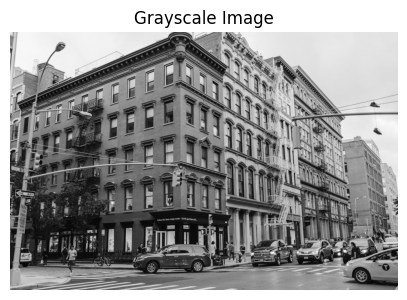

In [ ]:
# Converting to grayscale using the weighted sum formula
img_gray= (
    0.299 * img_rgb[:, :, 0] +
    0.587 * img_rgb[:, :, 1] +
    0.114 * img_rgb[:, :, 2]
)
print(img_gray)
img_gray.shape

# Plotting grayscaled image
plt.figure(figsize=(5, 5))
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

In [ ]:
# Converting to grayscale using cvtColor function
img_gray2 = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
print(img_gray2)
img_gray2.shape

[[232 232 232 ... 226 226 226]
 [233 232 233 ... 226 226 226]
 [233 233 234 ... 226 226 226]
 ...
 [142 144 142 ... 167 178 186]
 [128 131 132 ... 161 172 177]
 [119 120 120 ... 153 161 164]]


(750, 1125)

In [ ]:
print(np.array_equal(img_gray, img_gray2))
print(np.array_equal(np.round(img_gray), img_gray2))

False
True


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
#Converting grayscale to float
gray_float = img_gray.astype(np.float32)

#FFT
f = np.fft.fft2(gray_float)

# Shift low frequencies to the center
fshift = np.fft.fftshift(f)

[[160.49828 100.89844  82.24162 ...  82.24162 100.89844 160.49828]
 [164.1706  155.81998 146.50409 ... 125.74845 146.6779  148.99887]
 [163.72612 150.8681  155.51505 ... 124.57557 162.32881 162.45421]
 ...
 [165.80698 152.91585 140.76894 ... 155.98848 163.87674 165.70453]
 [162.45421 162.32881 124.57557 ... 155.51505 150.8681  163.72612]
 [148.99887 146.6779  125.74845 ... 146.50409 155.81998 164.1706 ]]


(np.float64(-0.5), np.float64(1124.5), np.float64(749.5), np.float64(-0.5))

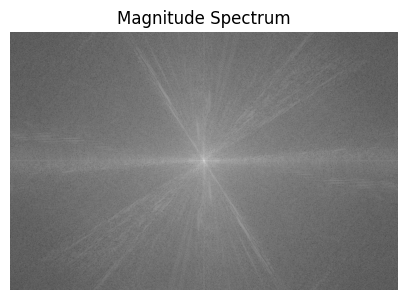

In [ ]:
# Computing magnitude spectrum
magnitude = 20*np.log(np.abs(fshift)+1)
print(magnitude)

#Plotting Magnitude spectrum
plt.figure(figsize=(5, 5))
plt.imshow(magnitude,cmap = 'gray')
plt.title("Magnitude Spectrum")
plt.axis("off")

[[ 0.8332883   1.1848931   1.6308494  ... -1.6308494  -1.1848931
  -0.8332883 ]
 [-2.257873    1.6359384   1.5226264  ...  1.737709    1.1914074
   1.9600247 ]
 [-3.0918522  -0.9898226   0.6333225  ... -1.561608   -1.8648183
   0.4098319 ]
 ...
 [ 1.0972036   3.0531151  -2.0169783  ...  0.13516414 -1.8518883
  -1.0147473 ]
 [-0.4098319   1.8648183   1.561608   ... -0.6333225   0.9898226
   3.0918522 ]
 [-1.9600247  -1.1914074  -1.737709   ... -1.5226264  -1.6359384
   2.257873  ]]


(np.float64(-0.5), np.float64(1124.5), np.float64(749.5), np.float64(-0.5))

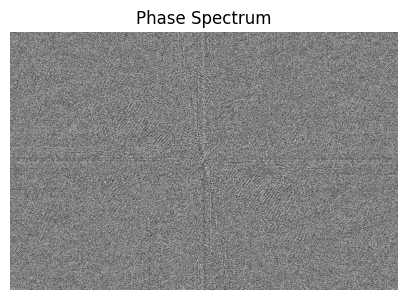

In [ ]:
# Computing phase spectrum
phase = np.angle(fshift)
print(phase)

#Plotting phase spectrum
plt.figure(figsize=(5, 5))
plt.imshow(phase, cmap = 'gray')
plt.title("Phase Spectrum")
plt.axis("off")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

Creating LPF Mask

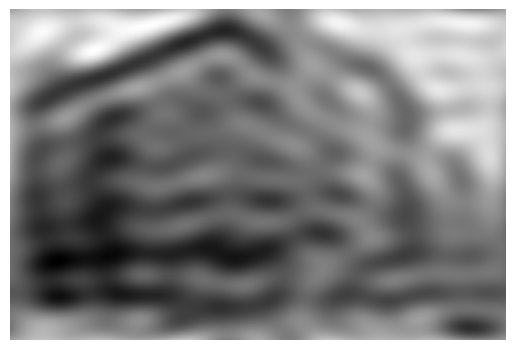

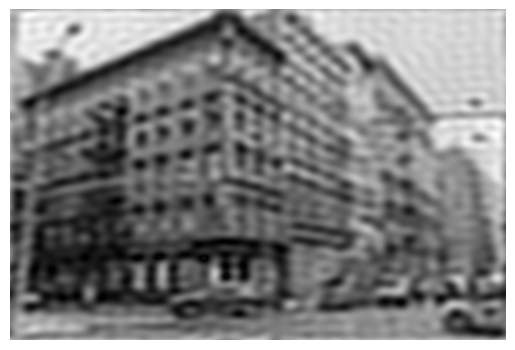

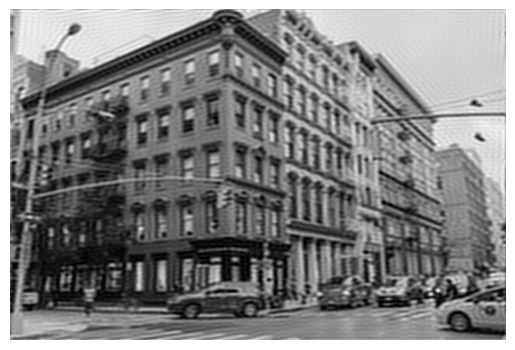

In [ ]:
rows, cols = img_gray.shape
crows, ccols = rows//2, cols//2
radii = [10,30,80]

for r in radii:
    mask_lpf = np.zeros((rows,cols),np.uint8)
    cv2.circle(mask_lpf,(ccols,crows),r,1,-1)

    # Applying lpf mask
    f_lpf = fshift * mask_lpf

    # Inverse shift
    ishift_lpf = np.fft.ifftshift(f_lpf)
    img_back_lpf = np.fft.ifft2(ishift_lpf)
    img_back_lpf =  np.abs(img_back_lpf)

    # Plotting lpf mask
    plt.imshow(img_back_lpf, cmap  = 'gray')
    plt.axis("off")
    plt.show()

Creating HPF Mask

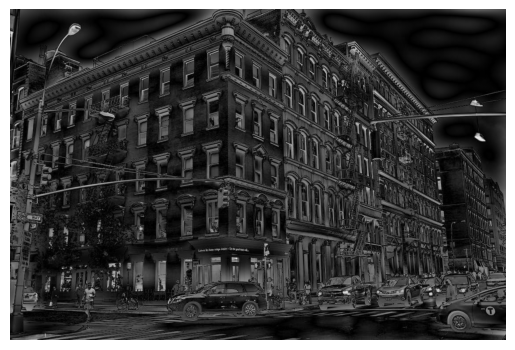

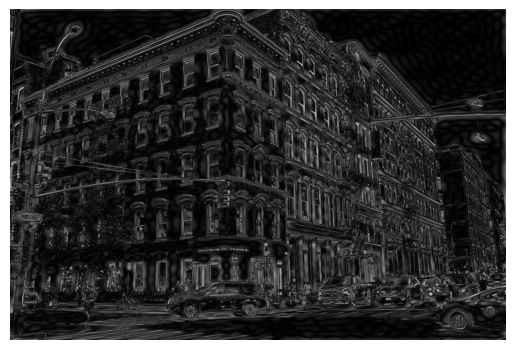

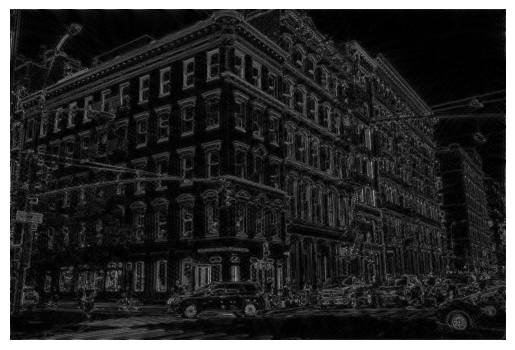

In [ ]:
for r in radii:
    mask_lpf = np.zeros((rows,cols),np.uint8)
    cv2.circle(mask_lpf,(ccols,crows),r,1,-1)
    mask_hpf = 1 - mask_lpf

    # Applying hpf mask
    f_hpf = fshift * mask_hpf

    # Inverse shift
    ishift_hpf = np.fft.ifftshift(f_hpf)
    img_back_hpf = np.fft.ifft2(ishift_hpf)
    img_back_hpf =  np.abs(img_back_hpf)

    # Plotting lpf mask
    plt.imshow(img_back_hpf, cmap  = 'gray')
    plt.axis("off")
    plt.show()

Creating square LPF

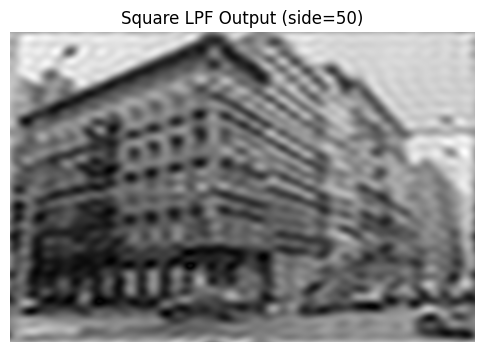

In [ ]:
rows, cols = img_gray2.shape
rrow, ccol = rows // 2, cols // 2

side = 50
half = side // 2

mask_square = np.zeros((rows, cols), dtype=np.uint8)

mask_square[rrow-half : rrow+half, ccol-half : ccol+half] = 1
f_square = fshift * mask_square
ishift_square = np.fft.ifftshift(f_square)
img_square_lpf = np.abs(np.fft.ifft2(ishift_square))
plt.figure(figsize=(6,6))
plt.imshow(img_square_lpf, cmap='gray')
plt.title("Square LPF Output (side=50)")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

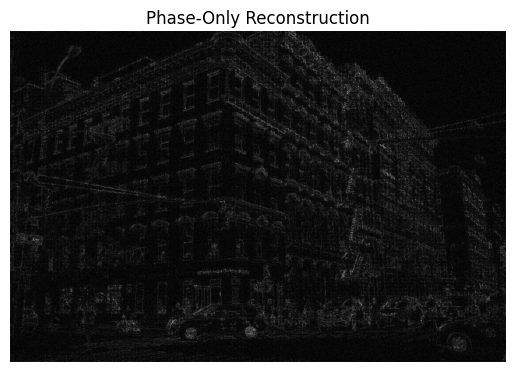

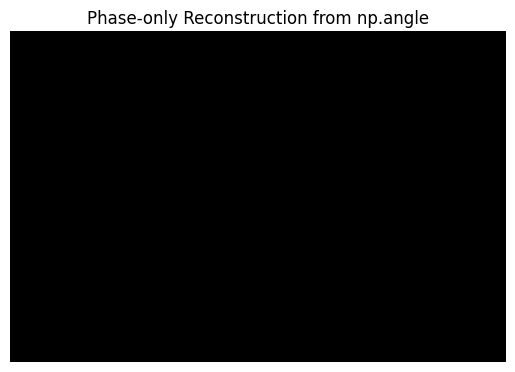

In [ ]:
phase_only = fshift / np.abs(fshift)
#Inverse shift + inverse FFT
ishift_phase = np.fft.ifftshift(phase_only)
img_phase_only = np.abs(np.fft.ifft2(ishift_phase))

plt.imshow(img_phase_only, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis("off")
plt.show()

#using np.angle(fshift)
phase = np.angle(fshift)
phase_ishift = np.fft.ifftshift(phase)
img_phase_from_angle = np.fft.ifft2(phase_ishift)
img_phase_from_angle = np.abs(img_phase_from_angle)
img_phase_from_angle = np.clip(img_phase_from_angle, 0, 255).astype(np.uint8)

#Plotting phase only reconstruction from np.angle
plt.imshow(img_phase_from_angle, cmap="gray")
plt.title("Phase-only Reconstruction from np.angle")
plt.axis("off")
plt.show()

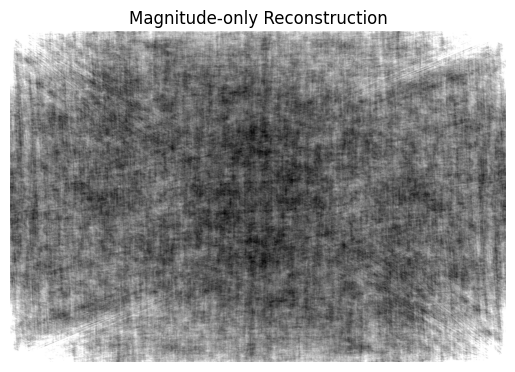

In [ ]:
magnitude_only = np.abs(fshift)

magnitude_only_comp = magnitude_only.astype(np.complex64)

magnitude_ishift = np.fft.ifftshift(magnitude_only_comp)
img_magnitude_only_comp = np.fft.ifft2(magnitude_ishift)
img_magnitude_only = np.abs(img_magnitude_only_comp)

# Clip down to 0–255
img_magnitude_only = np.clip(img_magnitude_only, 0, 255).astype(np.uint8)

plt.imshow(img_magnitude_only, cmap="gray")
plt.title("Magnitude-only Reconstruction")
plt.axis("off")
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

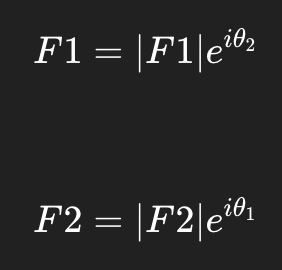

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.